In [1]:
# Import necessary libraries
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, MDS, LocallyLinearEmbedding
import matplotlib.pyplot as plt
import pandas as pd

*Load the digits dataset*

In [2]:
digits = datasets.load_digits()
X, y = digits.data, digits.target

In [3]:
df_digits = pd.DataFrame(data=X, columns=[f'Pixel {i}' for i in range(X.shape[1])])
df_digits['Target'] = y
df_digits.head()

Pixel 0  Pixel 1  Pixel 2  Pixel 3  Pixel 4  Pixel 5  Pixel 6  Pixel 7  \
0      0.0      0.0      5.0     13.0      9.0      1.0      0.0      0.0   
1      0.0      0.0      0.0     12.0     13.0      5.0      0.0      0.0   
2      0.0      0.0      0.0      4.0     15.0     12.0      0.0      0.0   
3      0.0      0.0      7.0     15.0     13.0      1.0      0.0      0.0   
4      0.0      0.0      0.0      1.0     11.0      0.0      0.0      0.0   

   Pixel 8  Pixel 9  ...  Pixel 55  Pixel 56  Pixel 57  Pixel 58  Pixel 59  \
0      0.0      0.0  ...       0.0       0.0       0.0       6.0      13.0   
1      0.0      0.0  ...       0.0       0.0       0.0       0.0      11.0   
2      0.0      0.0  ...       0.0       0.0       0.0       0.0       3.0   
3      0.0      8.0  ...       0.0       0.0       0.0       7.0      13.0   
4      0.0      0.0  ...       0.0       0.0       0.0       0.0       2.0   

   Pixel 60  Pixel 61  Pixel 62  Pixel 63  Target  
0      10.0       0.0       0.0       0.0       0  
1      16.0      10.0       0.0       0.0       1  
2      11.0      16.0       9.0       0.0       2  
3      13.0       9.0       0.0       0.0       3  
4      16.0       4.0       0.0       0.0       4  

[5 rows x 65 columns]

*Plot*

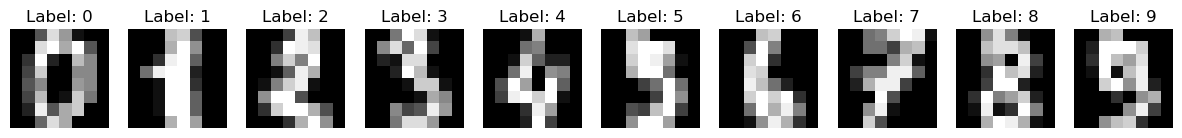

In [4]:
fig, axes = plt.subplots(1, 10, figsize=(15, 4))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Label: {digits.target[i]}')
    ax.axis('off')
plt.show()

*PCA*

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=['Component 1', 'Component 2'])
df_pca['Target'] = y
df_pca.head(100)

Component 1  Component 2  Target
0     -1.259465    21.274883       0
1      7.957613   -20.768699       1
2      6.991921    -9.955986       2
3    -15.906104     3.332464       3
4     23.306867     4.269060       4
..          ...          ...     ...
95    20.139078    -4.684807       6
96     3.115040   -10.382007       8
97    22.568148     0.686582       4
98   -24.685635    -5.215515       3
99    19.922257   -19.197571       1

[100 rows x 3 columns]

*Plot PCA result*

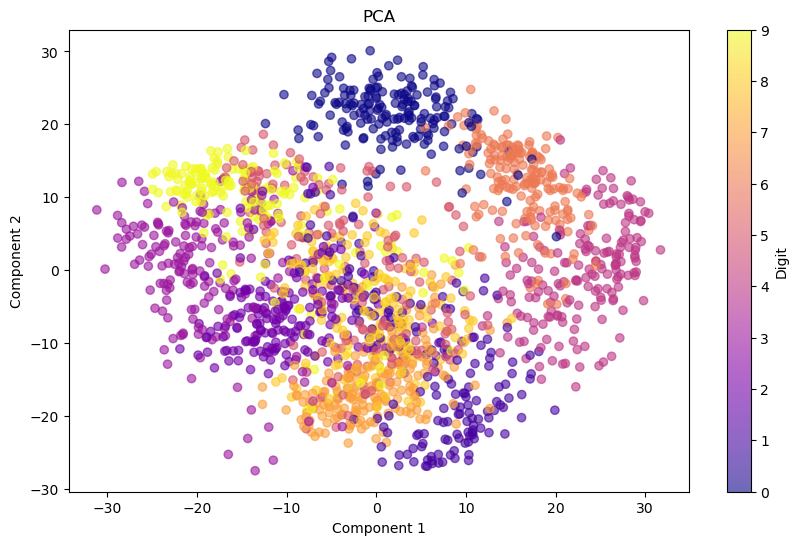

In [6]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca['Component 1'], df_pca['Component 2'], c=df_pca['Target'], cmap='plasma', alpha=0.6)
plt.title('PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(scatter, label='Digit')
plt.show()

*ISOMAP*

In [7]:
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X)
df_isomap = pd.DataFrame(X_isomap, columns=['Component 1', 'Component 2'])
df_isomap['Target'] = y
df_isomap

d:\Anaconda\install\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
d:\Anaconda\install\Lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Component 1  Component 2  Target
0      162.588812    27.219669       0
1      -46.792882    48.388880       1
2      -98.022312    21.772691       2
3       44.117875   -65.388256       3
4       29.773194   158.607053       4
...           ...          ...     ...
1792     2.109484   -95.798260       9
1793   133.222794    68.794684       0
1794   -50.288018   -24.823011       8
1795    -1.688936   -72.022962       9
1796   -10.358824   -37.245425       8

[1797 rows x 3 columns]

*Plot ISOMAP result*

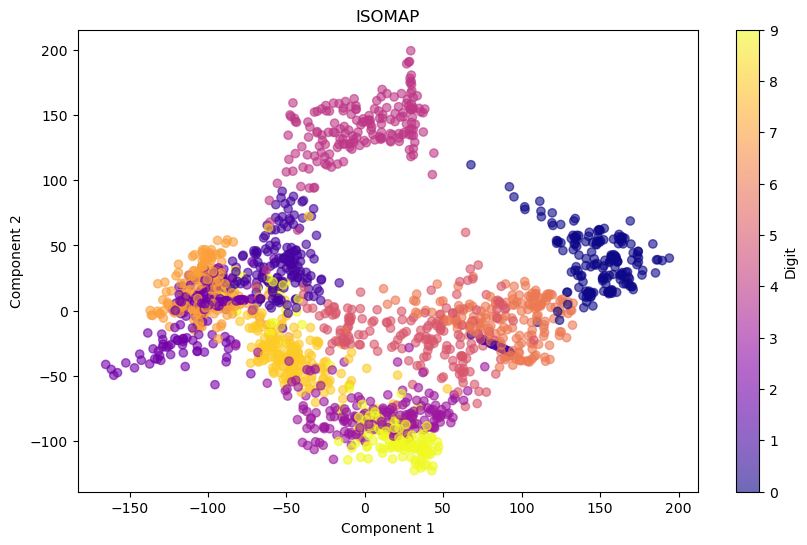

In [8]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_isomap['Component 1'], df_isomap['Component 2'], c=df_isomap['Target'], cmap='plasma', alpha=0.6)
plt.title('ISOMAP')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(scatter, label='Digit')
plt.show()

*MDS*


In [9]:
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X)
df_mds = pd.DataFrame(X_mds, columns=['Component 1', 'Component 2'])
df_mds['Target'] = y
display(df_mds)

Component 1  Component 2  Target
0      -11.428699   -26.775745       0
1       25.115933    14.765461       1
2       30.863252     8.703120       2
3      -26.929509     4.754747       3
4       35.089990   -23.896229       4
...           ...          ...     ...
1792   -22.718518   -15.240134       9
1793    -4.990634   -36.584363       0
1794    18.573029    -0.093261       8
1795   -11.510690   -16.416613       9
1796    -0.939825   -10.084651       8

[1797 rows x 3 columns]

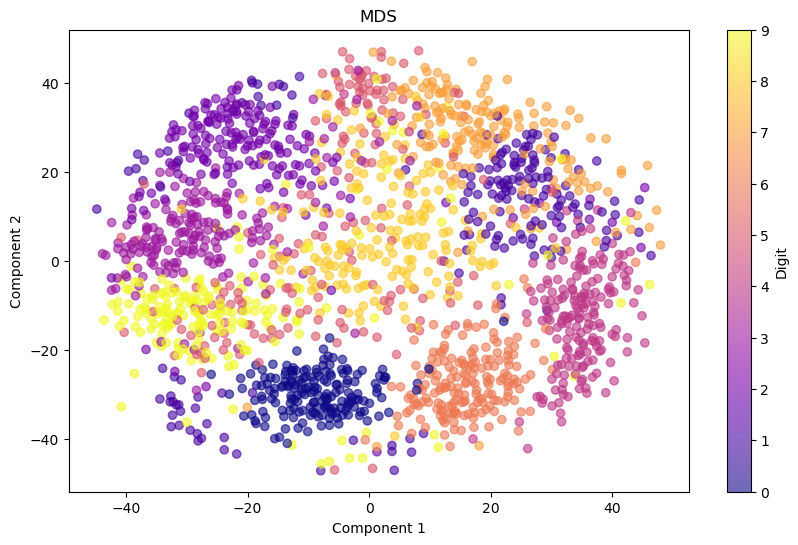

In [10]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_mds['Component 1'], df_mds['Component 2'], c=df_mds['Target'], cmap='plasma', alpha=0.6)
plt.title('MDS')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(scatter, label='Digit')
plt.show()

*LLE*

In [11]:
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
X_lle = lle.fit_transform(X)
df_lle = pd.DataFrame(X_lle, columns=['Component 1', 'Component 2'])
df_lle['Target'] = y
display(df_lle)

Component 1  Component 2  Target
0        0.006734    -0.000117       0
1       -0.027466    -0.000194       1
2       -0.027148    -0.000190       2
3       -0.023185    -0.000179       3
4       -0.027547    -0.000180       4
...           ...          ...     ...
1792    -0.024508    -0.000180       9
1793     0.006732    -0.000122       0
1794    -0.026871    -0.000176       8
1795    -0.025075    -0.000174       9
1796    -0.025151    -0.000185       8

[1797 rows x 3 columns]

*Plot LLE result*


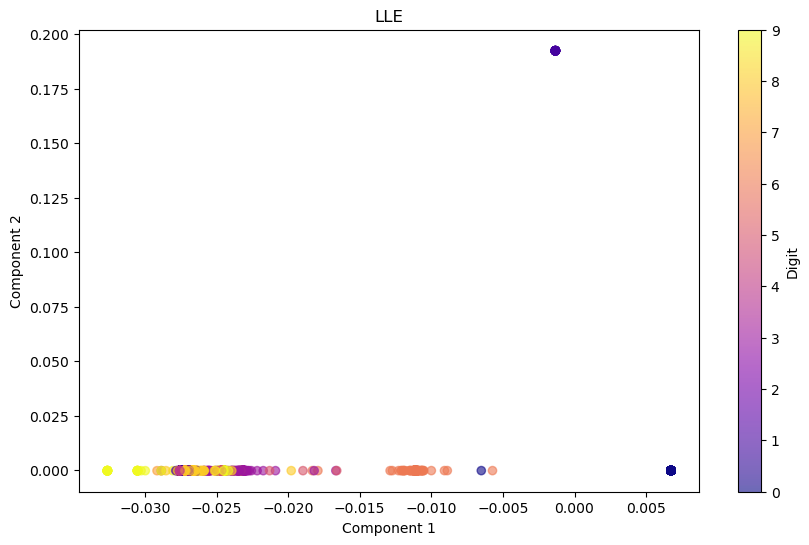

In [12]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_lle['Component 1'], df_lle['Component 2'], c=df_lle['Target'], cmap='plasma', alpha=0.6)
plt.title('LLE')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(scatter, label='Digit')
plt.show()

*Plot the results for comparison*


In [13]:
from sklearn.cluster import KMeans


*PCA*

In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
kmeans_pca = KMeans(n_clusters=10, random_state=42).fit(X_pca)


d:\Anaconda\install\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


*ISOMAP*

In [15]:
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X)
kmeans_isomap = KMeans(n_clusters=10, random_state=42).fit(X_isomap)

d:\Anaconda\install\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
d:\Anaconda\install\Lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
d:\Anaconda\install\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [16]:
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X)
kmeans_mds = KMeans(n_clusters=10, random_state=42).fit(X_mds)



d:\Anaconda\install\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


*LLE*

In [17]:
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
X_lle = lle.fit_transform(X)
kmeans_lle = KMeans(n_clusters=10, random_state=42).fit(X_lle)

d:\Anaconda\install\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


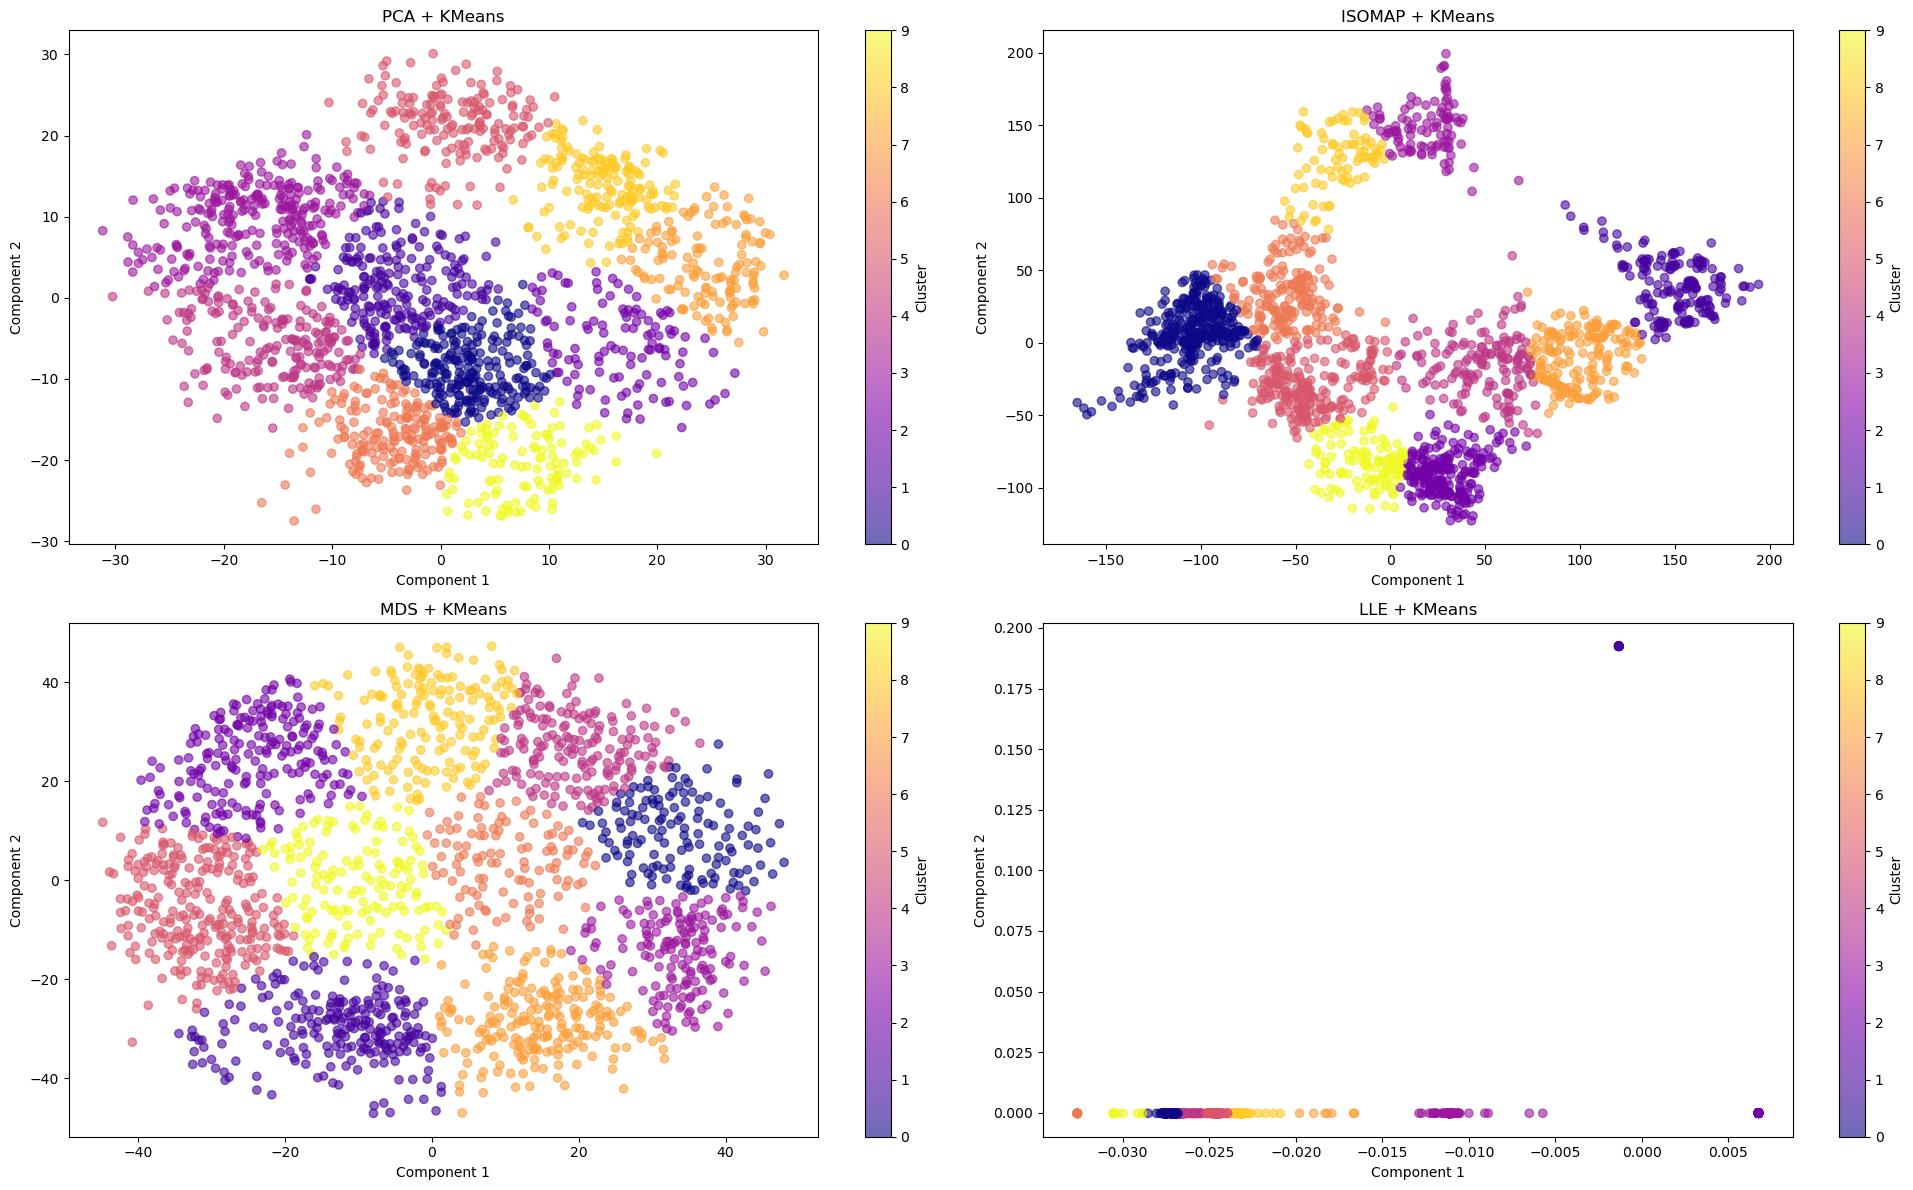

In [18]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_pca.labels_, cmap='plasma', alpha=0.6)
plt.title('PCA + KMeans')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(scatter, label='Cluster')

plt.subplot(2, 2, 2)
scatter = plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=kmeans_isomap.labels_, cmap='plasma', alpha=0.6)
plt.title('ISOMAP + KMeans')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(scatter, label='Cluster')

plt.subplot(2, 2, 3)
scatter = plt.scatter(X_mds[:, 0], X_mds[:, 1], c=kmeans_mds.labels_, cmap='plasma', alpha=0.6)
plt.title('MDS + KMeans')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(scatter, label='Cluster')

plt.subplot(2, 2, 4)
scatter = plt.scatter(X_lle[:, 0], X_lle[:, 1], c=kmeans_lle.labels_, cmap='plasma', alpha=0.6)
plt.title('LLE + KMeans')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(scatter, label='Cluster')

plt.tight_layout()
plt.show()


In [19]:
from sklearn.metrics import silhouette_score


In [20]:
# PCA
labels_pca = kmeans_pca.labels_
silhouette_score_pca = silhouette_score(X_pca, labels_pca)
inertia_pca = kmeans_pca.inertia_
print(f"PCA Silhouette Score: {silhouette_score_pca:.4f}")
print(f"PCA Inertia: {inertia_pca:.4f}")


PCA Silhouette Score: 0.4004
PCA Inertia: 57297.6328


In [21]:
# ISOMAP
labels_isomap = kmeans_isomap.labels_
silhouette_score_isomap = silhouette_score(X_isomap, labels_isomap)
inertia_isomap = kmeans_isomap.inertia_
print(f"ISOMAP Silhouette Score: {silhouette_score_isomap:.4f}")
print(f"ISOMAP Inertia: {inertia_isomap:.4f}")


ISOMAP Silhouette Score: 0.4352
ISOMAP Inertia: 1040133.3767


In [22]:
# MDS
labels_mds = kmeans_mds.labels_
silhouette_score_mds = silhouette_score(X_mds, labels_mds)
inertia_mds = kmeans_mds.inertia_

print(f"MDS Silhouette Score: {silhouette_score_mds:.4f}")
print(f"MDS Inertia: {inertia_mds:.4f}")

MDS Silhouette Score: 0.3880
MDS Inertia: 177884.5561


In [23]:
# LLE
labels_lle = kmeans_lle.labels_
silhouette_score_lle = silhouette_score(X_lle, labels_lle)
inertia_lle = kmeans_lle.inertia_

print(f"LLE Silhouette Score: {silhouette_score_lle:.4f}")
print(f"LLE Inertia: {inertia_lle:.4f}")

LLE Silhouette Score: 0.7490
LLE Inertia: 0.0002


*Elbow plot*

In [24]:
import seaborn as sns

d:\Anaconda\install\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
d:\Anaconda\install\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
d:\Anaconda\install\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
d:\Anaconda\install\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when the

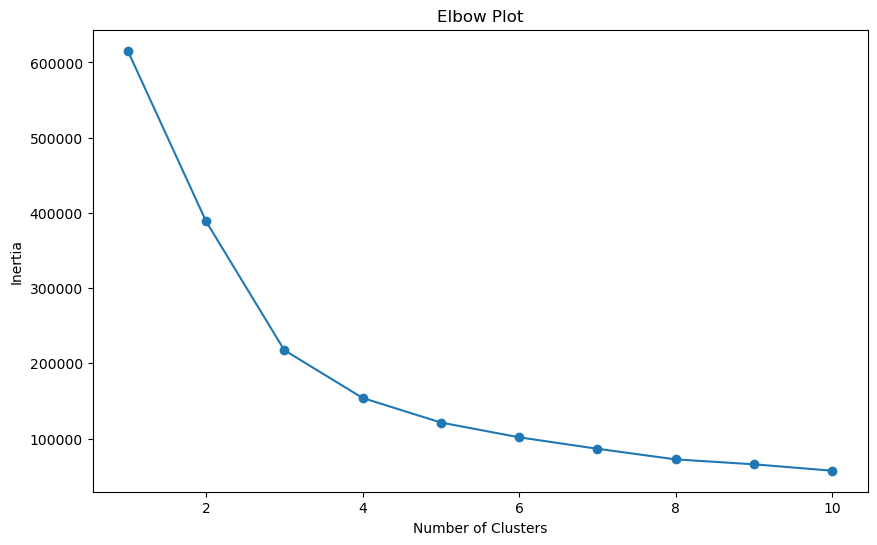

In [25]:
# Elbow plot
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

d:\Anaconda\install\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


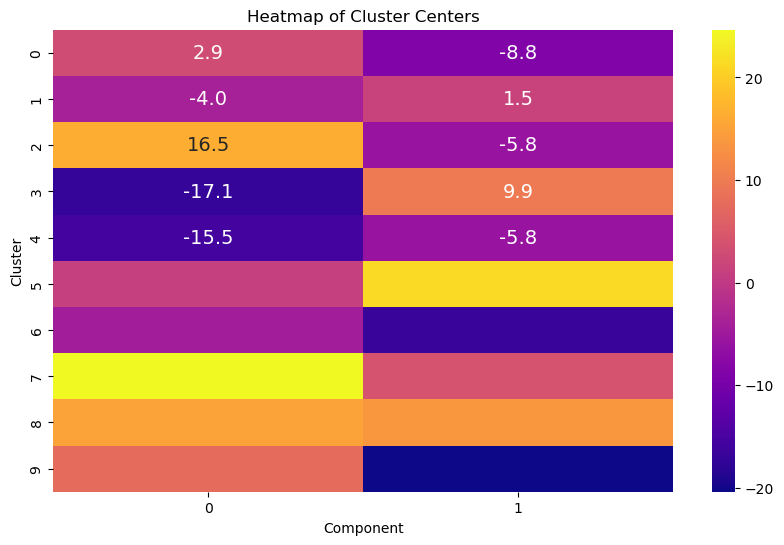

In [26]:
optimal_clusters = 10
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(X_pca)
clusters = kmeans_optimal.labels_
# Heatmap of cluster centers
cluster_centers = kmeans_optimal.cluster_centers_
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers, annot=True, cmap='plasma', fmt=".1f", annot_kws={"size": 14})
plt.title('Heatmap of Cluster Centers')
plt.xlabel('Component')
plt.ylabel('Cluster')
plt.show()

In [27]:
# Add cluster labels to the original dataset
X_clustered = pd.DataFrame(X)
X_clustered['Cluster'] = clusters

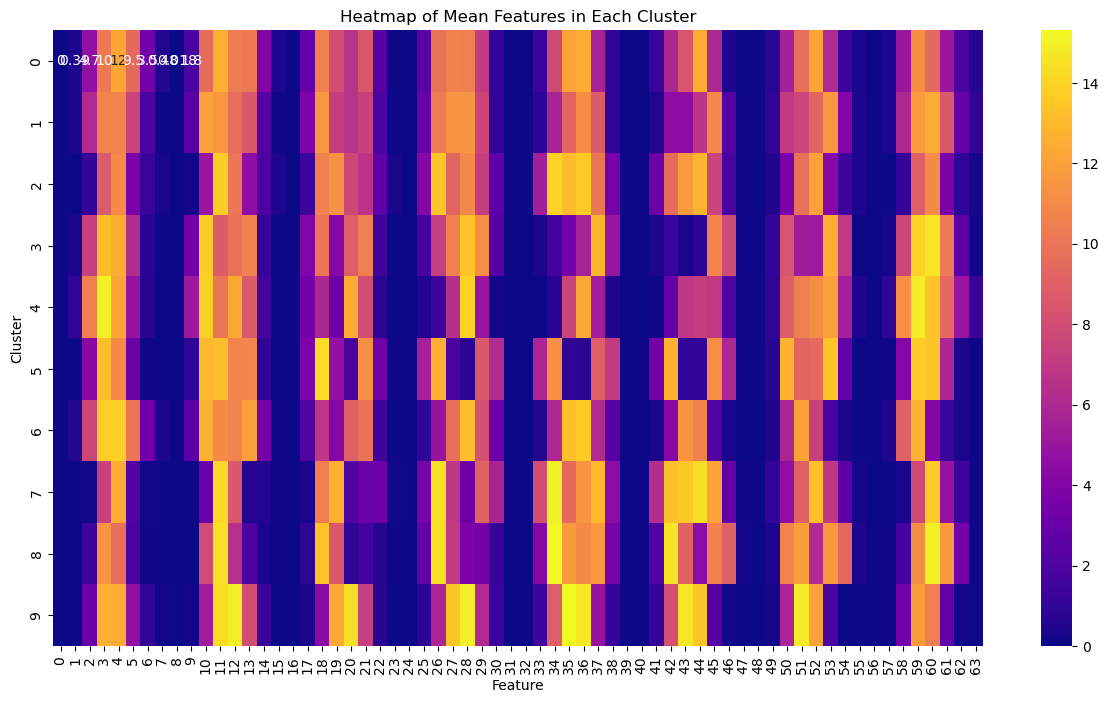

In [28]:
cluster_means = X_clustered.groupby('Cluster').mean()
plt.figure(figsize=(15, 8))
sns.heatmap(cluster_means, annot=True, cmap='plasma')
plt.title('Heatmap of Mean Features in Each Cluster')
plt.xlabel('Feature')
plt.ylabel('Cluster')
plt.show()

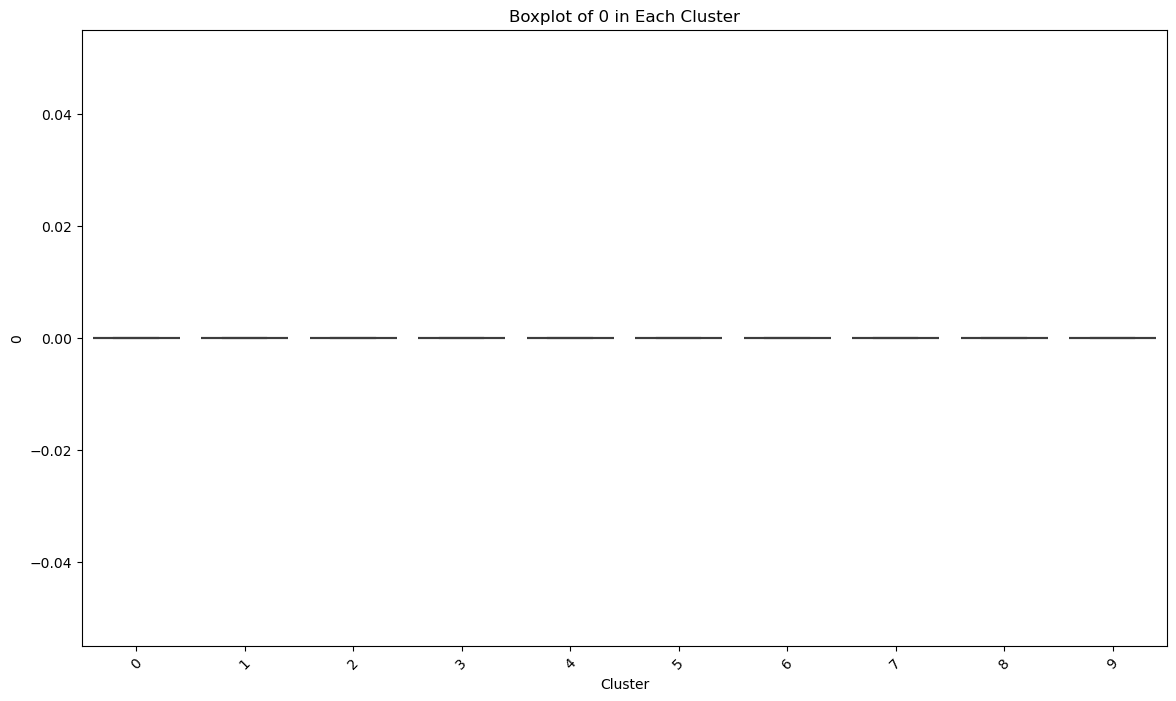

Summary statistics for 0:
         count  mean  std  min  25%  50%  75%  max
Cluster                                           
0        228.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1        218.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
2        117.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
3        268.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
4        197.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
5        171.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
6        188.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
7        134.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
8        160.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
9        116.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0




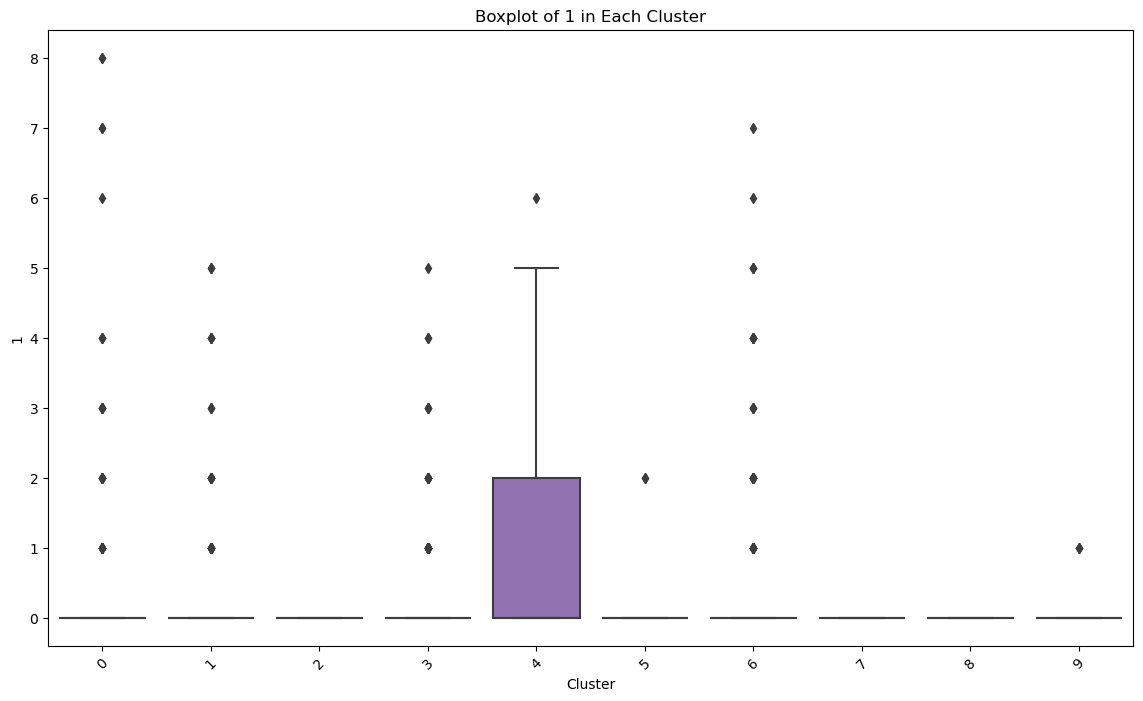

Summary statistics for 1:
         count      mean       std  min  25%  50%  75%  max
Cluster                                                    
0        228.0  0.390351  1.266753  0.0  0.0  0.0  0.0  8.0
1        218.0  0.385321  0.982879  0.0  0.0  0.0  0.0  5.0
2        117.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
3        268.0  0.313433  0.743692  0.0  0.0  0.0  0.0  5.0
4        197.0  0.954315  1.246605  0.0  0.0  0.0  2.0  6.0
5        171.0  0.023392  0.215658  0.0  0.0  0.0  0.0  2.0
6        188.0  0.500000  1.238854  0.0  0.0  0.0  0.0  7.0
7        134.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
8        160.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
9        116.0  0.025862  0.159412  0.0  0.0  0.0  0.0  1.0




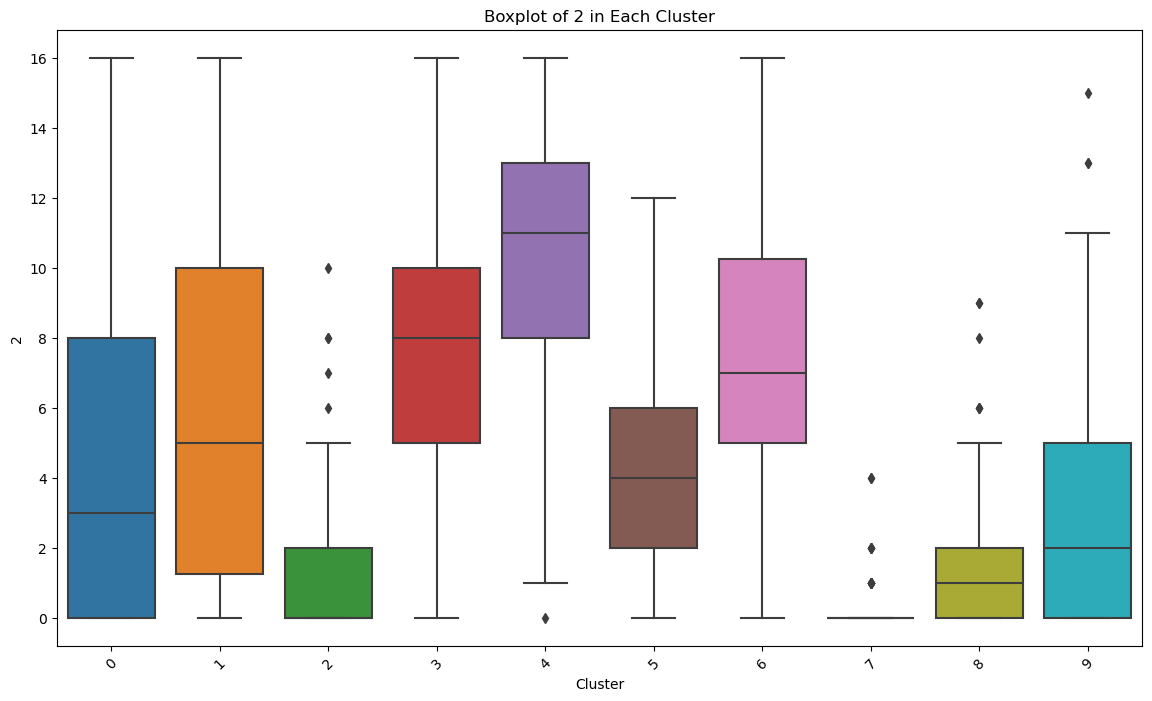

Summary statistics for 2:
         count       mean       std  min   25%   50%    75%   max
Cluster                                                          
0        228.0   4.688596  5.026314  0.0  0.00   3.0   8.00  16.0
1        218.0   6.114679  5.080065  0.0  1.25   5.0  10.00  16.0
2        117.0   1.076923  1.934950  0.0  0.00   0.0   2.00  10.0
3        268.0   7.354478  3.703083  0.0  5.00   8.0  10.00  16.0
4        197.0  10.527919  3.576494  0.0  8.00  11.0  13.00  16.0
5        171.0   4.315789  2.845996  0.0  2.00   4.0   6.00  12.0
6        188.0   7.606383  3.979138  0.0  5.00   7.0  10.25  16.0
7        134.0   0.179104  0.623485  0.0  0.00   0.0   0.00   4.0
8        160.0   1.418750  1.806598  0.0  0.00   1.0   2.00   9.0
9        116.0   3.112069  3.359015  0.0  0.00   2.0   5.00  15.0




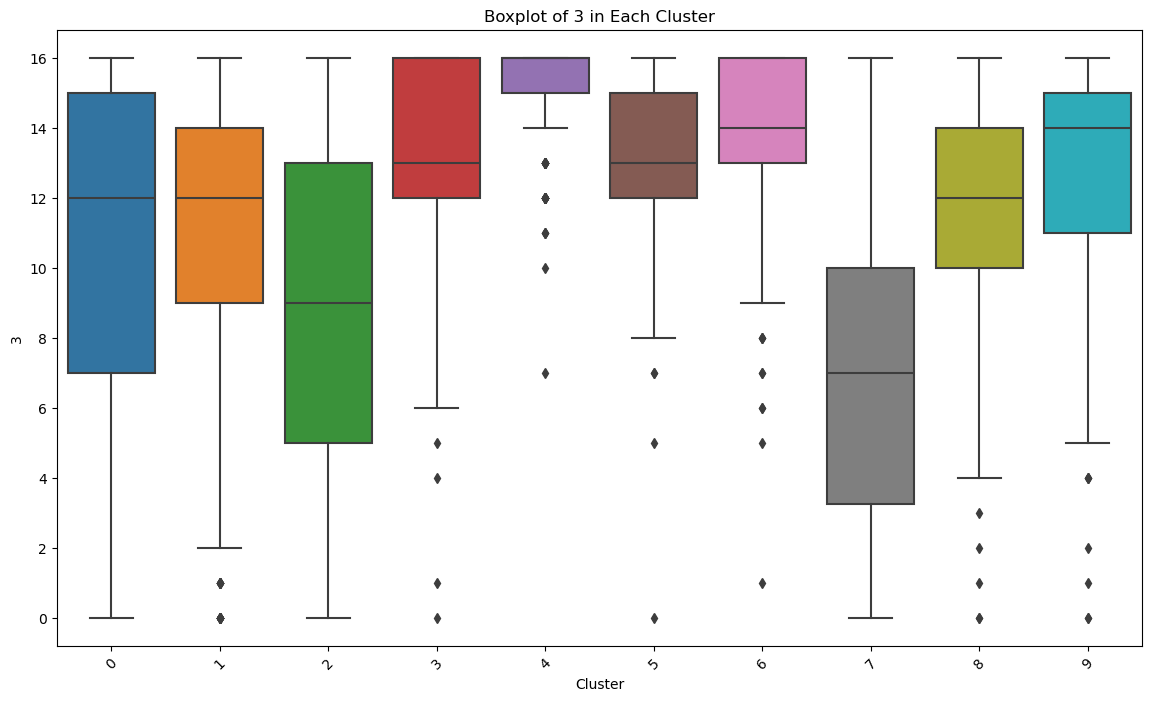

Summary statistics for 3:
         count       mean       std  min    25%   50%   75%   max
Cluster                                                          
0        228.0  10.179825  5.163250  0.0   7.00  12.0  15.0  16.0
1        218.0  10.761468  4.649759  0.0   9.00  12.0  14.0  16.0
2        117.0   8.675214  5.187566  0.0   5.00   9.0  13.0  16.0
3        268.0  13.160448  2.681676  0.0  12.00  13.0  16.0  16.0
4        197.0  15.010152  1.501665  7.0  15.00  16.0  16.0  16.0
5        171.0  13.140351  2.421268  0.0  12.00  13.0  15.0  16.0
6        188.0  13.739362  2.573236  1.0  13.00  14.0  16.0  16.0
7        134.0   7.335821  4.319816  0.0   3.25   7.0  10.0  16.0
8        160.0  11.418750  3.249522  0.0  10.00  12.0  14.0  16.0
9        116.0  12.612069  3.630239  0.0  11.00  14.0  15.0  16.0




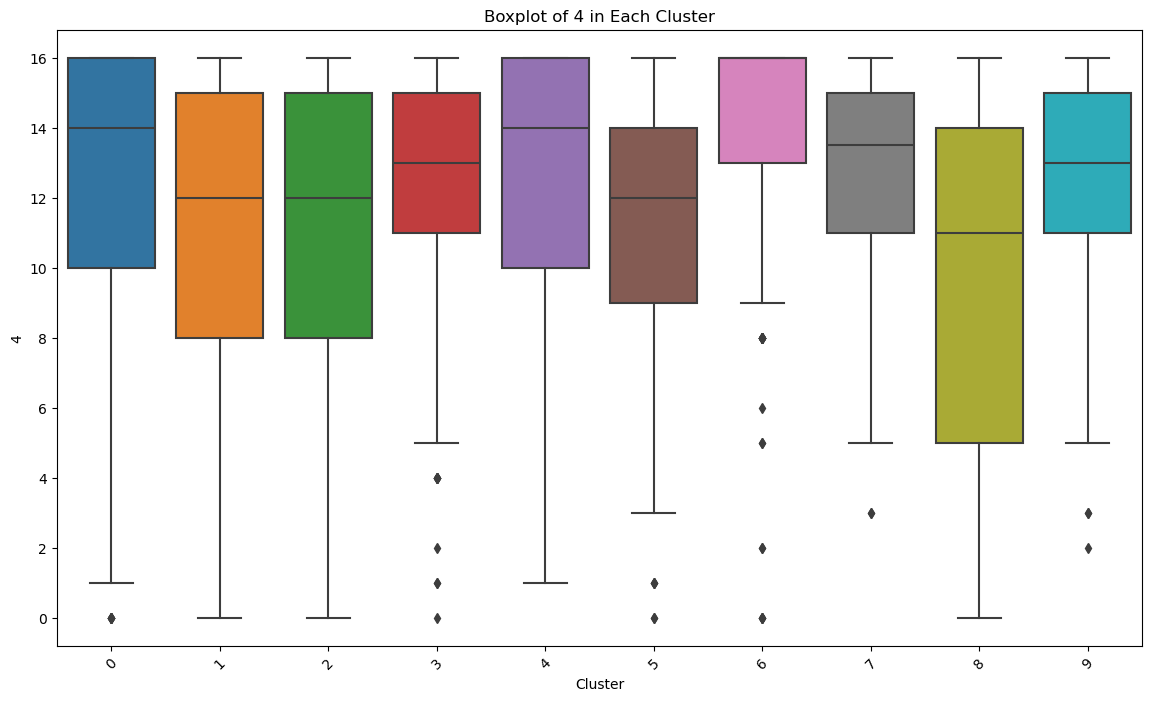

Summary statistics for 4:
         count       mean       std  min   25%   50%   75%   max
Cluster                                                         
0        228.0  12.210526  4.520095  0.0  10.0  14.0  16.0  16.0
1        218.0  10.752294  5.083009  0.0   8.0  12.0  15.0  16.0
2        117.0  10.974359  4.259799  0.0   8.0  12.0  15.0  16.0
3        268.0  12.466418  3.326602  0.0  11.0  13.0  15.0  16.0
4        197.0  12.172589  4.391627  1.0  10.0  14.0  16.0  16.0
5        171.0  11.000000  3.820995  0.0   9.0  12.0  14.0  16.0
6        188.0  13.867021  3.562787  0.0  13.0  16.0  16.0  16.0
7        134.0  12.410448  3.141315  3.0  11.0  13.5  15.0  16.0
8        160.0   9.693750  5.323494  0.0   5.0  11.0  14.0  16.0
9        116.0  12.396552  3.009779  2.0  11.0  13.0  15.0  16.0




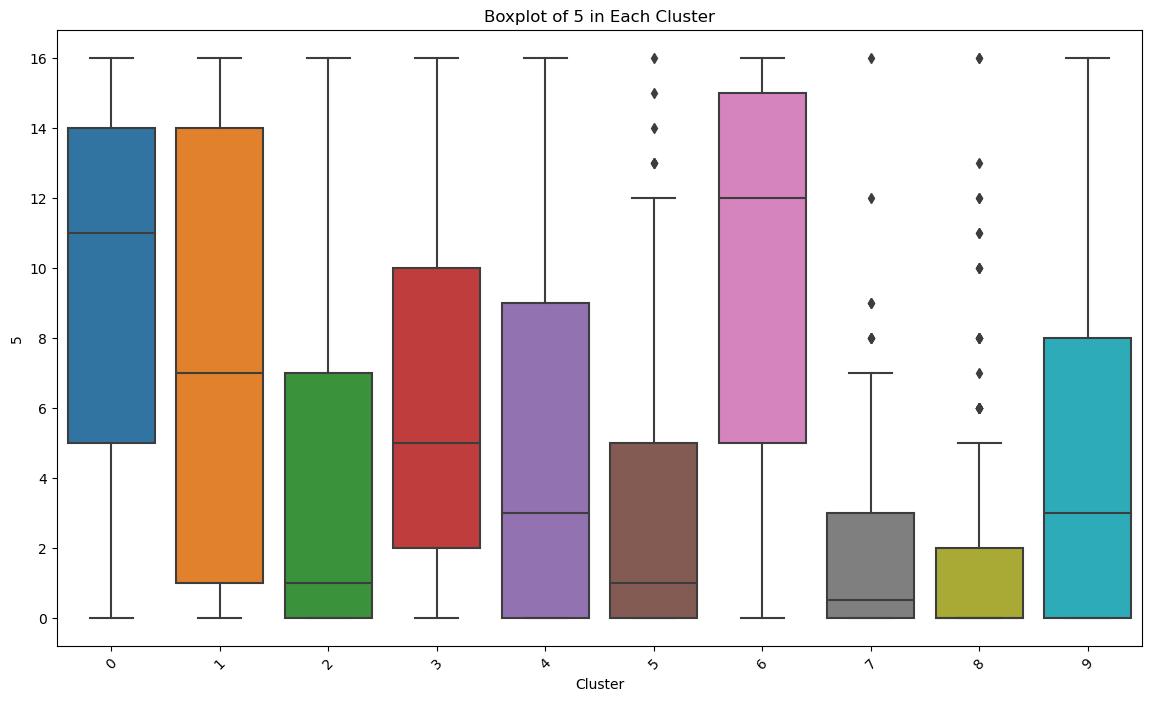

Summary statistics for 5:
         count       mean       std  min  25%   50%   75%   max
Cluster                                                        
0        228.0   9.469298  5.623576  0.0  5.0  11.0  14.0  16.0
1        218.0   7.509174  6.177289  0.0  1.0   7.0  14.0  16.0
2        117.0   3.649573  4.934600  0.0  0.0   1.0   7.0  16.0
3        268.0   6.164179  4.987917  0.0  2.0   5.0  10.0  16.0
4        197.0   4.898477  5.137879  0.0  0.0   3.0   9.0  16.0
5        171.0   3.134503  3.690932  0.0  0.0   1.0   5.0  16.0
6        188.0  10.010638  5.611285  0.0  5.0  12.0  15.0  16.0
7        134.0   2.059701  2.896098  0.0  0.0   0.5   3.0  16.0
8        160.0   1.931250  3.403886  0.0  0.0   0.0   2.0  16.0
9        116.0   4.715517  5.114015  0.0  0.0   3.0   8.0  16.0




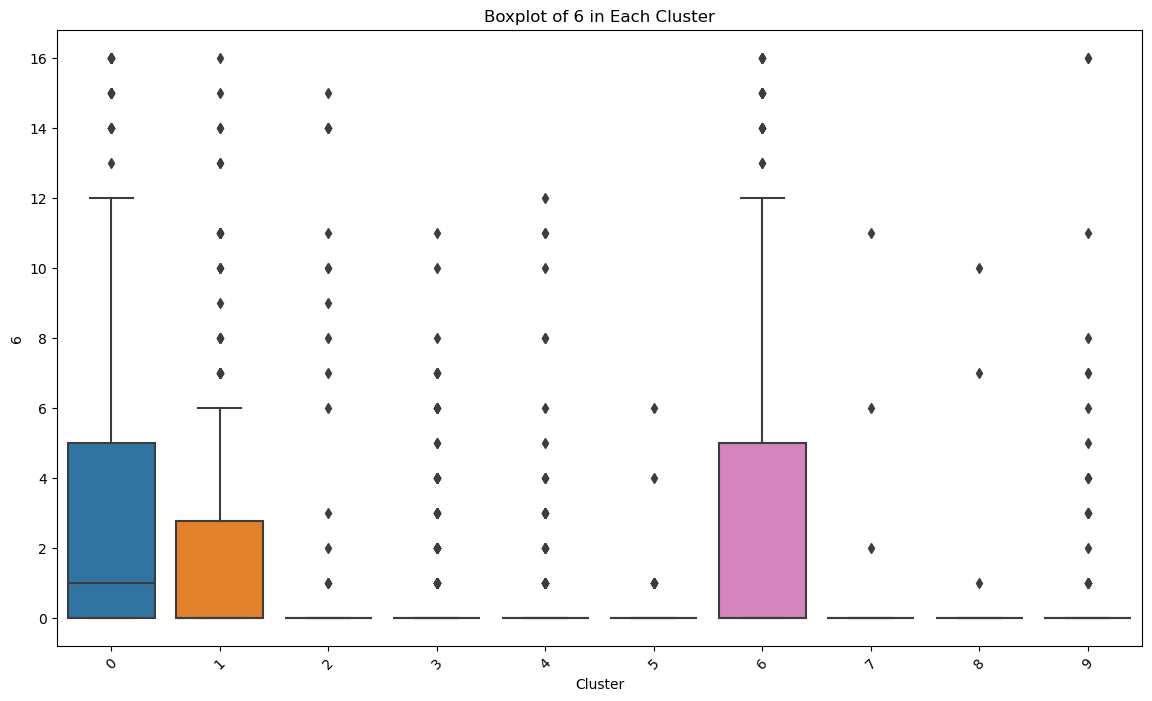

Summary statistics for 6:
         count      mean       std  min  25%  50%   75%   max
Cluster                                                      
0        228.0  3.500000  4.979694  0.0  0.0  1.0  5.00  16.0
1        218.0  1.903670  3.488610  0.0  0.0  0.0  2.75  16.0
2        117.0  1.196581  3.484545  0.0  0.0  0.0  0.00  15.0
3        268.0  0.697761  1.795248  0.0  0.0  0.0  0.00  11.0
4        197.0  0.604061  1.934009  0.0  0.0  0.0  0.00  12.0
5        171.0  0.099415  0.580618  0.0  0.0  0.0  0.00   6.0
6        188.0  3.335106  4.940225  0.0  0.0  0.0  5.00  16.0
7        134.0  0.141791  1.090995  0.0  0.0  0.0  0.00  11.0
8        160.0  0.112500  0.964707  0.0  0.0  0.0  0.00  10.0
9        116.0  0.931034  2.717813  0.0  0.0  0.0  0.00  16.0




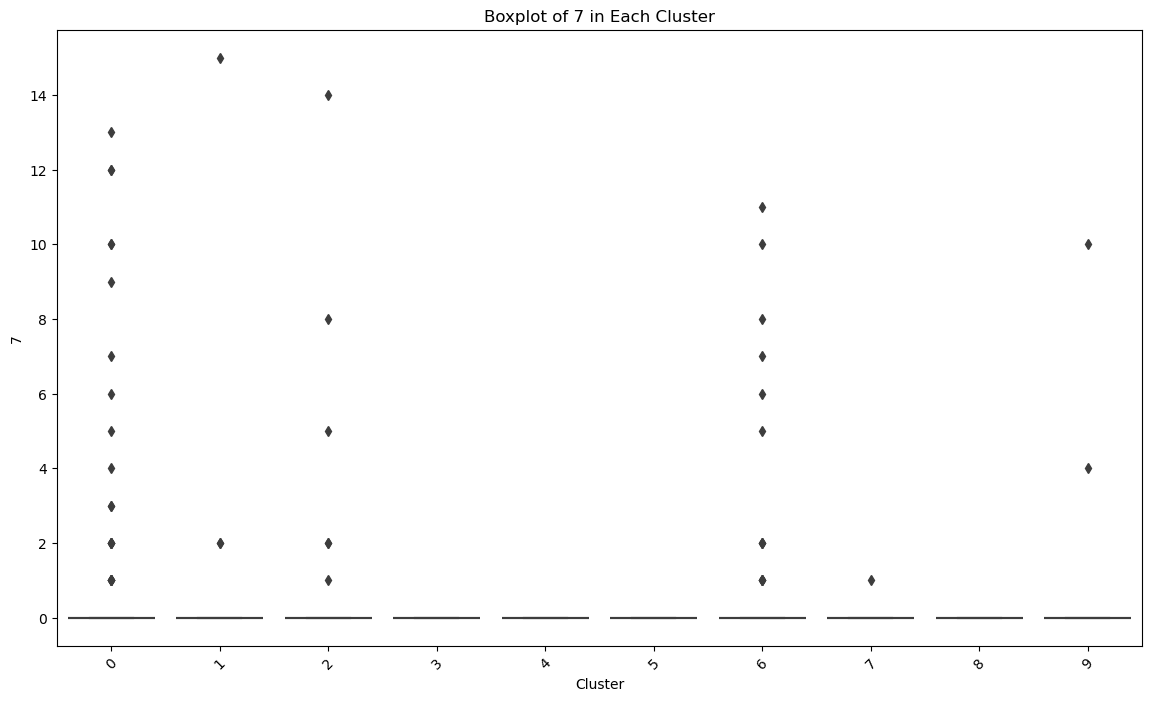

Summary statistics for 7:
         count      mean       std  min  25%  50%  75%   max
Cluster                                                     
0        228.0  0.482456  1.940673  0.0  0.0  0.0  0.0  13.0
1        218.0  0.087156  1.032522  0.0  0.0  0.0  0.0  15.0
2        117.0  0.273504  1.568131  0.0  0.0  0.0  0.0  14.0
3        268.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0
4        197.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0
5        171.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0
6        188.0  0.303191  1.451015  0.0  0.0  0.0  0.0  11.0
7        134.0  0.007463  0.086387  0.0  0.0  0.0  0.0   1.0
8        160.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0
9        116.0  0.120690  0.996997  0.0  0.0  0.0  0.0  10.0




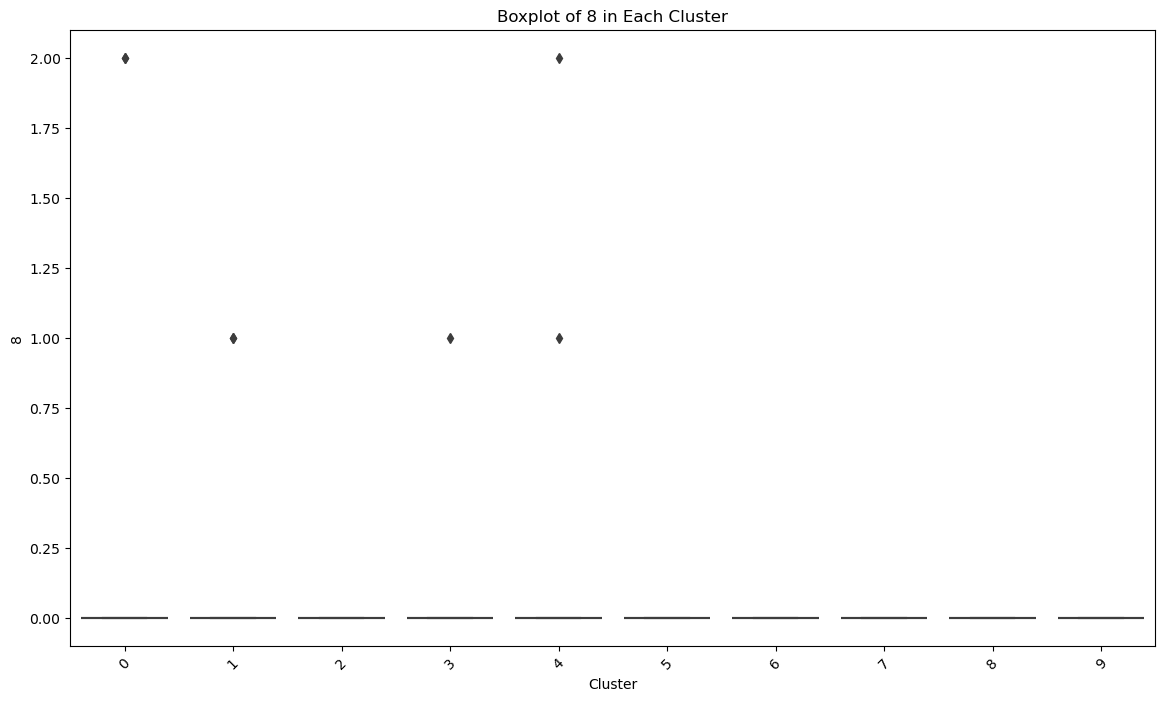

Summary statistics for 8:
         count      mean       std  min  25%  50%  75%  max
Cluster                                                    
0        228.0  0.017544  0.186904  0.0  0.0  0.0  0.0  2.0
1        218.0  0.009174  0.095562  0.0  0.0  0.0  0.0  1.0
2        117.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
3        268.0  0.003731  0.061085  0.0  0.0  0.0  0.0  1.0
4        197.0  0.015228  0.158988  0.0  0.0  0.0  0.0  2.0
5        171.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
6        188.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
7        134.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
8        160.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
9        116.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0




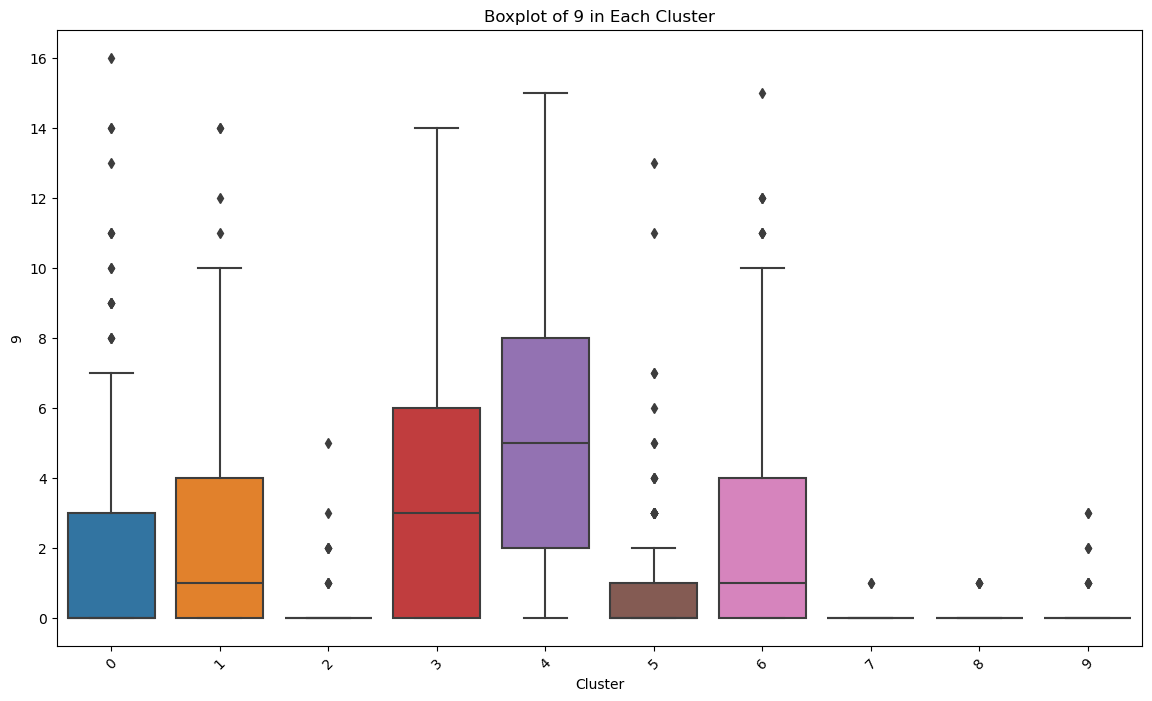

Summary statistics for 9:
         count      mean       std  min  25%  50%  75%   max
Cluster                                                     
0        228.0  1.798246  3.147420  0.0  0.0  0.0  3.0  16.0
1        218.0  2.399083  3.096214  0.0  0.0  1.0  4.0  14.0
2        117.0  0.170940  0.660337  0.0  0.0  0.0  0.0   5.0
3        268.0  3.511194  3.477572  0.0  0.0  3.0  6.0  14.0
4        197.0  5.172589  3.937089  0.0  2.0  5.0  8.0  15.0
5        171.0  0.953216  1.859199  0.0  0.0  0.0  1.0  13.0
6        188.0  2.579787  3.462406  0.0  0.0  1.0  4.0  15.0
7        134.0  0.014925  0.121709  0.0  0.0  0.0  0.0   1.0
8        160.0  0.031250  0.174539  0.0  0.0  0.0  0.0   1.0
9        116.0  0.129310  0.502691  0.0  0.0  0.0  0.0   3.0




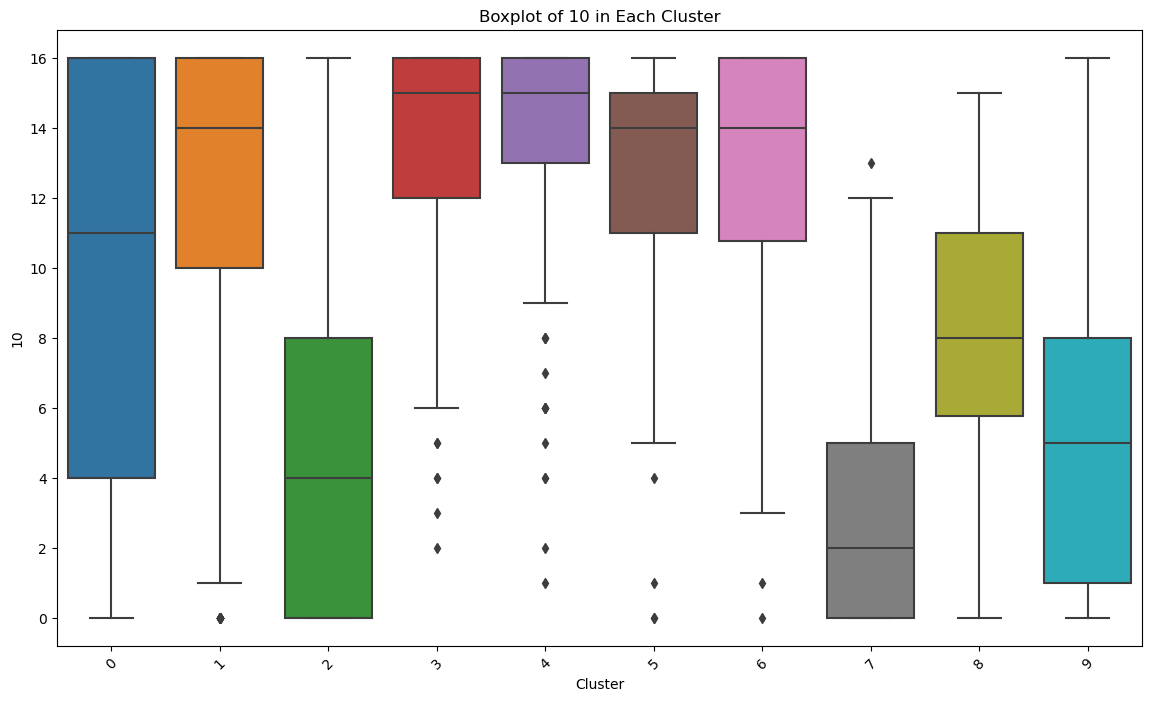

Summary statistics for 10:
         count       mean       std  min    25%   50%   75%   max
Cluster                                                          
0        228.0   9.596491  5.946486  0.0   4.00  11.0  16.0  16.0
1        218.0  11.963303  5.179589  0.0  10.00  14.0  16.0  16.0
2        117.0   5.059829  4.844639  0.0   0.00   4.0   8.0  16.0
3        268.0  13.682836  2.738299  2.0  12.00  15.0  16.0  16.0
4        197.0  13.822335  2.969902  1.0  13.00  15.0  16.0  16.0
5        171.0  12.953216  3.180479  0.0  11.00  14.0  15.0  16.0
6        188.0  12.611702  3.593409  0.0  10.75  14.0  16.0  16.0
7        134.0   3.044776  3.010922  0.0   0.00   2.0   5.0  13.0
8        160.0   7.918750  3.653157  0.0   5.75   8.0  11.0  15.0
9        116.0   5.327586  4.717729  0.0   1.00   5.0   8.0  16.0




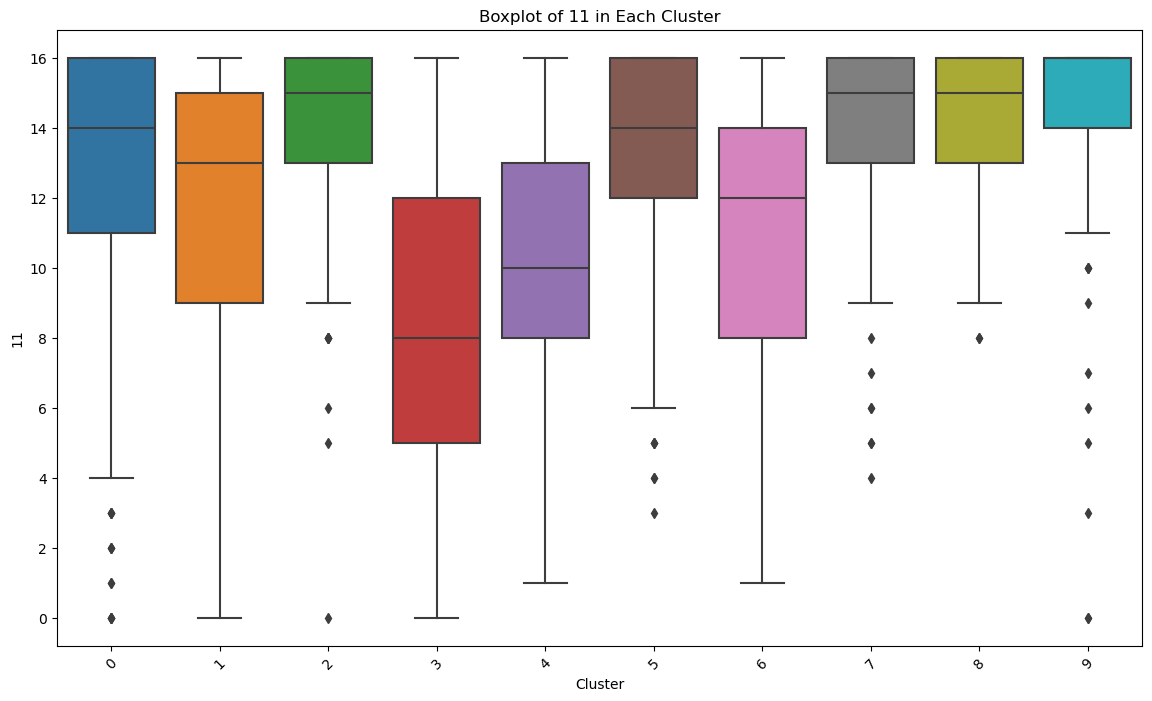

Summary statistics for 11:
         count       mean       std  min   25%   50%   75%   max
Cluster                                                         
0        228.0  12.574561  4.057805  0.0  11.0  14.0  16.0  16.0
1        218.0  11.591743  4.032509  0.0   9.0  13.0  15.0  16.0
2        117.0  13.794872  2.887364  0.0  13.0  15.0  16.0  16.0
3        268.0   8.757463  3.987450  0.0   5.0   8.0  12.0  16.0
4        197.0  10.081218  3.393196  1.0   8.0  10.0  13.0  16.0
5        171.0  13.111111  3.161244  3.0  12.0  14.0  16.0  16.0
6        188.0  11.063830  3.814715  1.0   8.0  12.0  14.0  16.0
7        134.0  14.141791  2.658941  4.0  13.0  15.0  16.0  16.0
8        160.0  14.462500  1.971136  8.0  13.0  15.0  16.0  16.0
9        116.0  14.267241  3.110593  0.0  14.0  16.0  16.0  16.0




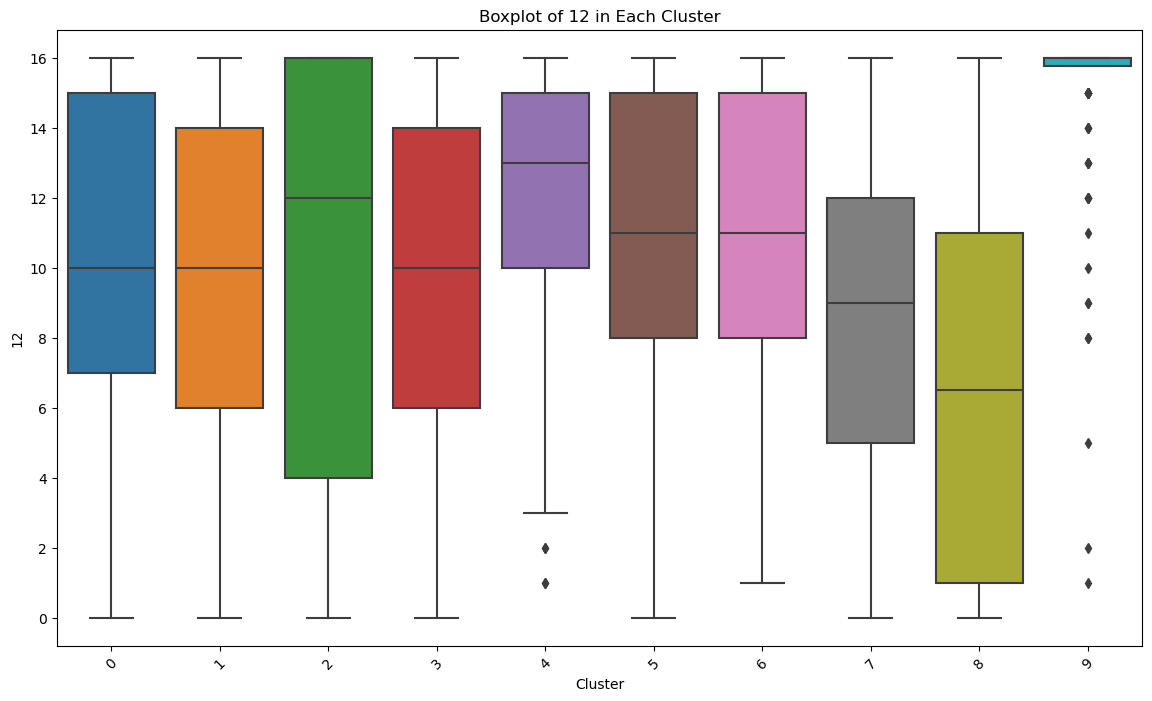

Summary statistics for 12:
         count       mean       std  min    25%   50%   75%   max
Cluster                                                          
0        228.0  10.289474  4.573865  0.0   7.00  10.0  15.0  16.0
1        218.0   9.637615  4.637242  0.0   6.00  10.0  14.0  16.0
2        117.0  10.068376  5.657961  0.0   4.00  12.0  16.0  16.0
3        268.0   9.861940  4.395219  0.0   6.00  10.0  14.0  16.0
4        197.0  12.365482  3.595409  1.0  10.00  13.0  15.0  16.0
5        171.0  10.760234  4.383907  0.0   8.00  11.0  15.0  16.0
6        188.0  10.675532  4.108949  1.0   8.00  11.0  15.0  16.0
7        134.0   8.589552  4.287090  0.0   5.00   9.0  12.0  16.0
8        160.0   6.487500  5.208831  0.0   1.00   6.5  11.0  16.0
9        116.0  14.931034  2.666129  1.0  15.75  16.0  16.0  16.0




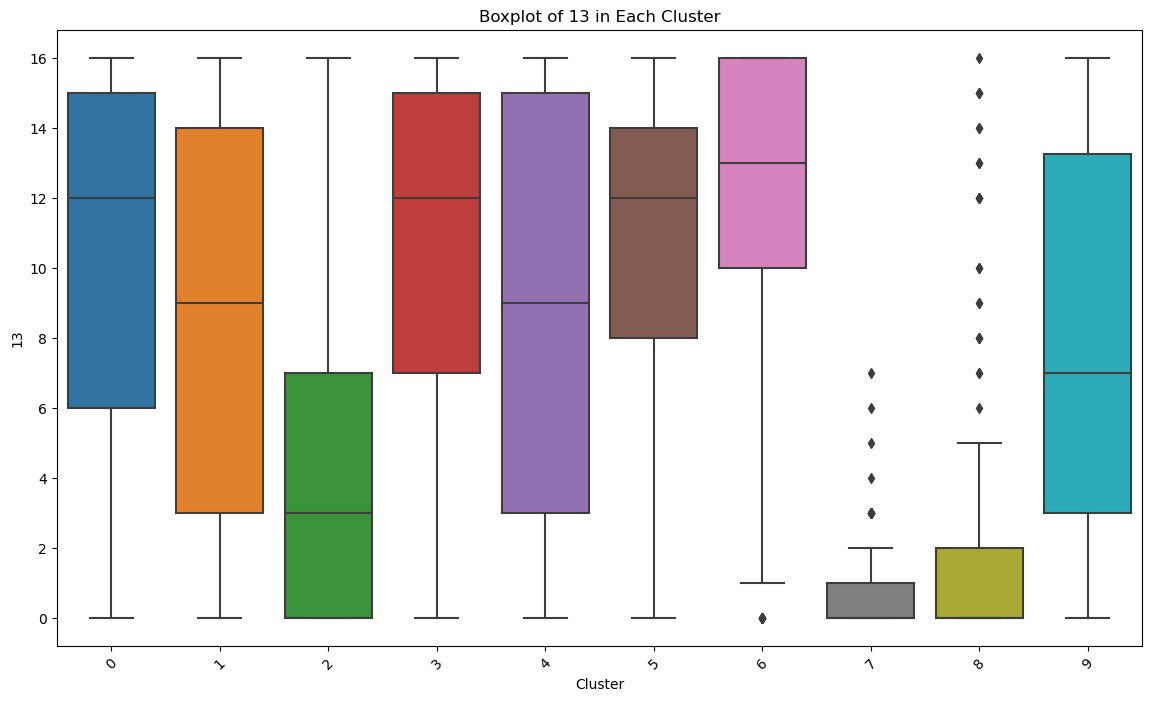

Summary statistics for 13:
         count       mean       std  min   25%   50%    75%   max
Cluster                                                          
0        228.0  10.184211  5.525377  0.0   6.0  12.0  15.00  16.0
1        218.0   8.504587  5.855595  0.0   3.0   9.0  14.00  16.0
2        117.0   4.598291  4.994928  0.0   0.0   3.0   7.00  16.0
3        268.0  10.630597  4.961435  0.0   7.0  12.0  15.00  16.0
4        197.0   8.705584  5.980804  0.0   3.0   9.0  15.00  16.0
5        171.0  10.766082  4.263831  0.0   8.0  12.0  14.00  16.0
6        188.0  11.952128  4.600958  0.0  10.0  13.0  16.00  16.0
7        134.0   0.589552  1.233692  0.0   0.0   0.0   1.00   7.0
8        160.0   1.987500  3.917366  0.0   0.0   0.0   2.00  16.0
9        116.0   8.008621  5.501772  0.0   3.0   7.0  13.25  16.0




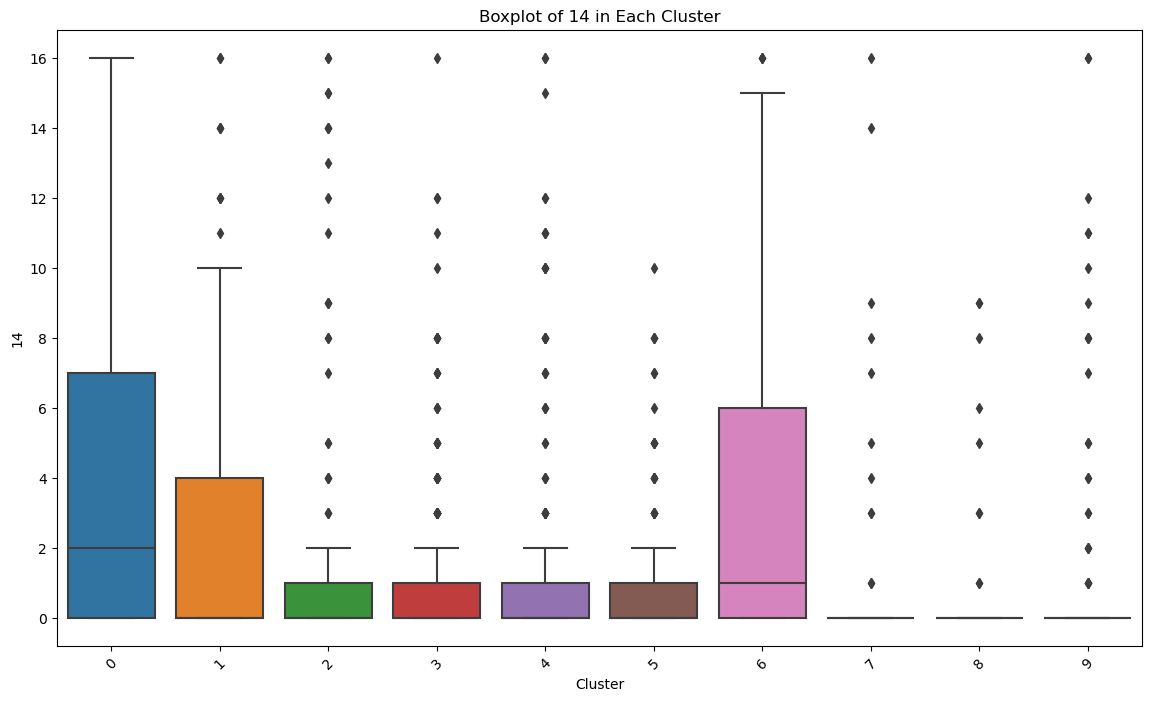

Summary statistics for 14:
         count      mean       std  min  25%  50%  75%   max
Cluster                                                     
0        228.0  3.956140  4.863585  0.0  0.0  2.0  7.0  16.0
1        218.0  2.229358  3.582170  0.0  0.0  0.0  4.0  16.0
2        117.0  2.008547  4.235514  0.0  0.0  0.0  1.0  16.0
3        268.0  1.130597  2.406630  0.0  0.0  0.0  1.0  16.0
4        197.0  1.543147  3.332649  0.0  0.0  0.0  1.0  16.0
5        171.0  0.929825  1.861622  0.0  0.0  0.0  1.0  10.0
6        188.0  3.526596  4.511937  0.0  0.0  1.0  6.0  16.0
7        134.0  0.529851  2.243421  0.0  0.0  0.0  0.0  16.0
8        160.0  0.281250  1.360595  0.0  0.0  0.0  0.0   9.0
9        116.0  1.293103  3.286381  0.0  0.0  0.0  0.0  16.0




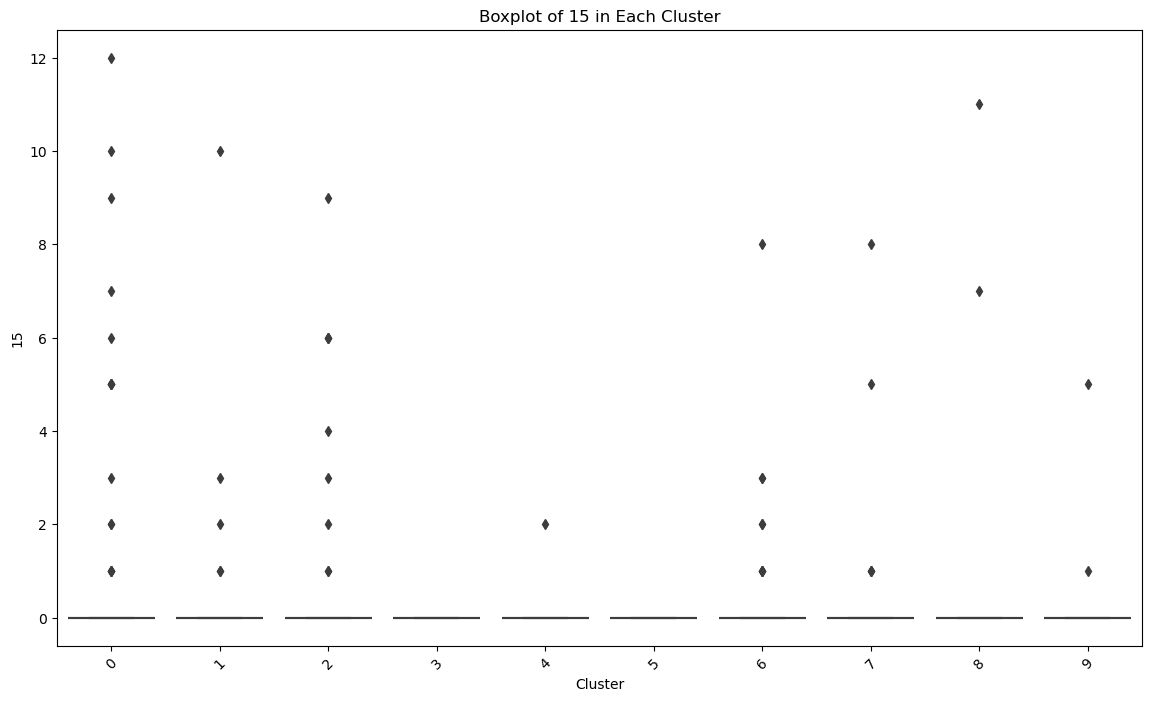

Summary statistics for 15:
         count      mean       std  min  25%  50%  75%   max
Cluster                                                     
0        228.0  0.328947  1.493494  0.0  0.0  0.0  0.0  12.0
1        218.0  0.077982  0.723771  0.0  0.0  0.0  0.0  10.0
2        117.0  0.324786  1.337967  0.0  0.0  0.0  0.0   9.0
3        268.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0
4        197.0  0.010152  0.142494  0.0  0.0  0.0  0.0   2.0
5        171.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0
6        188.0  0.117021  0.699219  0.0  0.0  0.0  0.0   8.0
7        134.0  0.119403  0.823022  0.0  0.0  0.0  0.0   8.0
8        160.0  0.112500  1.027836  0.0  0.0  0.0  0.0  11.0
9        116.0  0.051724  0.472640  0.0  0.0  0.0  0.0   5.0




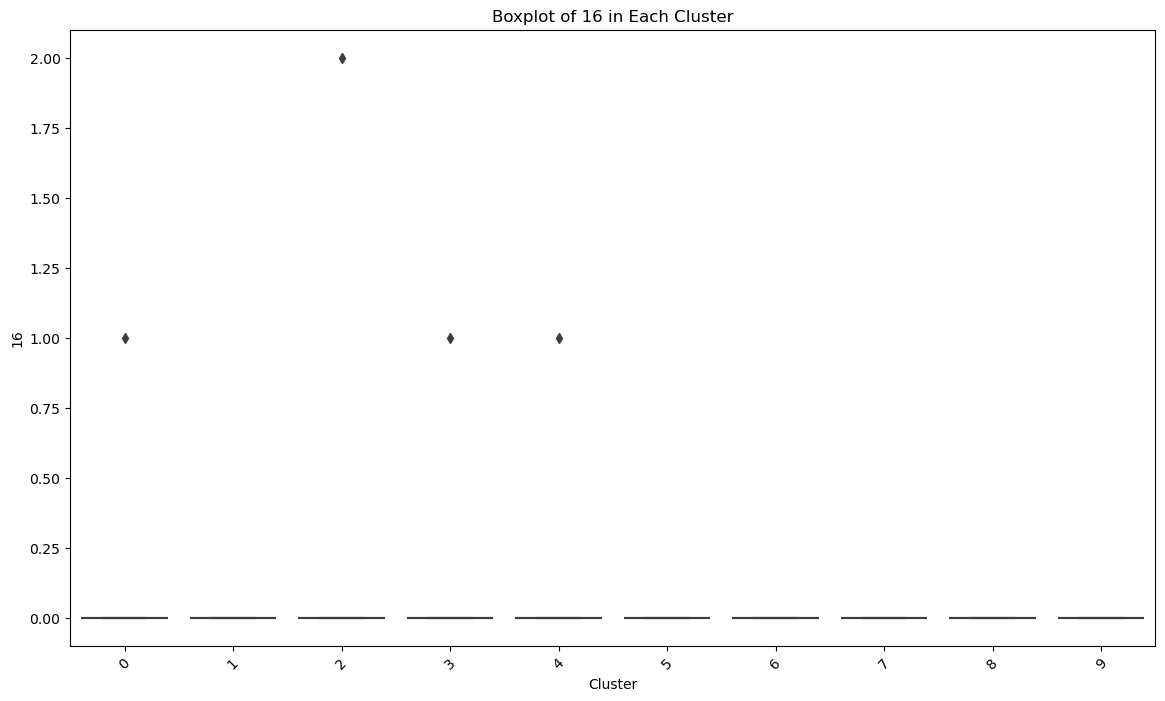

Summary statistics for 16:
         count      mean       std  min  25%  50%  75%  max
Cluster                                                    
0        228.0  0.004386  0.066227  0.0  0.0  0.0  0.0  1.0
1        218.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
2        117.0  0.017094  0.184900  0.0  0.0  0.0  0.0  2.0
3        268.0  0.003731  0.061085  0.0  0.0  0.0  0.0  1.0
4        197.0  0.005076  0.071247  0.0  0.0  0.0  0.0  1.0
5        171.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
6        188.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
7        134.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
8        160.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
9        116.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0




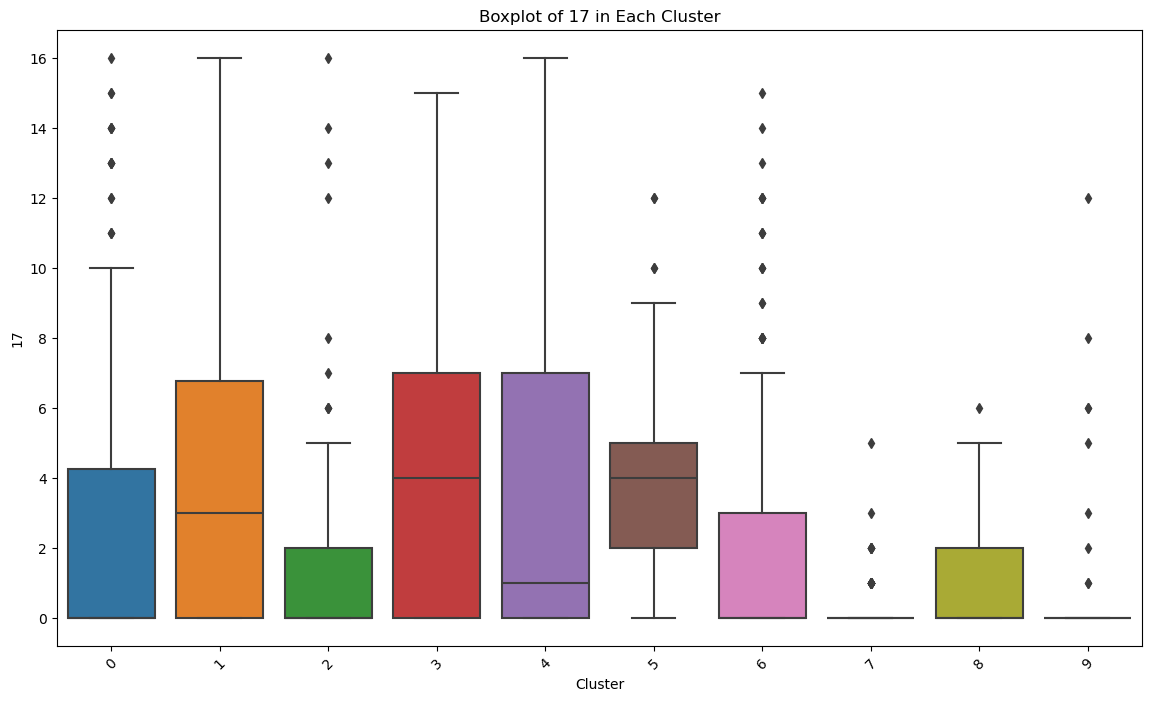

Summary statistics for 17:
         count      mean       std  min  25%  50%   75%   max
Cluster                                                      
0        228.0  2.771930  4.075359  0.0  0.0  0.0  4.25  16.0
1        218.0  3.839450  3.874399  0.0  0.0  3.0  6.75  16.0
2        117.0  1.401709  2.888920  0.0  0.0  0.0  2.00  16.0
3        268.0  3.973881  3.801644  0.0  0.0  4.0  7.00  15.0
4        197.0  3.482234  4.351394  0.0  0.0  1.0  7.00  16.0
5        171.0  3.842105  2.594946  0.0  2.0  4.0  5.00  12.0
6        188.0  2.127660  3.569730  0.0  0.0  0.0  3.00  15.0
7        134.0  0.283582  0.700289  0.0  0.0  0.0  0.00   5.0
8        160.0  0.950000  1.390896  0.0  0.0  0.0  2.00   6.0
9        116.0  0.379310  1.624032  0.0  0.0  0.0  0.00  12.0




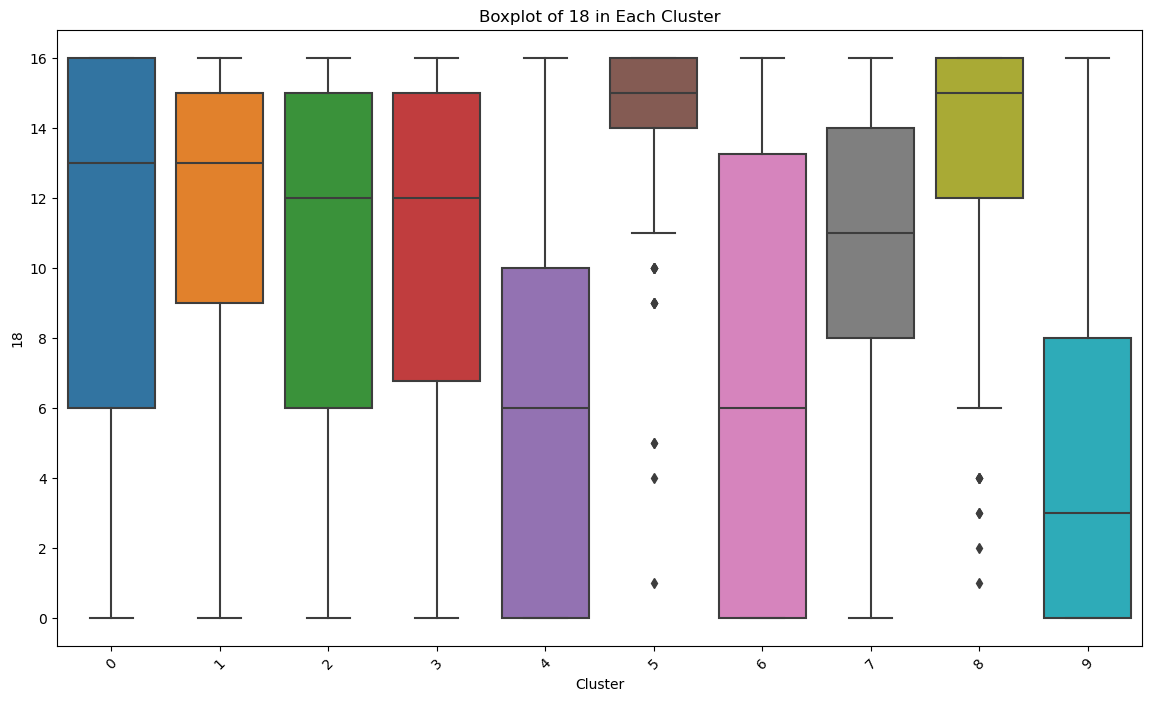

Summary statistics for 18:
         count       mean       std  min    25%   50%    75%   max
Cluster                                                           
0        228.0  10.526316  5.600048  0.0   6.00  13.0  16.00  16.0
1        218.0  11.591743  4.777378  0.0   9.00  13.0  15.00  16.0
2        117.0  10.555556  5.156924  0.0   6.00  12.0  15.00  16.0
3        268.0  10.018657  5.290408  0.0   6.75  12.0  15.00  16.0
4        197.0   5.949239  5.292222  0.0   0.00   6.0  10.00  16.0
5        171.0  14.345029  2.516584  1.0  14.00  15.0  16.00  16.0
6        188.0   6.776596  6.339173  0.0   0.00   6.0  13.25  16.0
7        134.0  10.492537  4.192270  0.0   8.00  11.0  14.00  16.0
8        160.0  13.331250  3.380897  1.0  12.00  15.0  16.00  16.0
9        116.0   4.405172  4.943117  0.0   0.00   3.0   8.00  16.0




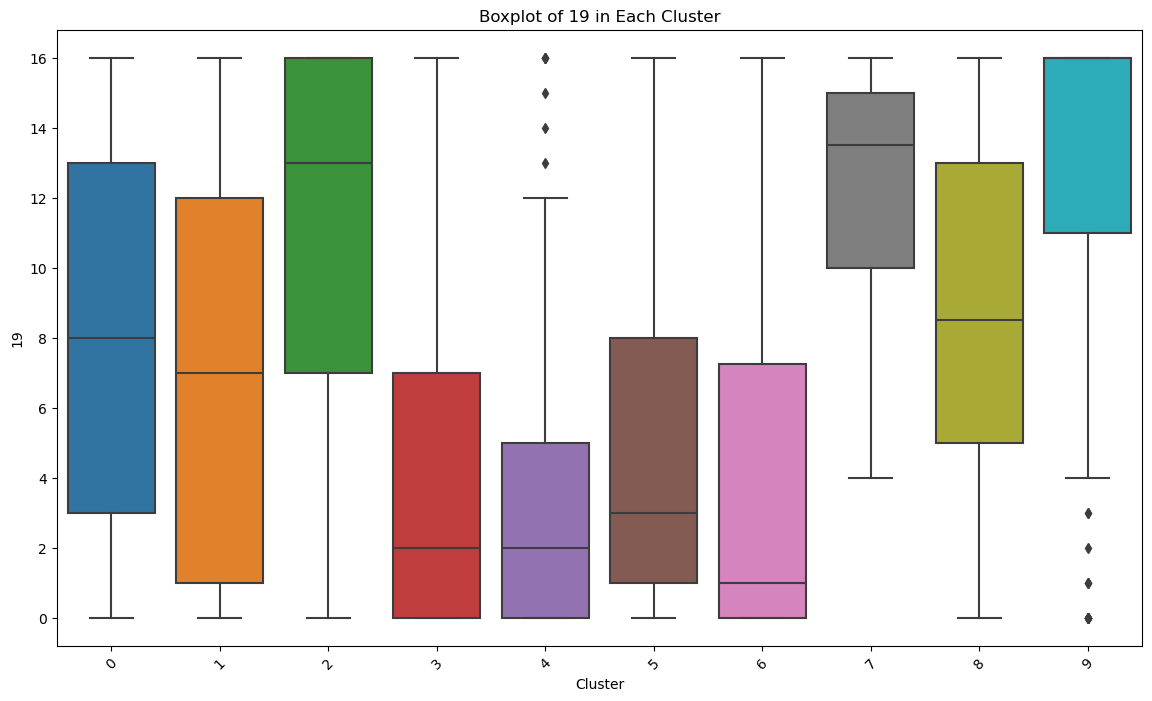

Summary statistics for 19:
         count       mean       std  min   25%   50%    75%   max
Cluster                                                          
0        228.0   7.986842  5.583551  0.0   3.0   8.0  13.00  16.0
1        218.0   7.201835  5.767028  0.0   1.0   7.0  12.00  16.0
2        117.0  11.350427  4.855349  0.0   7.0  13.0  16.00  16.0
3        268.0   4.264925  4.779870  0.0   0.0   2.0   7.00  16.0
4        197.0   3.187817  3.738964  0.0   0.0   2.0   5.00  16.0
5        171.0   4.742690  4.507953  0.0   1.0   3.0   8.00  16.0
6        188.0   4.127660  5.209481  0.0   0.0   1.0   7.25  16.0
7        134.0  12.574627  3.095903  4.0  10.0  13.5  15.00  16.0
8        160.0   8.600000  4.747989  0.0   5.0   8.5  13.00  16.0
9        116.0  12.310345  5.622028  0.0  11.0  16.0  16.00  16.0




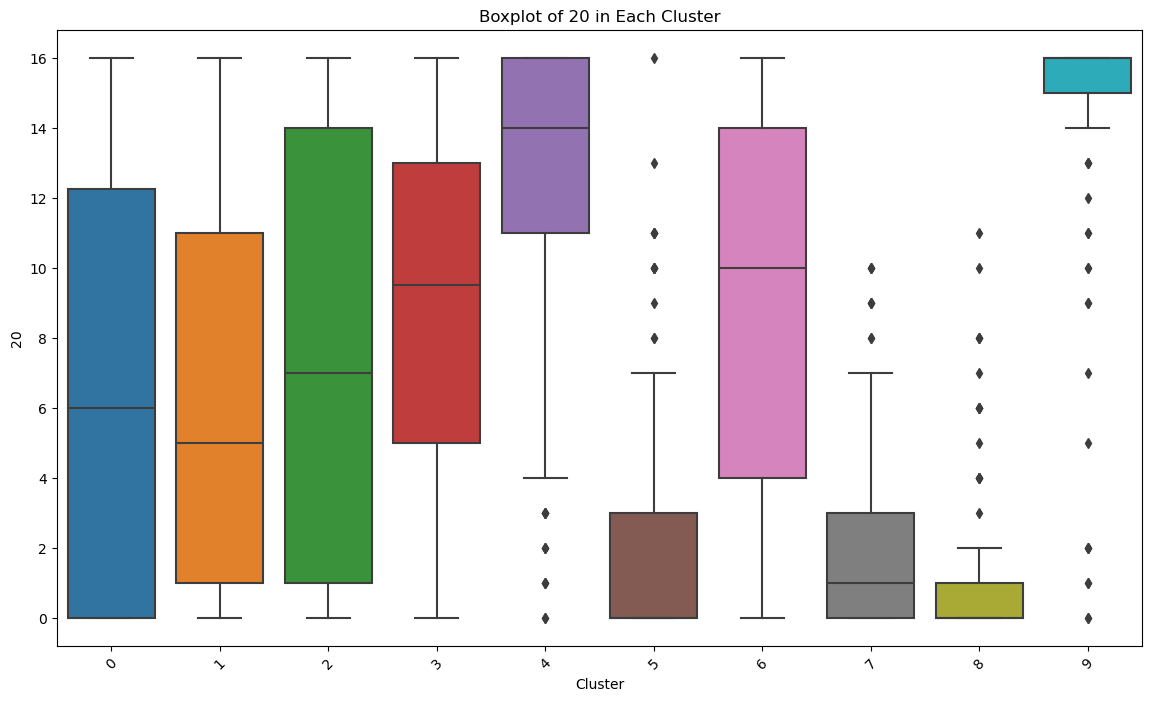

Summary statistics for 20:
         count       mean       std  min   25%   50%    75%   max
Cluster                                                          
0        228.0   6.557018  6.217872  0.0   0.0   6.0  12.25  16.0
1        218.0   6.573394  5.684211  0.0   1.0   5.0  11.00  16.0
2        117.0   7.760684  6.176498  0.0   1.0   7.0  14.00  16.0
3        268.0   8.858209  5.088215  0.0   5.0   9.5  13.00  16.0
4        197.0  12.395939  4.170546  0.0  11.0  14.0  16.00  16.0
5        171.0   1.964912  3.115228  0.0   0.0   0.0   3.00  16.0
6        188.0   8.962766  5.463902  0.0   4.0  10.0  14.00  16.0
7        134.0   2.037313  2.593824  0.0   0.0   1.0   3.00  10.0
8        160.0   0.881250  2.007445  0.0   0.0   0.0   1.00  11.0
9        116.0  14.379310  3.882301  0.0  15.0  16.0  16.00  16.0




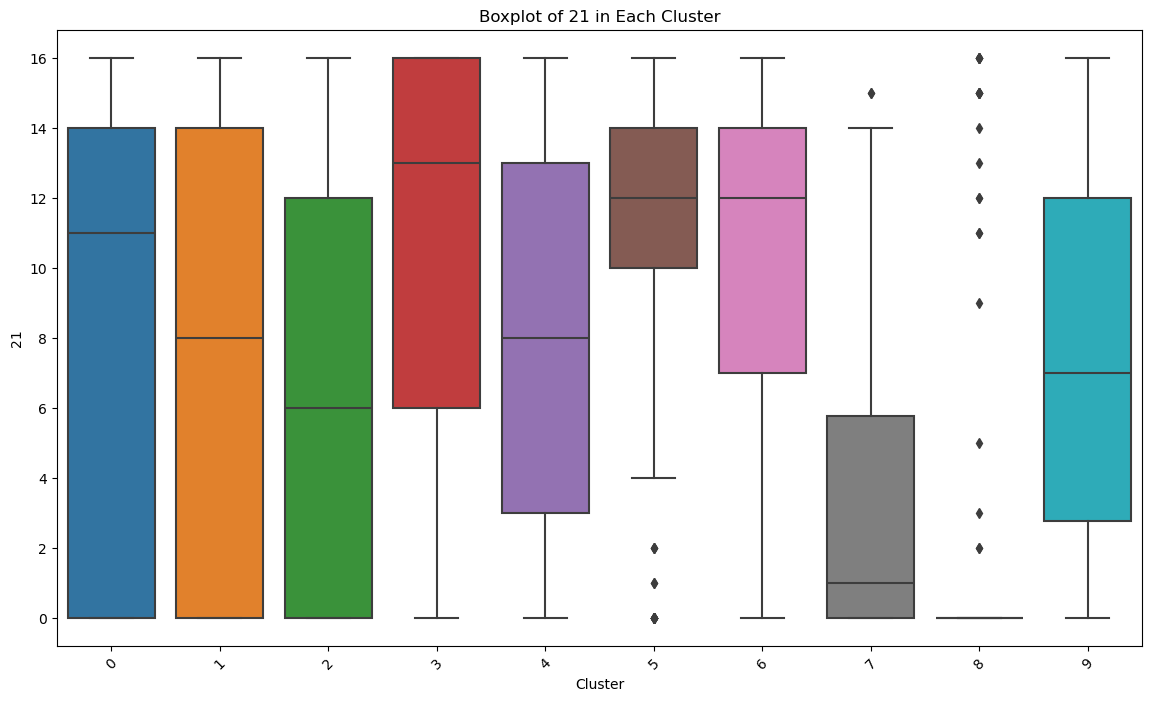

Summary statistics for 21:
         count       mean       std  min    25%   50%    75%   max
Cluster                                                           
0        228.0   8.530702  6.316465  0.0   0.00  11.0  14.00  16.0
1        218.0   7.399083  6.596424  0.0   0.00   8.0  14.00  16.0
2        117.0   6.692308  5.796047  0.0   0.00   6.0  12.00  16.0
3        268.0  10.481343  5.904010  0.0   6.00  13.0  16.00  16.0
4        197.0   8.055838  5.379660  0.0   3.00   8.0  13.00  16.0
5        171.0  11.269006  4.500736  0.0  10.00  12.0  14.00  16.0
6        188.0   9.882979  5.326468  0.0   7.00  12.0  14.00  16.0
7        134.0   3.067164  4.039649  0.0   0.00   1.0   5.75  15.0
8        160.0   1.556250  4.369343  0.0   0.00   0.0   0.00  16.0
9        116.0   7.293103  5.329193  0.0   2.75   7.0  12.00  16.0




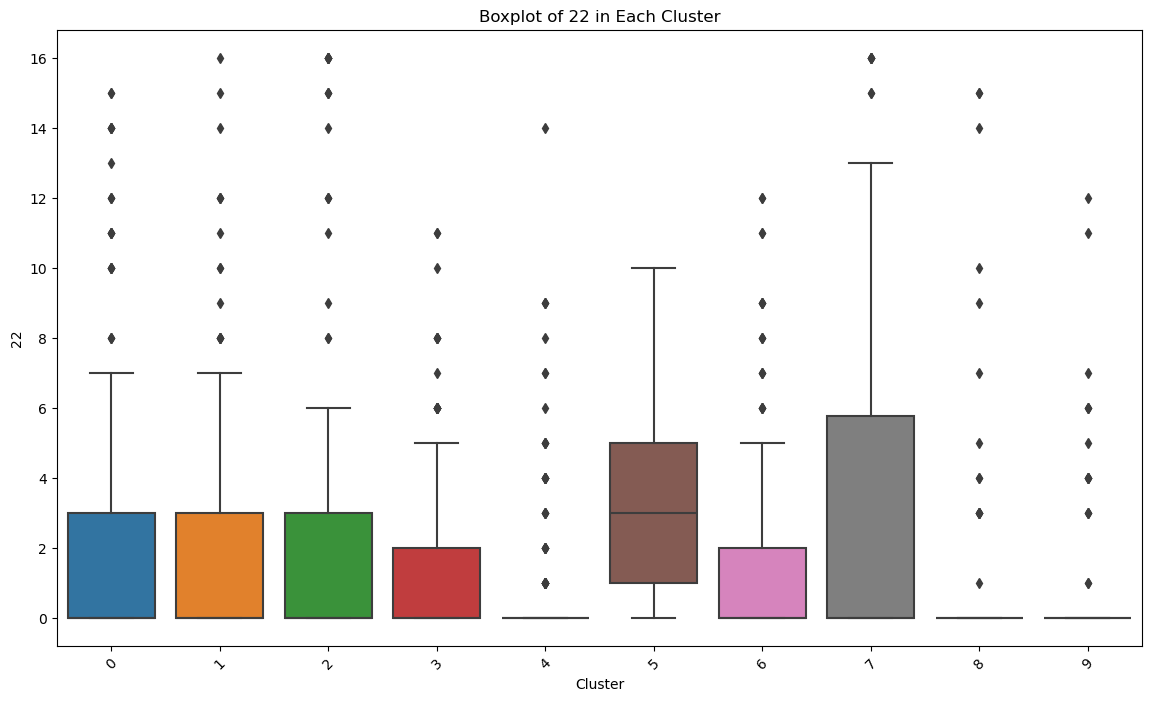

Summary statistics for 22:
         count      mean       std  min  25%  50%   75%   max
Cluster                                                      
0        228.0  2.276316  3.777742  0.0  0.0  0.0  3.00  15.0
1        218.0  1.876147  3.241192  0.0  0.0  0.0  3.00  16.0
2        117.0  2.615385  4.984193  0.0  0.0  0.0  3.00  16.0
3        268.0  1.384328  2.249773  0.0  0.0  0.0  2.00  11.0
4        197.0  0.771574  2.023738  0.0  0.0  0.0  0.00  14.0
5        171.0  3.385965  2.729497  0.0  1.0  3.0  5.00  10.0
6        188.0  1.425532  2.662833  0.0  0.0  0.0  2.00  12.0
7        134.0  3.186567  4.803144  0.0  0.0  0.0  5.75  16.0
8        160.0  0.618750  2.402493  0.0  0.0  0.0  0.00  15.0
9        116.0  0.724138  2.075054  0.0  0.0  0.0  0.00  12.0




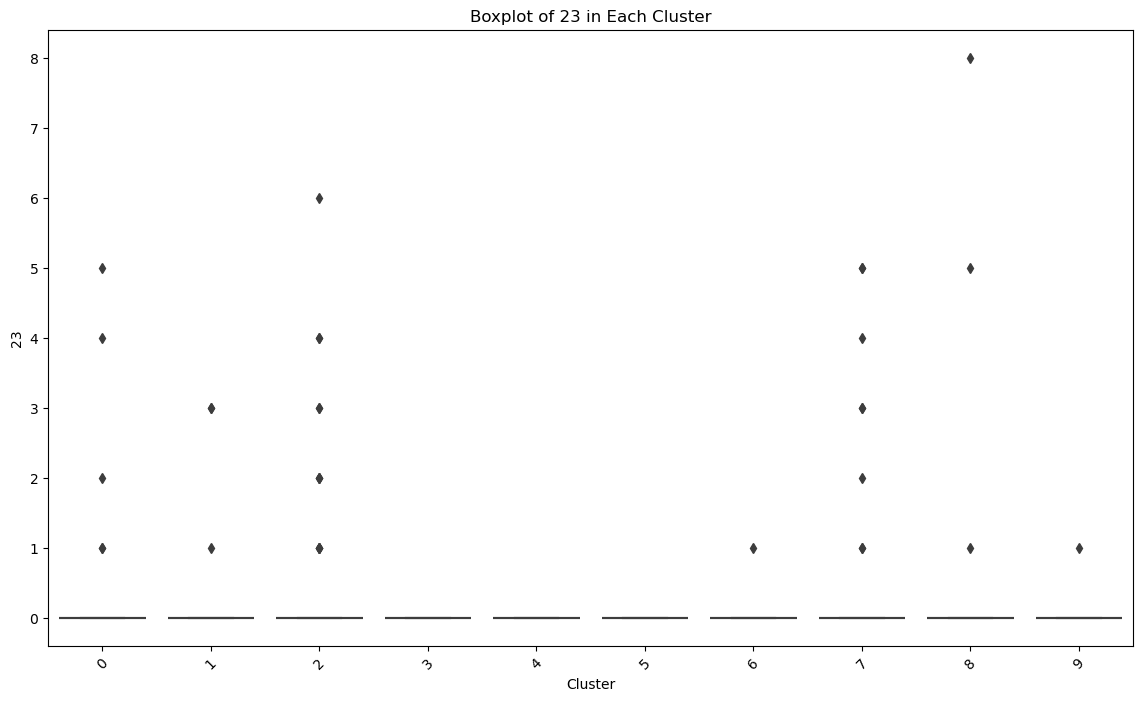

Summary statistics for 23:
         count      mean       std  min  25%  50%  75%  max
Cluster                                                    
0        228.0  0.057018  0.451423  0.0  0.0  0.0  0.0  5.0
1        218.0  0.032110  0.294146  0.0  0.0  0.0  0.0  3.0
2        117.0  0.256410  0.901664  0.0  0.0  0.0  0.0  6.0
3        268.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
4        197.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
5        171.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
6        188.0  0.005319  0.072932  0.0  0.0  0.0  0.0  1.0
7        134.0  0.179104  0.802728  0.0  0.0  0.0  0.0  5.0
8        160.0  0.087500  0.747217  0.0  0.0  0.0  0.0  8.0
9        116.0  0.008621  0.092848  0.0  0.0  0.0  0.0  1.0




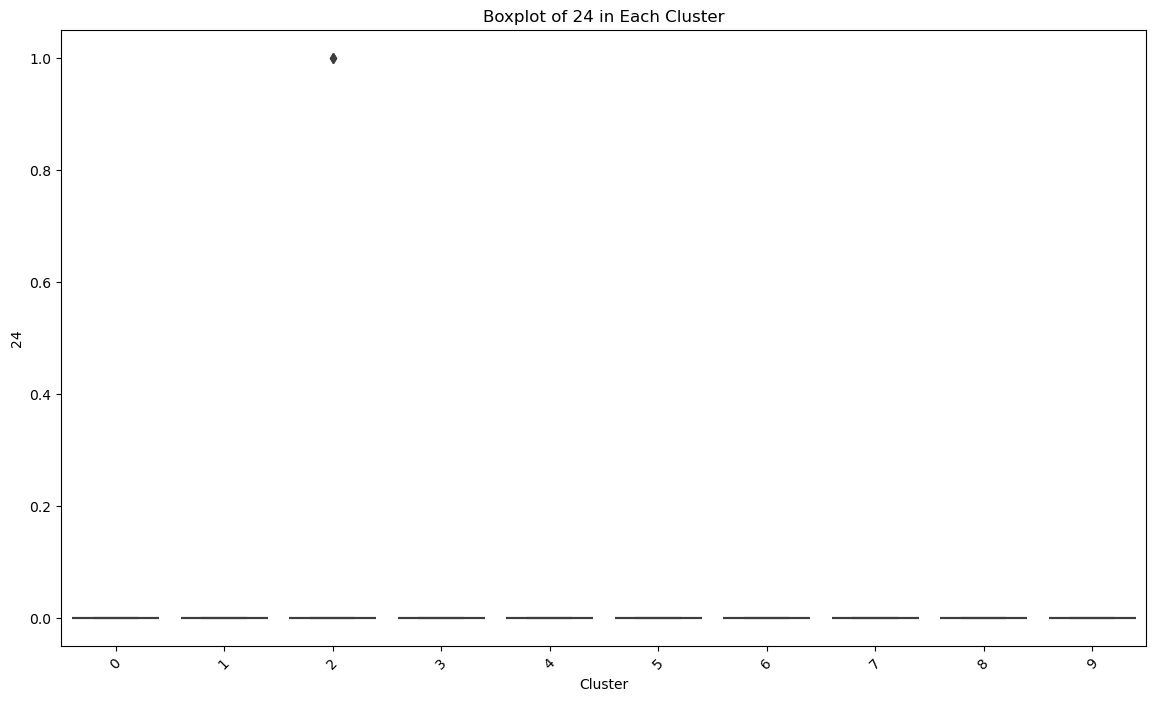

Summary statistics for 24:
         count      mean       std  min  25%  50%  75%  max
Cluster                                                    
0        228.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
1        218.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
2        117.0  0.017094  0.130179  0.0  0.0  0.0  0.0  1.0
3        268.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
4        197.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
5        171.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
6        188.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
7        134.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
8        160.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
9        116.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0




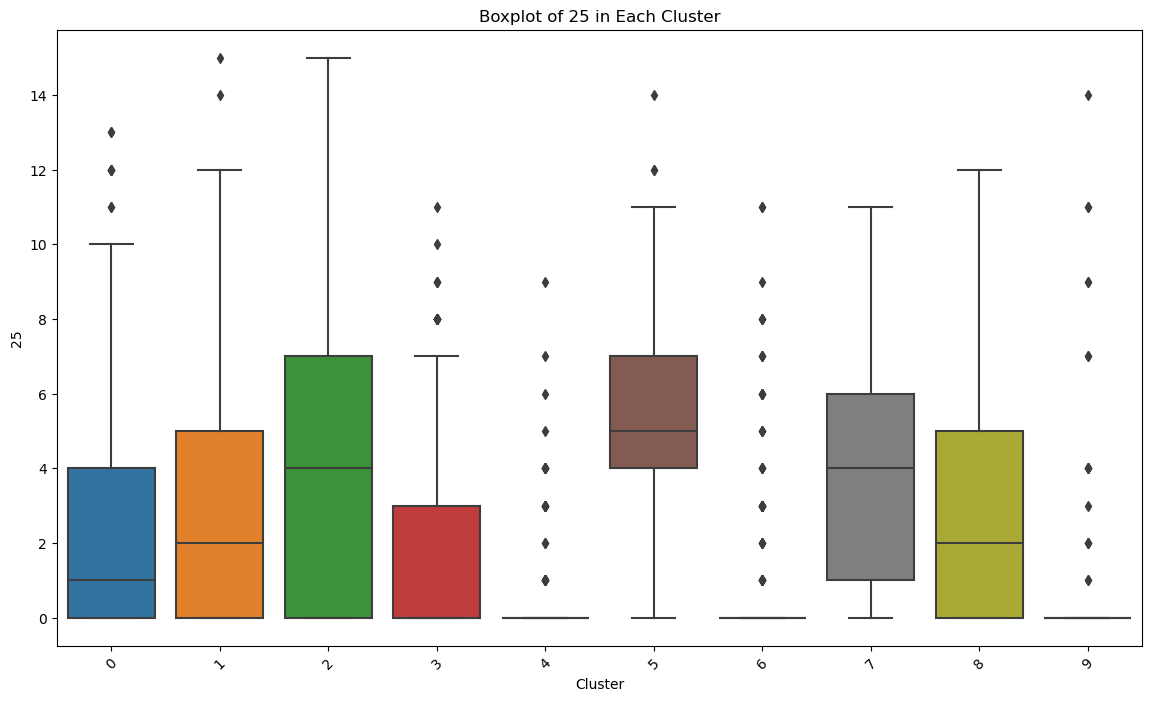

Summary statistics for 25:
         count      mean       std  min  25%  50%  75%   max
Cluster                                                     
0        228.0  2.539474  3.421006  0.0  0.0  1.0  4.0  13.0
1        218.0  2.949541  3.459073  0.0  0.0  2.0  5.0  15.0
2        117.0  4.196581  3.821986  0.0  0.0  4.0  7.0  15.0
3        268.0  1.746269  2.628528  0.0  0.0  0.0  3.0  11.0
4        197.0  0.472081  1.334580  0.0  0.0  0.0  0.0   9.0
5        171.0  5.543860  2.401496  0.0  4.0  5.0  7.0  14.0
6        188.0  0.957447  2.188521  0.0  0.0  0.0  0.0  11.0
7        134.0  3.619403  2.776905  0.0  1.0  4.0  6.0  11.0
8        160.0  2.850000  2.680467  0.0  0.0  2.0  5.0  12.0
9        116.0  0.818966  2.479829  0.0  0.0  0.0  0.0  14.0




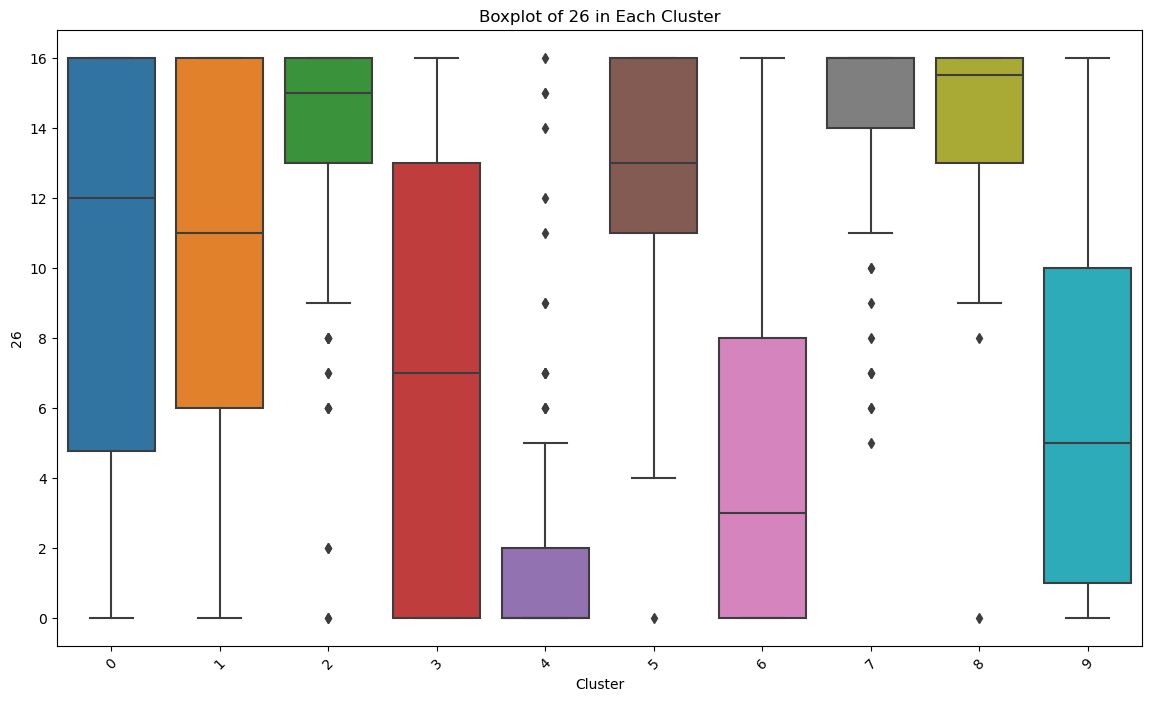

Summary statistics for 26:
         count       mean       std  min    25%   50%   75%   max
Cluster                                                          
0        228.0   9.921053  6.010482  0.0   4.75  12.0  16.0  16.0
1        218.0  10.316514  5.333643  0.0   6.00  11.0  16.0  16.0
2        117.0  13.452991  3.594766  0.0  13.00  15.0  16.0  16.0
3        268.0   7.264925  5.985685  0.0   0.00   7.0  13.0  16.0
4        197.0   1.431472  2.952278  0.0   0.00   0.0   2.0  16.0
5        171.0  12.608187  3.256440  0.0  11.00  13.0  16.0  16.0
6        188.0   4.941489  5.289661  0.0   0.00   3.0   8.0  16.0
7        134.0  14.455224  2.432906  5.0  14.00  16.0  16.0  16.0
8        160.0  14.437500  2.211142  0.0  13.00  15.5  16.0  16.0
9        116.0   5.956897  5.133678  0.0   1.00   5.0  10.0  16.0




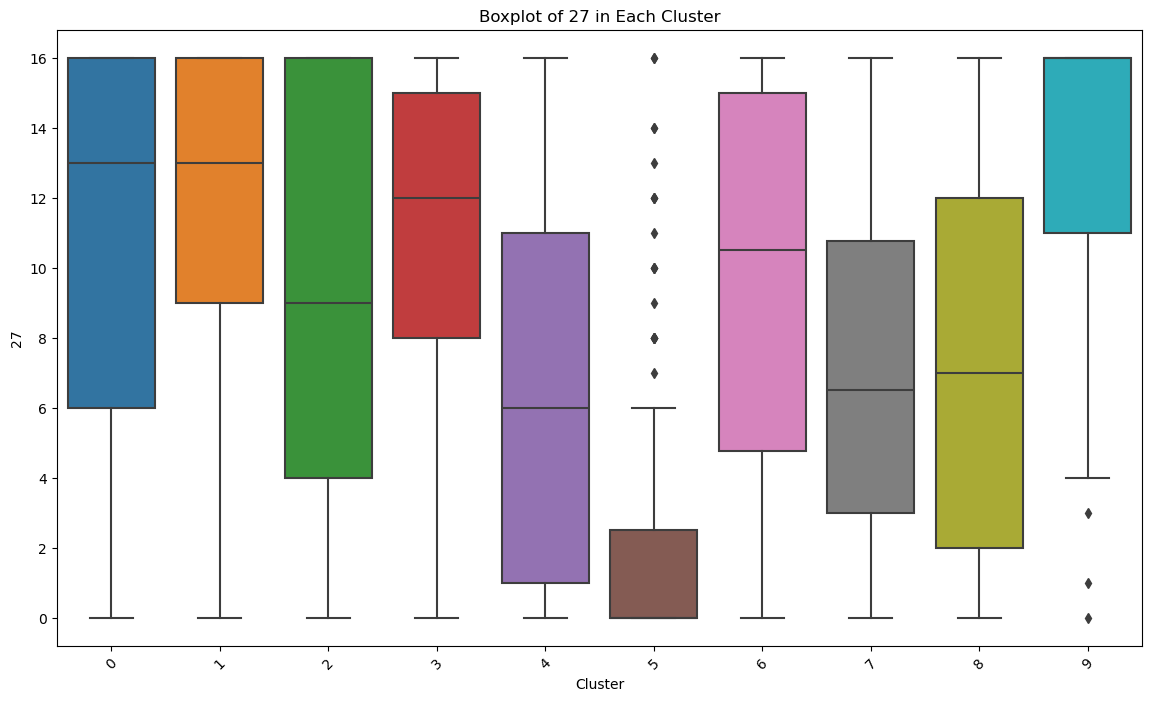

Summary statistics for 27:
         count       mean       std  min    25%   50%    75%   max
Cluster                                                           
0        228.0  10.618421  5.836918  0.0   6.00  13.0  16.00  16.0
1        218.0  11.431193  5.162550  0.0   9.00  13.0  16.00  16.0
2        117.0   9.290598  5.842856  0.0   4.00   9.0  16.00  16.0
3        268.0  10.541045  4.842287  0.0   8.00  12.0  15.00  16.0
4        197.0   6.431472  5.269437  0.0   1.00   6.0  11.00  16.0
5        171.0   1.964912  3.615156  0.0   0.00   0.0   2.50  16.0
6        188.0   9.670213  5.519801  0.0   4.75  10.5  15.00  16.0
7        134.0   6.850746  4.608765  0.0   3.00   6.5  10.75  16.0
8        160.0   7.037500  5.291369  0.0   2.00   7.0  12.00  16.0
9        116.0  13.465517  4.076296  0.0  11.00  16.0  16.00  16.0




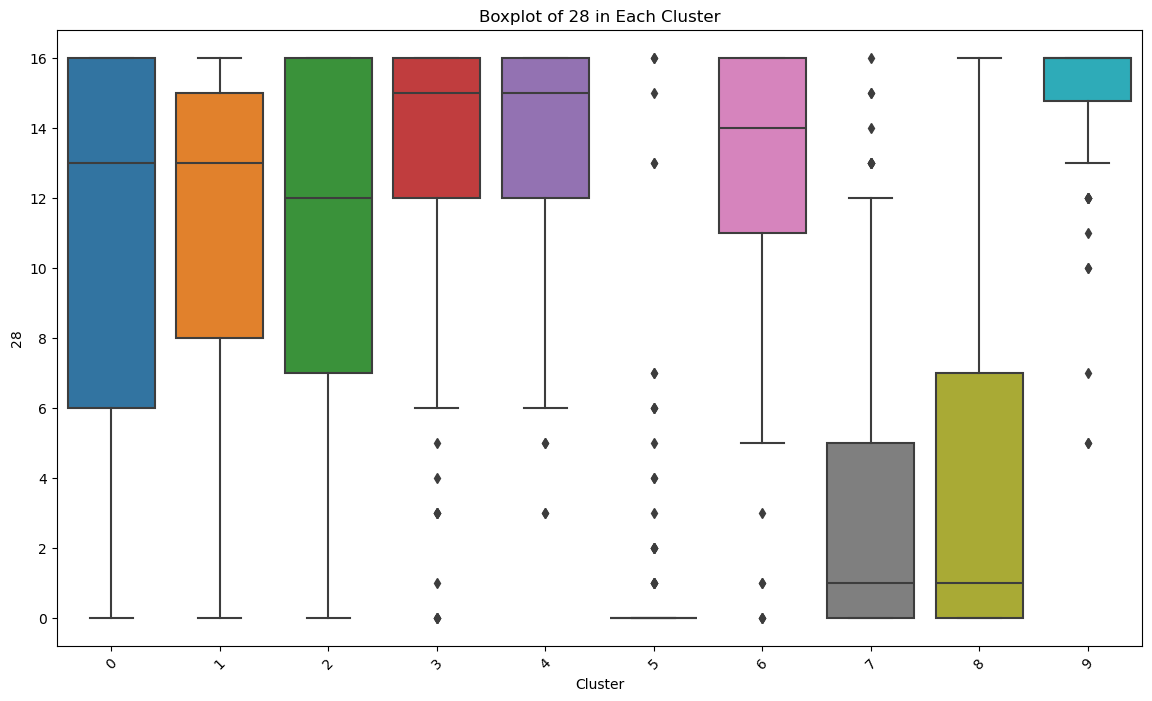

Summary statistics for 28:
         count       mean       std  min    25%   50%   75%   max
Cluster                                                          
0        228.0  10.504386  5.635396  0.0   6.00  13.0  16.0  16.0
1        218.0  11.380734  4.625814  0.0   8.00  13.0  15.0  16.0
2        117.0  10.888889  4.935407  0.0   7.00  12.0  16.0  16.0
3        268.0  13.354478  3.501377  0.0  12.00  15.0  16.0  16.0
4        197.0  13.939086  2.724856  3.0  12.00  15.0  16.0  16.0
5        171.0   0.795322  2.726597  0.0   0.00   0.0   0.0  16.0
6        188.0  13.106383  3.616563  0.0  11.00  14.0  16.0  16.0
7        134.0   3.186567  4.320206  0.0   0.00   1.0   5.0  16.0
8        160.0   3.800000  4.874268  0.0   0.00   1.0   7.0  16.0
9        116.0  14.905172  2.097528  5.0  14.75  16.0  16.0  16.0




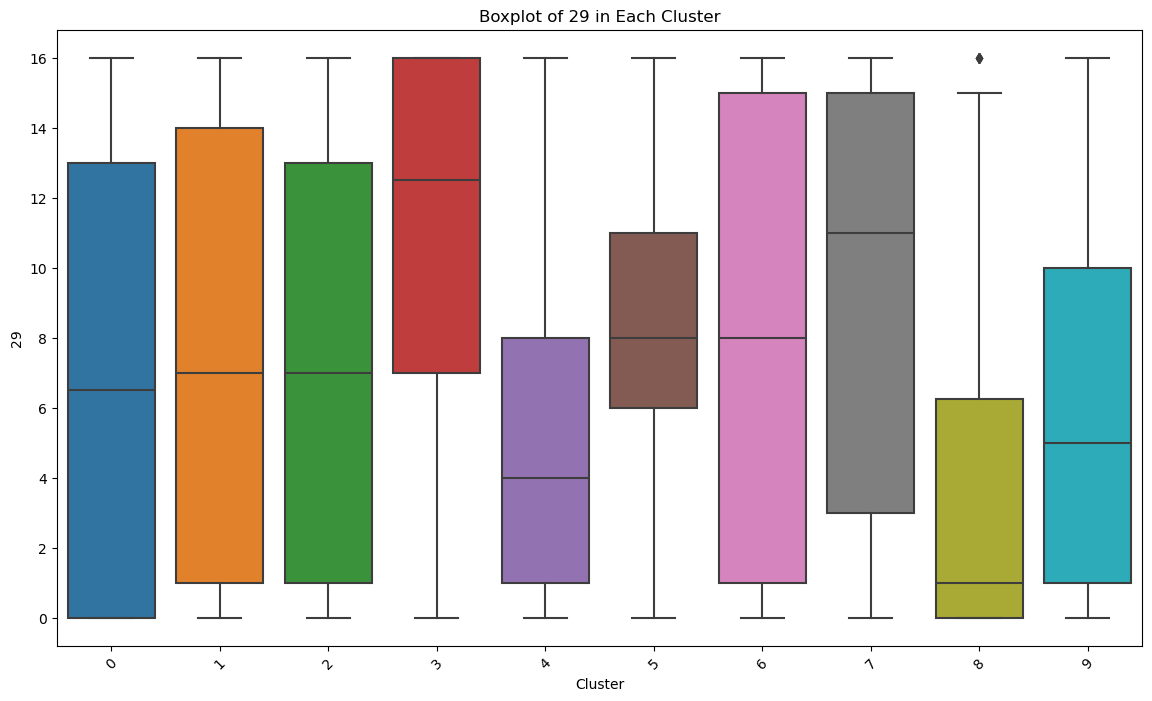

Summary statistics for 29:
         count       mean       std  min  25%   50%    75%   max
Cluster                                                         
0        228.0   7.035088  6.243841  0.0  0.0   6.5  13.00  16.0
1        218.0   7.481651  6.244048  0.0  1.0   7.0  14.00  16.0
2        117.0   7.230769  6.105939  0.0  1.0   7.0  13.00  16.0
3        268.0  11.194030  4.743579  0.0  7.0  12.5  16.00  16.0
4        197.0   5.000000  4.703451  0.0  1.0   4.0   8.00  16.0
5        171.0   8.625731  3.754250  0.0  6.0   8.0  11.00  16.0
6        188.0   8.138298  6.254156  0.0  1.0   8.0  15.00  16.0
7        134.0   9.126866  6.077719  0.0  3.0  11.0  15.00  16.0
8        160.0   3.575000  4.848069  0.0  0.0   1.0   6.25  16.0
9        116.0   6.068966  5.362874  0.0  1.0   5.0  10.00  16.0




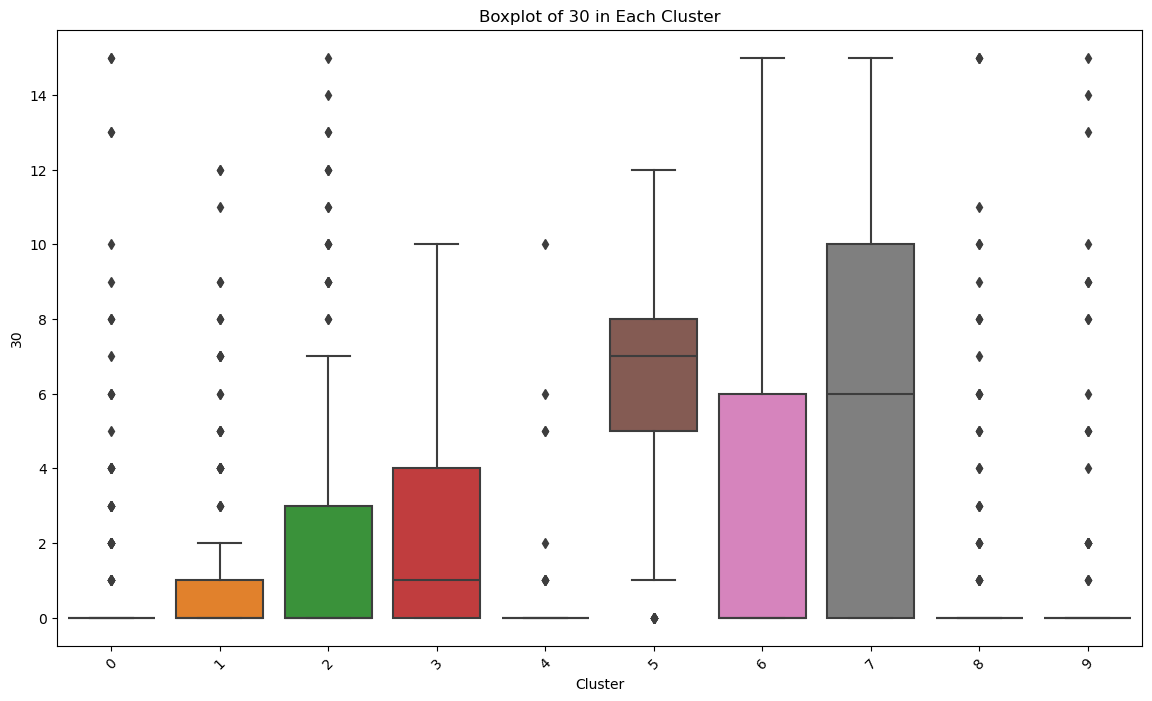

Summary statistics for 30:
         count      mean       std  min  25%  50%   75%   max
Cluster                                                      
0        228.0  0.986842  2.496659  0.0  0.0  0.0   0.0  15.0
1        218.0  1.045872  2.343283  0.0  0.0  0.0   1.0  12.0
2        117.0  2.598291  4.129498  0.0  0.0  0.0   3.0  15.0
3        268.0  2.309701  2.901178  0.0  0.0  1.0   4.0  10.0
4        197.0  0.172589  0.984917  0.0  0.0  0.0   0.0  10.0
5        171.0  6.146199  2.658333  0.0  5.0  7.0   8.0  12.0
6        188.0  3.207447  4.560297  0.0  0.0  0.0   6.0  15.0
7        134.0  5.768657  5.176457  0.0  0.0  6.0  10.0  15.0
8        160.0  1.181250  2.967056  0.0  0.0  0.0   0.0  15.0
9        116.0  1.198276  3.030913  0.0  0.0  0.0   0.0  15.0




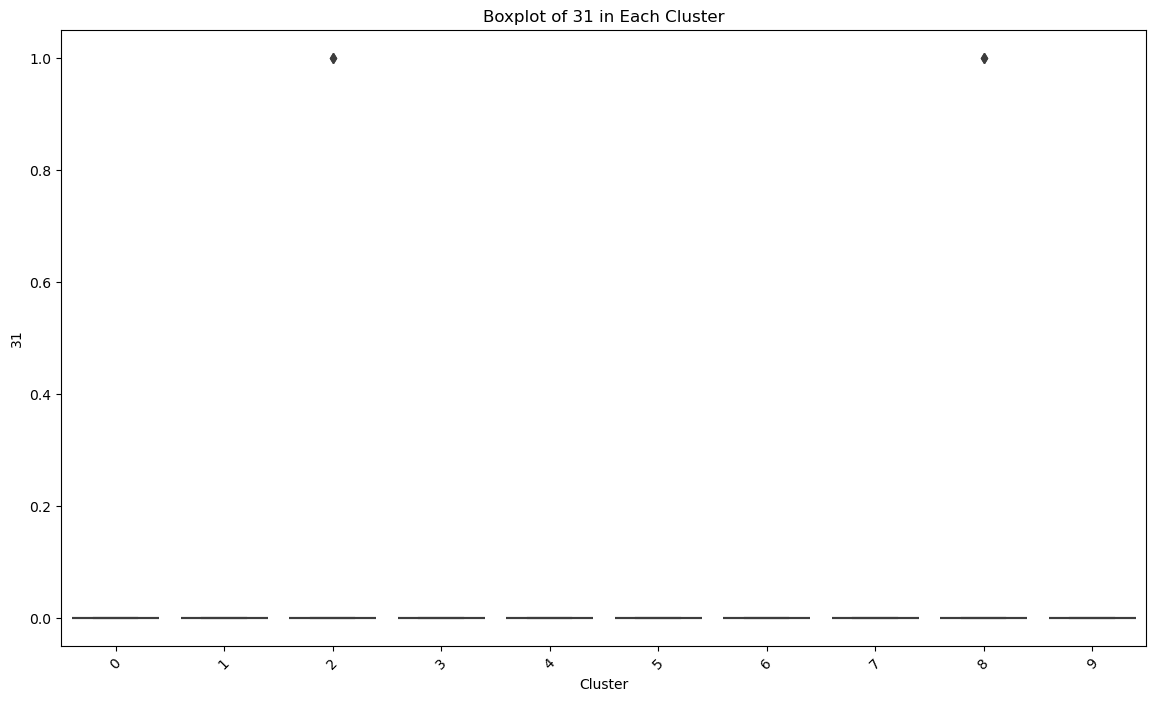

Summary statistics for 31:
         count      mean       std  min  25%  50%  75%  max
Cluster                                                    
0        228.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
1        218.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
2        117.0  0.017094  0.130179  0.0  0.0  0.0  0.0  1.0
3        268.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
4        197.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
5        171.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
6        188.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
7        134.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
8        160.0  0.012500  0.111451  0.0  0.0  0.0  0.0  1.0
9        116.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0




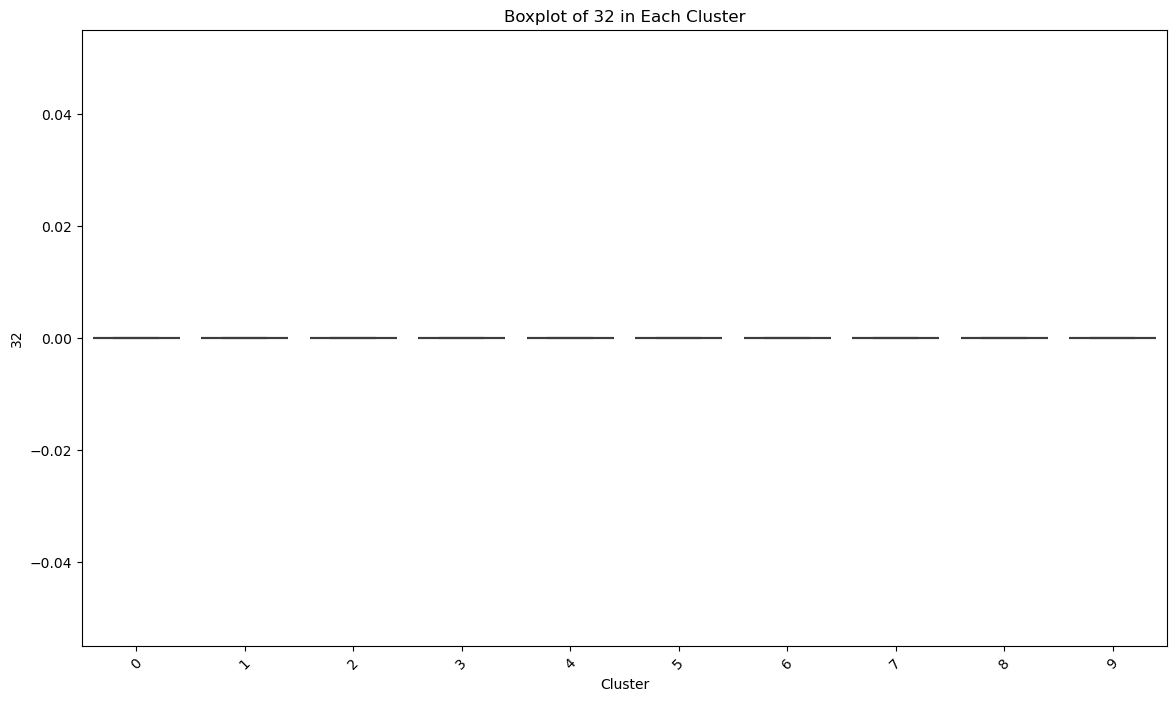

Summary statistics for 32:
         count  mean  std  min  25%  50%  75%  max
Cluster                                           
0        228.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1        218.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
2        117.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
3        268.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
4        197.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
5        171.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
6        188.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
7        134.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
8        160.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
9        116.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0




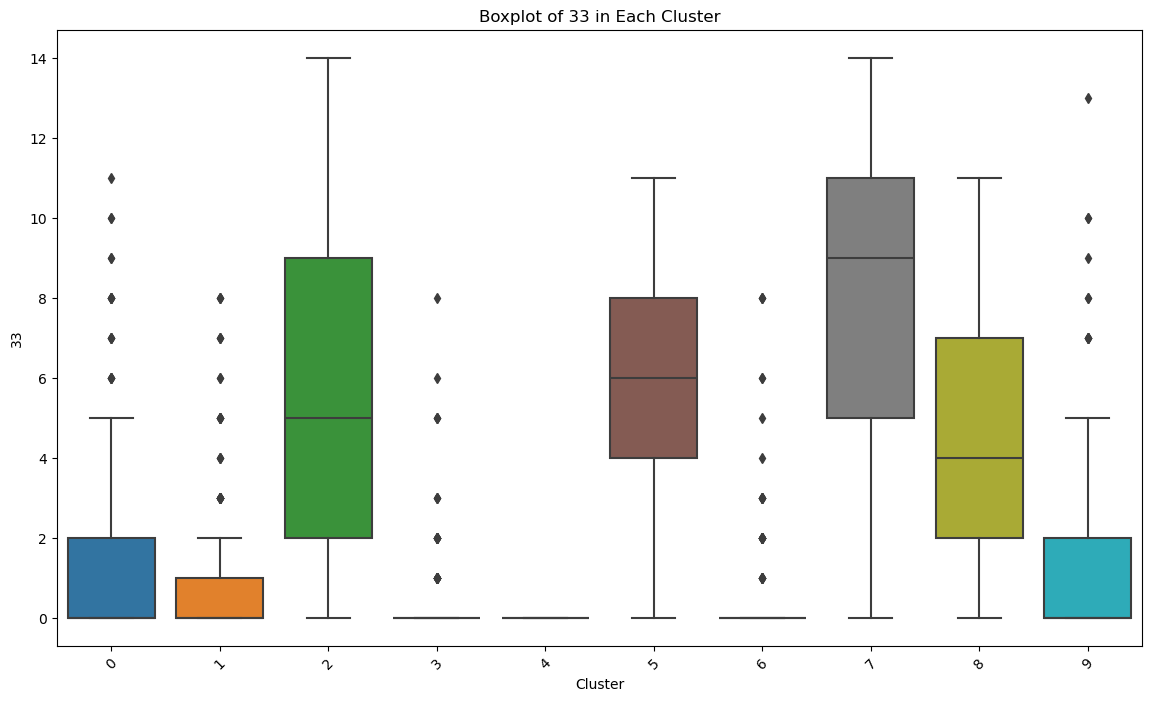

Summary statistics for 33:
         count      mean       std  min  25%  50%   75%   max
Cluster                                                      
0        228.0  1.368421  2.390374  0.0  0.0  0.0   2.0  11.0
1        218.0  0.802752  1.707288  0.0  0.0  0.0   1.0   8.0
2        117.0  5.461538  4.105376  0.0  2.0  5.0   9.0  14.0
3        268.0  0.257463  0.934633  0.0  0.0  0.0   0.0   8.0
4        197.0  0.000000  0.000000  0.0  0.0  0.0   0.0   0.0
5        171.0  5.847953  2.264881  0.0  4.0  6.0   8.0  11.0
6        188.0  0.489362  1.397053  0.0  0.0  0.0   0.0   8.0
7        134.0  7.970149  4.363106  0.0  5.0  9.0  11.0  14.0
8        160.0  4.300000  2.760458  0.0  2.0  4.0   7.0  11.0
9        116.0  1.387931  2.685781  0.0  0.0  0.0   2.0  13.0




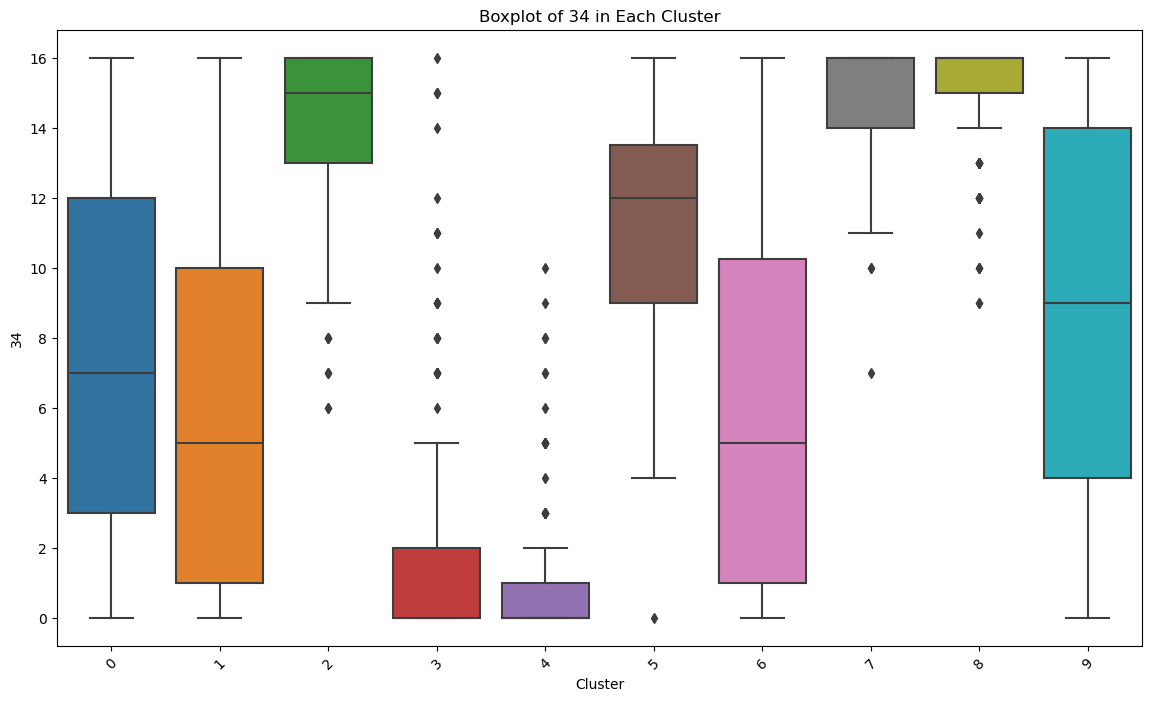

Summary statistics for 34:
         count       mean       std  min   25%   50%    75%   max
Cluster                                                          
0        228.0   7.785088  5.392305  0.0   3.0   7.0  12.00  16.0
1        218.0   5.770642  5.240982  0.0   1.0   5.0  10.00  16.0
2        117.0  13.931624  2.759705  6.0  13.0  15.0  16.00  16.0
3        268.0   1.649254  3.152212  0.0   0.0   0.0   2.00  16.0
4        197.0   0.766497  1.794633  0.0   0.0   0.0   1.00  10.0
5        171.0  11.263158  3.233244  0.0   9.0  12.0  13.50  16.0
6        188.0   5.994681  5.415858  0.0   1.0   5.0  10.25  16.0
7        134.0  14.962687  1.577124  7.0  14.0  16.0  16.00  16.0
8        160.0  15.200000  1.524640  9.0  15.0  16.0  16.00  16.0
9        116.0   8.896552  5.566014  0.0   4.0   9.0  14.00  16.0




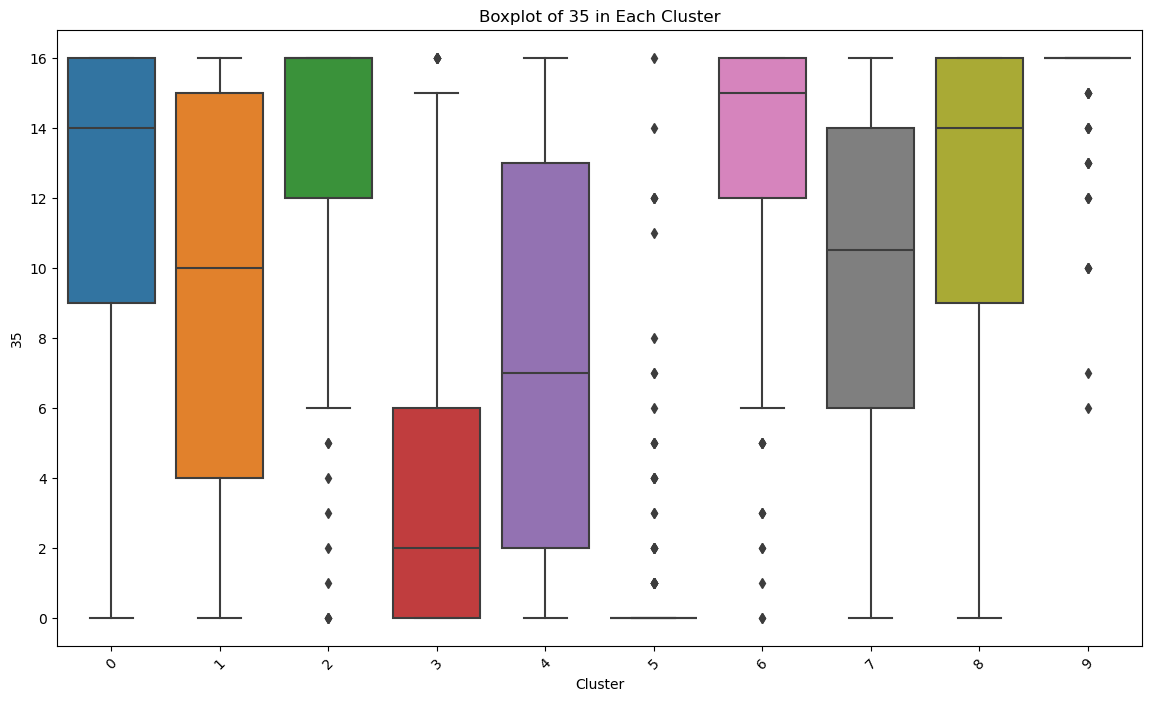

Summary statistics for 35:
         count       mean       std  min   25%   50%   75%   max
Cluster                                                         
0        228.0  12.070175  4.656896  0.0   9.0  14.0  16.0  16.0
1        218.0   9.247706  5.824082  0.0   4.0  10.0  15.0  16.0
2        117.0  13.094017  4.319129  0.0  12.0  16.0  16.0  16.0
3        268.0   3.444030  4.298837  0.0   0.0   2.0   6.0  16.0
4        197.0   7.487310  5.644764  0.0   2.0   7.0  13.0  16.0
5        171.0   1.076023  2.849161  0.0   0.0   0.0   0.0  16.0
6        188.0  13.276596  3.885815  0.0  12.0  15.0  16.0  16.0
7        134.0   9.507463  5.351897  0.0   6.0  10.5  14.0  16.0
8        160.0  11.712500  4.830963  0.0   9.0  14.0  16.0  16.0
9        116.0  15.310345  1.805373  6.0  16.0  16.0  16.0  16.0




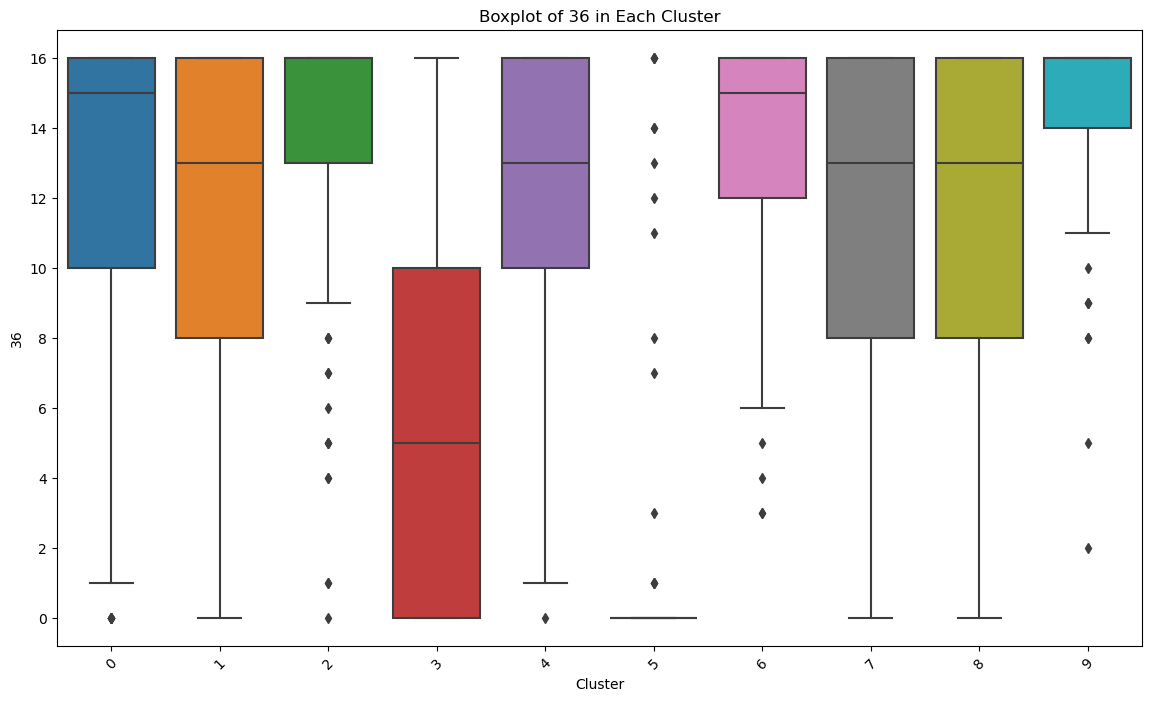

Summary statistics for 36:
         count       mean       std  min   25%   50%   75%   max
Cluster                                                         
0        228.0  12.464912  4.593003  0.0  10.0  15.0  16.0  16.0
1        218.0  11.174312  5.160724  0.0   8.0  13.0  16.0  16.0
2        117.0  13.598291  3.771627  0.0  13.0  16.0  16.0  16.0
3        268.0   5.645522  5.173153  0.0   0.0   5.0  10.0  16.0
4        197.0  12.299492  3.890943  0.0  10.0  13.0  16.0  16.0
5        171.0   0.777778  3.082737  0.0   0.0   0.0   0.0  16.0
6        188.0  13.617021  3.073455  3.0  12.0  15.0  16.0  16.0
7        134.0  11.477612  4.704368  0.0   8.0  13.0  16.0  16.0
8        160.0  11.050000  5.428553  0.0   8.0  13.0  16.0  16.0
9        116.0  14.724138  2.408630  2.0  14.0  16.0  16.0  16.0




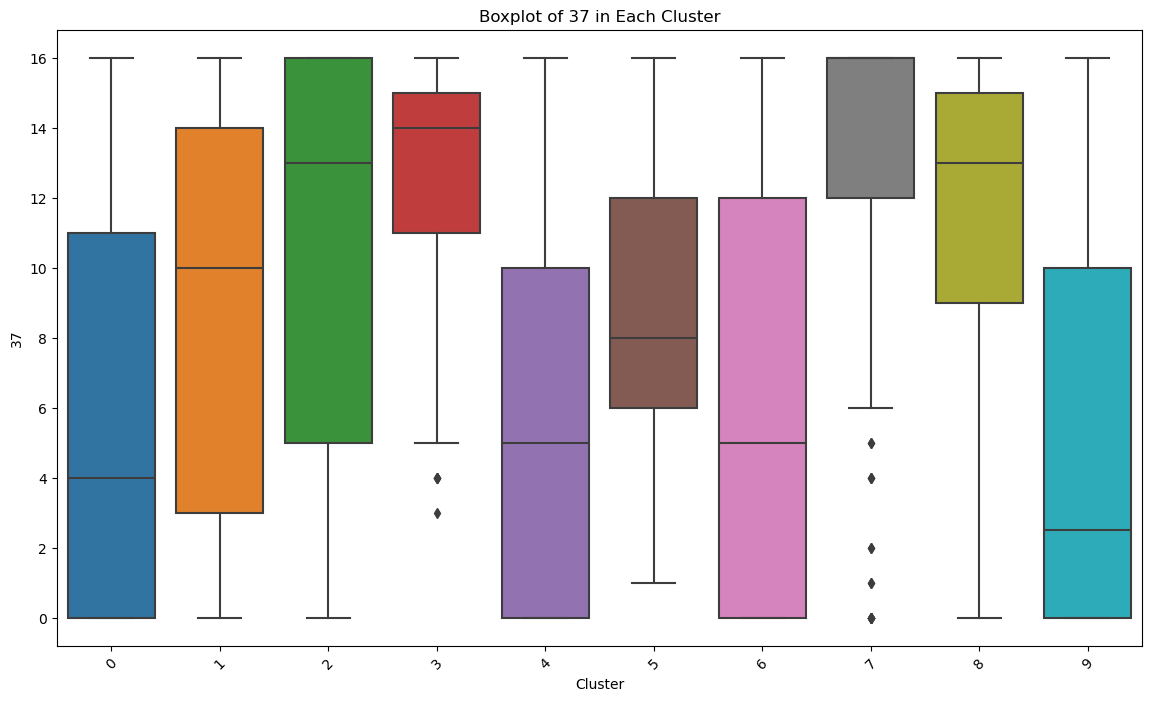

Summary statistics for 37:
         count       mean       std  min   25%   50%   75%   max
Cluster                                                         
0        228.0   5.631579  5.858483  0.0   0.0   4.0  11.0  16.0
1        218.0   8.743119  5.762430  0.0   3.0  10.0  14.0  16.0
2        117.0  10.119658  5.987289  0.0   5.0  13.0  16.0  16.0
3        268.0  12.813433  3.085954  3.0  11.0  14.0  15.0  16.0
4        197.0   5.472081  5.451594  0.0   0.0   5.0  10.0  16.0
5        171.0   8.877193  3.788854  1.0   6.0   8.0  12.0  16.0
6        188.0   6.122340  6.018770  0.0   0.0   5.0  12.0  16.0
7        134.0  12.888060  4.962507  0.0  12.0  16.0  16.0  16.0
8        160.0  11.631250  4.200362  0.0   9.0  13.0  15.0  16.0
9        116.0   4.913793  5.493979  0.0   0.0   2.5  10.0  16.0




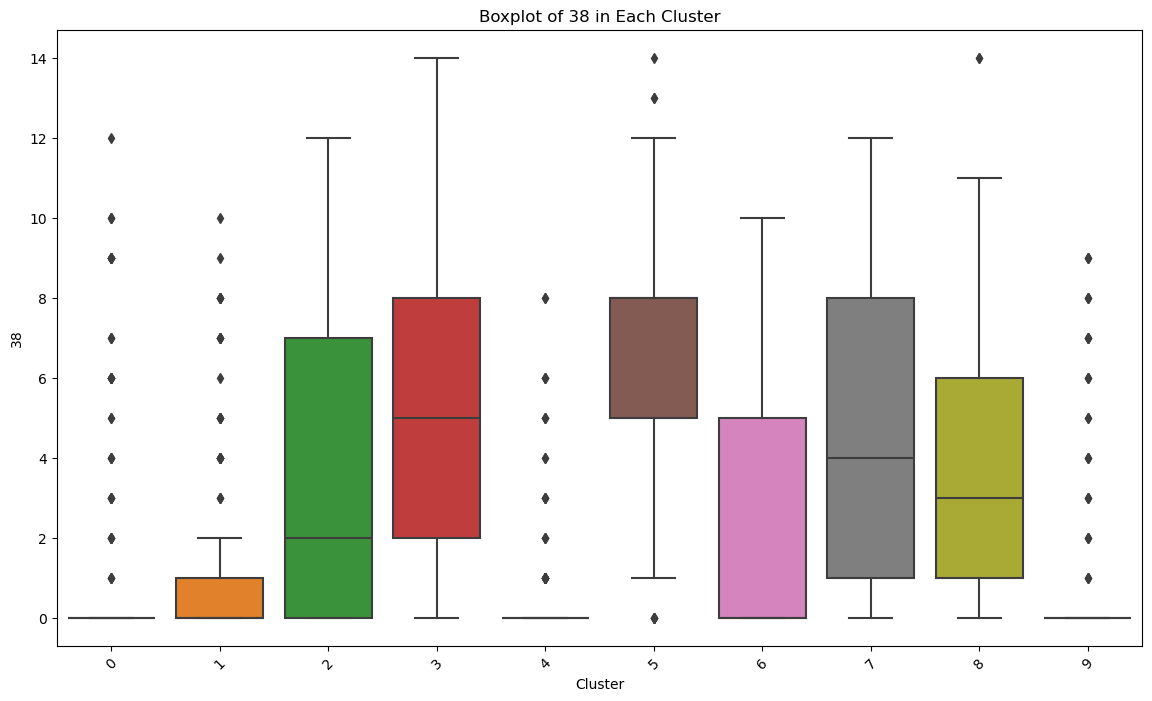

Summary statistics for 38:
         count      mean       std  min  25%  50%  75%   max
Cluster                                                     
0        228.0  1.017544  2.516842  0.0  0.0  0.0  0.0  12.0
1        218.0  0.954128  2.083003  0.0  0.0  0.0  1.0  10.0
2        117.0  3.538462  3.927223  0.0  0.0  2.0  7.0  12.0
3        268.0  5.014925  3.237156  0.0  2.0  5.0  8.0  14.0
4        197.0  0.441624  1.363853  0.0  0.0  0.0  0.0   8.0
5        171.0  7.000000  2.696403  0.0  5.0  8.0  8.0  14.0
6        188.0  2.303191  3.228978  0.0  0.0  0.0  5.0  10.0
7        134.0  4.432836  3.754592  0.0  1.0  4.0  8.0  12.0
8        160.0  3.637500  3.179113  0.0  1.0  3.0  6.0  14.0
9        116.0  1.181034  2.497300  0.0  0.0  0.0  0.0   9.0




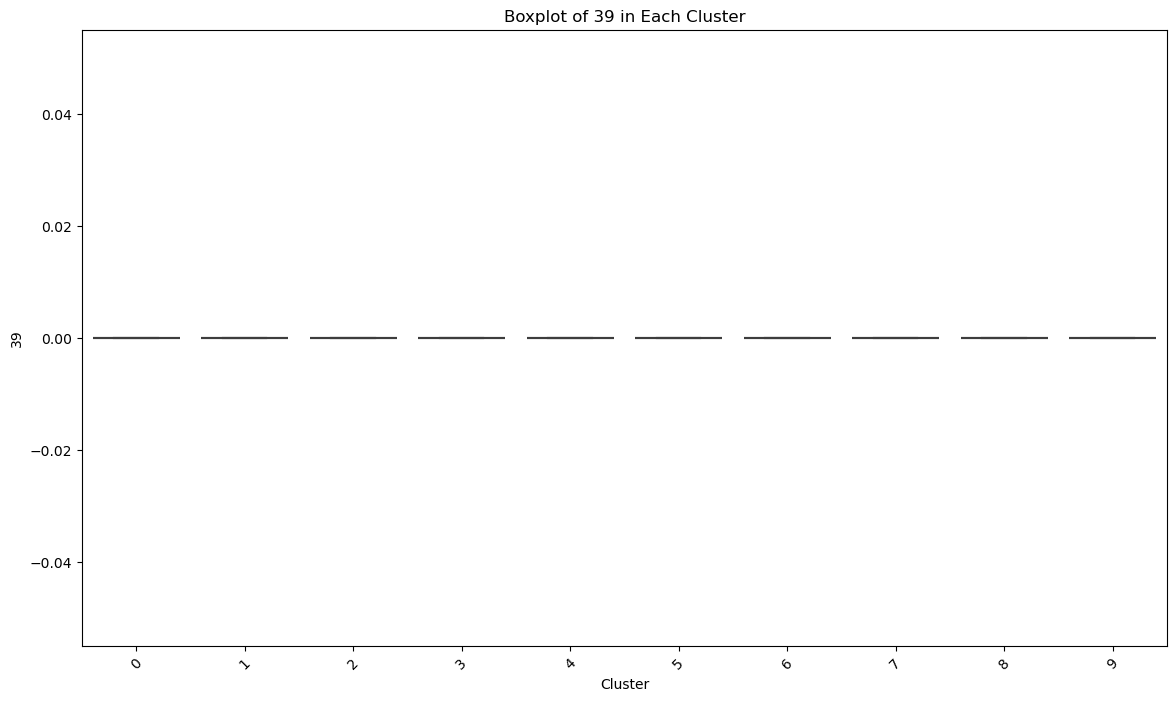

Summary statistics for 39:
         count  mean  std  min  25%  50%  75%  max
Cluster                                           
0        228.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1        218.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
2        117.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
3        268.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
4        197.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
5        171.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
6        188.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
7        134.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
8        160.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
9        116.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0




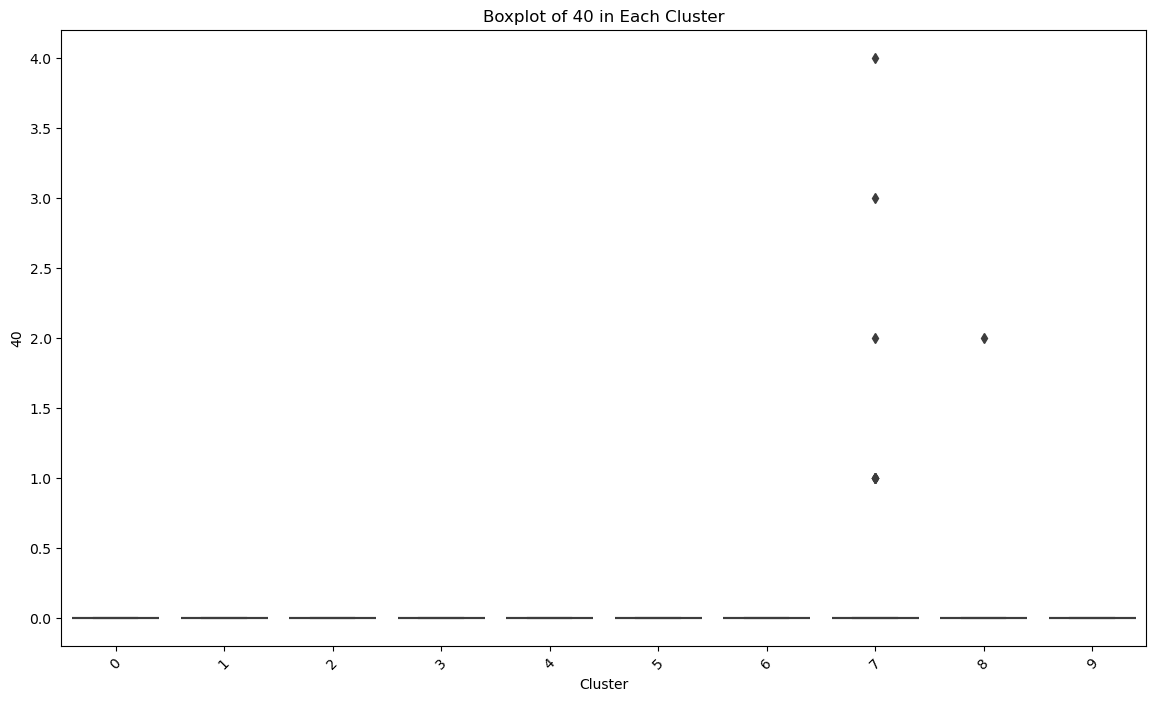

Summary statistics for 40:
         count      mean       std  min  25%  50%  75%  max
Cluster                                                    
0        228.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
1        218.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
2        117.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
3        268.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
4        197.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
5        171.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
6        188.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
7        134.0  0.104478  0.494612  0.0  0.0  0.0  0.0  4.0
8        160.0  0.012500  0.158114  0.0  0.0  0.0  0.0  2.0
9        116.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0




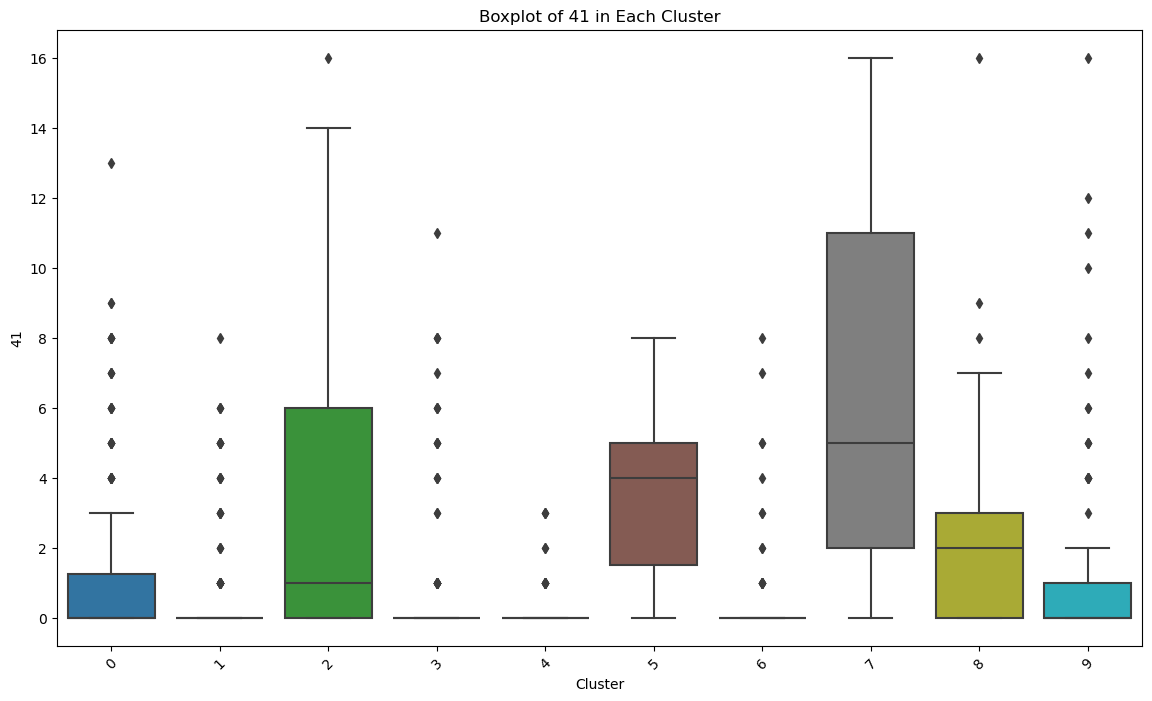

Summary statistics for 41:
         count      mean       std  min  25%  50%    75%   max
Cluster                                                       
0        228.0  1.228070  2.326007  0.0  0.0  0.0   1.25  13.0
1        218.0  0.518349  1.398529  0.0  0.0  0.0   0.00   8.0
2        117.0  3.170940  4.136237  0.0  0.0  1.0   6.00  16.0
3        268.0  0.410448  1.502620  0.0  0.0  0.0   0.00  11.0
4        197.0  0.106599  0.456033  0.0  0.0  0.0   0.00   3.0
5        171.0  3.444444  2.293497  0.0  1.5  4.0   5.00   8.0
6        188.0  0.244681  1.036099  0.0  0.0  0.0   0.00   8.0
7        134.0  6.246269  5.252191  0.0  2.0  5.0  11.00  16.0
8        160.0  2.150000  2.238036  0.0  0.0  2.0   3.00  16.0
9        116.0  1.163793  2.708903  0.0  0.0  0.0   1.00  16.0




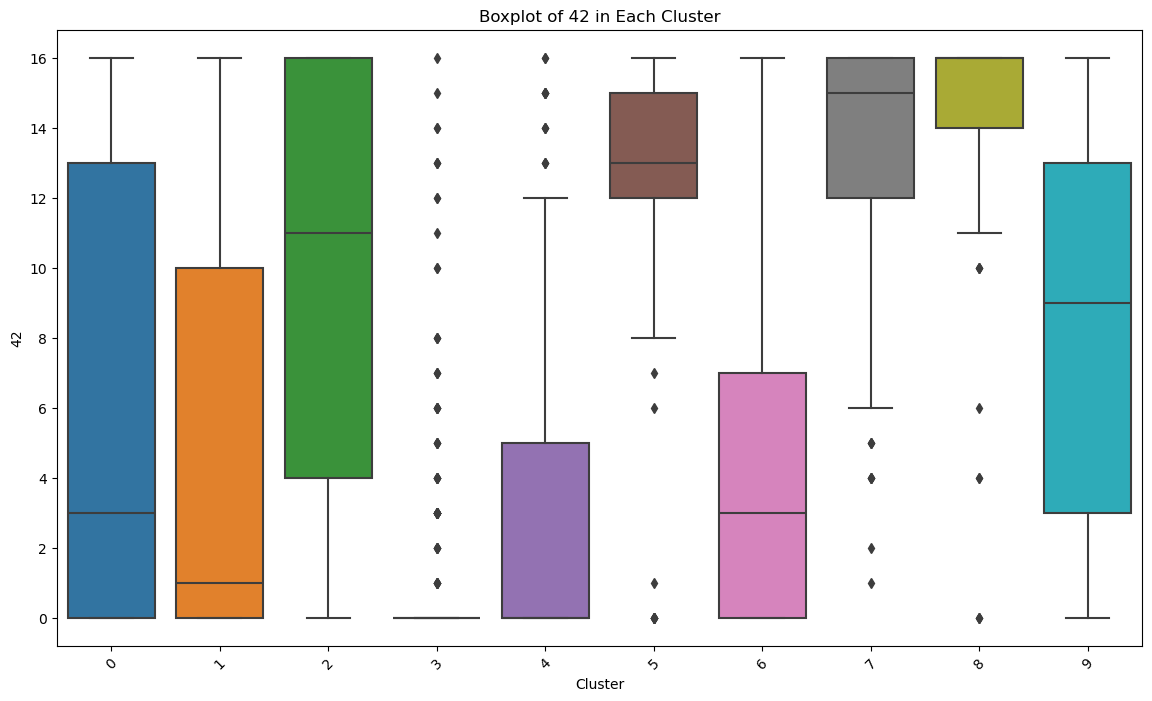

Summary statistics for 42:
         count       mean       std  min   25%   50%   75%   max
Cluster                                                         
0        228.0   5.973684  6.430873  0.0   0.0   3.0  13.0  16.0
1        218.0   4.518349  5.831120  0.0   0.0   1.0  10.0  16.0
2        117.0   9.598291  5.948138  0.0   4.0  11.0  16.0  16.0
3        268.0   1.231343  3.028984  0.0   0.0   0.0   0.0  16.0
4        197.0   2.766497  4.454566  0.0   0.0   0.0   5.0  16.0
5        171.0  12.701754  3.605380  0.0  12.0  13.0  15.0  16.0
6        188.0   4.196809  4.760420  0.0   0.0   3.0   7.0  16.0
7        134.0  13.253731  3.720875  1.0  12.0  15.0  16.0  16.0
8        160.0  14.581250  2.873588  0.0  14.0  16.0  16.0  16.0
9        116.0   8.198276  5.534430  0.0   3.0   9.0  13.0  16.0




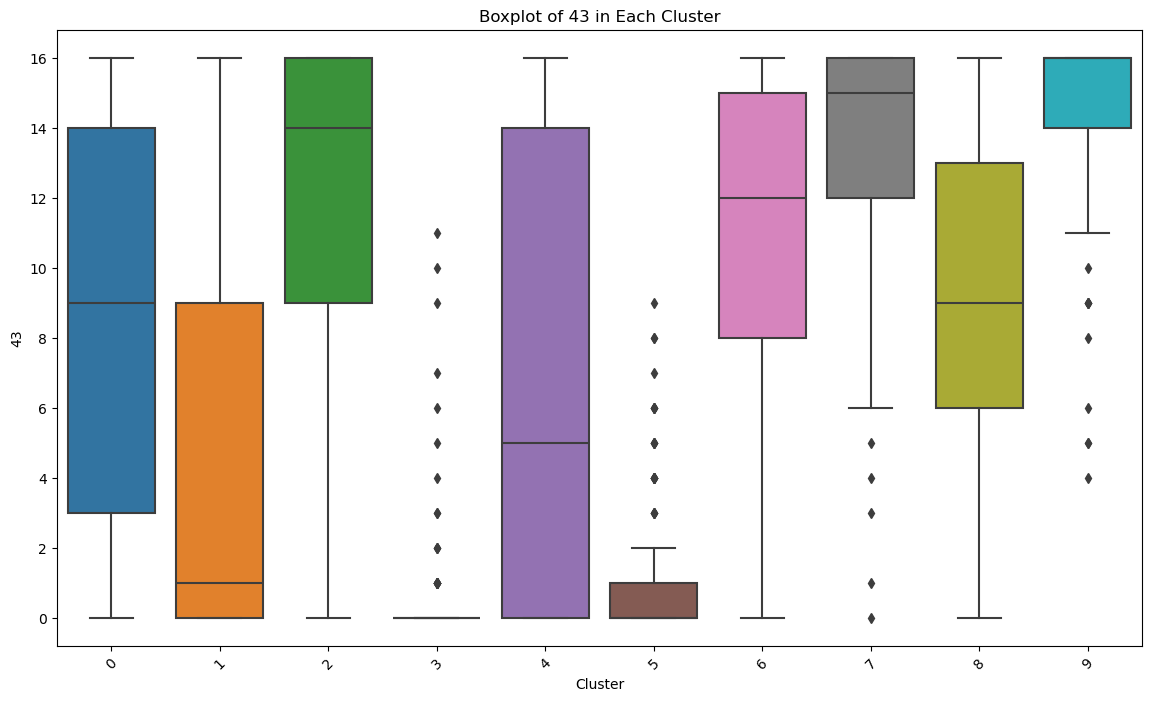

Summary statistics for 43:
         count       mean       std  min   25%   50%   75%   max
Cluster                                                         
0        228.0   8.447368  5.595927  0.0   3.0   9.0  14.0  16.0
1        218.0   4.518349  5.414789  0.0   0.0   1.0   9.0  16.0
2        117.0  11.692308  5.168641  0.0   9.0  14.0  16.0  16.0
3        268.0   0.272388  1.294060  0.0   0.0   0.0   0.0  11.0
4        197.0   6.822335  6.466074  0.0   0.0   5.0  14.0  16.0
5        171.0   0.959064  1.816126  0.0   0.0   0.0   1.0   9.0
6        188.0  11.468085  4.142391  0.0   8.0  12.0  15.0  16.0
7        134.0  13.537313  3.549133  0.0  12.0  15.0  16.0  16.0
8        160.0   9.137500  4.633061  0.0   6.0   9.0  13.0  16.0
9        116.0  14.629310  2.649135  4.0  14.0  16.0  16.0  16.0




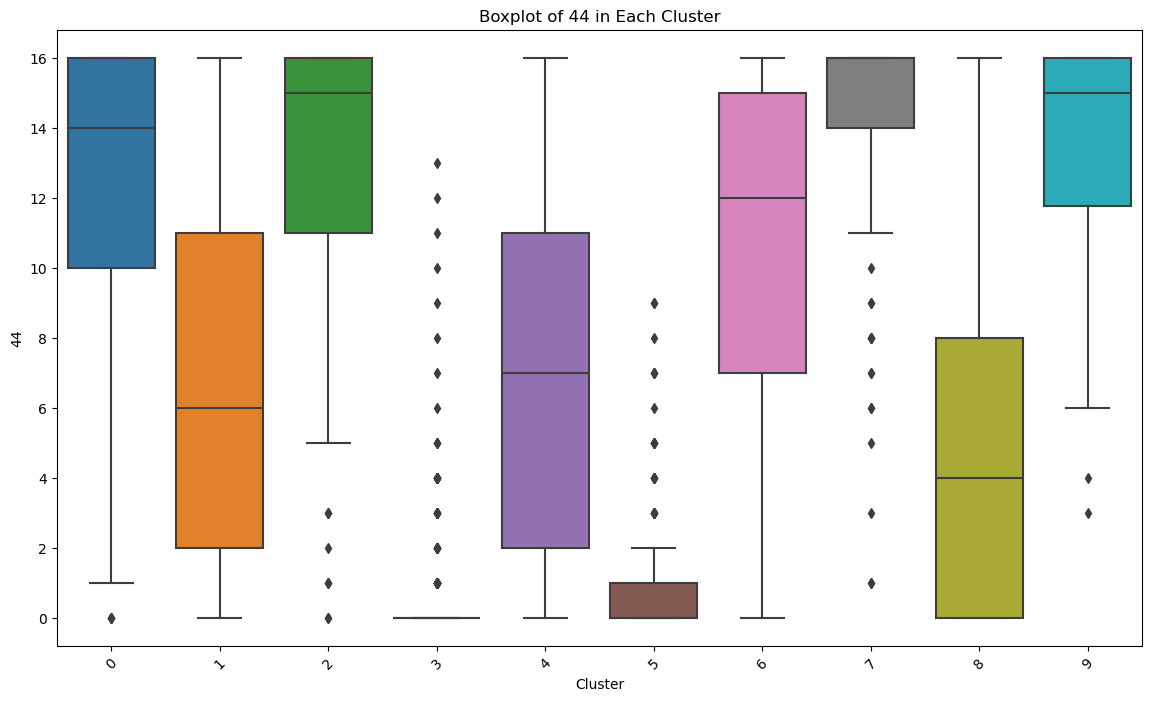

Summary statistics for 44:
         count       mean       std  min    25%   50%   75%   max
Cluster                                                          
0        228.0  12.530702  4.037700  0.0  10.00  14.0  16.0  16.0
1        218.0   6.706422  5.004703  0.0   2.00   6.0  11.0  16.0
2        117.0  12.760684  4.350286  0.0  11.00  15.0  16.0  16.0
3        268.0   0.791045  1.956740  0.0   0.00   0.0   0.0  13.0
4        197.0   7.192893  5.219992  0.0   2.00   7.0  11.0  16.0
5        171.0   0.976608  1.853306  0.0   0.00   0.0   1.0   9.0
6        188.0  10.595745  4.838171  0.0   7.00  12.0  15.0  16.0
7        134.0  14.261194  3.237304  1.0  14.00  16.0  16.0  16.0
8        160.0   4.443750  4.436480  0.0   0.00   4.0   8.0  16.0
9        116.0  13.491379  3.169133  3.0  11.75  15.0  16.0  16.0




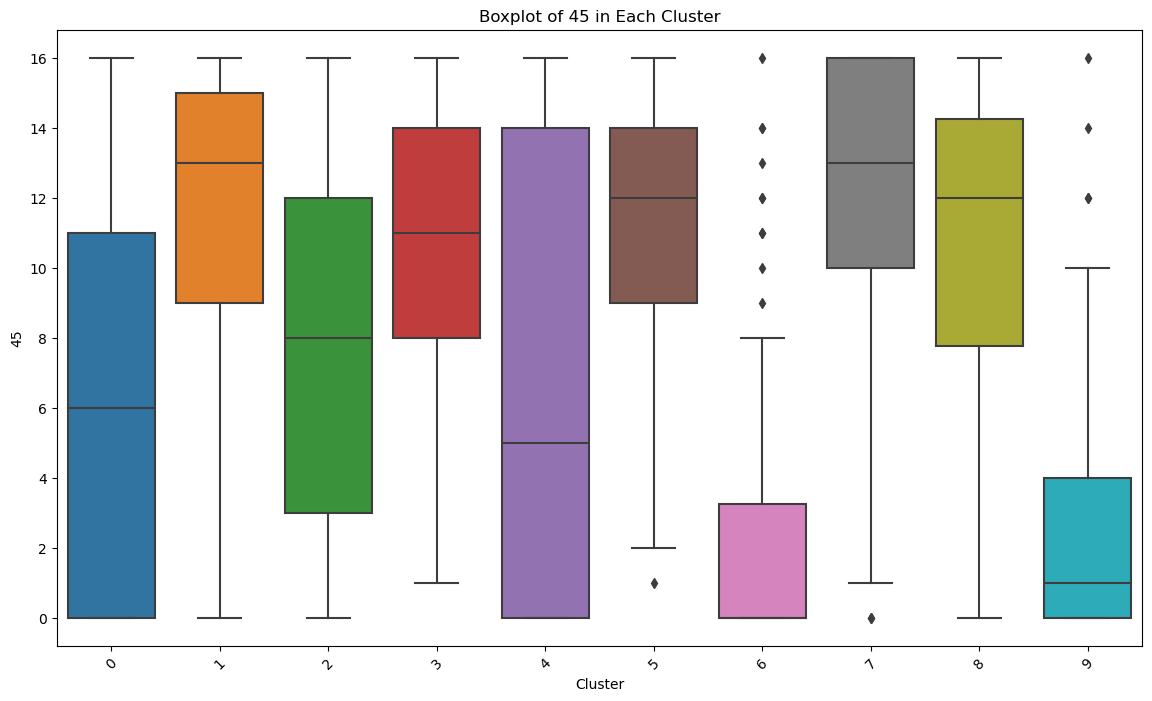

Summary statistics for 45:
         count       mean       std  min    25%   50%    75%   max
Cluster                                                           
0        228.0   5.995614  5.256000  0.0   0.00   6.0  11.00  16.0
1        218.0  10.940367  5.050996  0.0   9.00  13.0  15.00  16.0
2        117.0   7.529915  5.218622  0.0   3.00   8.0  12.00  16.0
3        268.0  10.735075  3.810192  1.0   8.00  11.0  14.00  16.0
4        197.0   6.994924  6.451149  0.0   0.00   5.0  14.00  16.0
5        171.0  11.192982  3.726401  1.0   9.00  12.0  14.00  16.0
6        188.0   2.143617  3.454148  0.0   0.00   0.0   3.25  16.0
7        134.0  12.074627  3.900312  0.0  10.00  13.0  16.00  16.0
8        160.0  10.637500  4.492464  0.0   7.75  12.0  14.25  16.0
9        116.0   2.379310  3.379362  0.0   0.00   1.0   4.00  16.0




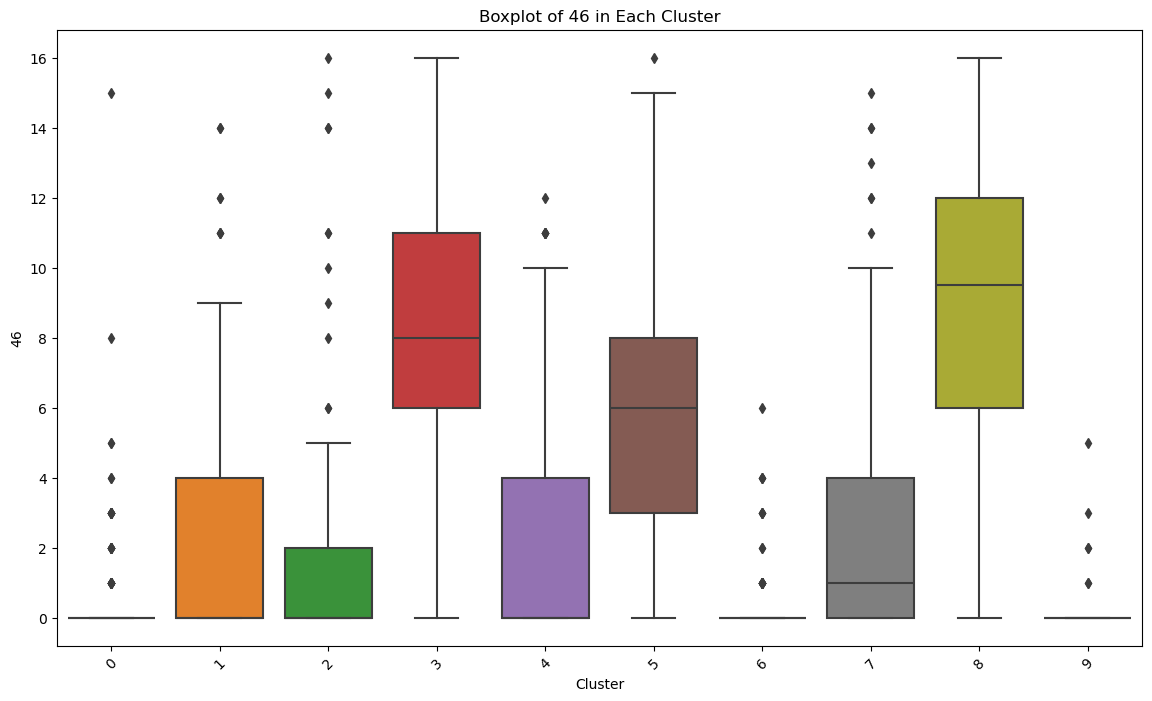

Summary statistics for 46:
         count      mean       std  min  25%  50%   75%   max
Cluster                                                      
0        228.0  0.447368  1.430271  0.0  0.0  0.0   0.0  15.0
1        218.0  2.178899  3.093045  0.0  0.0  0.0   4.0  14.0
2        117.0  1.794872  3.410275  0.0  0.0  0.0   2.0  16.0
3        268.0  7.873134  3.560965  0.0  6.0  8.0  11.0  16.0
4        197.0  2.096447  3.283514  0.0  0.0  0.0   4.0  12.0
5        171.0  6.029240  3.632252  0.0  3.0  6.0   8.0  16.0
6        188.0  0.239362  0.828079  0.0  0.0  0.0   0.0   6.0
7        134.0  2.791045  3.594220  0.0  0.0  1.0   4.0  15.0
8        160.0  8.981250  3.981833  0.0  6.0  9.5  12.0  16.0
9        116.0  0.120690  0.606561  0.0  0.0  0.0   0.0   5.0




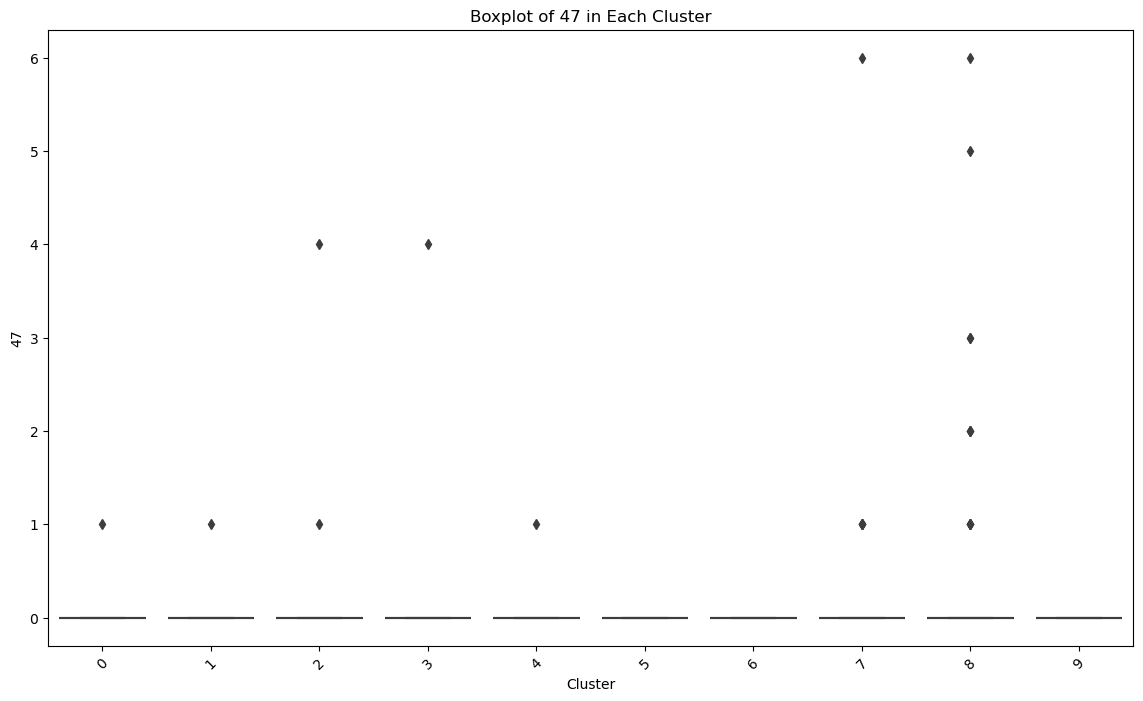

Summary statistics for 47:
         count      mean       std  min  25%  50%  75%  max
Cluster                                                    
0        228.0  0.004386  0.066227  0.0  0.0  0.0  0.0  1.0
1        218.0  0.004587  0.067729  0.0  0.0  0.0  0.0  1.0
2        117.0  0.042735  0.380407  0.0  0.0  0.0  0.0  4.0
3        268.0  0.014925  0.244339  0.0  0.0  0.0  0.0  4.0
4        197.0  0.005076  0.071247  0.0  0.0  0.0  0.0  1.0
5        171.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
6        188.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
7        134.0  0.074627  0.543269  0.0  0.0  0.0  0.0  6.0
8        160.0  0.168750  0.754207  0.0  0.0  0.0  0.0  6.0
9        116.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0




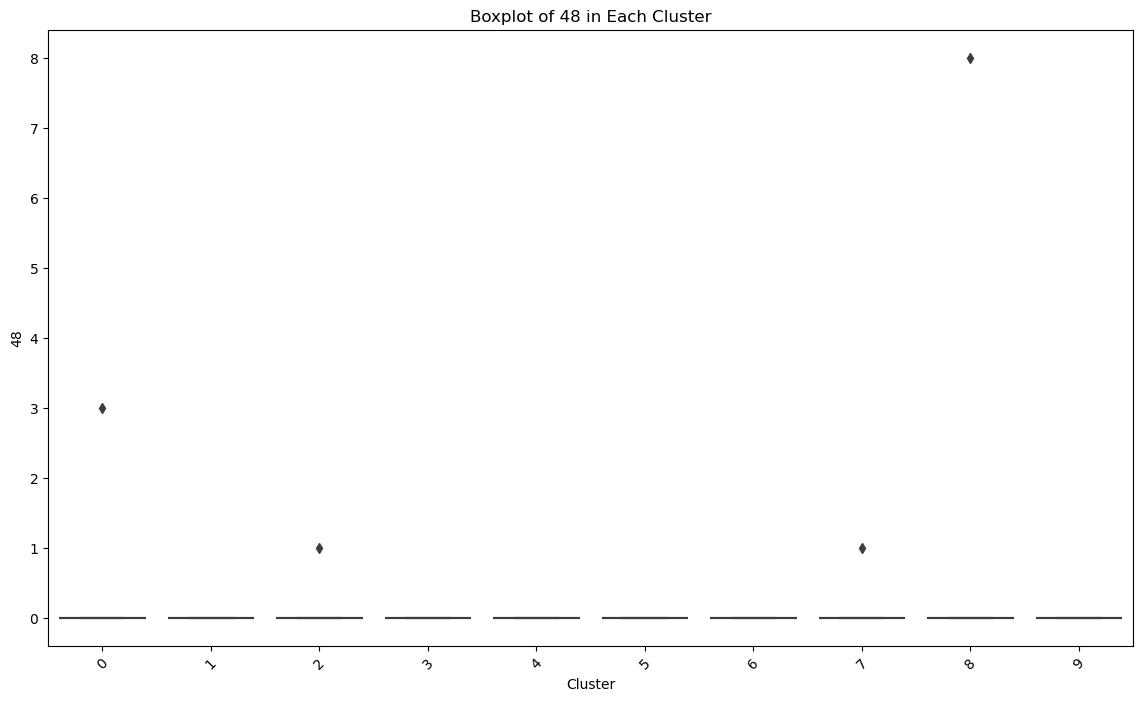

Summary statistics for 48:
         count      mean       std  min  25%  50%  75%  max
Cluster                                                    
0        228.0  0.013158  0.198680  0.0  0.0  0.0  0.0  3.0
1        218.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
2        117.0  0.008547  0.092450  0.0  0.0  0.0  0.0  1.0
3        268.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
4        197.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
5        171.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
6        188.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
7        134.0  0.007463  0.086387  0.0  0.0  0.0  0.0  1.0
8        160.0  0.050000  0.632456  0.0  0.0  0.0  0.0  8.0
9        116.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0




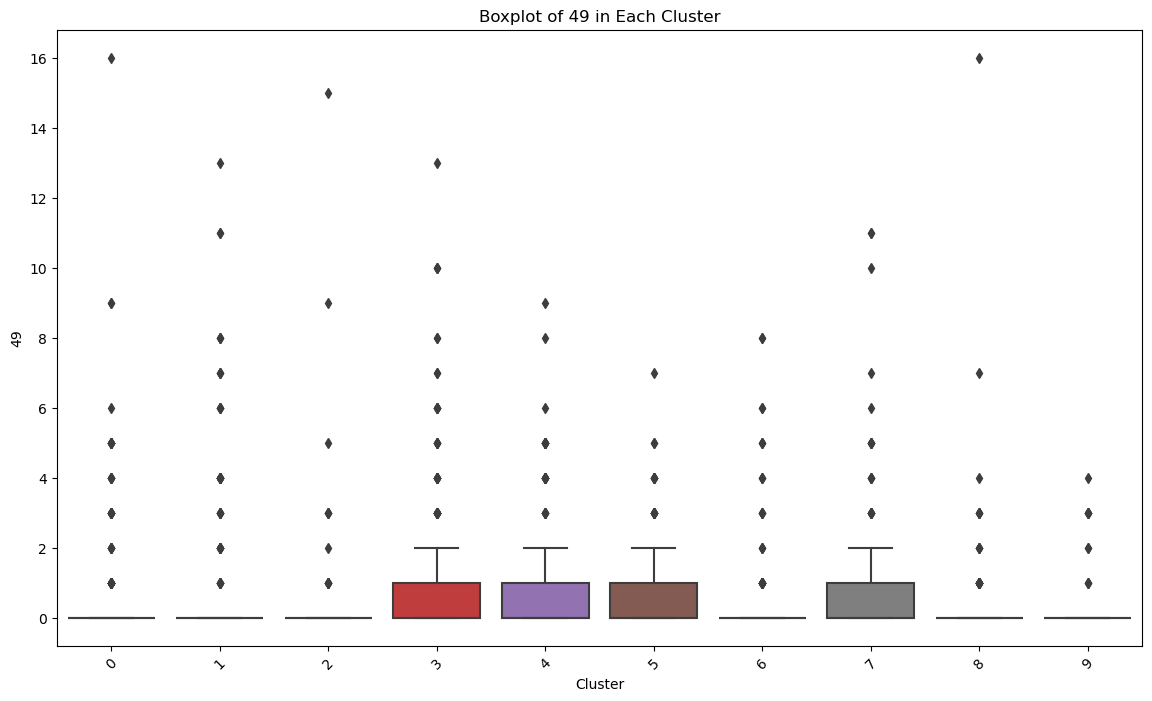

Summary statistics for 49:
         count      mean       std  min  25%  50%  75%   max
Cluster                                                     
0        228.0  0.710526  1.835642  0.0  0.0  0.0  0.0  16.0
1        218.0  0.848624  2.135938  0.0  0.0  0.0  0.0  13.0
2        117.0  0.418803  1.753024  0.0  0.0  0.0  0.0  15.0
3        268.0  1.007463  2.024184  0.0  0.0  0.0  1.0  13.0
4        197.0  0.837563  1.630078  0.0  0.0  0.0  1.0   9.0
5        171.0  0.754386  1.278060  0.0  0.0  0.0  1.0   7.0
6        188.0  0.462766  1.357765  0.0  0.0  0.0  0.0   8.0
7        134.0  0.970149  2.109557  0.0  0.0  0.0  1.0  11.0
8        160.0  0.393750  1.513449  0.0  0.0  0.0  0.0  16.0
9        116.0  0.224138  0.758559  0.0  0.0  0.0  0.0   4.0




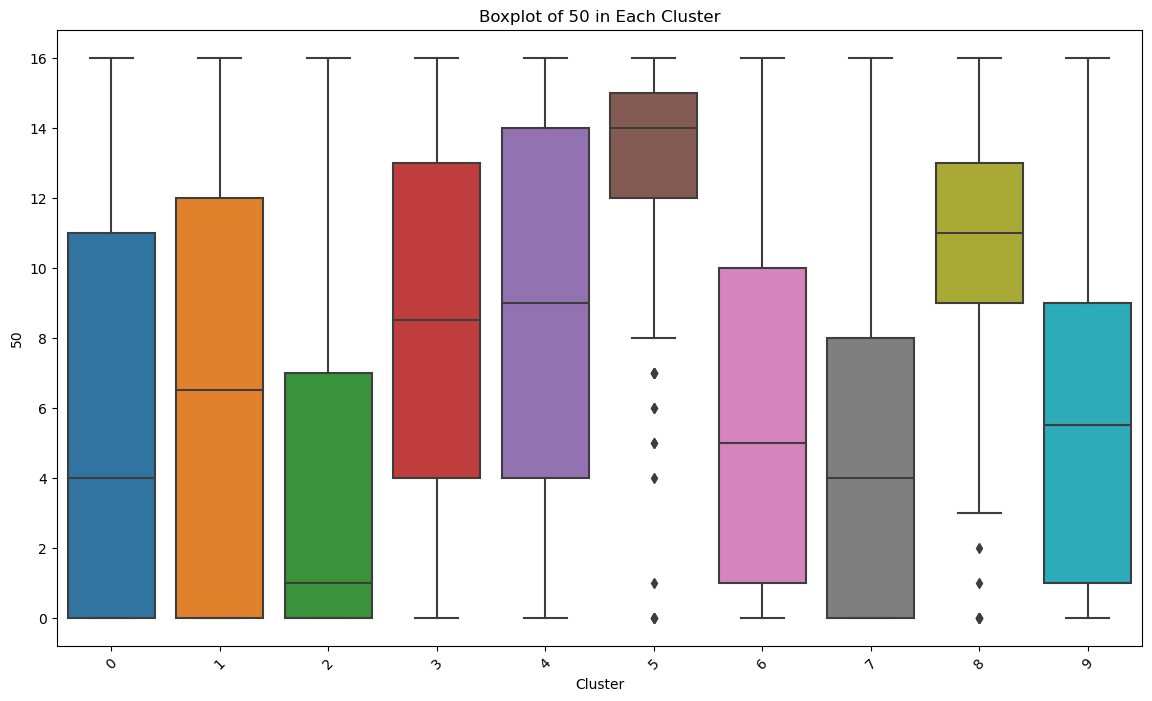

Summary statistics for 50:
         count       mean       std  min   25%   50%   75%   max
Cluster                                                         
0        228.0   5.578947  5.702453  0.0   0.0   4.0  11.0  16.0
1        218.0   7.013761  5.975742  0.0   0.0   6.5  12.0  16.0
2        117.0   3.649573  4.780197  0.0   0.0   1.0   7.0  16.0
3        268.0   8.361940  5.270187  0.0   4.0   8.5  13.0  16.0
4        197.0   8.832487  5.178188  0.0   4.0   9.0  14.0  16.0
5        171.0  12.730994  3.470570  0.0  12.0  14.0  15.0  16.0
6        188.0   5.845745  5.357052  0.0   1.0   5.0  10.0  16.0
7        134.0   4.634328  4.896740  0.0   0.0   4.0   8.0  16.0
8        160.0  10.656250  3.596027  0.0   9.0  11.0  13.0  16.0
9        116.0   5.853448  4.872736  0.0   1.0   5.5   9.0  16.0




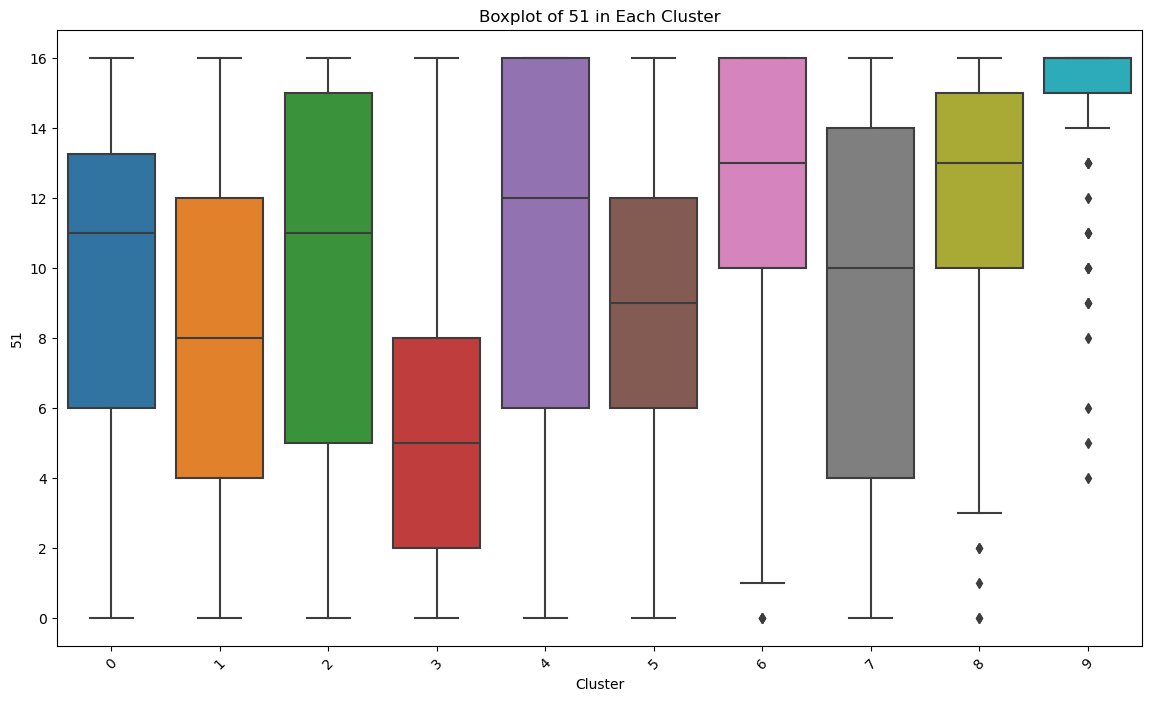

Summary statistics for 51:
         count       mean       std  min   25%   50%    75%   max
Cluster                                                          
0        228.0   9.684211  4.817947  0.0   6.0  11.0  13.25  16.0
1        218.0   7.573394  5.196297  0.0   4.0   8.0  12.00  16.0
2        117.0   9.837607  5.820530  0.0   5.0  11.0  15.00  16.0
3        268.0   5.264925  3.751749  0.0   2.0   5.0   8.00  16.0
4        197.0  10.502538  5.356309  0.0   6.0  12.0  16.00  16.0
5        171.0   9.169591  3.963126  0.0   6.0   9.0  12.00  16.0
6        188.0  12.005319  4.402840  0.0  10.0  13.0  16.00  16.0
7        134.0   9.029851  5.684619  0.0   4.0  10.0  14.00  16.0
8        160.0  11.887500  3.642840  0.0  10.0  13.0  15.00  16.0
9        116.0  14.784483  2.491048  4.0  15.0  16.0  16.00  16.0




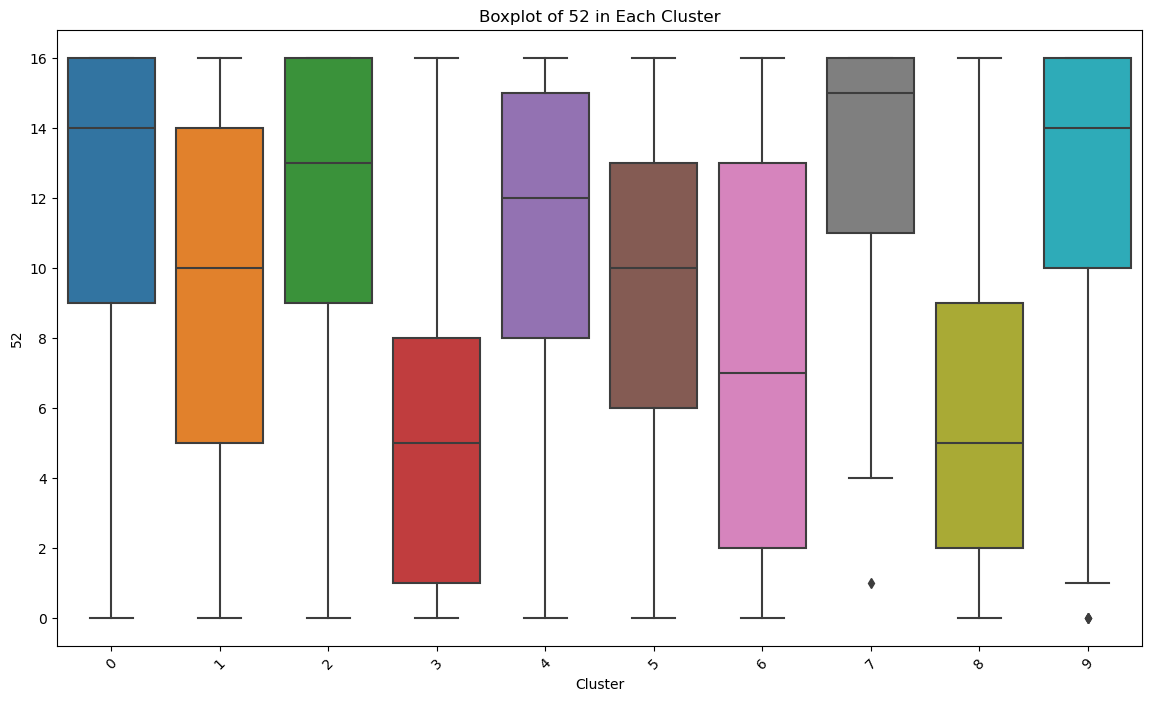

Summary statistics for 52:
         count       mean       std  min   25%   50%   75%   max
Cluster                                                         
0        228.0  12.035088  4.315590  0.0   9.0  14.0  16.0  16.0
1        218.0   9.284404  5.277710  0.0   5.0  10.0  14.0  16.0
2        117.0  11.965812  4.274890  0.0   9.0  13.0  16.0  16.0
3        268.0   5.257463  4.150373  0.0   1.0   5.0   8.0  16.0
4        197.0  11.106599  4.345277  0.0   8.0  12.0  15.0  16.0
5        171.0   9.461988  4.210982  0.0   6.0  10.0  13.0  16.0
6        188.0   7.388298  5.639175  0.0   2.0   7.0  13.0  16.0
7        134.0  13.246269  3.565576  1.0  11.0  15.0  16.0  16.0
8        160.0   6.131250  4.978093  0.0   2.0   5.0   9.0  16.0
9        116.0  12.008621  4.599614  0.0  10.0  14.0  16.0  16.0




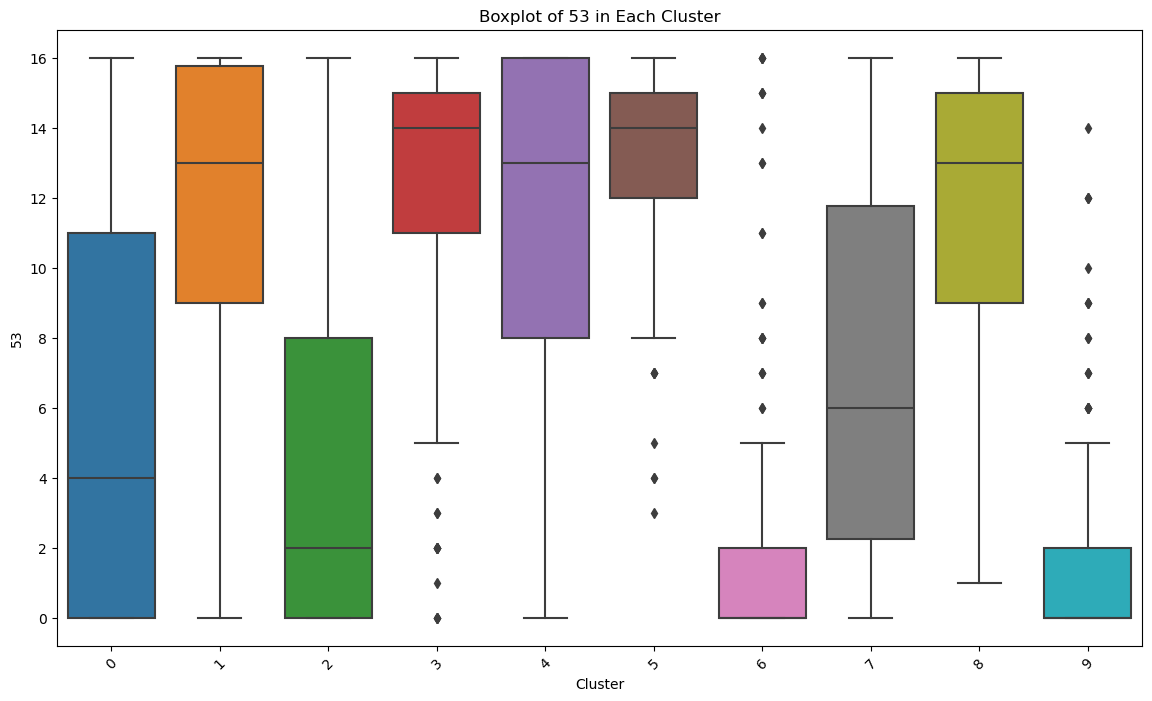

Summary statistics for 53:
         count       mean       std  min    25%   50%    75%   max
Cluster                                                           
0        228.0   6.087719  6.021344  0.0   0.00   4.0  11.00  16.0
1        218.0  11.555046  4.397234  0.0   9.00  13.0  15.75  16.0
2        117.0   4.299145  5.288675  0.0   0.00   2.0   8.00  16.0
3        268.0  12.481343  3.749111  0.0  11.00  14.0  15.00  16.0
4        197.0  11.959391  4.041668  0.0   8.00  13.0  16.00  16.0
5        171.0  13.403509  2.725865  3.0  12.00  14.0  15.00  16.0
6        188.0   1.840426  3.889663  0.0   0.00   0.0   2.00  16.0
7        134.0   6.865672  5.242669  0.0   2.25   6.0  11.75  16.0
8        160.0  11.568750  3.918384  1.0   9.00  13.0  15.00  16.0
9        116.0   1.887931  3.253818  0.0   0.00   0.0   2.00  14.0




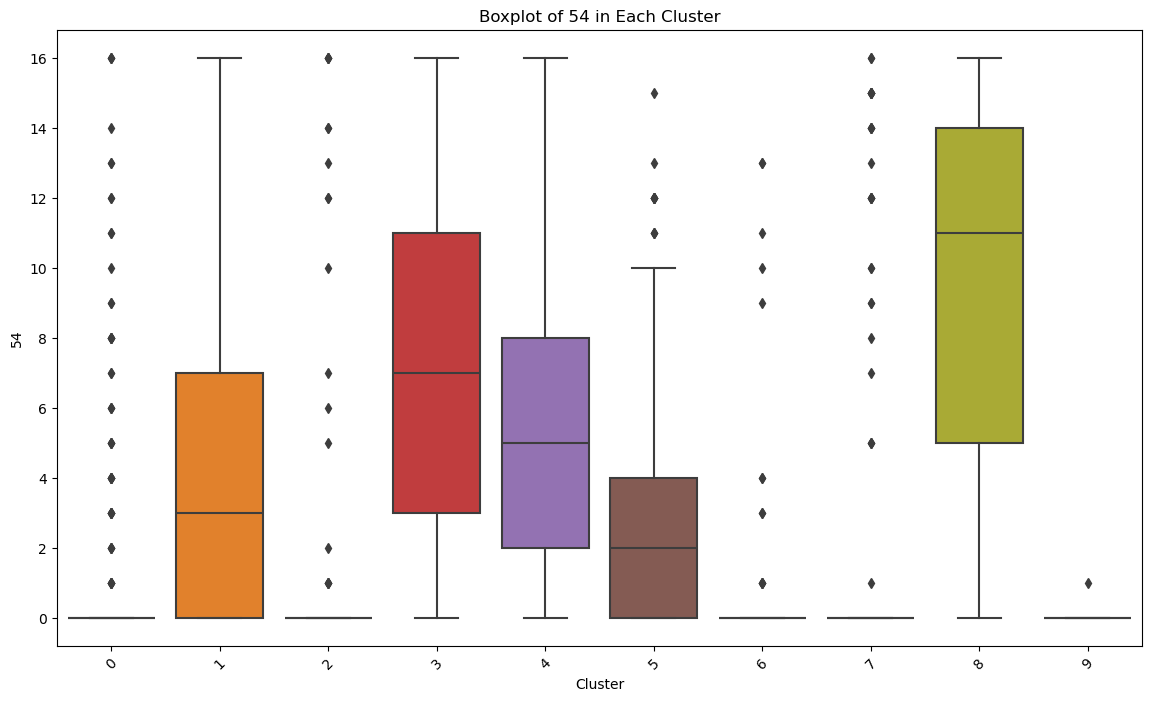

Summary statistics for 54:
         count      mean       std  min  25%   50%   75%   max
Cluster                                                       
0        228.0  1.359649  3.298984  0.0  0.0   0.0   0.0  16.0
1        218.0  4.087156  4.453210  0.0  0.0   3.0   7.0  16.0
2        117.0  1.393162  4.008520  0.0  0.0   0.0   0.0  16.0
3        268.0  6.929104  4.706221  0.0  3.0   7.0  11.0  16.0
4        197.0  5.512690  4.531758  0.0  2.0   5.0   8.0  16.0
5        171.0  2.807018  3.457840  0.0  0.0   2.0   4.0  15.0
6        188.0  0.393617  1.885595  0.0  0.0   0.0   0.0  13.0
7        134.0  2.500000  5.110435  0.0  0.0   0.0   0.0  16.0
8        160.0  9.356250  5.192335  0.0  5.0  11.0  14.0  16.0
9        116.0  0.008621  0.092848  0.0  0.0   0.0   0.0   1.0




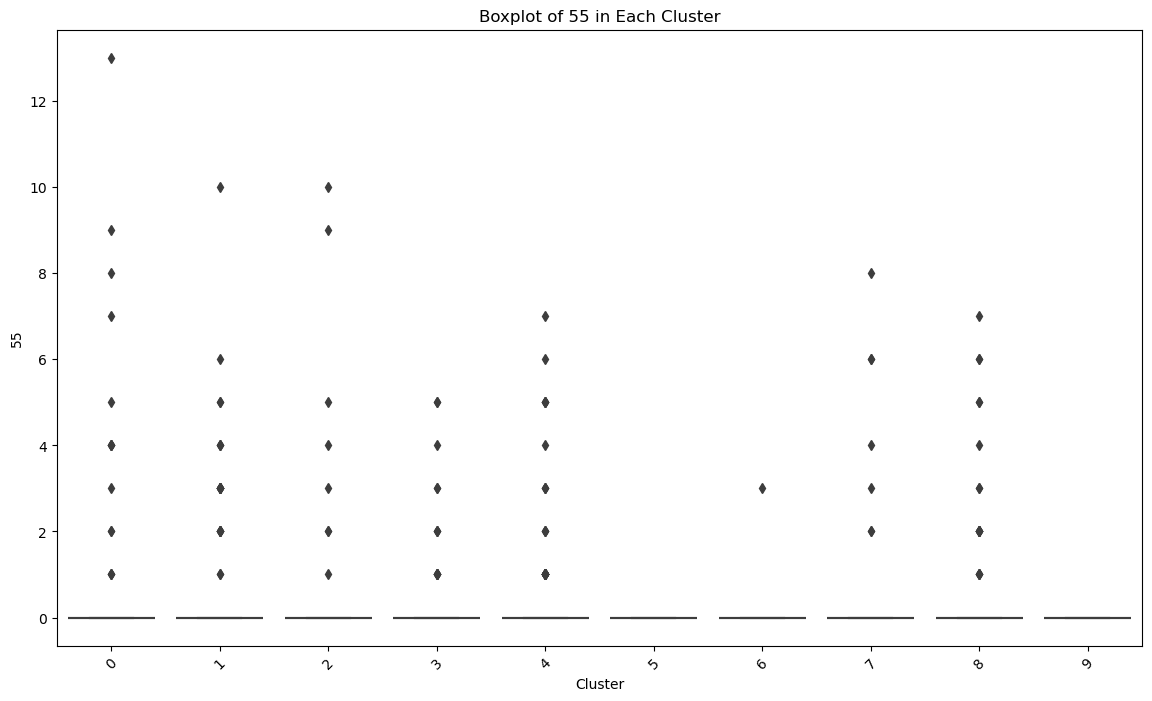

Summary statistics for 55:
         count      mean       std  min  25%  50%  75%   max
Cluster                                                     
0        228.0  0.298246  1.410657  0.0  0.0  0.0  0.0  13.0
1        218.0  0.348624  1.186531  0.0  0.0  0.0  0.0  10.0
2        117.0  0.307692  1.404804  0.0  0.0  0.0  0.0  10.0
3        268.0  0.119403  0.606393  0.0  0.0  0.0  0.0   5.0
4        197.0  0.345178  1.089205  0.0  0.0  0.0  0.0   7.0
5        171.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0
6        188.0  0.015957  0.218797  0.0  0.0  0.0  0.0   3.0
7        134.0  0.231343  1.103066  0.0  0.0  0.0  0.0   8.0
8        160.0  0.356250  1.167413  0.0  0.0  0.0  0.0   7.0
9        116.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0




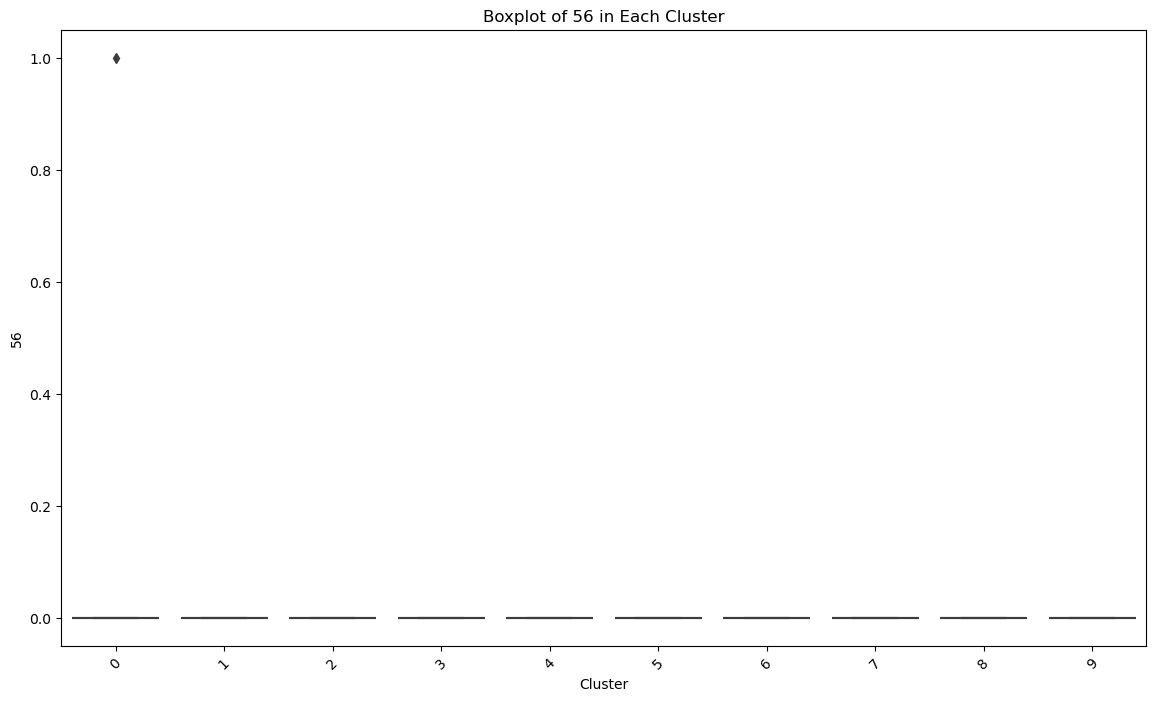

Summary statistics for 56:
         count      mean       std  min  25%  50%  75%  max
Cluster                                                    
0        228.0  0.004386  0.066227  0.0  0.0  0.0  0.0  1.0
1        218.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
2        117.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
3        268.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
4        197.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
5        171.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
6        188.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
7        134.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
8        160.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
9        116.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0




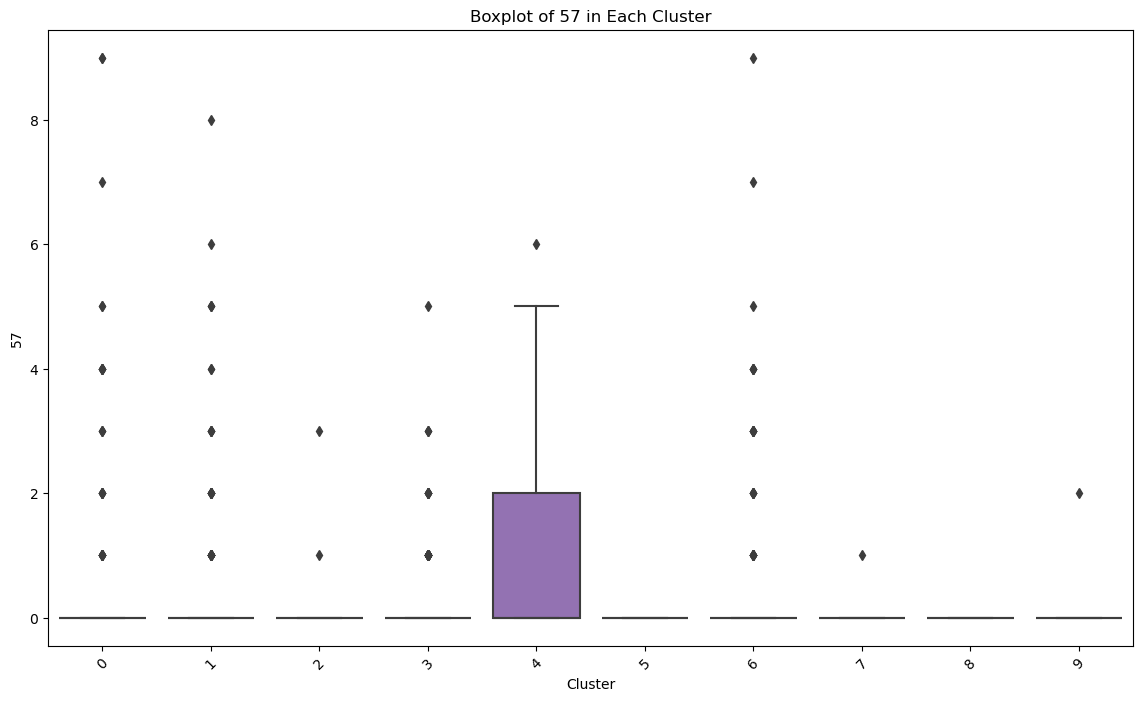

Summary statistics for 57:
         count      mean       std  min  25%  50%  75%  max
Cluster                                                    
0        228.0  0.394737  1.298039  0.0  0.0  0.0  0.0  9.0
1        218.0  0.394495  1.115606  0.0  0.0  0.0  0.0  8.0
2        117.0  0.034188  0.291596  0.0  0.0  0.0  0.0  3.0
3        268.0  0.235075  0.618656  0.0  0.0  0.0  0.0  5.0
4        197.0  0.873096  1.377345  0.0  0.0  0.0  2.0  6.0
5        171.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
6        188.0  0.446809  1.254869  0.0  0.0  0.0  0.0  9.0
7        134.0  0.007463  0.086387  0.0  0.0  0.0  0.0  1.0
8        160.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
9        116.0  0.017241  0.185695  0.0  0.0  0.0  0.0  2.0




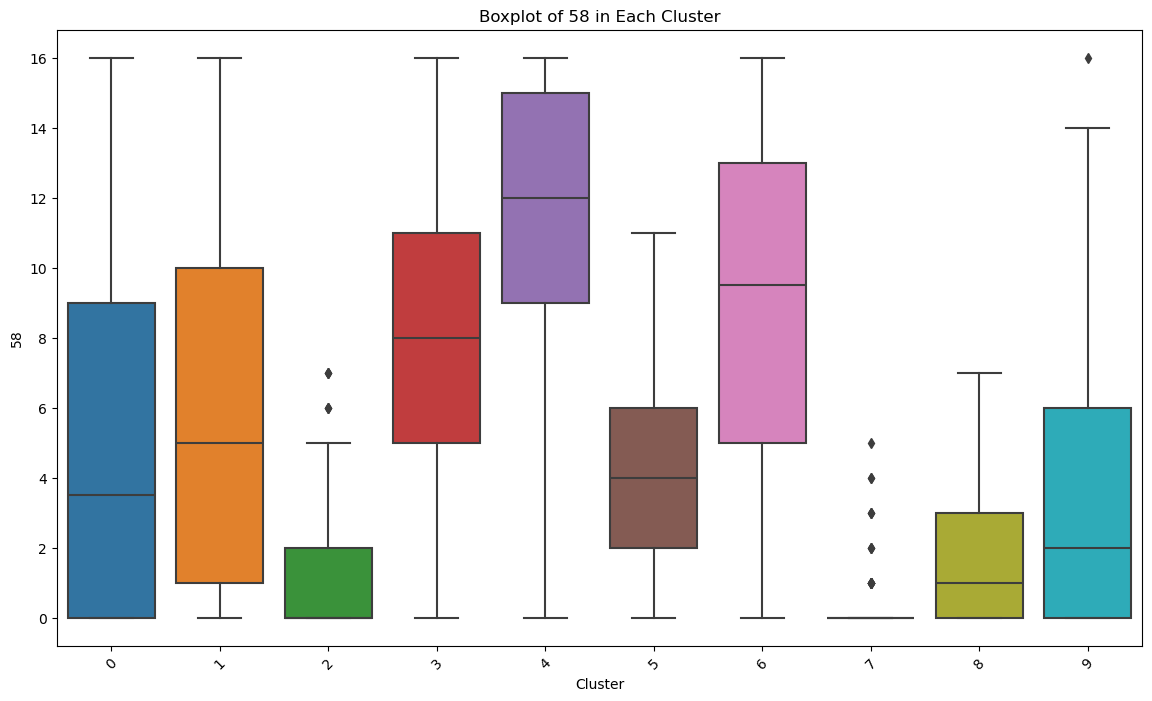

Summary statistics for 58:
         count       mean       std  min  25%   50%   75%   max
Cluster                                                        
0        228.0   5.026316  5.337855  0.0  0.0   3.5   9.0  16.0
1        218.0   6.018349  5.231915  0.0  1.0   5.0  10.0  16.0
2        117.0   1.128205  1.891626  0.0  0.0   0.0   2.0   7.0
3        268.0   7.694030  3.994805  0.0  5.0   8.0  11.0  16.0
4        197.0  11.243655  4.011657  0.0  9.0  12.0  15.0  16.0
5        171.0   4.222222  2.647480  0.0  2.0   4.0   6.0  11.0
6        188.0   8.978723  4.604064  0.0  5.0   9.5  13.0  16.0
7        134.0   0.276119  0.844191  0.0  0.0   0.0   0.0   5.0
8        160.0   1.725000  1.663330  0.0  0.0   1.0   3.0   7.0
9        116.0   3.422414  3.867705  0.0  0.0   2.0   6.0  16.0




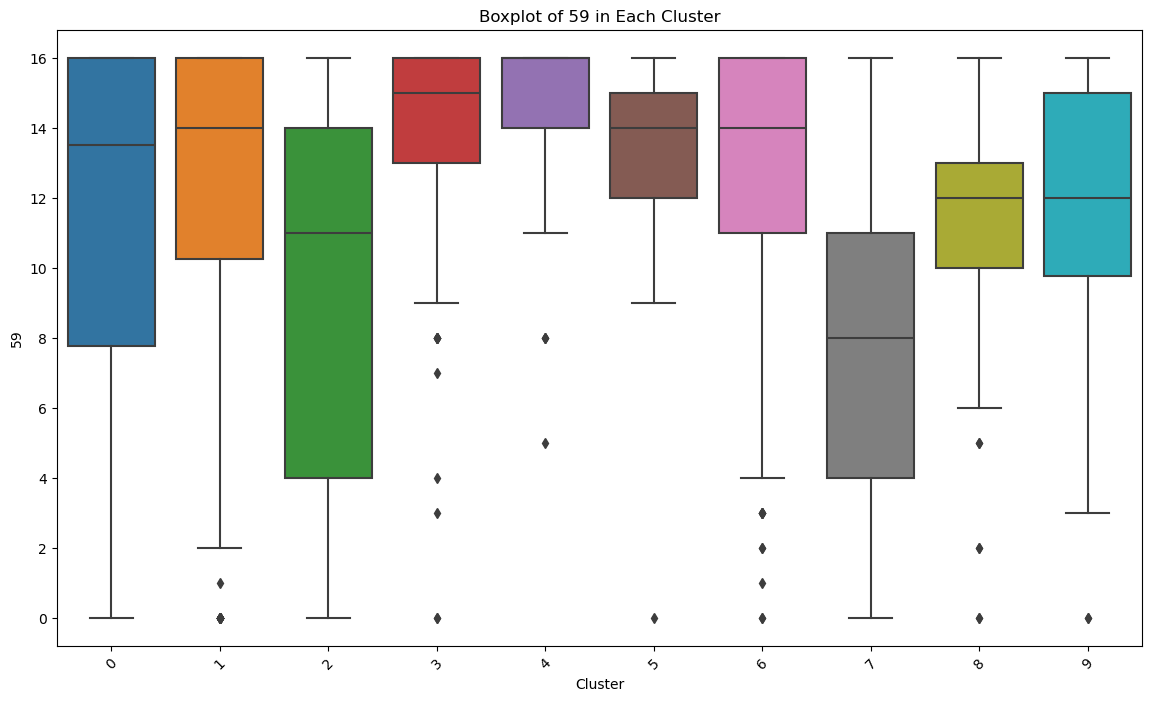

Summary statistics for 59:
         count       mean       std  min    25%   50%   75%   max
Cluster                                                          
0        228.0  11.162281  5.406390  0.0   7.75  13.5  16.0  16.0
1        218.0  11.766055  5.049556  0.0  10.25  14.0  16.0  16.0
2        117.0   8.931624  5.457874  0.0   4.00  11.0  14.0  16.0
3        268.0  13.966418  2.644121  0.0  13.00  15.0  16.0  16.0
4        197.0  14.827411  1.868280  5.0  14.00  16.0  16.0  16.0
5        171.0  13.625731  2.139333  0.0  12.00  14.0  15.0  16.0
6        188.0  12.622340  3.879320  0.0  11.00  14.0  16.0  16.0
7        134.0   7.776119  4.617133  0.0   4.00   8.0  11.0  16.0
8        160.0  11.181250  2.894088  0.0  10.00  12.0  13.0  16.0
9        116.0  11.818966  3.660837  0.0   9.75  12.0  15.0  16.0




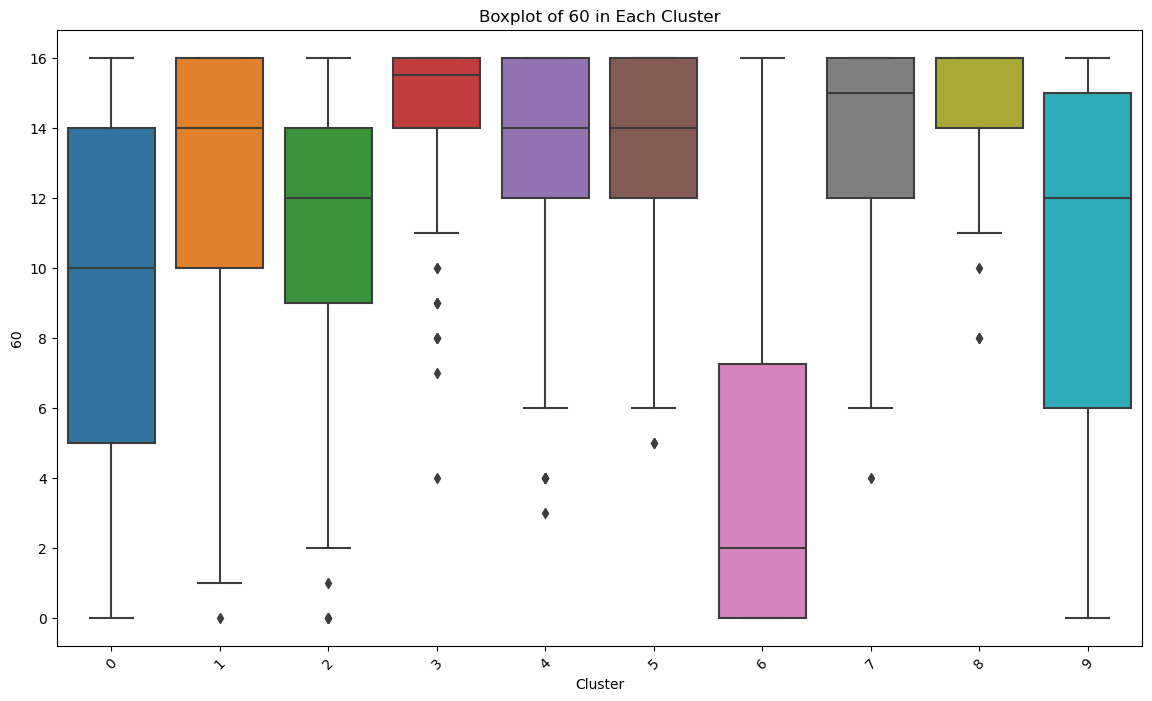

Summary statistics for 60:
         count       mean       std  min   25%   50%    75%   max
Cluster                                                          
0        228.0   9.442982  5.311553  0.0   5.0  10.0  14.00  16.0
1        218.0  12.440367  3.987148  0.0  10.0  14.0  16.00  16.0
2        117.0  11.042735  4.210809  0.0   9.0  12.0  14.00  16.0
3        268.0  14.626866  1.920407  4.0  14.0  15.5  16.00  16.0
4        197.0  13.365482  3.119790  3.0  12.0  14.0  16.00  16.0
5        171.0  13.502924  2.558433  5.0  12.0  14.0  16.00  16.0
6        188.0   4.090426  5.131148  0.0   0.0   2.0   7.25  16.0
7        134.0  13.604478  2.630128  4.0  12.0  15.0  16.00  16.0
8        160.0  14.993750  1.592028  8.0  14.0  16.0  16.00  16.0
9        116.0  10.439655  5.562747  0.0   6.0  12.0  15.00  16.0




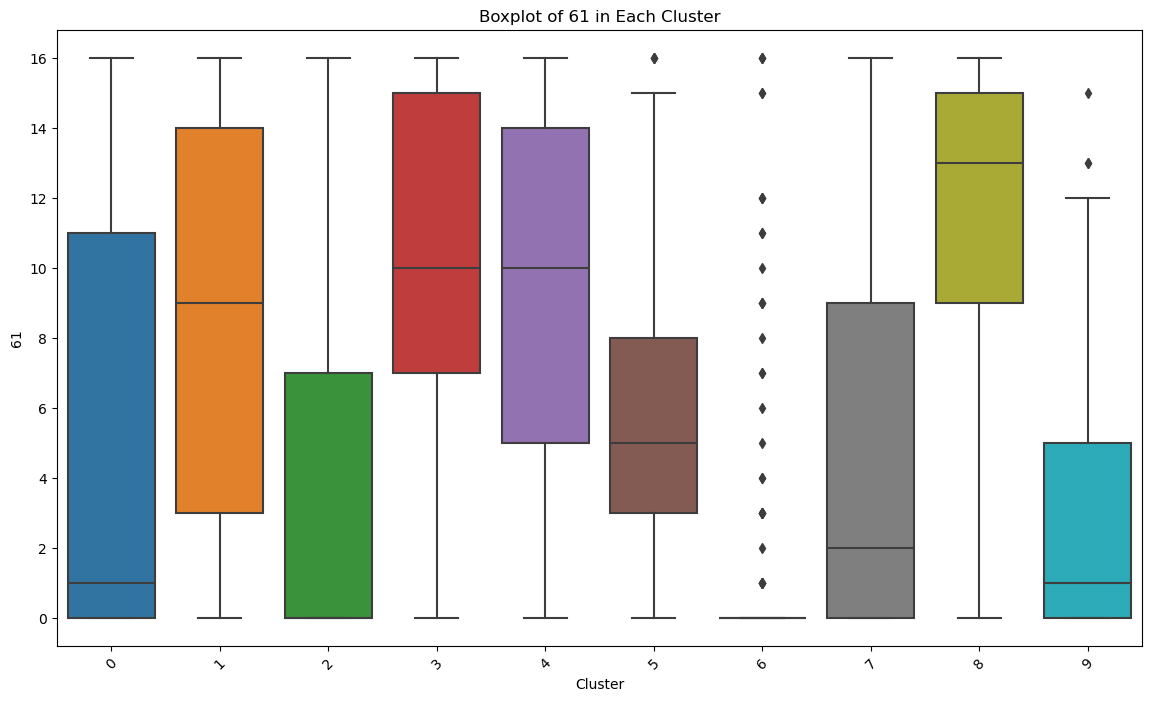

Summary statistics for 61:
         count       mean       std  min  25%   50%   75%   max
Cluster                                                        
0        228.0   5.052632  6.224638  0.0  0.0   1.0  11.0  16.0
1        218.0   8.587156  5.698591  0.0  3.0   9.0  14.0  16.0
2        117.0   3.743590  5.407775  0.0  0.0   0.0   7.0  16.0
3        268.0  10.272388  4.509298  0.0  7.0  10.0  15.0  16.0
4        197.0   9.421320  5.044714  0.0  5.0  10.0  14.0  16.0
5        171.0   5.906433  4.258212  0.0  3.0   5.0   8.0  16.0
6        188.0   1.255319  3.466991  0.0  0.0   0.0   0.0  16.0
7        134.0   4.843284  5.597871  0.0  0.0   2.0   9.0  16.0
8        160.0  11.643750  4.092249  0.0  9.0  13.0  15.0  16.0
9        116.0   2.810345  3.755376  0.0  0.0   1.0   5.0  15.0




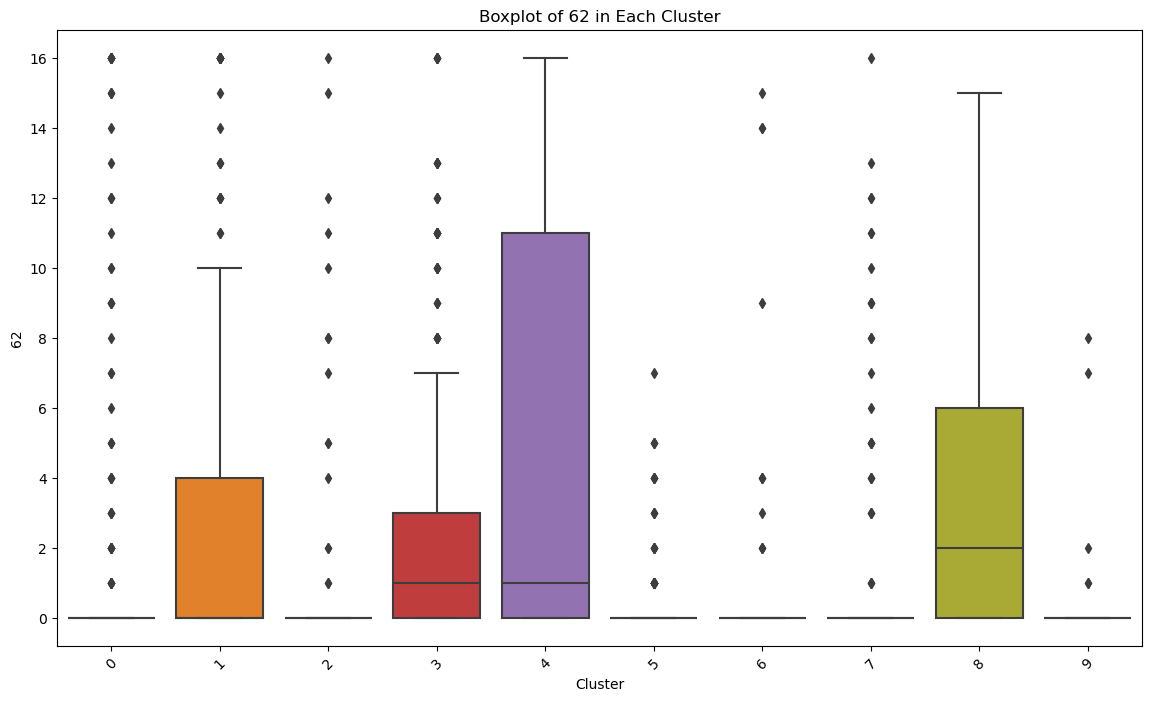

Summary statistics for 62:
         count      mean       std  min  25%  50%   75%   max
Cluster                                                      
0        228.0  1.868421  4.346274  0.0  0.0  0.0   0.0  16.0
1        218.0  2.899083  4.740151  0.0  0.0  0.0   4.0  16.0
2        117.0  0.914530  2.937782  0.0  0.0  0.0   0.0  16.0
3        268.0  2.462687  3.767905  0.0  0.0  1.0   3.0  16.0
4        197.0  5.000000  6.194962  0.0  0.0  1.0  11.0  16.0
5        171.0  0.397661  1.129703  0.0  0.0  0.0   0.0   7.0
6        188.0  0.388298  1.987466  0.0  0.0  0.0   0.0  15.0
7        134.0  1.380597  3.283119  0.0  0.0  0.0   0.0  16.0
8        160.0  3.506250  3.716353  0.0  0.0  2.0   6.0  15.0
9        116.0  0.163793  1.003853  0.0  0.0  0.0   0.0   8.0




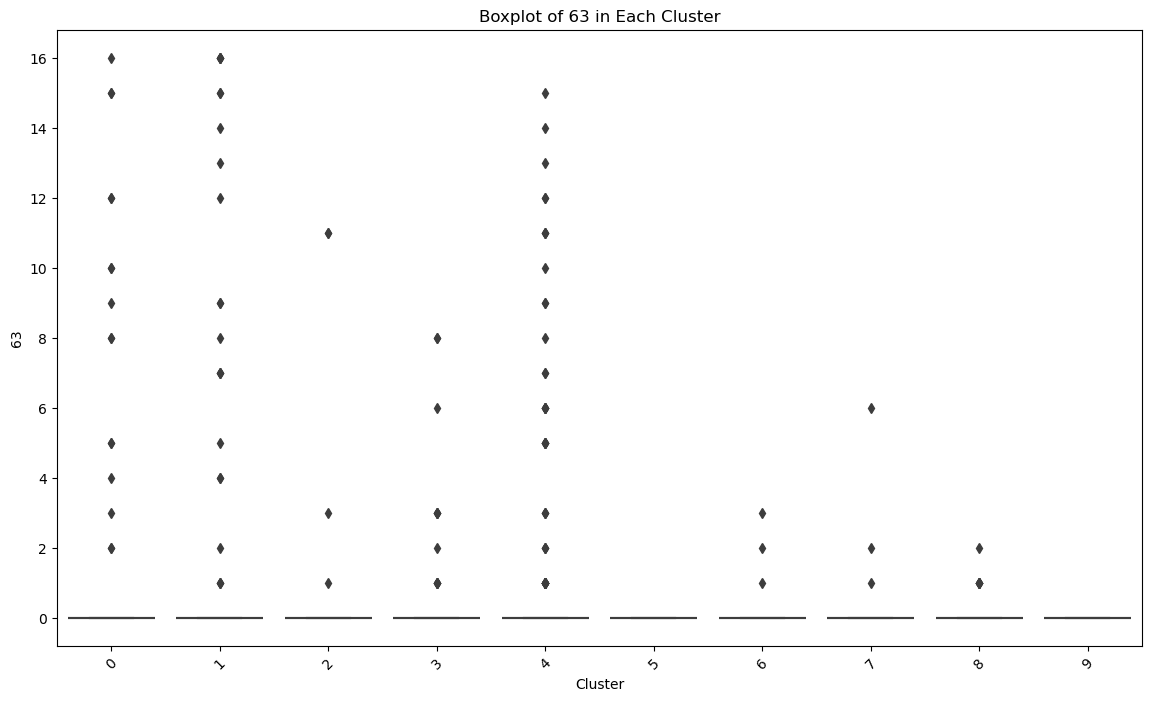

Summary statistics for 63:
         count      mean       std  min  25%  50%  75%   max
Cluster                                                     
0        228.0  0.596491  2.487747  0.0  0.0  0.0  0.0  16.0
1        218.0  0.908257  3.212996  0.0  0.0  0.0  0.0  16.0
2        117.0  0.222222  1.456916  0.0  0.0  0.0  0.0  11.0
3        268.0  0.152985  0.871366  0.0  0.0  0.0  0.0   8.0
4        197.0  1.172589  2.988184  0.0  0.0  0.0  0.0  15.0
5        171.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0
6        188.0  0.031915  0.271739  0.0  0.0  0.0  0.0   3.0
7        134.0  0.067164  0.551113  0.0  0.0  0.0  0.0   6.0
8        160.0  0.050000  0.245718  0.0  0.0  0.0  0.0   2.0
9        116.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0




In [29]:
# Boxplot for each feature in each cluster
for feature in X_clustered.columns[:-1]:
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='Cluster', y=feature, data=X_clustered)
    plt.title(f'Boxplot of {feature} in Each Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.xticks(rotation=45)
    plt.show()
    # Printing the summary statistics for each feature in each cluster
    print(f"Summary statistics for {feature}:")
    print(X_clustered.groupby('Cluster')[feature].describe())
    print("\n")

----------------------------------------------------------------------------------

In [30]:
optimal_clusters = 10
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(X_pca)
clusters = kmeans_optimal.labels_

# Add cluster labels to the original dataset
X_clustered = pd.DataFrame(X)
X_clustered['Cluster'] = clusters

# Distribution of data in each cluster
cluster_distribution = X_clustered['Cluster'].value_counts().sort_index()
print("Distribution of data in each cluster:")
print(cluster_distribution)

Distribution of data in each cluster:
Cluster
0    228
1    218
2    117
3    268
4    197
5    171
6    188
7    134
8    160
9    116
Name: count, dtype: int64


d:\Anaconda\install\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [31]:
# Calculate the mean of each feature in each cluster
cluster_means = X_clustered.groupby('Cluster').mean()

print("Mean features in each cluster:")
print(cluster_means)

Mean features in each cluster:
          0         1          2          3          4          5         6   \
Cluster                                                                        
0        0.0  0.390351   4.688596  10.179825  12.210526   9.469298  3.500000   
1        0.0  0.385321   6.114679  10.761468  10.752294   7.509174  1.903670   
2        0.0  0.000000   1.076923   8.675214  10.974359   3.649573  1.196581   
3        0.0  0.313433   7.354478  13.160448  12.466418   6.164179  0.697761   
4        0.0  0.954315  10.527919  15.010152  12.172589   4.898477  0.604061   
5        0.0  0.023392   4.315789  13.140351  11.000000   3.134503  0.099415   
6        0.0  0.500000   7.606383  13.739362  13.867021  10.010638  3.335106   
7        0.0  0.000000   0.179104   7.335821  12.410448   2.059701  0.141791   
8        0.0  0.000000   1.418750  11.418750   9.693750   1.931250  0.112500   
9        0.0  0.025862   3.112069  12.612069  12.396552   4.715517  0.931034   

        

In [32]:
import numpy as np

In [33]:
# Add hypothetical region and channel data
regions = np.random.choice(['North', 'South', 'East', 'West'], size=len(X))
channels = np.random.choice(['Online', 'Offline'], size=len(X))

X_clustered['Region'] = regions
X_clustered['Channel'] = channels

# Distribution of regions in each cluster
region_distribution = X_clustered.groupby('Cluster')['Region'].value_counts(normalize=True).unstack()
print("Distribution of regions in each cluster:")
print(region_distribution)

Distribution of regions in each cluster:
Region       East     North     South      West
Cluster                                        
0        0.219298  0.280702  0.232456  0.267544
1        0.252294  0.266055  0.266055  0.215596
2        0.299145  0.282051  0.239316  0.179487
3        0.276119  0.253731  0.253731  0.216418
4        0.223350  0.253807  0.223350  0.299492
5        0.263158  0.292398  0.233918  0.210526
6        0.260638  0.292553  0.186170  0.260638
7        0.149254  0.246269  0.365672  0.238806
8        0.293750  0.218750  0.243750  0.243750
9        0.267241  0.215517  0.198276  0.318966


In [34]:
channel_distribution = X_clustered.groupby('Cluster')['Channel'].value_counts(normalize=True).unstack()
print("Distribution of channels in each cluster:")
print(channel_distribution)

Distribution of channels in each cluster:
Channel   Offline    Online
Cluster                    
0        0.460526  0.539474
1        0.440367  0.559633
2        0.572650  0.427350
3        0.485075  0.514925
4        0.472081  0.527919
5        0.479532  0.520468
6        0.478723  0.521277
7        0.537313  0.462687
8        0.493750  0.506250
9        0.500000  0.500000


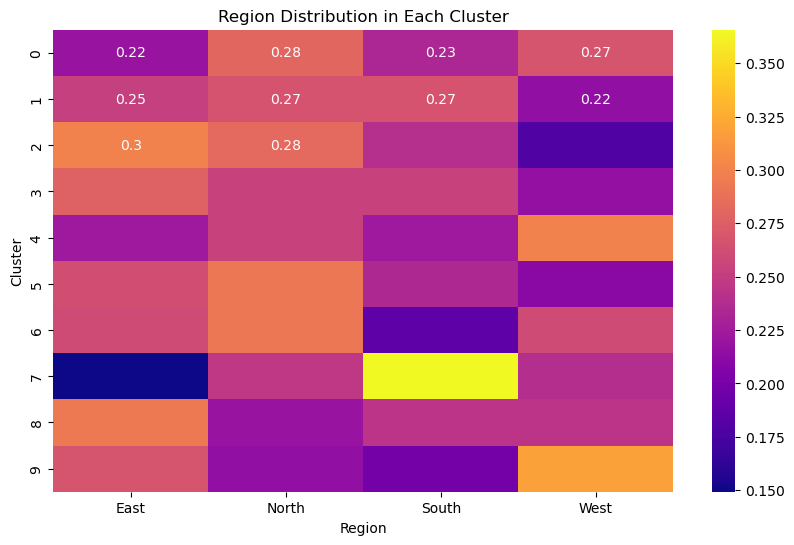

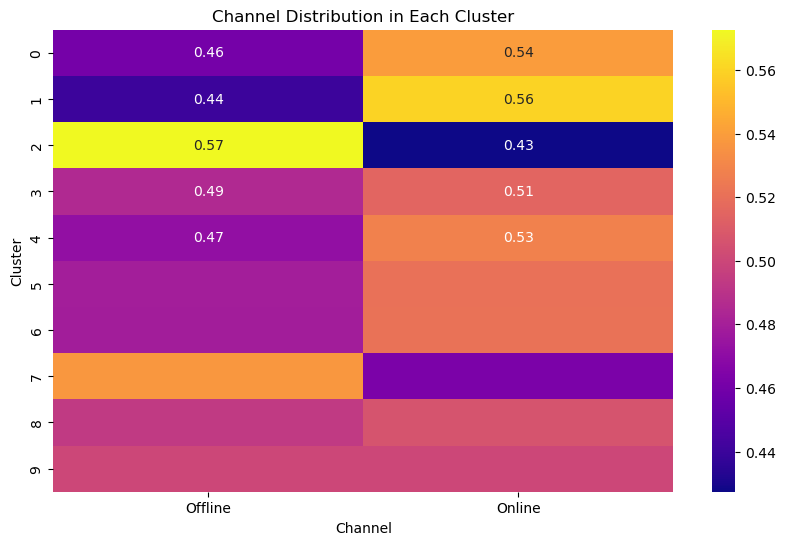

In [35]:
# Heatmap for region distribution in clusters
plt.figure(figsize=(10, 6))
sns.heatmap(region_distribution, annot=True, cmap='plasma')
plt.title('Region Distribution in Each Cluster')
plt.xlabel('Region')
plt.ylabel('Cluster')
plt.show()

# Heatmap for channel distribution in clusters
plt.figure(figsize=(10, 6))
sns.heatmap(channel_distribution, annot=True, cmap='plasma')
plt.title('Channel Distribution in Each Cluster')
plt.xlabel('Channel')
plt.ylabel('Cluster')
plt.show()

--------------------------------------------------------------------------------

In [36]:
X_clustered = pd.DataFrame(X)
X_clustered['Cluster'] = clusters

In [37]:
# Calculate the mean of each feature in each cluster
cluster_means = X_clustered.groupby('Cluster').mean()

print("Mean features in each cluster:")
print(cluster_means)

Mean features in each cluster:
          0         1          2          3          4          5         6   \
Cluster                                                                        
0        0.0  0.390351   4.688596  10.179825  12.210526   9.469298  3.500000   
1        0.0  0.385321   6.114679  10.761468  10.752294   7.509174  1.903670   
2        0.0  0.000000   1.076923   8.675214  10.974359   3.649573  1.196581   
3        0.0  0.313433   7.354478  13.160448  12.466418   6.164179  0.697761   
4        0.0  0.954315  10.527919  15.010152  12.172589   4.898477  0.604061   
5        0.0  0.023392   4.315789  13.140351  11.000000   3.134503  0.099415   
6        0.0  0.500000   7.606383  13.739362  13.867021  10.010638  3.335106   
7        0.0  0.000000   0.179104   7.335821  12.410448   2.059701  0.141791   
8        0.0  0.000000   1.418750  11.418750   9.693750   1.931250  0.112500   
9        0.0  0.025862   3.112069  12.612069  12.396552   4.715517  0.931034   

        

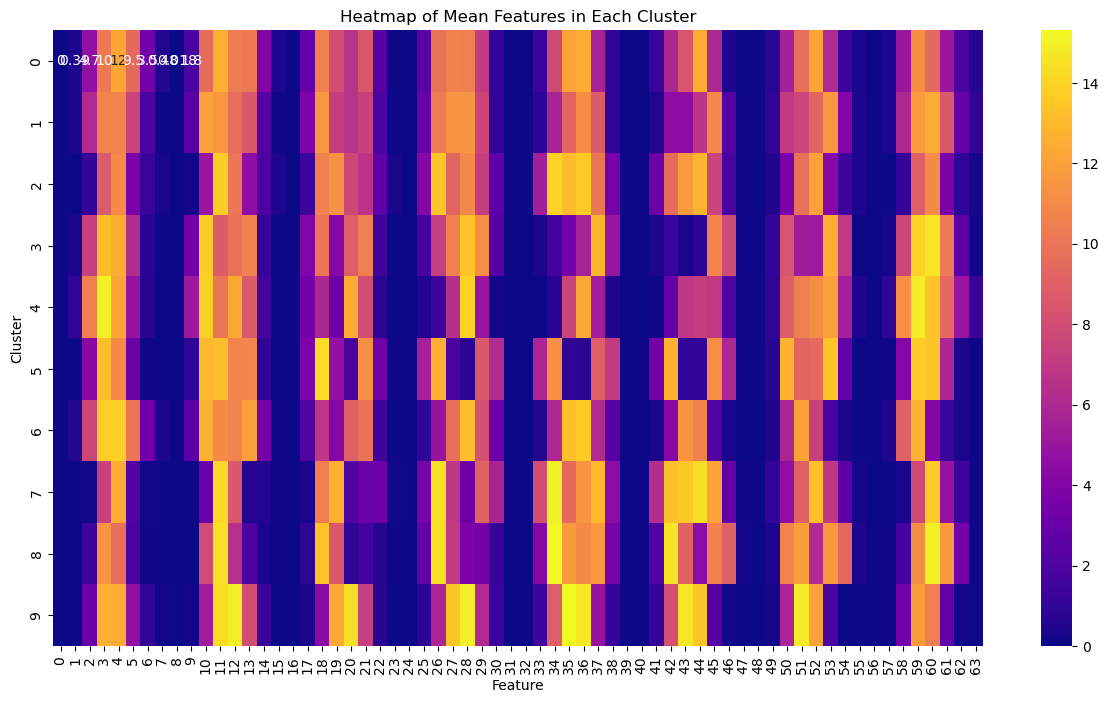

In [38]:
# Heatmap of mean features in each cluster
plt.figure(figsize=(15, 8))
sns.heatmap(cluster_means, annot=True, cmap='plasma')
plt.title('Heatmap of Mean Features in Each Cluster')
plt.xlabel('Feature')
plt.ylabel('Cluster')
plt.show()

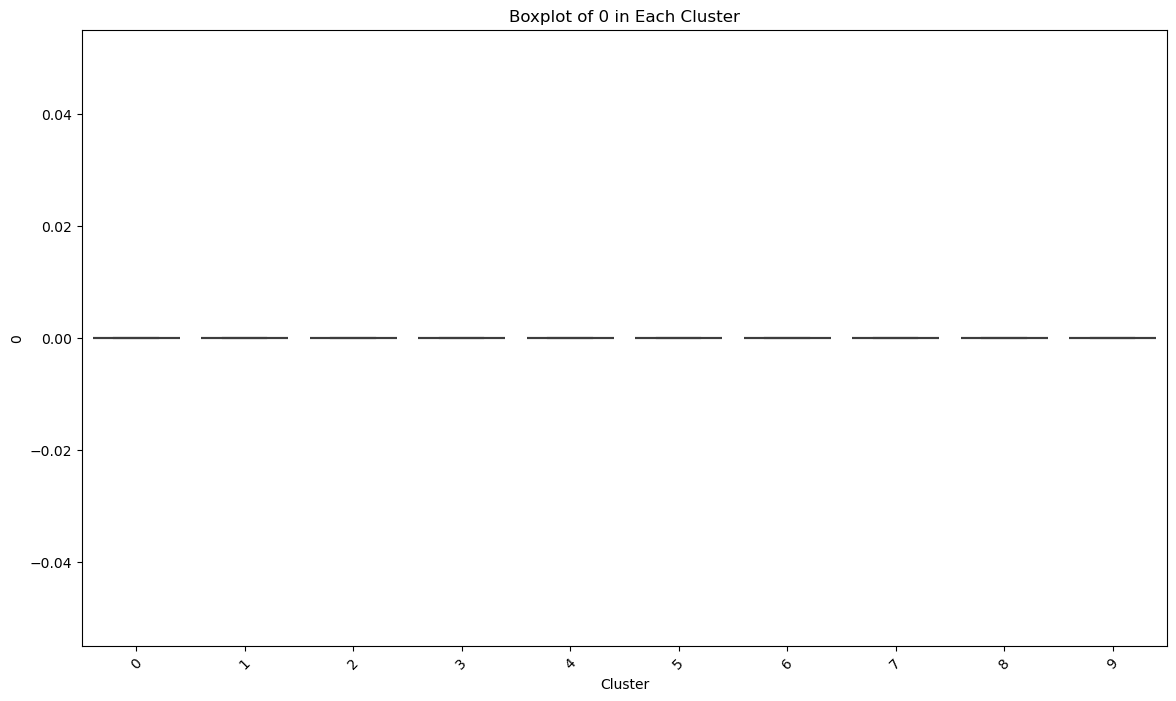

Summary statistics for 0:
         count  mean  std  min  25%  50%  75%  max
Cluster                                           
0        228.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1        218.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
2        117.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
3        268.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
4        197.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
5        171.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
6        188.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
7        134.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
8        160.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
9        116.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0




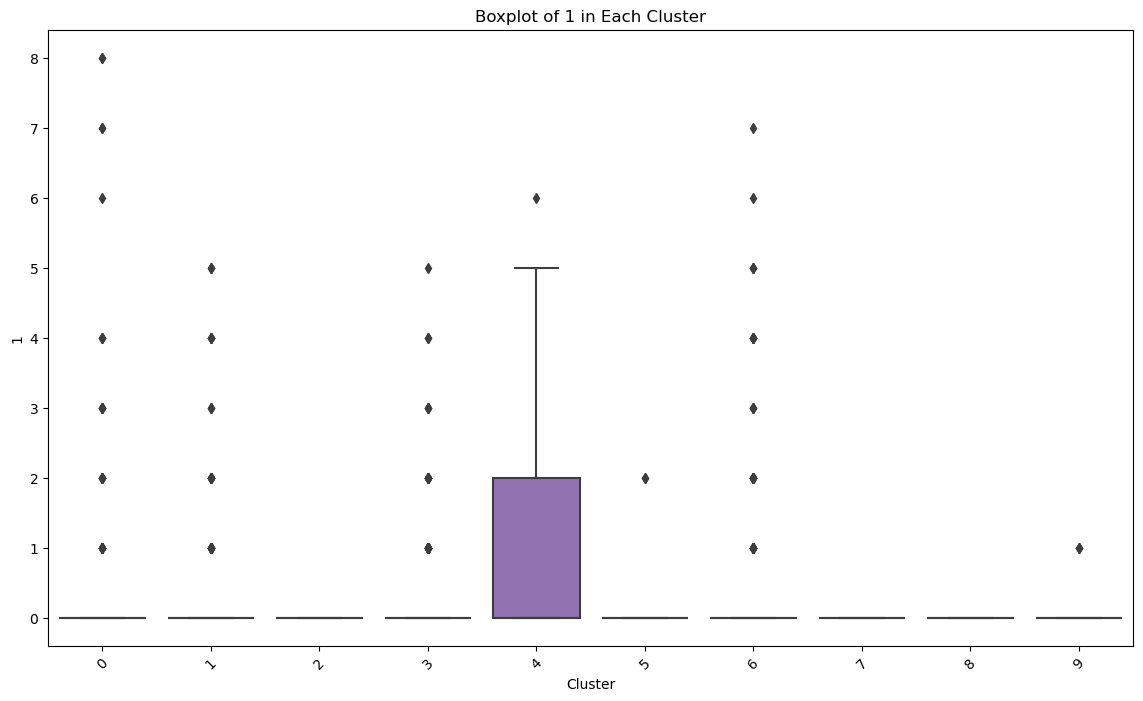

Summary statistics for 1:
         count      mean       std  min  25%  50%  75%  max
Cluster                                                    
0        228.0  0.390351  1.266753  0.0  0.0  0.0  0.0  8.0
1        218.0  0.385321  0.982879  0.0  0.0  0.0  0.0  5.0
2        117.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
3        268.0  0.313433  0.743692  0.0  0.0  0.0  0.0  5.0
4        197.0  0.954315  1.246605  0.0  0.0  0.0  2.0  6.0
5        171.0  0.023392  0.215658  0.0  0.0  0.0  0.0  2.0
6        188.0  0.500000  1.238854  0.0  0.0  0.0  0.0  7.0
7        134.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
8        160.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
9        116.0  0.025862  0.159412  0.0  0.0  0.0  0.0  1.0




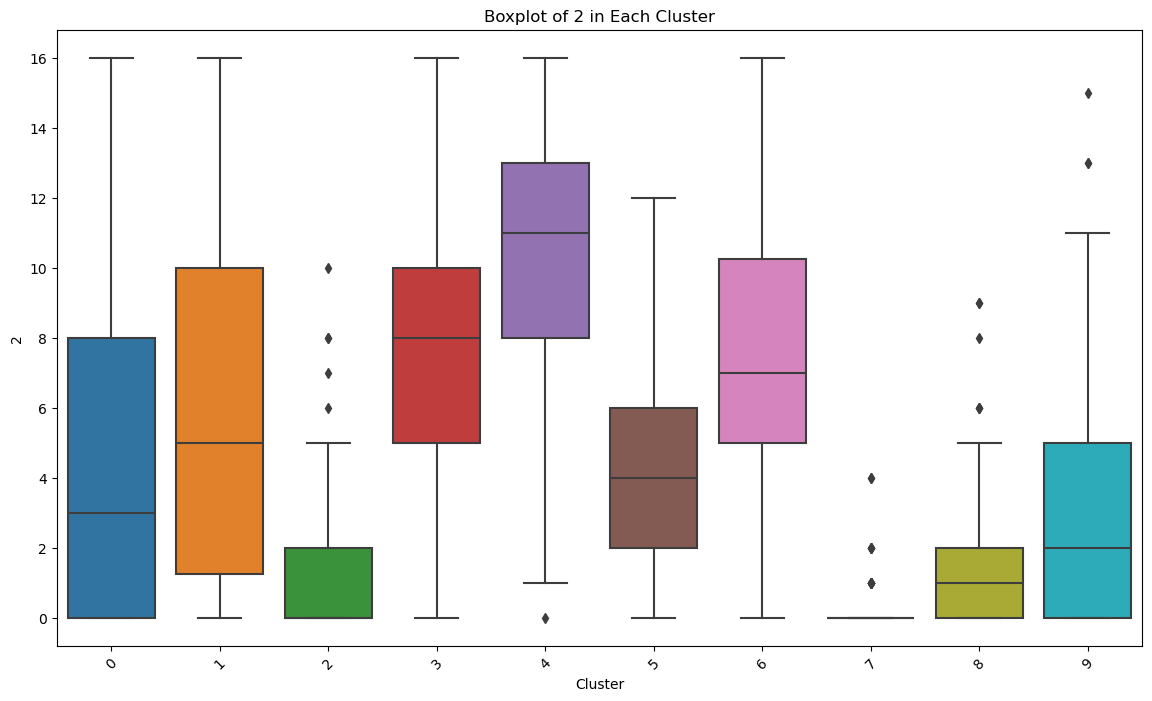

Summary statistics for 2:
         count       mean       std  min   25%   50%    75%   max
Cluster                                                          
0        228.0   4.688596  5.026314  0.0  0.00   3.0   8.00  16.0
1        218.0   6.114679  5.080065  0.0  1.25   5.0  10.00  16.0
2        117.0   1.076923  1.934950  0.0  0.00   0.0   2.00  10.0
3        268.0   7.354478  3.703083  0.0  5.00   8.0  10.00  16.0
4        197.0  10.527919  3.576494  0.0  8.00  11.0  13.00  16.0
5        171.0   4.315789  2.845996  0.0  2.00   4.0   6.00  12.0
6        188.0   7.606383  3.979138  0.0  5.00   7.0  10.25  16.0
7        134.0   0.179104  0.623485  0.0  0.00   0.0   0.00   4.0
8        160.0   1.418750  1.806598  0.0  0.00   1.0   2.00   9.0
9        116.0   3.112069  3.359015  0.0  0.00   2.0   5.00  15.0




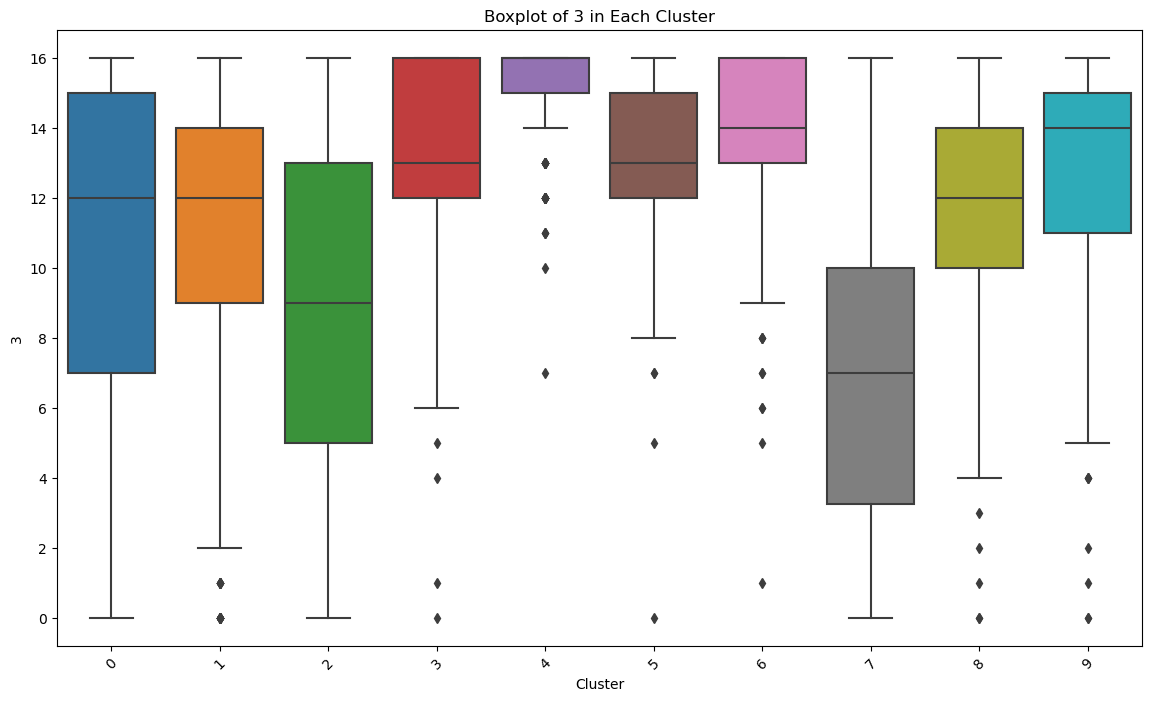

Summary statistics for 3:
         count       mean       std  min    25%   50%   75%   max
Cluster                                                          
0        228.0  10.179825  5.163250  0.0   7.00  12.0  15.0  16.0
1        218.0  10.761468  4.649759  0.0   9.00  12.0  14.0  16.0
2        117.0   8.675214  5.187566  0.0   5.00   9.0  13.0  16.0
3        268.0  13.160448  2.681676  0.0  12.00  13.0  16.0  16.0
4        197.0  15.010152  1.501665  7.0  15.00  16.0  16.0  16.0
5        171.0  13.140351  2.421268  0.0  12.00  13.0  15.0  16.0
6        188.0  13.739362  2.573236  1.0  13.00  14.0  16.0  16.0
7        134.0   7.335821  4.319816  0.0   3.25   7.0  10.0  16.0
8        160.0  11.418750  3.249522  0.0  10.00  12.0  14.0  16.0
9        116.0  12.612069  3.630239  0.0  11.00  14.0  15.0  16.0




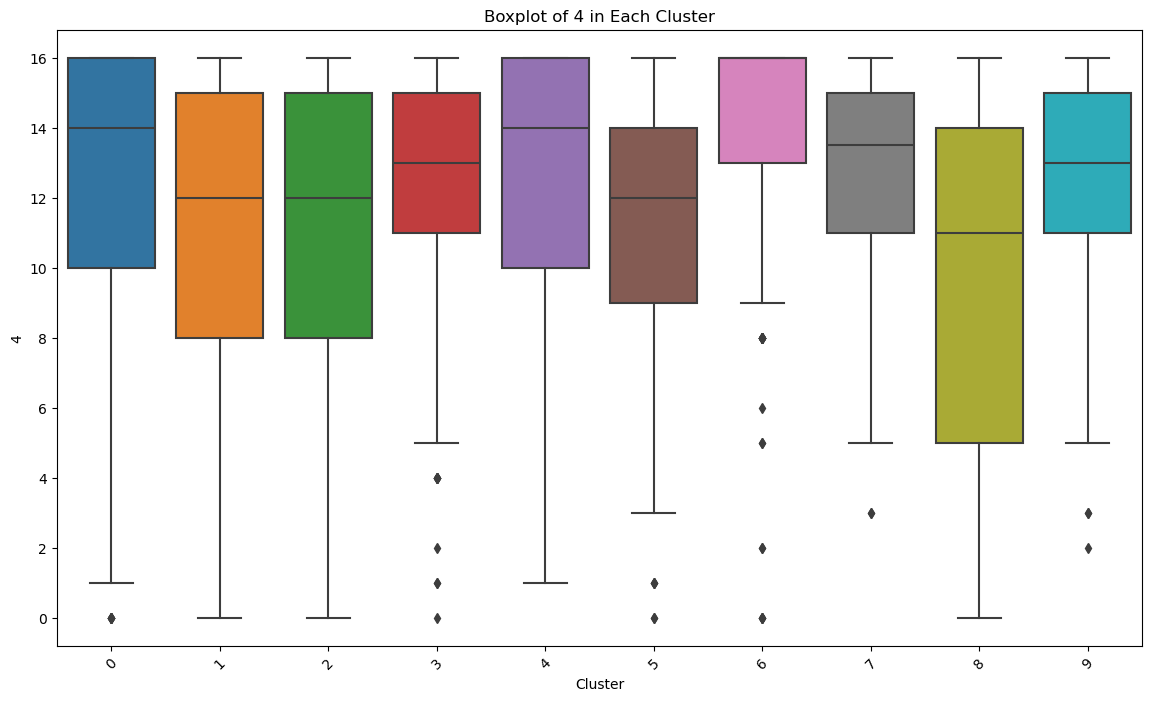

Summary statistics for 4:
         count       mean       std  min   25%   50%   75%   max
Cluster                                                         
0        228.0  12.210526  4.520095  0.0  10.0  14.0  16.0  16.0
1        218.0  10.752294  5.083009  0.0   8.0  12.0  15.0  16.0
2        117.0  10.974359  4.259799  0.0   8.0  12.0  15.0  16.0
3        268.0  12.466418  3.326602  0.0  11.0  13.0  15.0  16.0
4        197.0  12.172589  4.391627  1.0  10.0  14.0  16.0  16.0
5        171.0  11.000000  3.820995  0.0   9.0  12.0  14.0  16.0
6        188.0  13.867021  3.562787  0.0  13.0  16.0  16.0  16.0
7        134.0  12.410448  3.141315  3.0  11.0  13.5  15.0  16.0
8        160.0   9.693750  5.323494  0.0   5.0  11.0  14.0  16.0
9        116.0  12.396552  3.009779  2.0  11.0  13.0  15.0  16.0




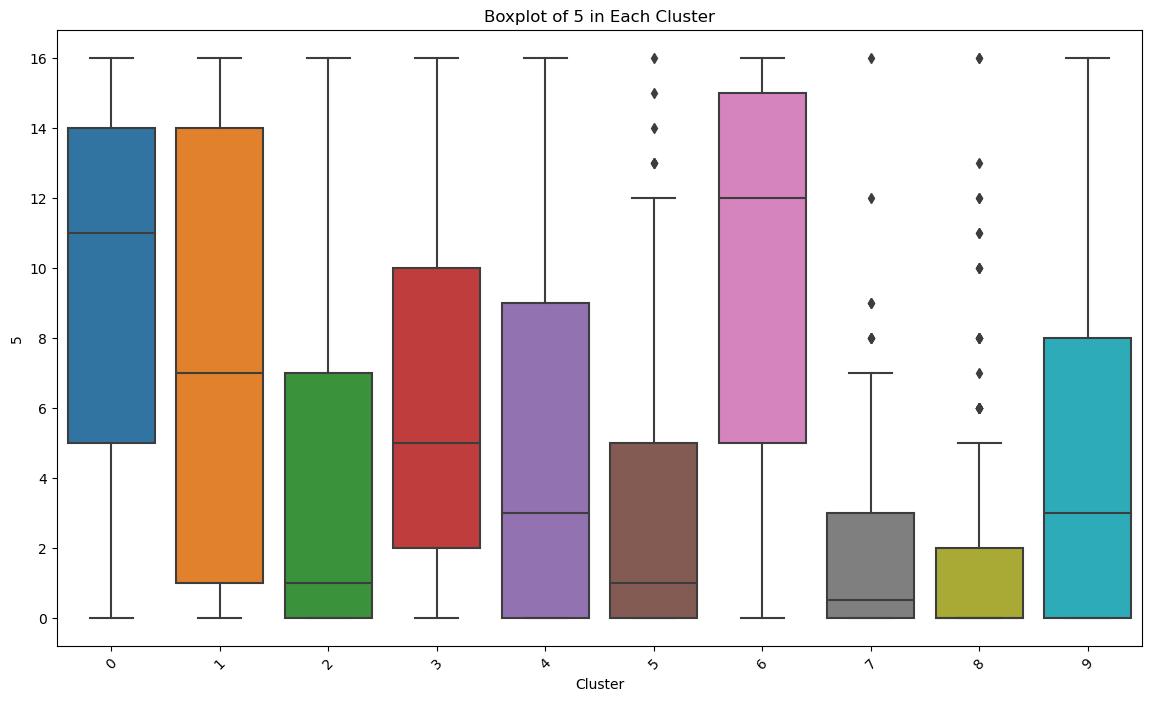

Summary statistics for 5:
         count       mean       std  min  25%   50%   75%   max
Cluster                                                        
0        228.0   9.469298  5.623576  0.0  5.0  11.0  14.0  16.0
1        218.0   7.509174  6.177289  0.0  1.0   7.0  14.0  16.0
2        117.0   3.649573  4.934600  0.0  0.0   1.0   7.0  16.0
3        268.0   6.164179  4.987917  0.0  2.0   5.0  10.0  16.0
4        197.0   4.898477  5.137879  0.0  0.0   3.0   9.0  16.0
5        171.0   3.134503  3.690932  0.0  0.0   1.0   5.0  16.0
6        188.0  10.010638  5.611285  0.0  5.0  12.0  15.0  16.0
7        134.0   2.059701  2.896098  0.0  0.0   0.5   3.0  16.0
8        160.0   1.931250  3.403886  0.0  0.0   0.0   2.0  16.0
9        116.0   4.715517  5.114015  0.0  0.0   3.0   8.0  16.0




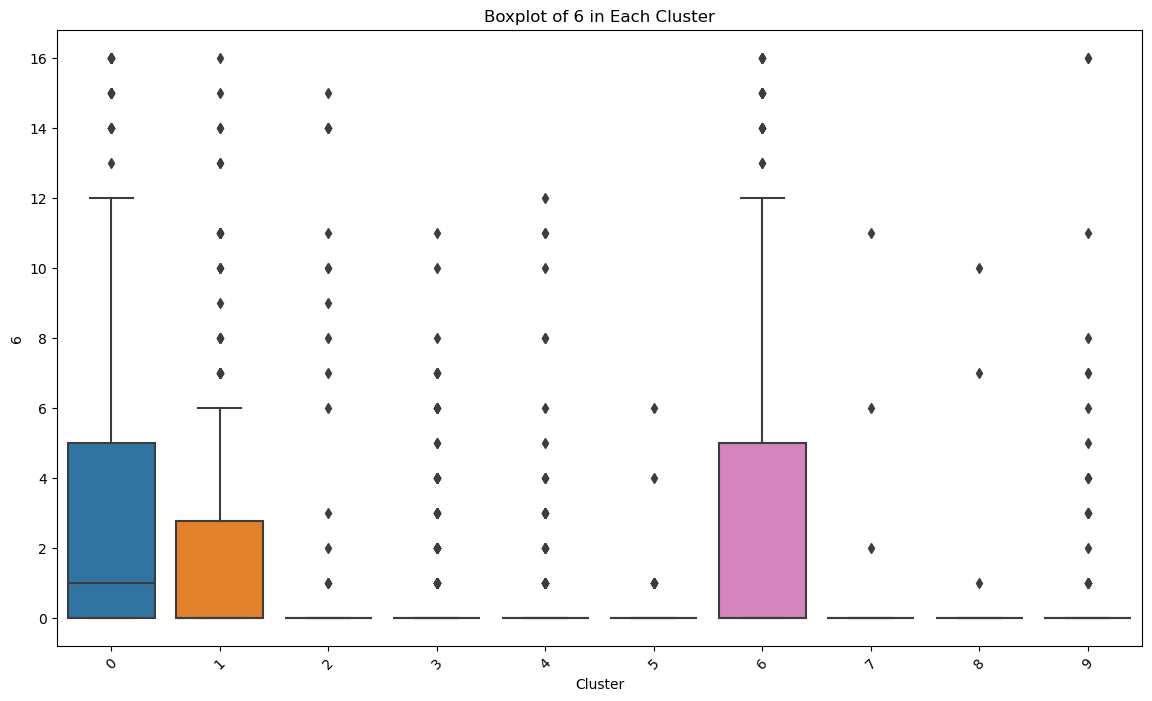

Summary statistics for 6:
         count      mean       std  min  25%  50%   75%   max
Cluster                                                      
0        228.0  3.500000  4.979694  0.0  0.0  1.0  5.00  16.0
1        218.0  1.903670  3.488610  0.0  0.0  0.0  2.75  16.0
2        117.0  1.196581  3.484545  0.0  0.0  0.0  0.00  15.0
3        268.0  0.697761  1.795248  0.0  0.0  0.0  0.00  11.0
4        197.0  0.604061  1.934009  0.0  0.0  0.0  0.00  12.0
5        171.0  0.099415  0.580618  0.0  0.0  0.0  0.00   6.0
6        188.0  3.335106  4.940225  0.0  0.0  0.0  5.00  16.0
7        134.0  0.141791  1.090995  0.0  0.0  0.0  0.00  11.0
8        160.0  0.112500  0.964707  0.0  0.0  0.0  0.00  10.0
9        116.0  0.931034  2.717813  0.0  0.0  0.0  0.00  16.0




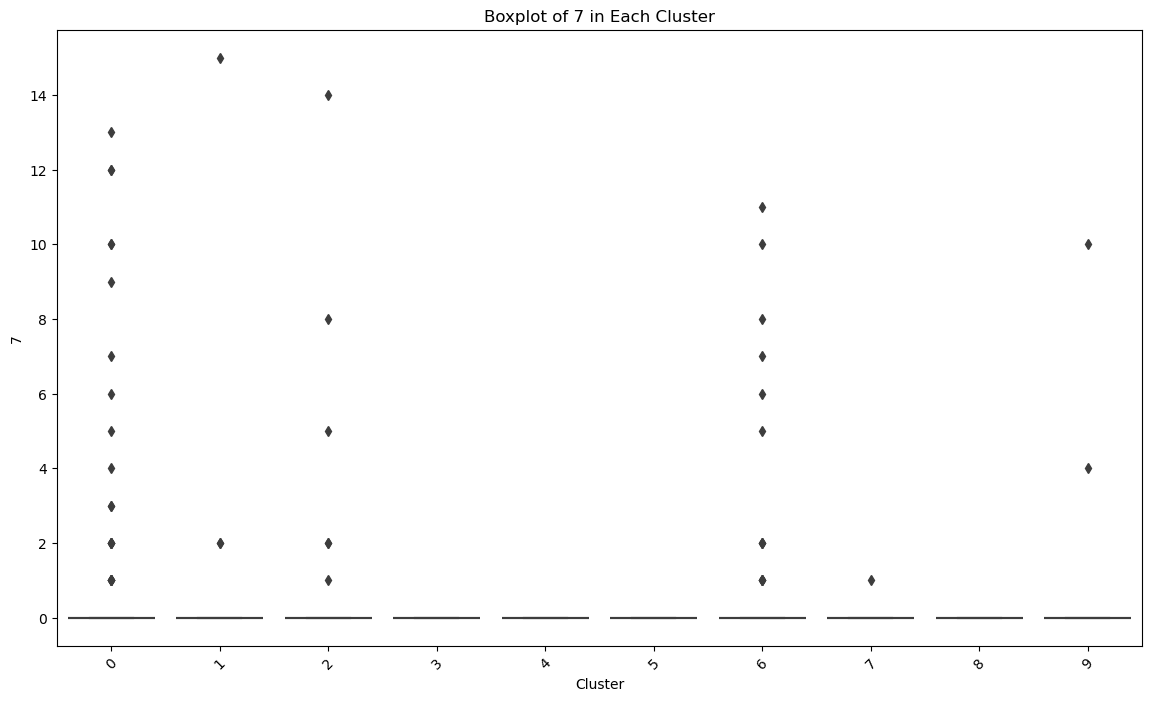

Summary statistics for 7:
         count      mean       std  min  25%  50%  75%   max
Cluster                                                     
0        228.0  0.482456  1.940673  0.0  0.0  0.0  0.0  13.0
1        218.0  0.087156  1.032522  0.0  0.0  0.0  0.0  15.0
2        117.0  0.273504  1.568131  0.0  0.0  0.0  0.0  14.0
3        268.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0
4        197.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0
5        171.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0
6        188.0  0.303191  1.451015  0.0  0.0  0.0  0.0  11.0
7        134.0  0.007463  0.086387  0.0  0.0  0.0  0.0   1.0
8        160.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0
9        116.0  0.120690  0.996997  0.0  0.0  0.0  0.0  10.0




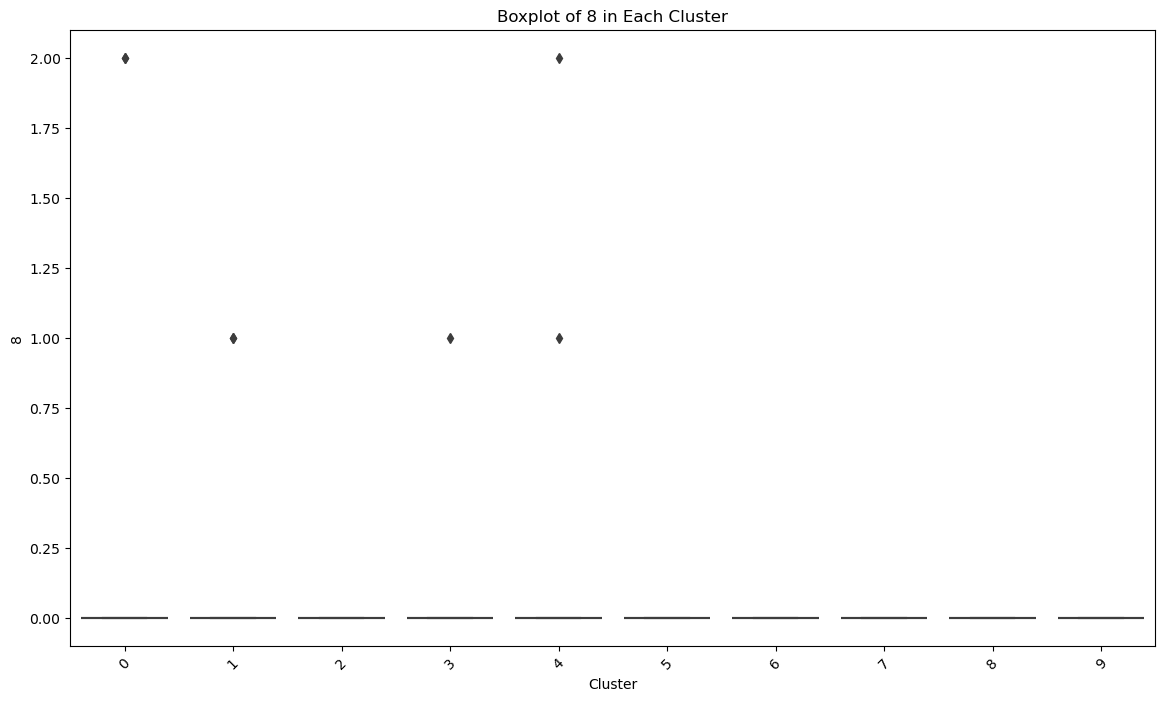

Summary statistics for 8:
         count      mean       std  min  25%  50%  75%  max
Cluster                                                    
0        228.0  0.017544  0.186904  0.0  0.0  0.0  0.0  2.0
1        218.0  0.009174  0.095562  0.0  0.0  0.0  0.0  1.0
2        117.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
3        268.0  0.003731  0.061085  0.0  0.0  0.0  0.0  1.0
4        197.0  0.015228  0.158988  0.0  0.0  0.0  0.0  2.0
5        171.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
6        188.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
7        134.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
8        160.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
9        116.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0




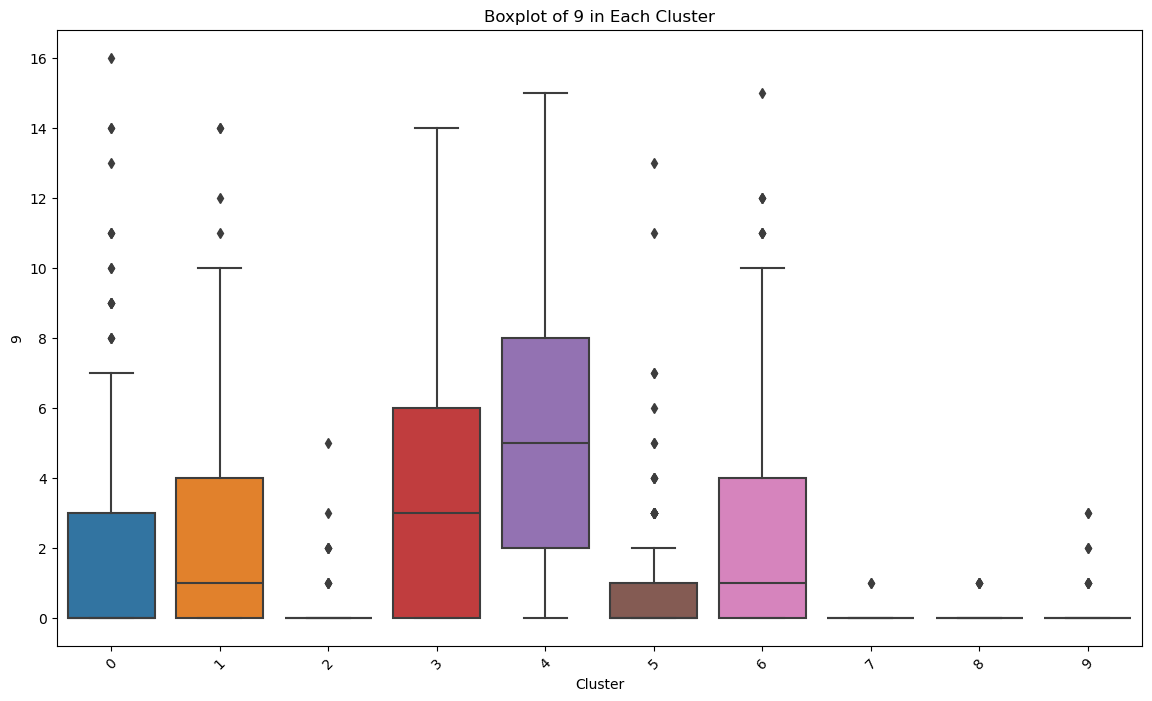

Summary statistics for 9:
         count      mean       std  min  25%  50%  75%   max
Cluster                                                     
0        228.0  1.798246  3.147420  0.0  0.0  0.0  3.0  16.0
1        218.0  2.399083  3.096214  0.0  0.0  1.0  4.0  14.0
2        117.0  0.170940  0.660337  0.0  0.0  0.0  0.0   5.0
3        268.0  3.511194  3.477572  0.0  0.0  3.0  6.0  14.0
4        197.0  5.172589  3.937089  0.0  2.0  5.0  8.0  15.0
5        171.0  0.953216  1.859199  0.0  0.0  0.0  1.0  13.0
6        188.0  2.579787  3.462406  0.0  0.0  1.0  4.0  15.0
7        134.0  0.014925  0.121709  0.0  0.0  0.0  0.0   1.0
8        160.0  0.031250  0.174539  0.0  0.0  0.0  0.0   1.0
9        116.0  0.129310  0.502691  0.0  0.0  0.0  0.0   3.0




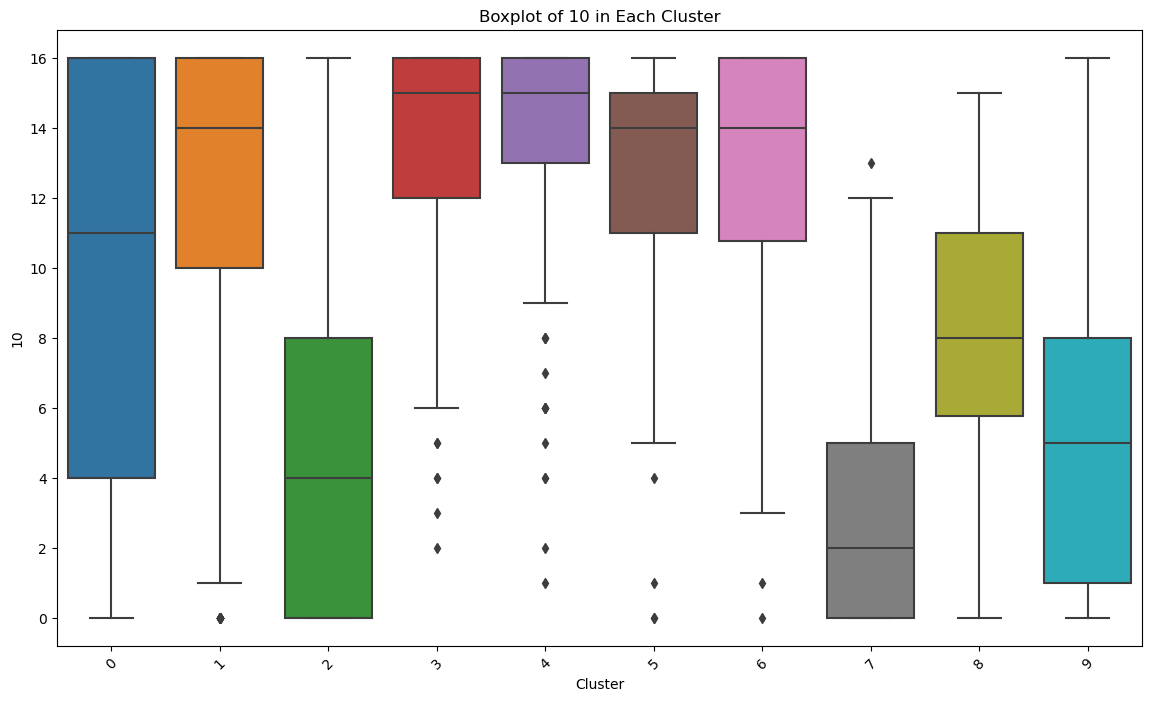

Summary statistics for 10:
         count       mean       std  min    25%   50%   75%   max
Cluster                                                          
0        228.0   9.596491  5.946486  0.0   4.00  11.0  16.0  16.0
1        218.0  11.963303  5.179589  0.0  10.00  14.0  16.0  16.0
2        117.0   5.059829  4.844639  0.0   0.00   4.0   8.0  16.0
3        268.0  13.682836  2.738299  2.0  12.00  15.0  16.0  16.0
4        197.0  13.822335  2.969902  1.0  13.00  15.0  16.0  16.0
5        171.0  12.953216  3.180479  0.0  11.00  14.0  15.0  16.0
6        188.0  12.611702  3.593409  0.0  10.75  14.0  16.0  16.0
7        134.0   3.044776  3.010922  0.0   0.00   2.0   5.0  13.0
8        160.0   7.918750  3.653157  0.0   5.75   8.0  11.0  15.0
9        116.0   5.327586  4.717729  0.0   1.00   5.0   8.0  16.0




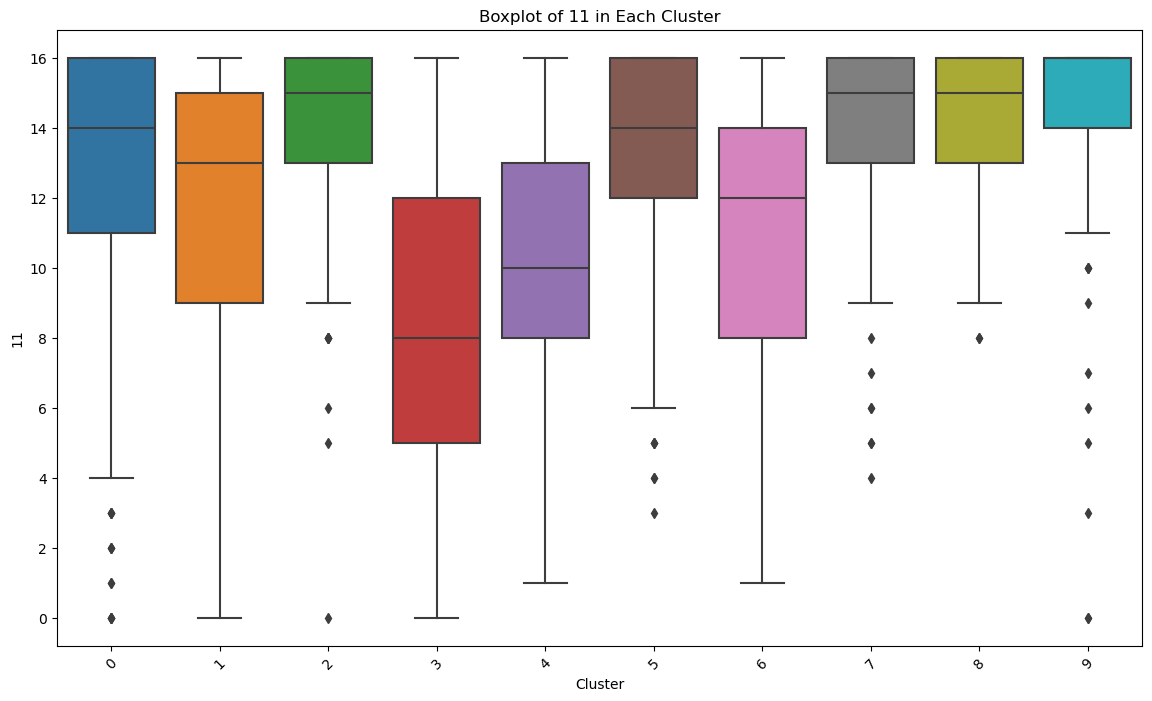

Summary statistics for 11:
         count       mean       std  min   25%   50%   75%   max
Cluster                                                         
0        228.0  12.574561  4.057805  0.0  11.0  14.0  16.0  16.0
1        218.0  11.591743  4.032509  0.0   9.0  13.0  15.0  16.0
2        117.0  13.794872  2.887364  0.0  13.0  15.0  16.0  16.0
3        268.0   8.757463  3.987450  0.0   5.0   8.0  12.0  16.0
4        197.0  10.081218  3.393196  1.0   8.0  10.0  13.0  16.0
5        171.0  13.111111  3.161244  3.0  12.0  14.0  16.0  16.0
6        188.0  11.063830  3.814715  1.0   8.0  12.0  14.0  16.0
7        134.0  14.141791  2.658941  4.0  13.0  15.0  16.0  16.0
8        160.0  14.462500  1.971136  8.0  13.0  15.0  16.0  16.0
9        116.0  14.267241  3.110593  0.0  14.0  16.0  16.0  16.0




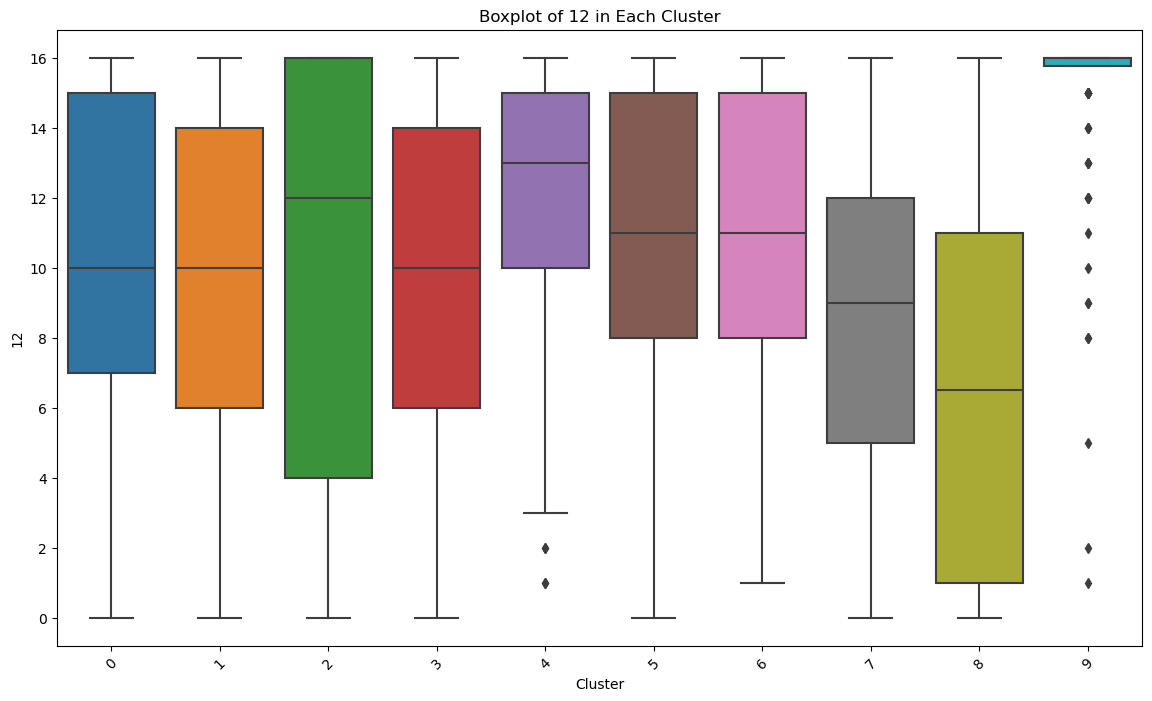

Summary statistics for 12:
         count       mean       std  min    25%   50%   75%   max
Cluster                                                          
0        228.0  10.289474  4.573865  0.0   7.00  10.0  15.0  16.0
1        218.0   9.637615  4.637242  0.0   6.00  10.0  14.0  16.0
2        117.0  10.068376  5.657961  0.0   4.00  12.0  16.0  16.0
3        268.0   9.861940  4.395219  0.0   6.00  10.0  14.0  16.0
4        197.0  12.365482  3.595409  1.0  10.00  13.0  15.0  16.0
5        171.0  10.760234  4.383907  0.0   8.00  11.0  15.0  16.0
6        188.0  10.675532  4.108949  1.0   8.00  11.0  15.0  16.0
7        134.0   8.589552  4.287090  0.0   5.00   9.0  12.0  16.0
8        160.0   6.487500  5.208831  0.0   1.00   6.5  11.0  16.0
9        116.0  14.931034  2.666129  1.0  15.75  16.0  16.0  16.0




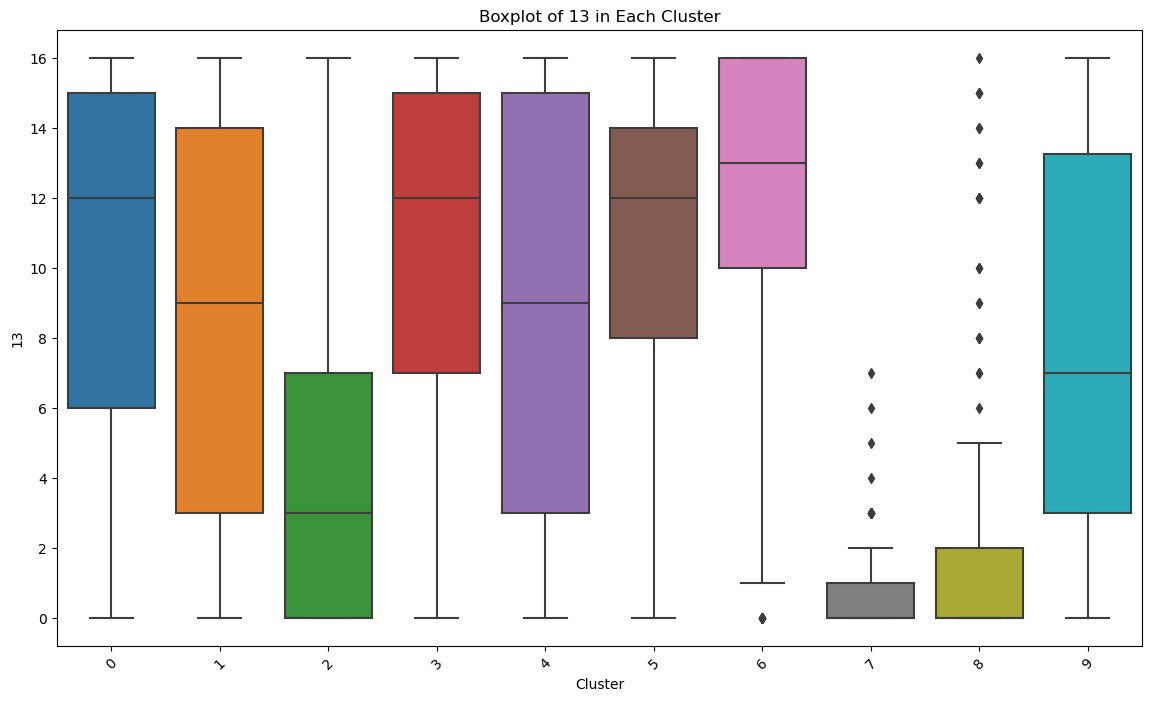

Summary statistics for 13:
         count       mean       std  min   25%   50%    75%   max
Cluster                                                          
0        228.0  10.184211  5.525377  0.0   6.0  12.0  15.00  16.0
1        218.0   8.504587  5.855595  0.0   3.0   9.0  14.00  16.0
2        117.0   4.598291  4.994928  0.0   0.0   3.0   7.00  16.0
3        268.0  10.630597  4.961435  0.0   7.0  12.0  15.00  16.0
4        197.0   8.705584  5.980804  0.0   3.0   9.0  15.00  16.0
5        171.0  10.766082  4.263831  0.0   8.0  12.0  14.00  16.0
6        188.0  11.952128  4.600958  0.0  10.0  13.0  16.00  16.0
7        134.0   0.589552  1.233692  0.0   0.0   0.0   1.00   7.0
8        160.0   1.987500  3.917366  0.0   0.0   0.0   2.00  16.0
9        116.0   8.008621  5.501772  0.0   3.0   7.0  13.25  16.0




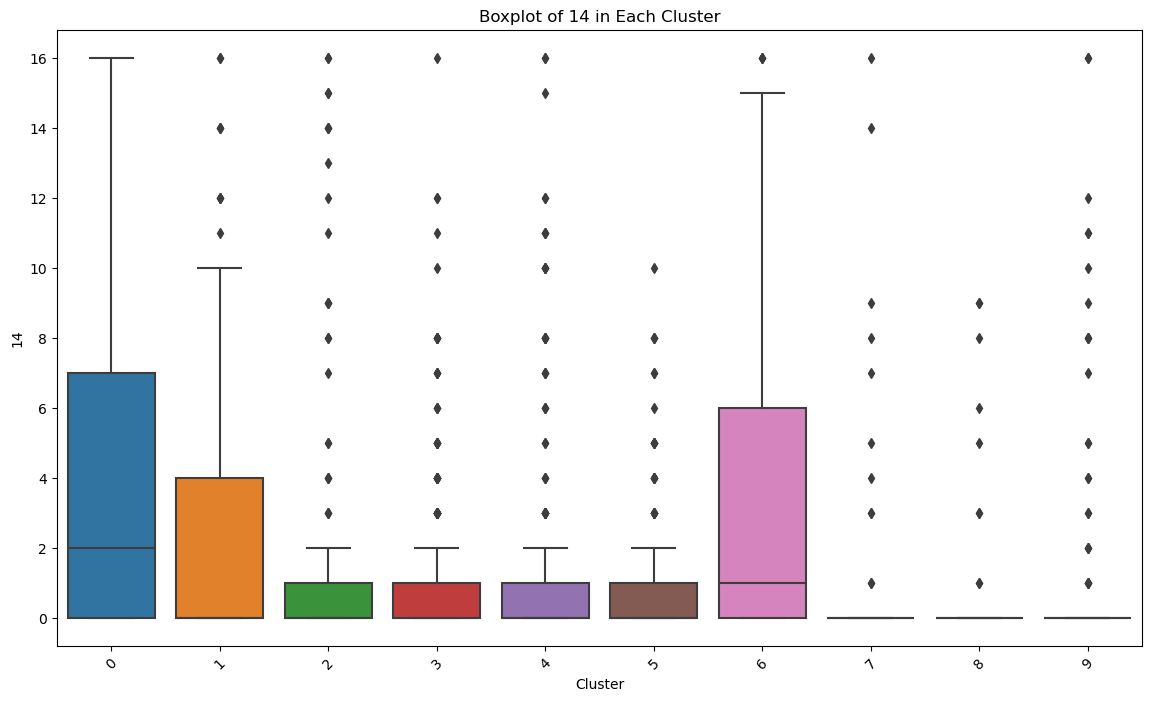

Summary statistics for 14:
         count      mean       std  min  25%  50%  75%   max
Cluster                                                     
0        228.0  3.956140  4.863585  0.0  0.0  2.0  7.0  16.0
1        218.0  2.229358  3.582170  0.0  0.0  0.0  4.0  16.0
2        117.0  2.008547  4.235514  0.0  0.0  0.0  1.0  16.0
3        268.0  1.130597  2.406630  0.0  0.0  0.0  1.0  16.0
4        197.0  1.543147  3.332649  0.0  0.0  0.0  1.0  16.0
5        171.0  0.929825  1.861622  0.0  0.0  0.0  1.0  10.0
6        188.0  3.526596  4.511937  0.0  0.0  1.0  6.0  16.0
7        134.0  0.529851  2.243421  0.0  0.0  0.0  0.0  16.0
8        160.0  0.281250  1.360595  0.0  0.0  0.0  0.0   9.0
9        116.0  1.293103  3.286381  0.0  0.0  0.0  0.0  16.0




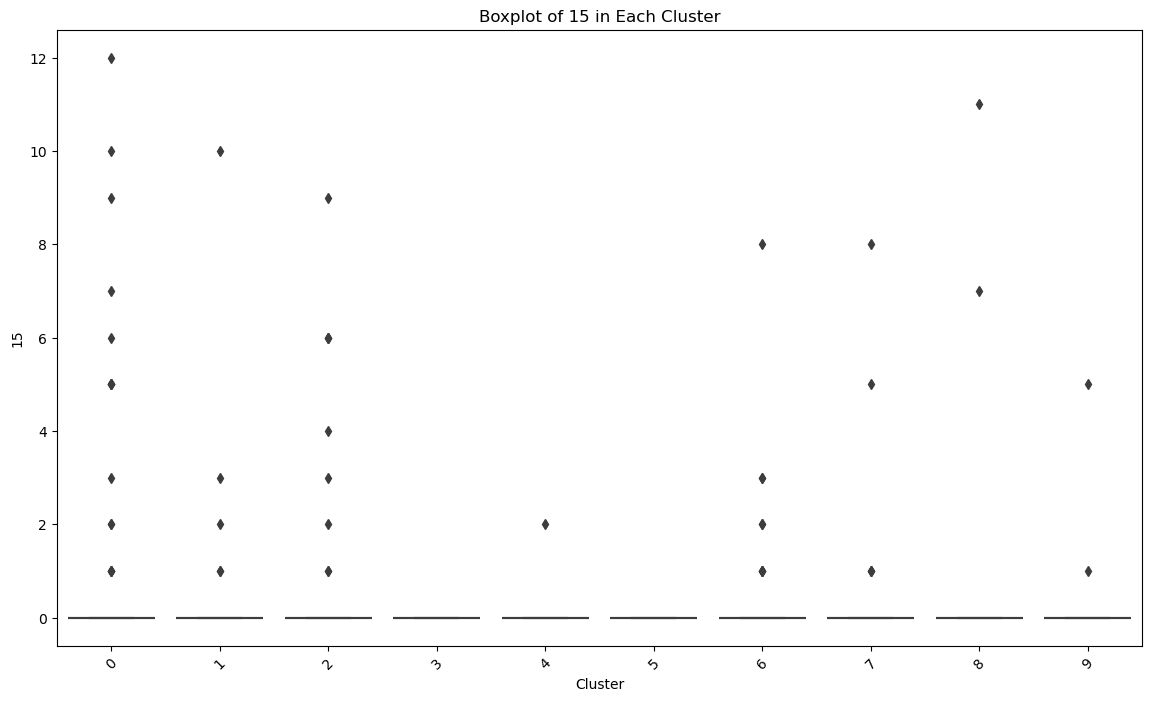

Summary statistics for 15:
         count      mean       std  min  25%  50%  75%   max
Cluster                                                     
0        228.0  0.328947  1.493494  0.0  0.0  0.0  0.0  12.0
1        218.0  0.077982  0.723771  0.0  0.0  0.0  0.0  10.0
2        117.0  0.324786  1.337967  0.0  0.0  0.0  0.0   9.0
3        268.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0
4        197.0  0.010152  0.142494  0.0  0.0  0.0  0.0   2.0
5        171.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0
6        188.0  0.117021  0.699219  0.0  0.0  0.0  0.0   8.0
7        134.0  0.119403  0.823022  0.0  0.0  0.0  0.0   8.0
8        160.0  0.112500  1.027836  0.0  0.0  0.0  0.0  11.0
9        116.0  0.051724  0.472640  0.0  0.0  0.0  0.0   5.0




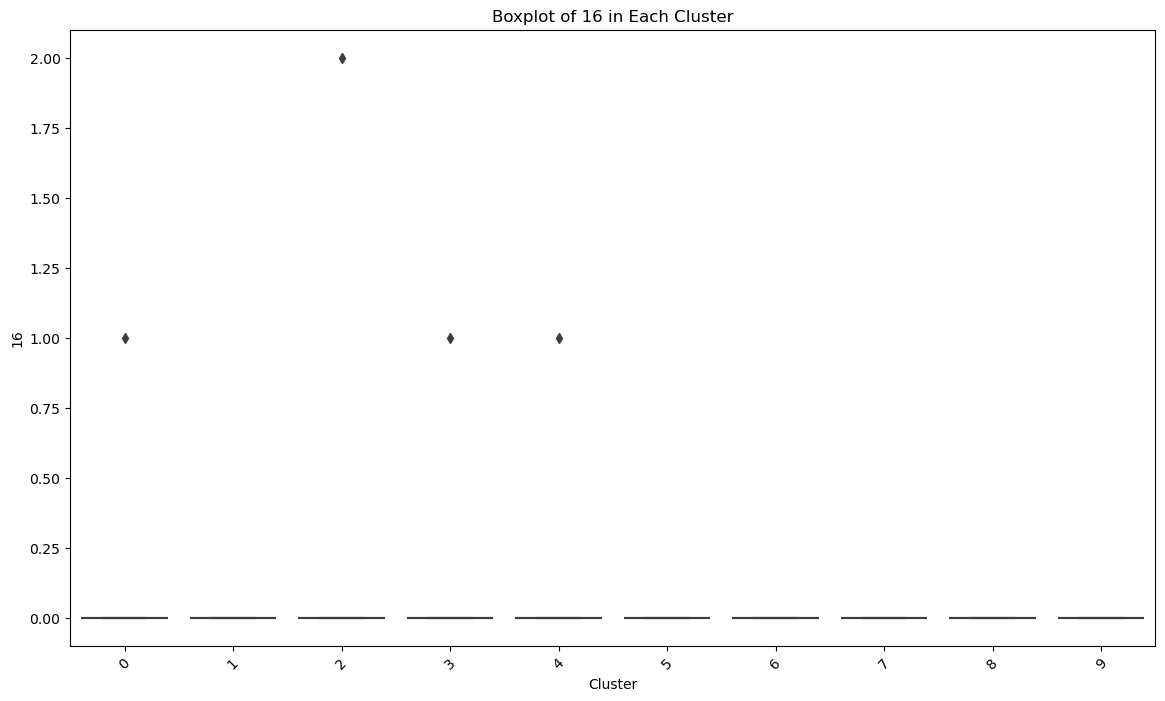

Summary statistics for 16:
         count      mean       std  min  25%  50%  75%  max
Cluster                                                    
0        228.0  0.004386  0.066227  0.0  0.0  0.0  0.0  1.0
1        218.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
2        117.0  0.017094  0.184900  0.0  0.0  0.0  0.0  2.0
3        268.0  0.003731  0.061085  0.0  0.0  0.0  0.0  1.0
4        197.0  0.005076  0.071247  0.0  0.0  0.0  0.0  1.0
5        171.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
6        188.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
7        134.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
8        160.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
9        116.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0




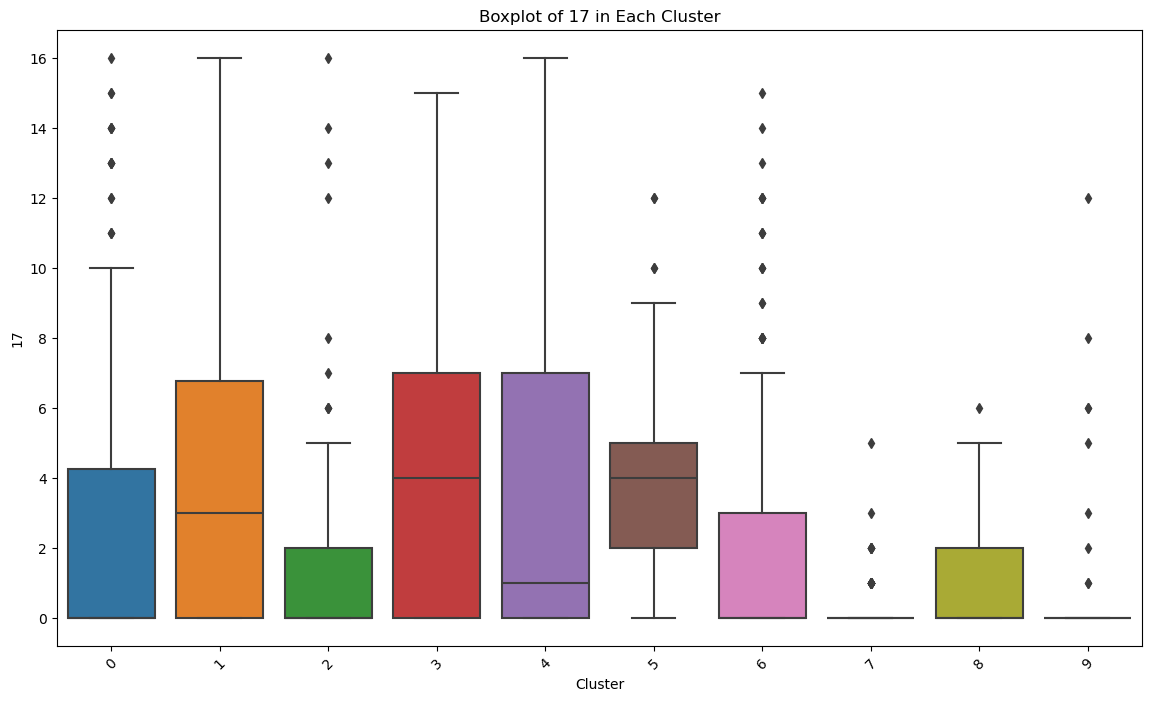

Summary statistics for 17:
         count      mean       std  min  25%  50%   75%   max
Cluster                                                      
0        228.0  2.771930  4.075359  0.0  0.0  0.0  4.25  16.0
1        218.0  3.839450  3.874399  0.0  0.0  3.0  6.75  16.0
2        117.0  1.401709  2.888920  0.0  0.0  0.0  2.00  16.0
3        268.0  3.973881  3.801644  0.0  0.0  4.0  7.00  15.0
4        197.0  3.482234  4.351394  0.0  0.0  1.0  7.00  16.0
5        171.0  3.842105  2.594946  0.0  2.0  4.0  5.00  12.0
6        188.0  2.127660  3.569730  0.0  0.0  0.0  3.00  15.0
7        134.0  0.283582  0.700289  0.0  0.0  0.0  0.00   5.0
8        160.0  0.950000  1.390896  0.0  0.0  0.0  2.00   6.0
9        116.0  0.379310  1.624032  0.0  0.0  0.0  0.00  12.0




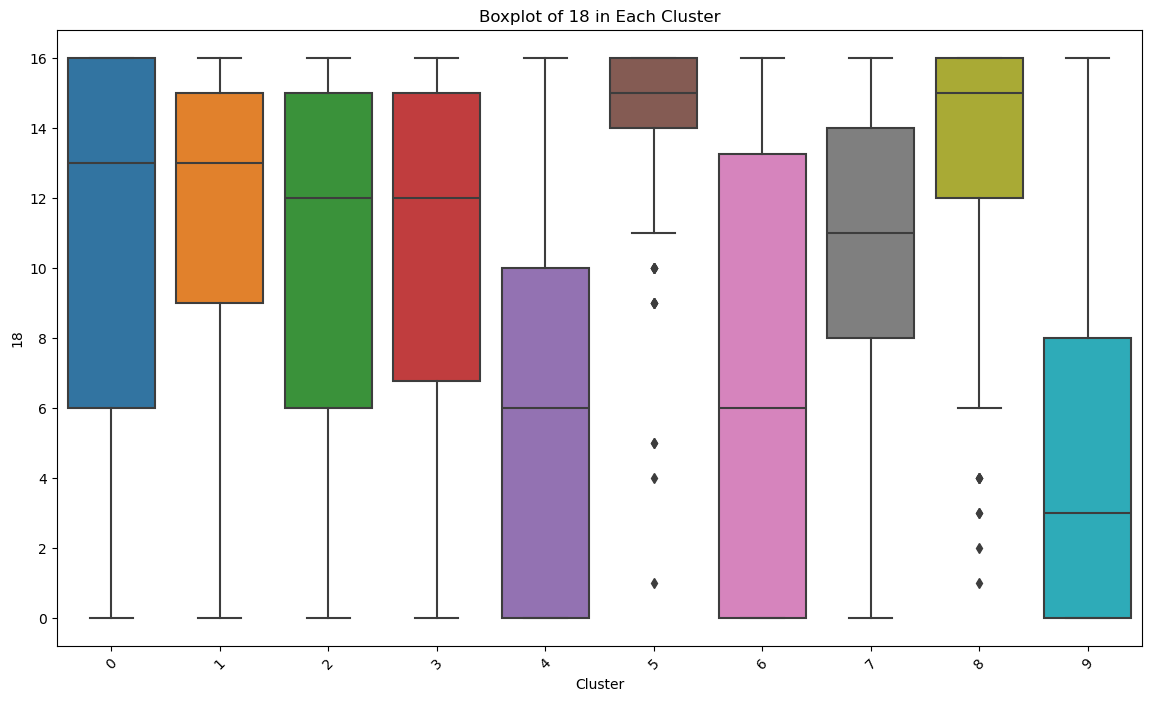

Summary statistics for 18:
         count       mean       std  min    25%   50%    75%   max
Cluster                                                           
0        228.0  10.526316  5.600048  0.0   6.00  13.0  16.00  16.0
1        218.0  11.591743  4.777378  0.0   9.00  13.0  15.00  16.0
2        117.0  10.555556  5.156924  0.0   6.00  12.0  15.00  16.0
3        268.0  10.018657  5.290408  0.0   6.75  12.0  15.00  16.0
4        197.0   5.949239  5.292222  0.0   0.00   6.0  10.00  16.0
5        171.0  14.345029  2.516584  1.0  14.00  15.0  16.00  16.0
6        188.0   6.776596  6.339173  0.0   0.00   6.0  13.25  16.0
7        134.0  10.492537  4.192270  0.0   8.00  11.0  14.00  16.0
8        160.0  13.331250  3.380897  1.0  12.00  15.0  16.00  16.0
9        116.0   4.405172  4.943117  0.0   0.00   3.0   8.00  16.0




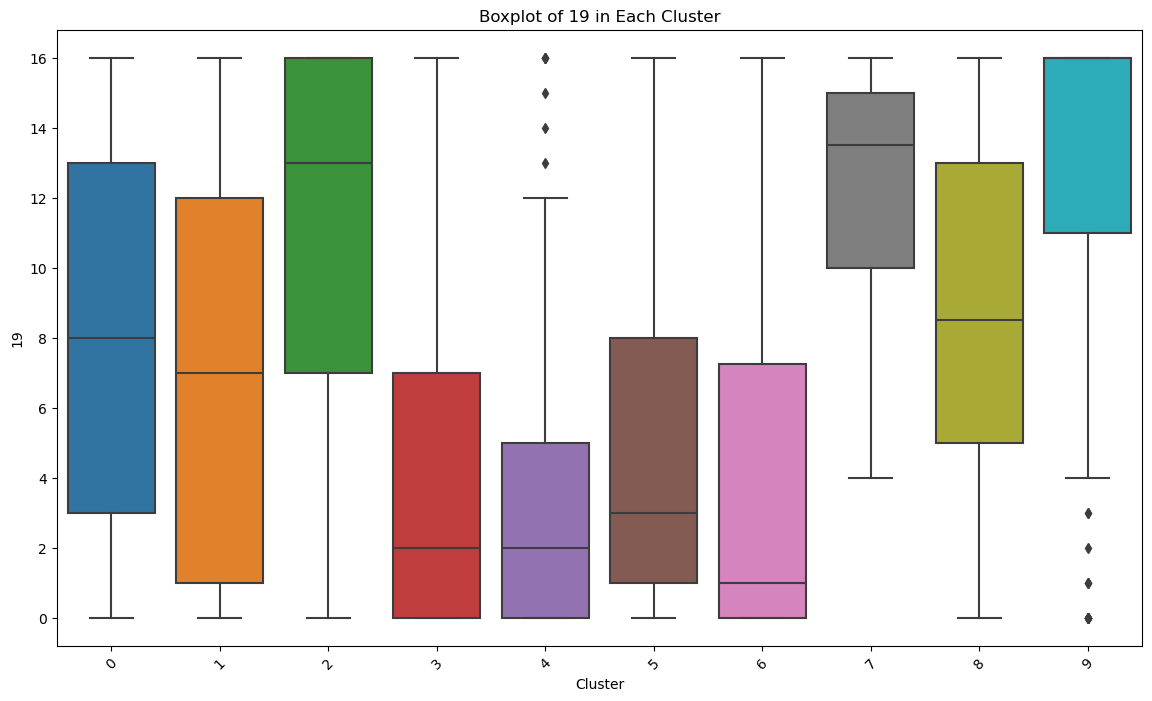

Summary statistics for 19:
         count       mean       std  min   25%   50%    75%   max
Cluster                                                          
0        228.0   7.986842  5.583551  0.0   3.0   8.0  13.00  16.0
1        218.0   7.201835  5.767028  0.0   1.0   7.0  12.00  16.0
2        117.0  11.350427  4.855349  0.0   7.0  13.0  16.00  16.0
3        268.0   4.264925  4.779870  0.0   0.0   2.0   7.00  16.0
4        197.0   3.187817  3.738964  0.0   0.0   2.0   5.00  16.0
5        171.0   4.742690  4.507953  0.0   1.0   3.0   8.00  16.0
6        188.0   4.127660  5.209481  0.0   0.0   1.0   7.25  16.0
7        134.0  12.574627  3.095903  4.0  10.0  13.5  15.00  16.0
8        160.0   8.600000  4.747989  0.0   5.0   8.5  13.00  16.0
9        116.0  12.310345  5.622028  0.0  11.0  16.0  16.00  16.0




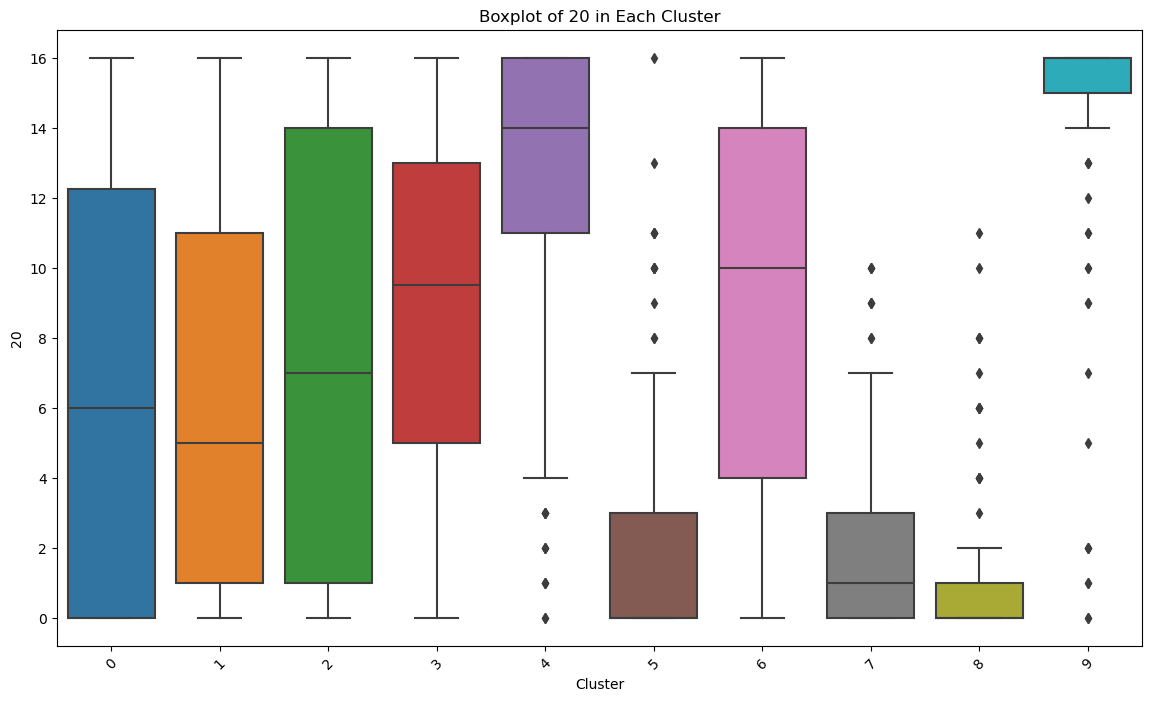

Summary statistics for 20:
         count       mean       std  min   25%   50%    75%   max
Cluster                                                          
0        228.0   6.557018  6.217872  0.0   0.0   6.0  12.25  16.0
1        218.0   6.573394  5.684211  0.0   1.0   5.0  11.00  16.0
2        117.0   7.760684  6.176498  0.0   1.0   7.0  14.00  16.0
3        268.0   8.858209  5.088215  0.0   5.0   9.5  13.00  16.0
4        197.0  12.395939  4.170546  0.0  11.0  14.0  16.00  16.0
5        171.0   1.964912  3.115228  0.0   0.0   0.0   3.00  16.0
6        188.0   8.962766  5.463902  0.0   4.0  10.0  14.00  16.0
7        134.0   2.037313  2.593824  0.0   0.0   1.0   3.00  10.0
8        160.0   0.881250  2.007445  0.0   0.0   0.0   1.00  11.0
9        116.0  14.379310  3.882301  0.0  15.0  16.0  16.00  16.0




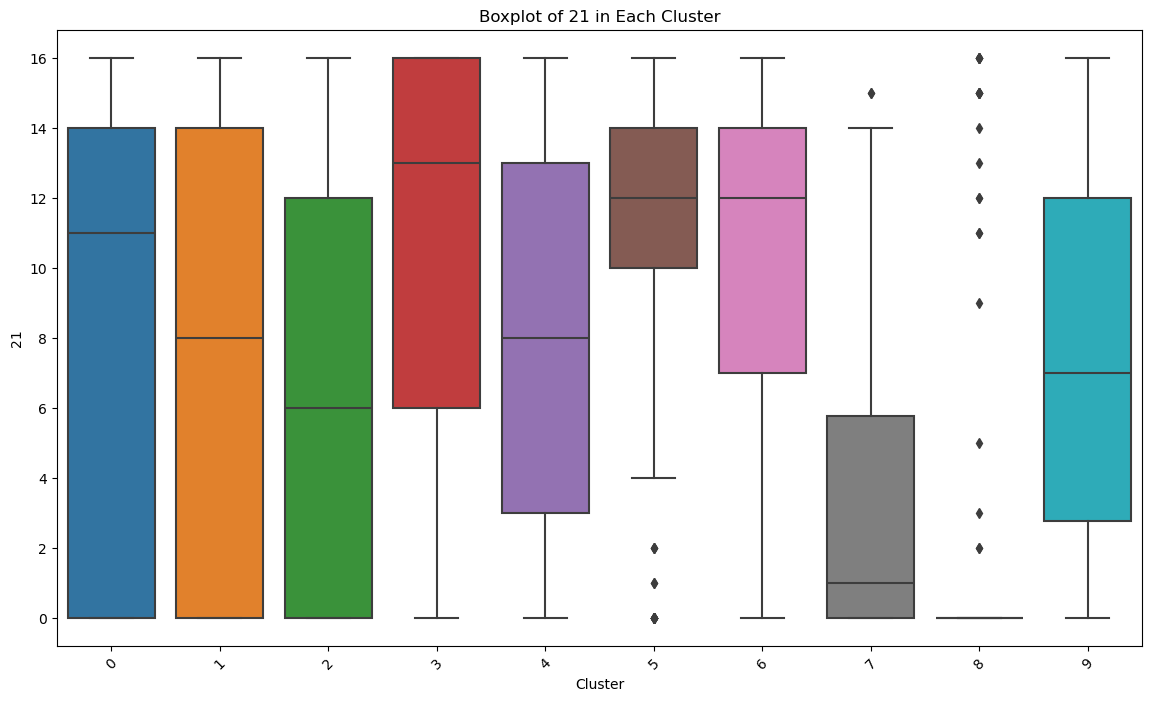

Summary statistics for 21:
         count       mean       std  min    25%   50%    75%   max
Cluster                                                           
0        228.0   8.530702  6.316465  0.0   0.00  11.0  14.00  16.0
1        218.0   7.399083  6.596424  0.0   0.00   8.0  14.00  16.0
2        117.0   6.692308  5.796047  0.0   0.00   6.0  12.00  16.0
3        268.0  10.481343  5.904010  0.0   6.00  13.0  16.00  16.0
4        197.0   8.055838  5.379660  0.0   3.00   8.0  13.00  16.0
5        171.0  11.269006  4.500736  0.0  10.00  12.0  14.00  16.0
6        188.0   9.882979  5.326468  0.0   7.00  12.0  14.00  16.0
7        134.0   3.067164  4.039649  0.0   0.00   1.0   5.75  15.0
8        160.0   1.556250  4.369343  0.0   0.00   0.0   0.00  16.0
9        116.0   7.293103  5.329193  0.0   2.75   7.0  12.00  16.0




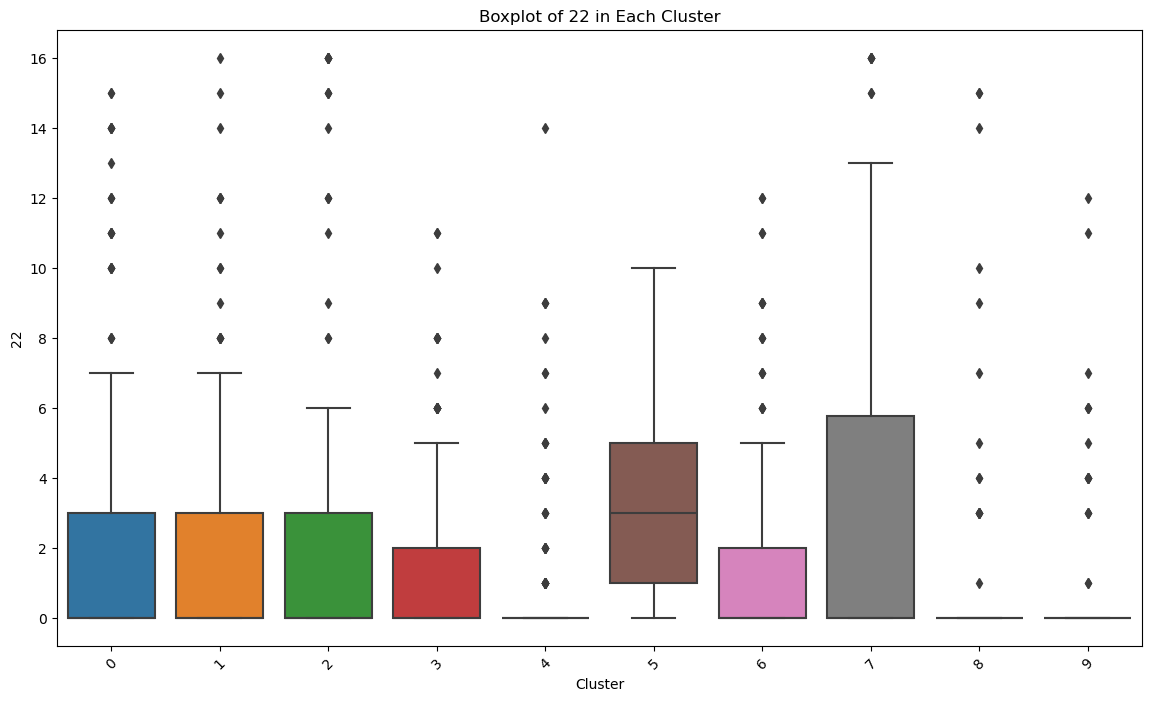

Summary statistics for 22:
         count      mean       std  min  25%  50%   75%   max
Cluster                                                      
0        228.0  2.276316  3.777742  0.0  0.0  0.0  3.00  15.0
1        218.0  1.876147  3.241192  0.0  0.0  0.0  3.00  16.0
2        117.0  2.615385  4.984193  0.0  0.0  0.0  3.00  16.0
3        268.0  1.384328  2.249773  0.0  0.0  0.0  2.00  11.0
4        197.0  0.771574  2.023738  0.0  0.0  0.0  0.00  14.0
5        171.0  3.385965  2.729497  0.0  1.0  3.0  5.00  10.0
6        188.0  1.425532  2.662833  0.0  0.0  0.0  2.00  12.0
7        134.0  3.186567  4.803144  0.0  0.0  0.0  5.75  16.0
8        160.0  0.618750  2.402493  0.0  0.0  0.0  0.00  15.0
9        116.0  0.724138  2.075054  0.0  0.0  0.0  0.00  12.0




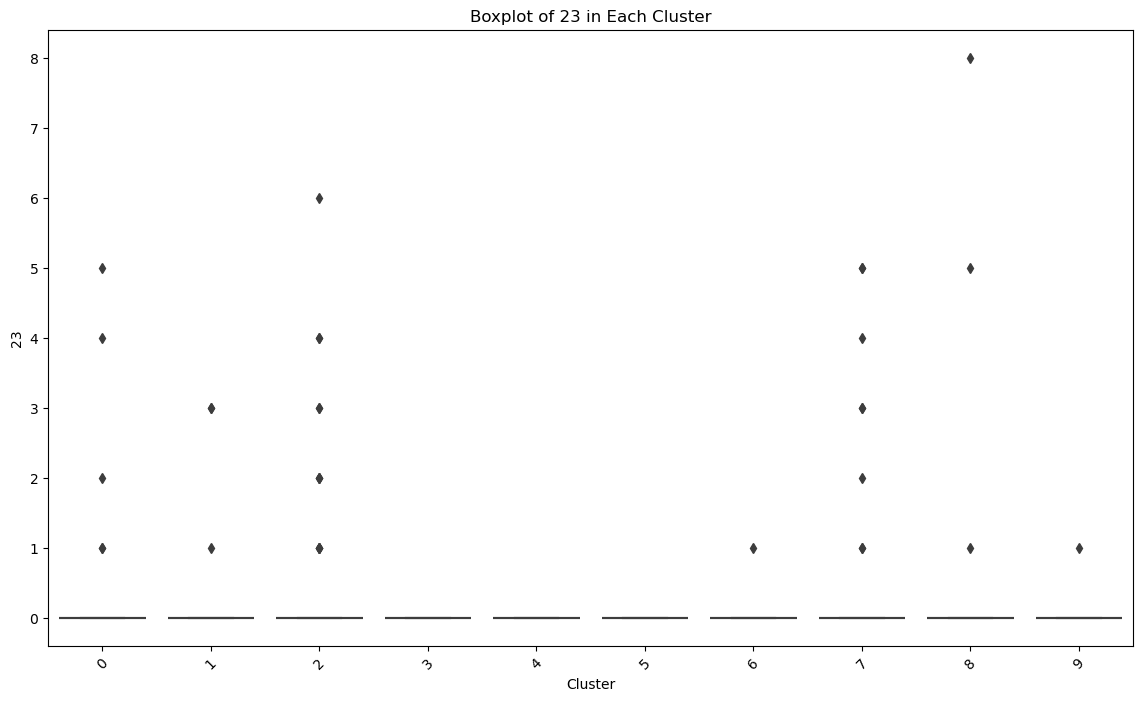

Summary statistics for 23:
         count      mean       std  min  25%  50%  75%  max
Cluster                                                    
0        228.0  0.057018  0.451423  0.0  0.0  0.0  0.0  5.0
1        218.0  0.032110  0.294146  0.0  0.0  0.0  0.0  3.0
2        117.0  0.256410  0.901664  0.0  0.0  0.0  0.0  6.0
3        268.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
4        197.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
5        171.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
6        188.0  0.005319  0.072932  0.0  0.0  0.0  0.0  1.0
7        134.0  0.179104  0.802728  0.0  0.0  0.0  0.0  5.0
8        160.0  0.087500  0.747217  0.0  0.0  0.0  0.0  8.0
9        116.0  0.008621  0.092848  0.0  0.0  0.0  0.0  1.0




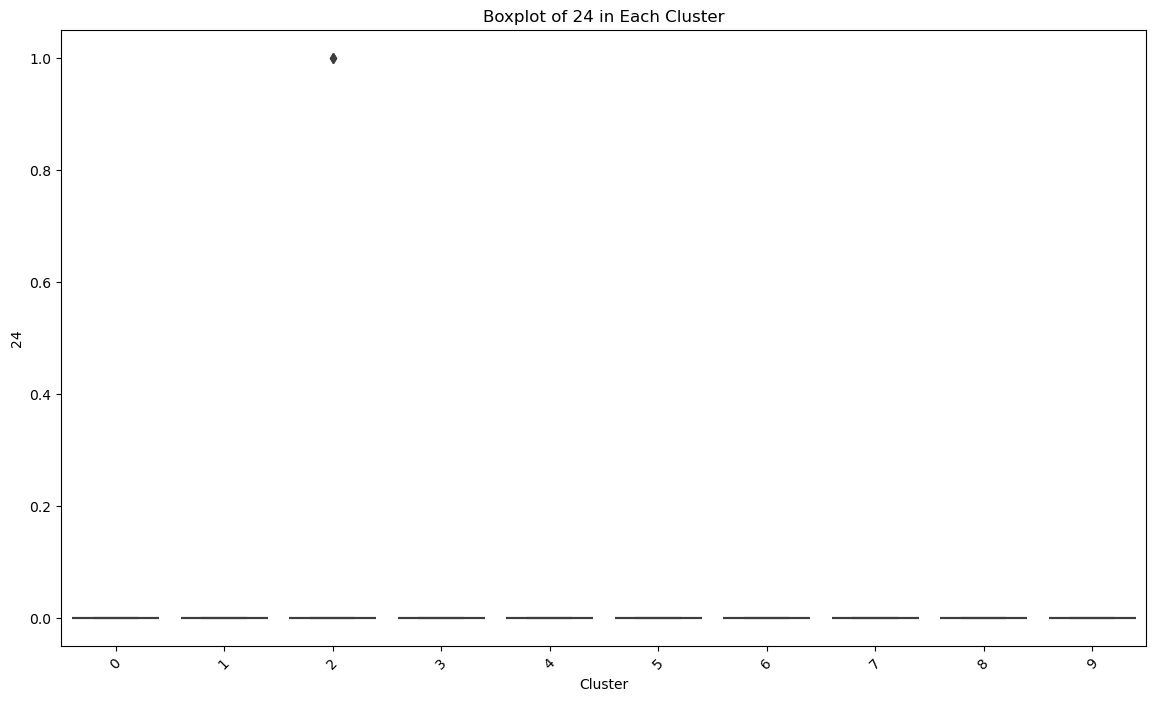

Summary statistics for 24:
         count      mean       std  min  25%  50%  75%  max
Cluster                                                    
0        228.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
1        218.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
2        117.0  0.017094  0.130179  0.0  0.0  0.0  0.0  1.0
3        268.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
4        197.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
5        171.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
6        188.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
7        134.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
8        160.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
9        116.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0




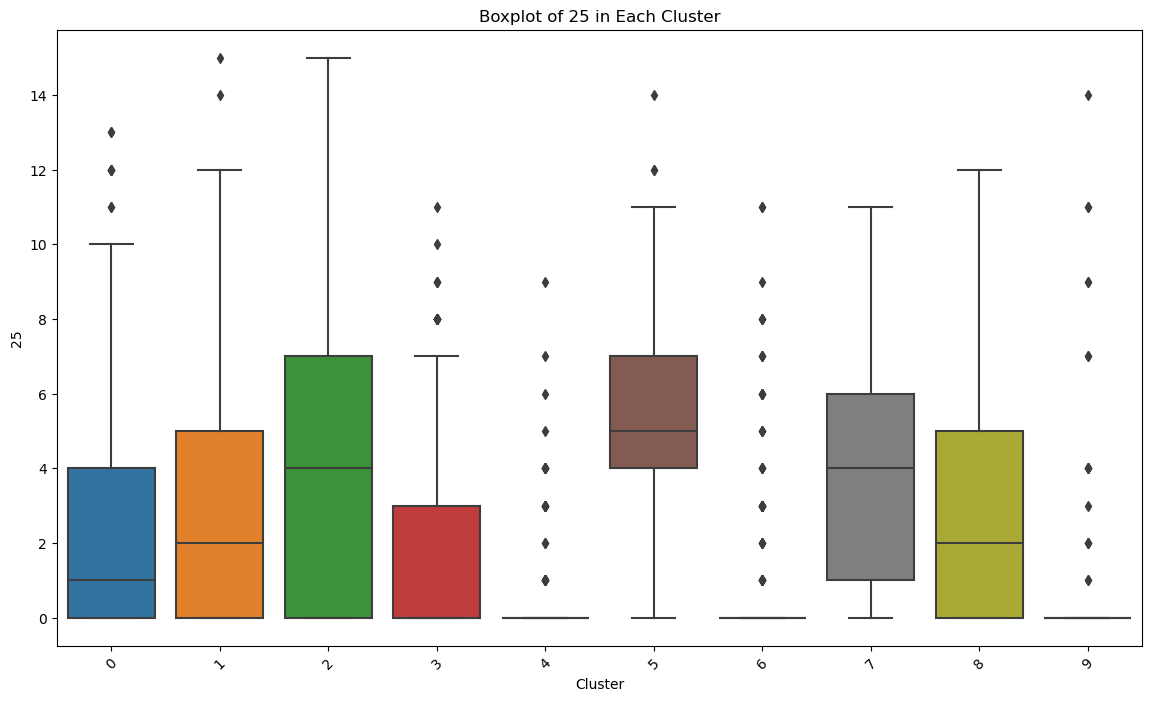

Summary statistics for 25:
         count      mean       std  min  25%  50%  75%   max
Cluster                                                     
0        228.0  2.539474  3.421006  0.0  0.0  1.0  4.0  13.0
1        218.0  2.949541  3.459073  0.0  0.0  2.0  5.0  15.0
2        117.0  4.196581  3.821986  0.0  0.0  4.0  7.0  15.0
3        268.0  1.746269  2.628528  0.0  0.0  0.0  3.0  11.0
4        197.0  0.472081  1.334580  0.0  0.0  0.0  0.0   9.0
5        171.0  5.543860  2.401496  0.0  4.0  5.0  7.0  14.0
6        188.0  0.957447  2.188521  0.0  0.0  0.0  0.0  11.0
7        134.0  3.619403  2.776905  0.0  1.0  4.0  6.0  11.0
8        160.0  2.850000  2.680467  0.0  0.0  2.0  5.0  12.0
9        116.0  0.818966  2.479829  0.0  0.0  0.0  0.0  14.0




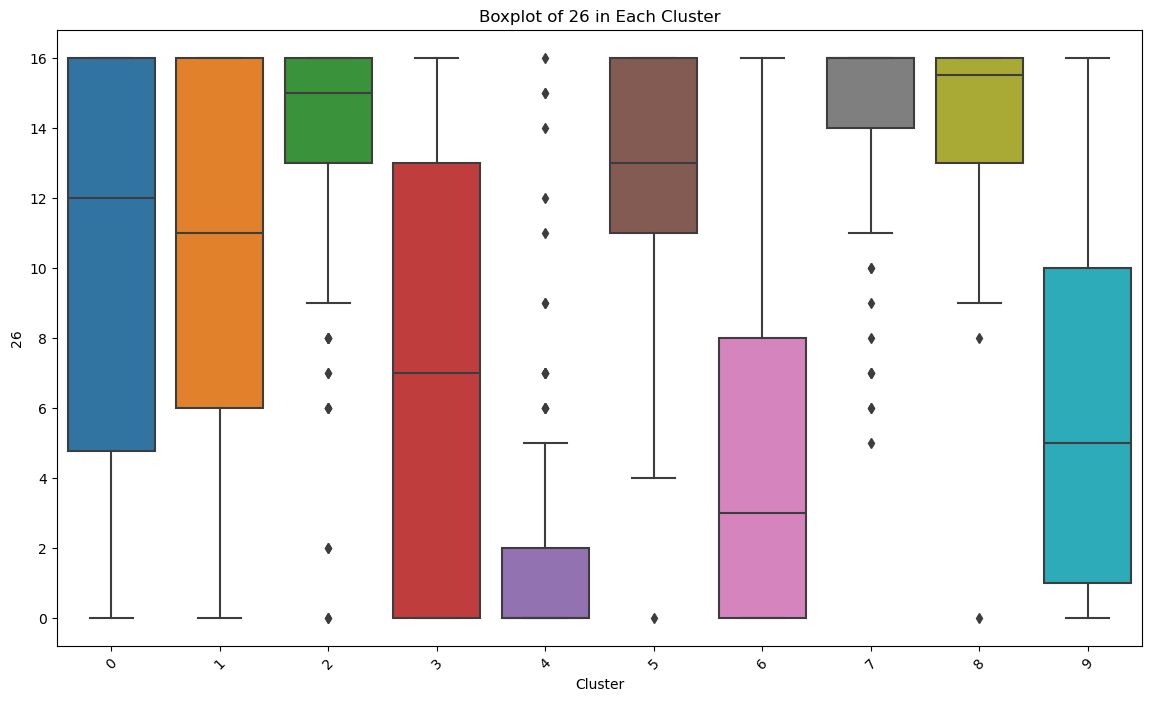

Summary statistics for 26:
         count       mean       std  min    25%   50%   75%   max
Cluster                                                          
0        228.0   9.921053  6.010482  0.0   4.75  12.0  16.0  16.0
1        218.0  10.316514  5.333643  0.0   6.00  11.0  16.0  16.0
2        117.0  13.452991  3.594766  0.0  13.00  15.0  16.0  16.0
3        268.0   7.264925  5.985685  0.0   0.00   7.0  13.0  16.0
4        197.0   1.431472  2.952278  0.0   0.00   0.0   2.0  16.0
5        171.0  12.608187  3.256440  0.0  11.00  13.0  16.0  16.0
6        188.0   4.941489  5.289661  0.0   0.00   3.0   8.0  16.0
7        134.0  14.455224  2.432906  5.0  14.00  16.0  16.0  16.0
8        160.0  14.437500  2.211142  0.0  13.00  15.5  16.0  16.0
9        116.0   5.956897  5.133678  0.0   1.00   5.0  10.0  16.0




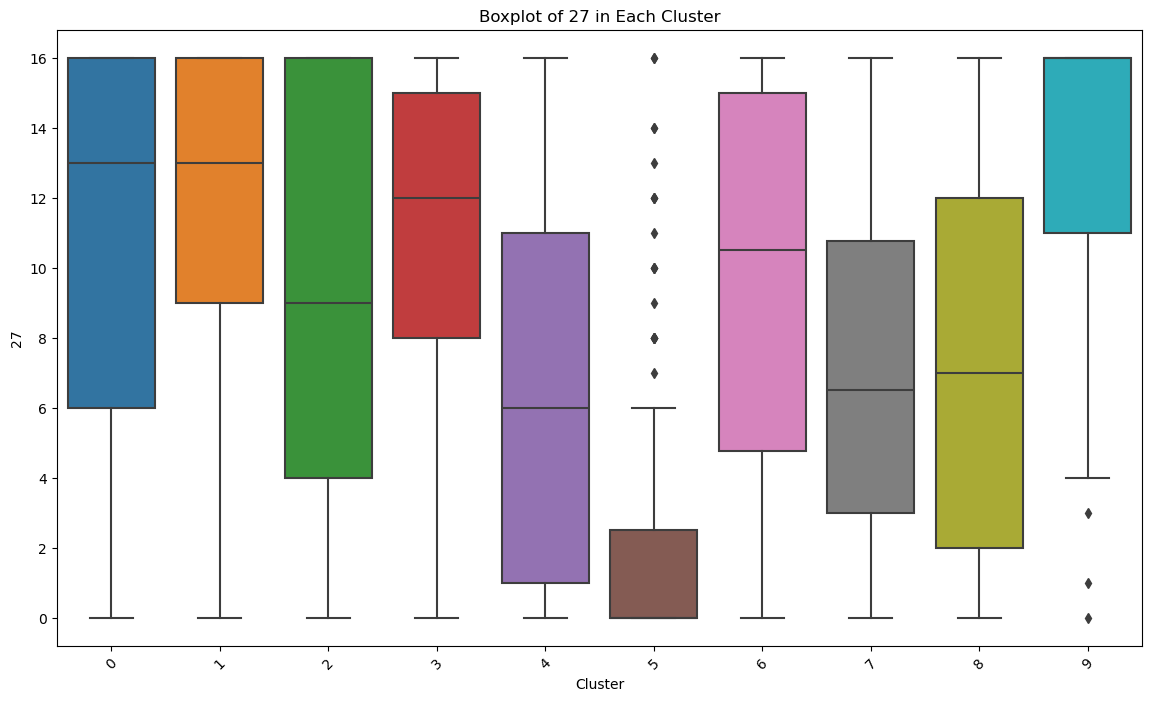

Summary statistics for 27:
         count       mean       std  min    25%   50%    75%   max
Cluster                                                           
0        228.0  10.618421  5.836918  0.0   6.00  13.0  16.00  16.0
1        218.0  11.431193  5.162550  0.0   9.00  13.0  16.00  16.0
2        117.0   9.290598  5.842856  0.0   4.00   9.0  16.00  16.0
3        268.0  10.541045  4.842287  0.0   8.00  12.0  15.00  16.0
4        197.0   6.431472  5.269437  0.0   1.00   6.0  11.00  16.0
5        171.0   1.964912  3.615156  0.0   0.00   0.0   2.50  16.0
6        188.0   9.670213  5.519801  0.0   4.75  10.5  15.00  16.0
7        134.0   6.850746  4.608765  0.0   3.00   6.5  10.75  16.0
8        160.0   7.037500  5.291369  0.0   2.00   7.0  12.00  16.0
9        116.0  13.465517  4.076296  0.0  11.00  16.0  16.00  16.0




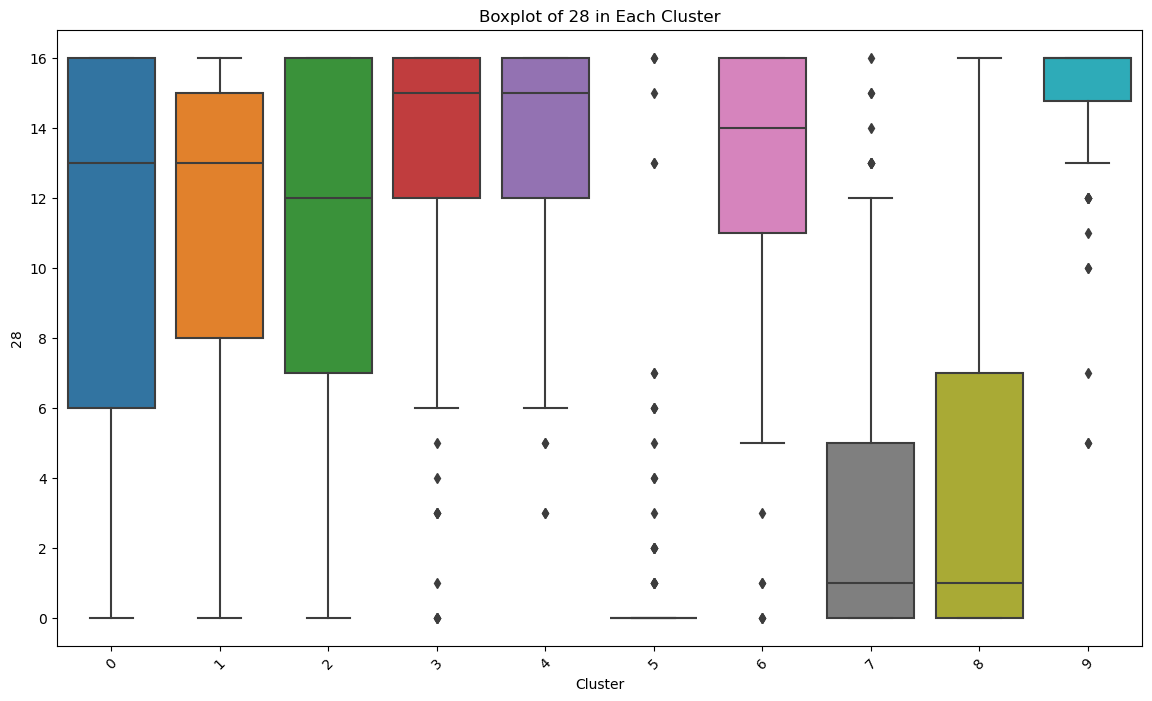

Summary statistics for 28:
         count       mean       std  min    25%   50%   75%   max
Cluster                                                          
0        228.0  10.504386  5.635396  0.0   6.00  13.0  16.0  16.0
1        218.0  11.380734  4.625814  0.0   8.00  13.0  15.0  16.0
2        117.0  10.888889  4.935407  0.0   7.00  12.0  16.0  16.0
3        268.0  13.354478  3.501377  0.0  12.00  15.0  16.0  16.0
4        197.0  13.939086  2.724856  3.0  12.00  15.0  16.0  16.0
5        171.0   0.795322  2.726597  0.0   0.00   0.0   0.0  16.0
6        188.0  13.106383  3.616563  0.0  11.00  14.0  16.0  16.0
7        134.0   3.186567  4.320206  0.0   0.00   1.0   5.0  16.0
8        160.0   3.800000  4.874268  0.0   0.00   1.0   7.0  16.0
9        116.0  14.905172  2.097528  5.0  14.75  16.0  16.0  16.0




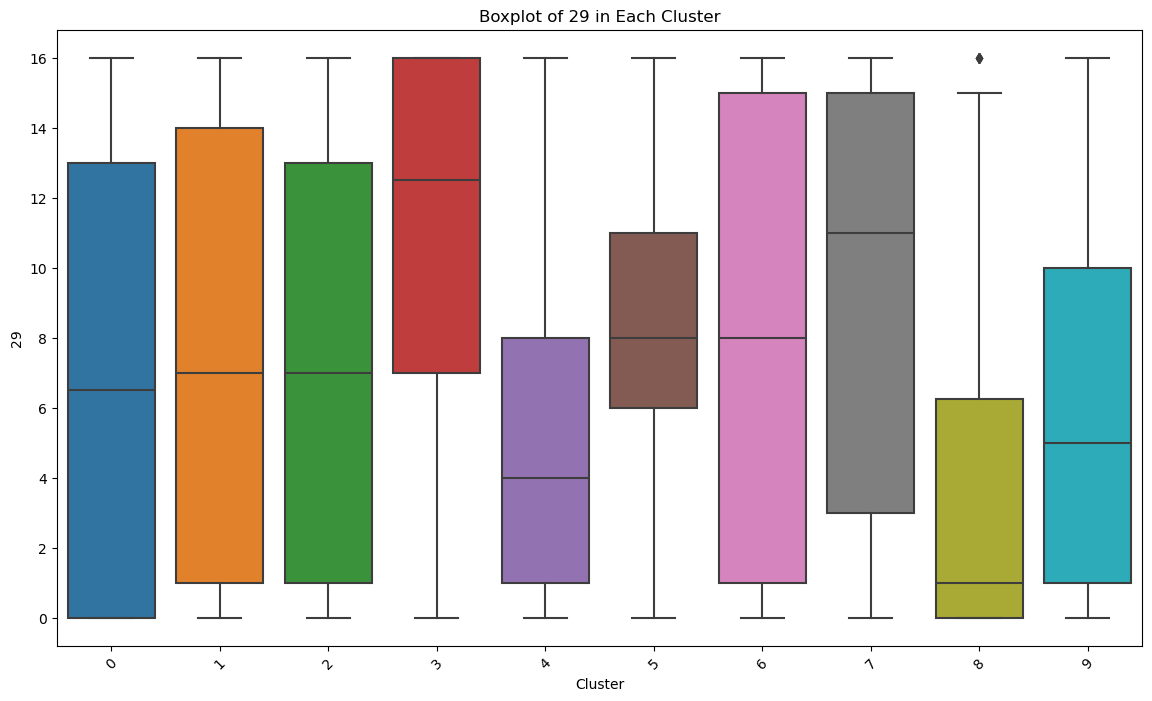

Summary statistics for 29:
         count       mean       std  min  25%   50%    75%   max
Cluster                                                         
0        228.0   7.035088  6.243841  0.0  0.0   6.5  13.00  16.0
1        218.0   7.481651  6.244048  0.0  1.0   7.0  14.00  16.0
2        117.0   7.230769  6.105939  0.0  1.0   7.0  13.00  16.0
3        268.0  11.194030  4.743579  0.0  7.0  12.5  16.00  16.0
4        197.0   5.000000  4.703451  0.0  1.0   4.0   8.00  16.0
5        171.0   8.625731  3.754250  0.0  6.0   8.0  11.00  16.0
6        188.0   8.138298  6.254156  0.0  1.0   8.0  15.00  16.0
7        134.0   9.126866  6.077719  0.0  3.0  11.0  15.00  16.0
8        160.0   3.575000  4.848069  0.0  0.0   1.0   6.25  16.0
9        116.0   6.068966  5.362874  0.0  1.0   5.0  10.00  16.0




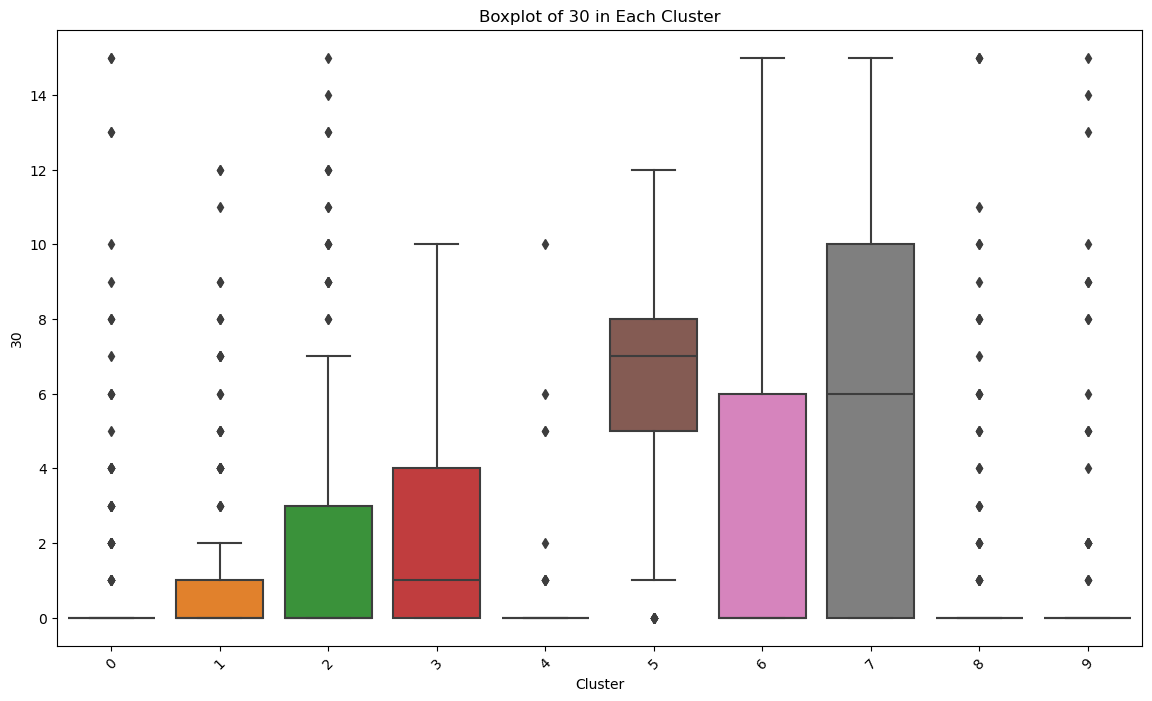

Summary statistics for 30:
         count      mean       std  min  25%  50%   75%   max
Cluster                                                      
0        228.0  0.986842  2.496659  0.0  0.0  0.0   0.0  15.0
1        218.0  1.045872  2.343283  0.0  0.0  0.0   1.0  12.0
2        117.0  2.598291  4.129498  0.0  0.0  0.0   3.0  15.0
3        268.0  2.309701  2.901178  0.0  0.0  1.0   4.0  10.0
4        197.0  0.172589  0.984917  0.0  0.0  0.0   0.0  10.0
5        171.0  6.146199  2.658333  0.0  5.0  7.0   8.0  12.0
6        188.0  3.207447  4.560297  0.0  0.0  0.0   6.0  15.0
7        134.0  5.768657  5.176457  0.0  0.0  6.0  10.0  15.0
8        160.0  1.181250  2.967056  0.0  0.0  0.0   0.0  15.0
9        116.0  1.198276  3.030913  0.0  0.0  0.0   0.0  15.0




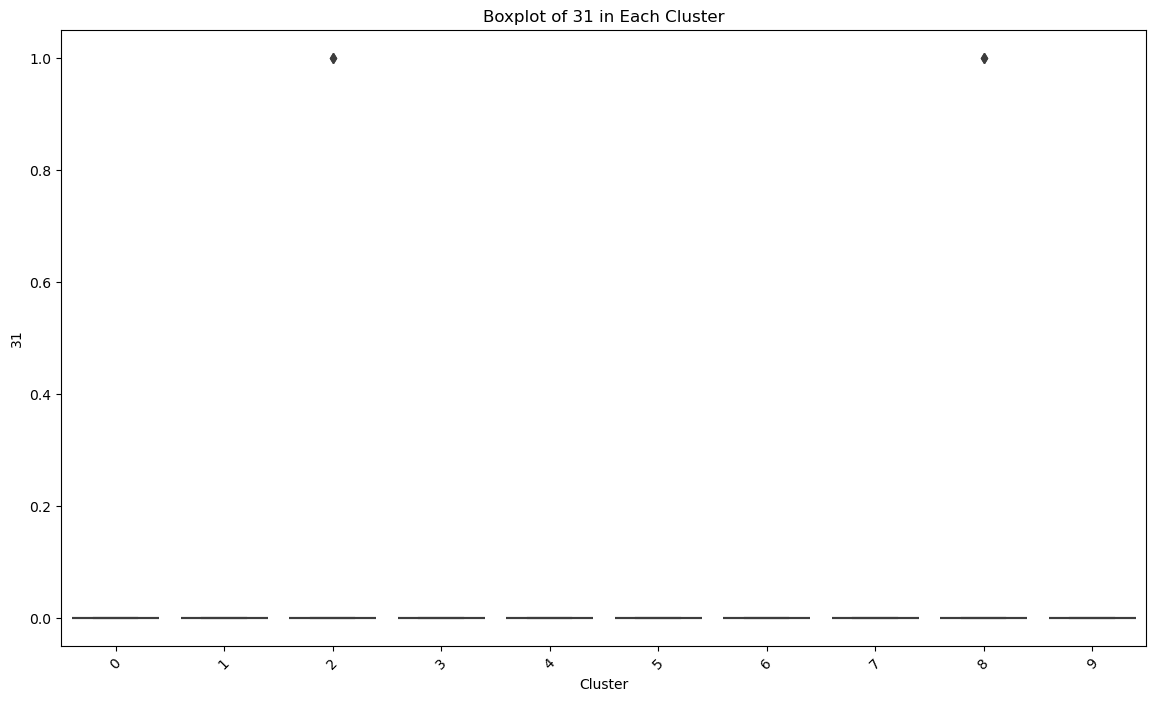

Summary statistics for 31:
         count      mean       std  min  25%  50%  75%  max
Cluster                                                    
0        228.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
1        218.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
2        117.0  0.017094  0.130179  0.0  0.0  0.0  0.0  1.0
3        268.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
4        197.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
5        171.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
6        188.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
7        134.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
8        160.0  0.012500  0.111451  0.0  0.0  0.0  0.0  1.0
9        116.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0




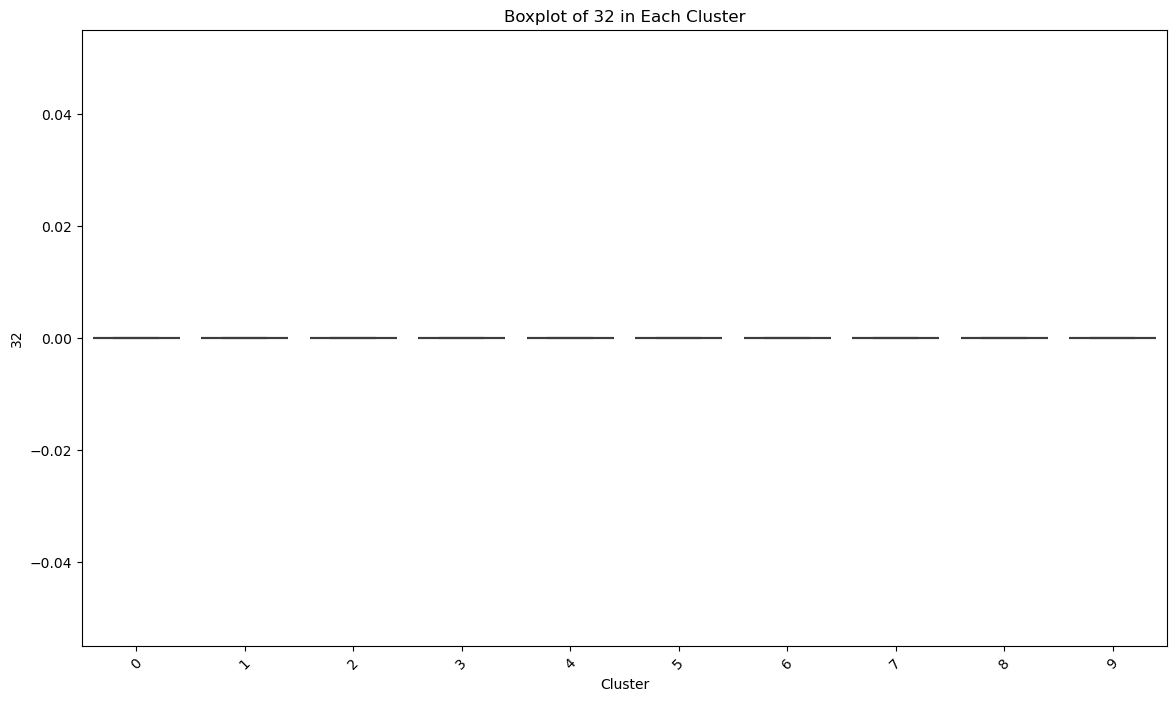

Summary statistics for 32:
         count  mean  std  min  25%  50%  75%  max
Cluster                                           
0        228.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1        218.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
2        117.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
3        268.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
4        197.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
5        171.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
6        188.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
7        134.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
8        160.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
9        116.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0




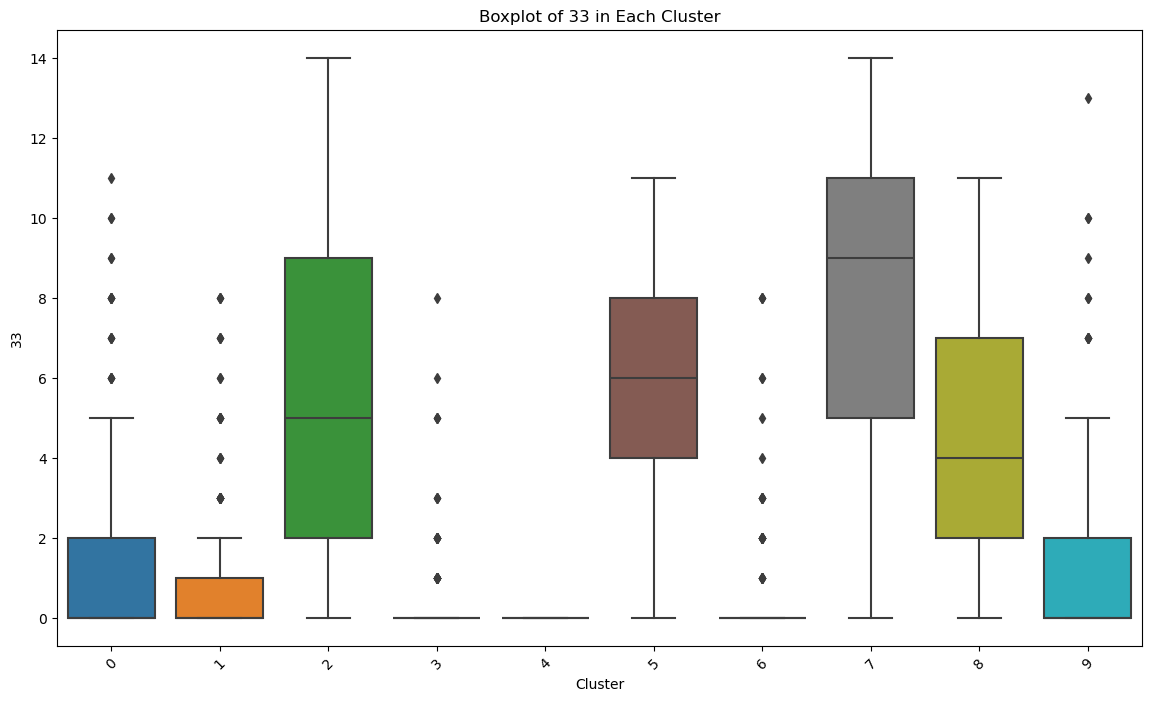

Summary statistics for 33:
         count      mean       std  min  25%  50%   75%   max
Cluster                                                      
0        228.0  1.368421  2.390374  0.0  0.0  0.0   2.0  11.0
1        218.0  0.802752  1.707288  0.0  0.0  0.0   1.0   8.0
2        117.0  5.461538  4.105376  0.0  2.0  5.0   9.0  14.0
3        268.0  0.257463  0.934633  0.0  0.0  0.0   0.0   8.0
4        197.0  0.000000  0.000000  0.0  0.0  0.0   0.0   0.0
5        171.0  5.847953  2.264881  0.0  4.0  6.0   8.0  11.0
6        188.0  0.489362  1.397053  0.0  0.0  0.0   0.0   8.0
7        134.0  7.970149  4.363106  0.0  5.0  9.0  11.0  14.0
8        160.0  4.300000  2.760458  0.0  2.0  4.0   7.0  11.0
9        116.0  1.387931  2.685781  0.0  0.0  0.0   2.0  13.0




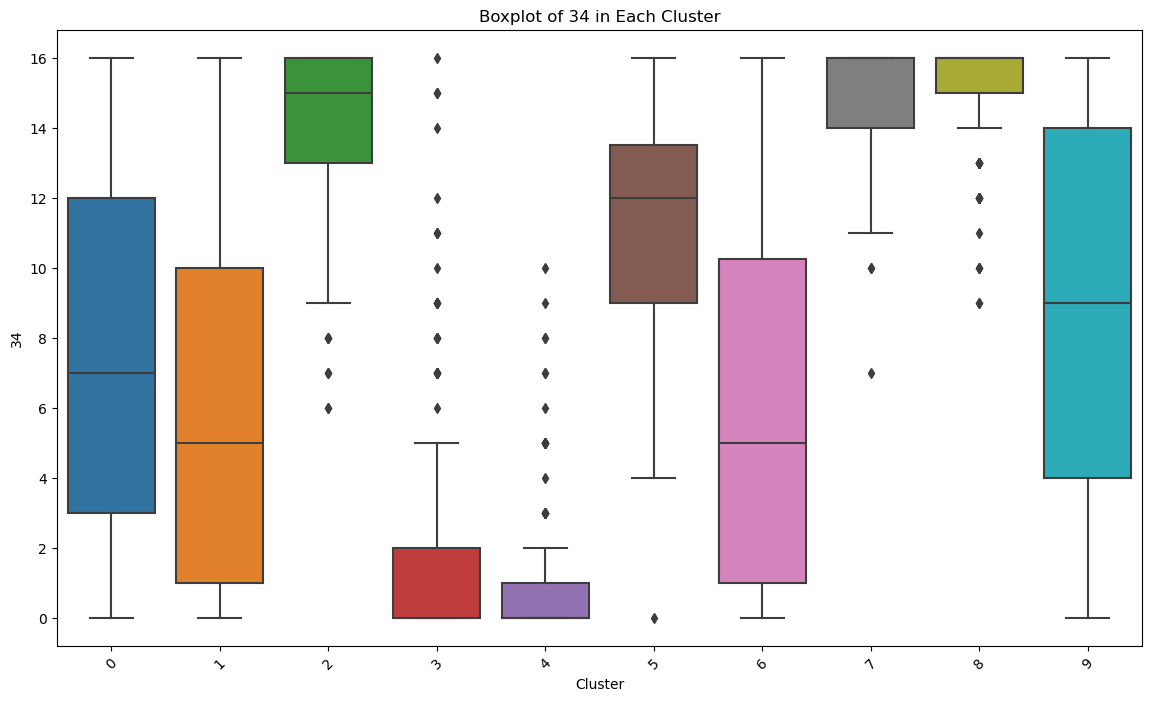

Summary statistics for 34:
         count       mean       std  min   25%   50%    75%   max
Cluster                                                          
0        228.0   7.785088  5.392305  0.0   3.0   7.0  12.00  16.0
1        218.0   5.770642  5.240982  0.0   1.0   5.0  10.00  16.0
2        117.0  13.931624  2.759705  6.0  13.0  15.0  16.00  16.0
3        268.0   1.649254  3.152212  0.0   0.0   0.0   2.00  16.0
4        197.0   0.766497  1.794633  0.0   0.0   0.0   1.00  10.0
5        171.0  11.263158  3.233244  0.0   9.0  12.0  13.50  16.0
6        188.0   5.994681  5.415858  0.0   1.0   5.0  10.25  16.0
7        134.0  14.962687  1.577124  7.0  14.0  16.0  16.00  16.0
8        160.0  15.200000  1.524640  9.0  15.0  16.0  16.00  16.0
9        116.0   8.896552  5.566014  0.0   4.0   9.0  14.00  16.0




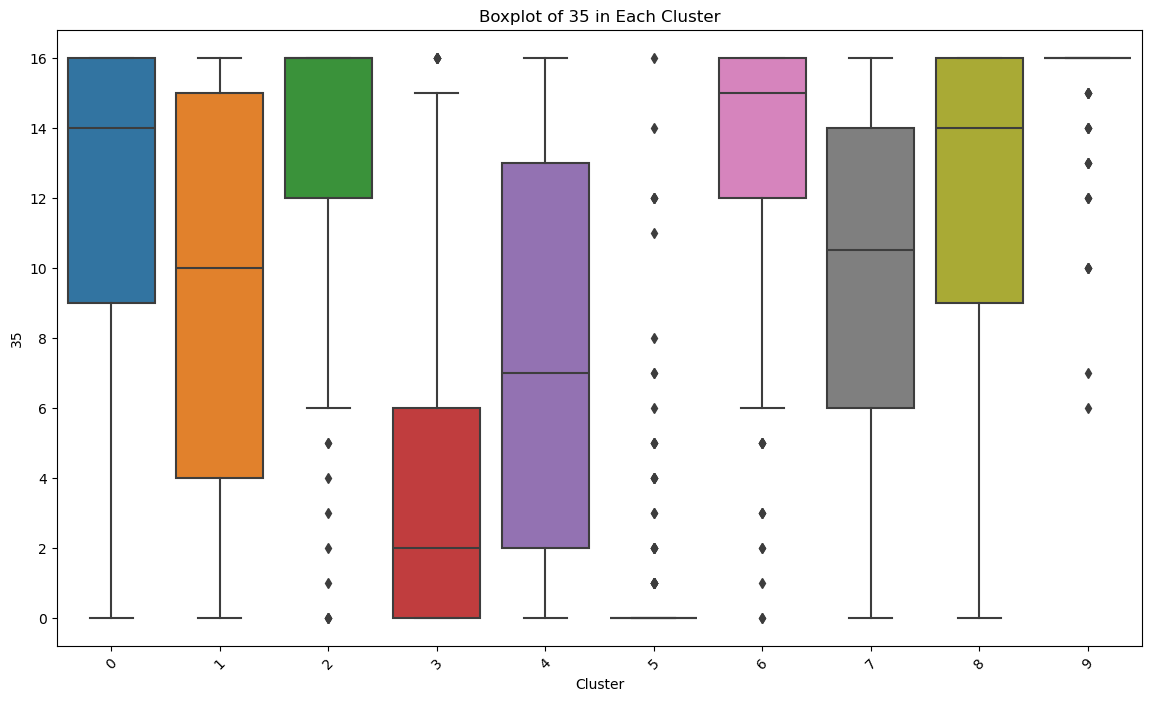

Summary statistics for 35:
         count       mean       std  min   25%   50%   75%   max
Cluster                                                         
0        228.0  12.070175  4.656896  0.0   9.0  14.0  16.0  16.0
1        218.0   9.247706  5.824082  0.0   4.0  10.0  15.0  16.0
2        117.0  13.094017  4.319129  0.0  12.0  16.0  16.0  16.0
3        268.0   3.444030  4.298837  0.0   0.0   2.0   6.0  16.0
4        197.0   7.487310  5.644764  0.0   2.0   7.0  13.0  16.0
5        171.0   1.076023  2.849161  0.0   0.0   0.0   0.0  16.0
6        188.0  13.276596  3.885815  0.0  12.0  15.0  16.0  16.0
7        134.0   9.507463  5.351897  0.0   6.0  10.5  14.0  16.0
8        160.0  11.712500  4.830963  0.0   9.0  14.0  16.0  16.0
9        116.0  15.310345  1.805373  6.0  16.0  16.0  16.0  16.0




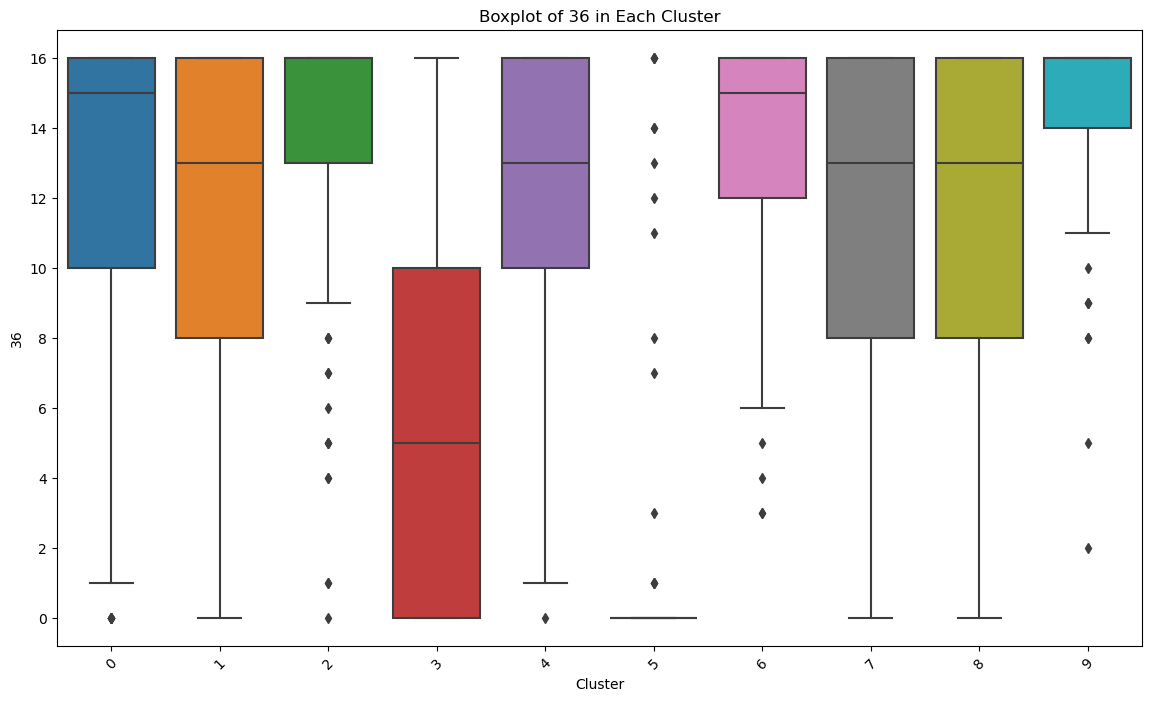

Summary statistics for 36:
         count       mean       std  min   25%   50%   75%   max
Cluster                                                         
0        228.0  12.464912  4.593003  0.0  10.0  15.0  16.0  16.0
1        218.0  11.174312  5.160724  0.0   8.0  13.0  16.0  16.0
2        117.0  13.598291  3.771627  0.0  13.0  16.0  16.0  16.0
3        268.0   5.645522  5.173153  0.0   0.0   5.0  10.0  16.0
4        197.0  12.299492  3.890943  0.0  10.0  13.0  16.0  16.0
5        171.0   0.777778  3.082737  0.0   0.0   0.0   0.0  16.0
6        188.0  13.617021  3.073455  3.0  12.0  15.0  16.0  16.0
7        134.0  11.477612  4.704368  0.0   8.0  13.0  16.0  16.0
8        160.0  11.050000  5.428553  0.0   8.0  13.0  16.0  16.0
9        116.0  14.724138  2.408630  2.0  14.0  16.0  16.0  16.0




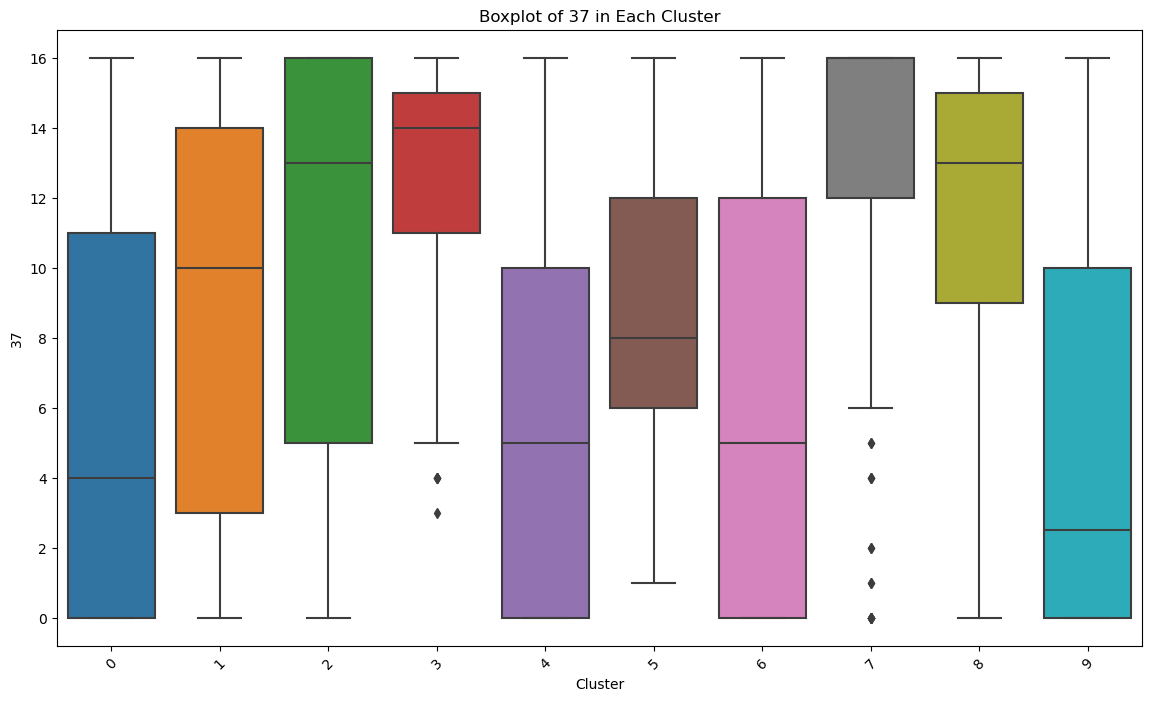

Summary statistics for 37:
         count       mean       std  min   25%   50%   75%   max
Cluster                                                         
0        228.0   5.631579  5.858483  0.0   0.0   4.0  11.0  16.0
1        218.0   8.743119  5.762430  0.0   3.0  10.0  14.0  16.0
2        117.0  10.119658  5.987289  0.0   5.0  13.0  16.0  16.0
3        268.0  12.813433  3.085954  3.0  11.0  14.0  15.0  16.0
4        197.0   5.472081  5.451594  0.0   0.0   5.0  10.0  16.0
5        171.0   8.877193  3.788854  1.0   6.0   8.0  12.0  16.0
6        188.0   6.122340  6.018770  0.0   0.0   5.0  12.0  16.0
7        134.0  12.888060  4.962507  0.0  12.0  16.0  16.0  16.0
8        160.0  11.631250  4.200362  0.0   9.0  13.0  15.0  16.0
9        116.0   4.913793  5.493979  0.0   0.0   2.5  10.0  16.0




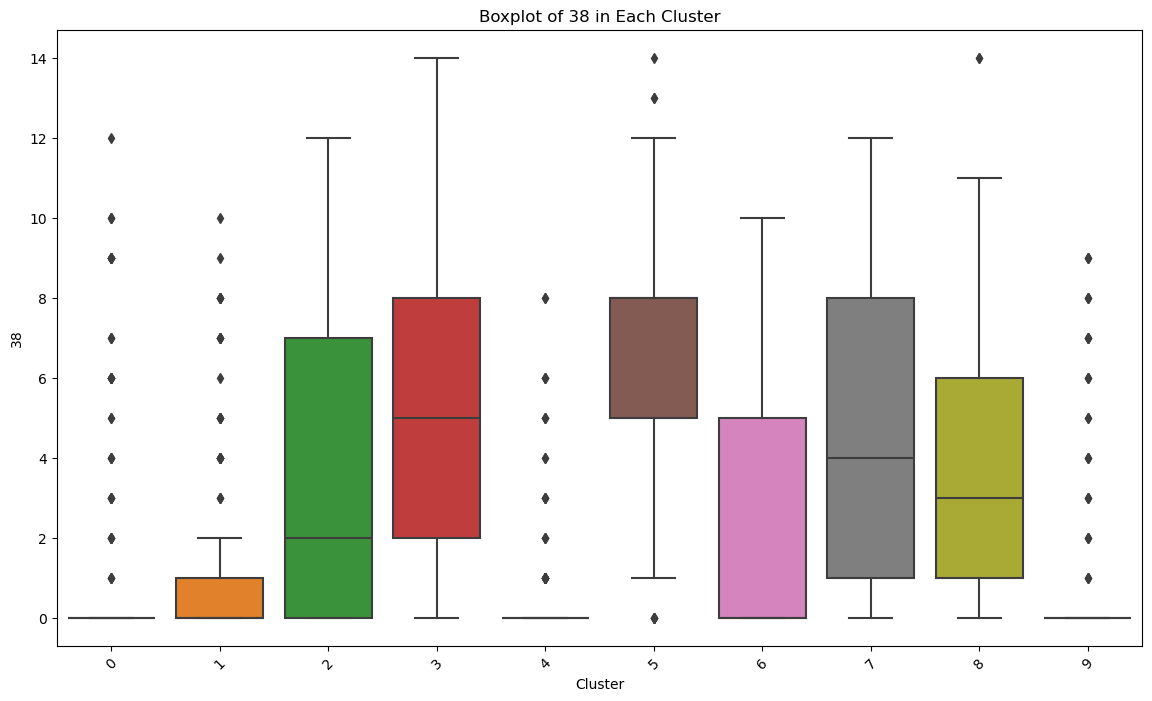

Summary statistics for 38:
         count      mean       std  min  25%  50%  75%   max
Cluster                                                     
0        228.0  1.017544  2.516842  0.0  0.0  0.0  0.0  12.0
1        218.0  0.954128  2.083003  0.0  0.0  0.0  1.0  10.0
2        117.0  3.538462  3.927223  0.0  0.0  2.0  7.0  12.0
3        268.0  5.014925  3.237156  0.0  2.0  5.0  8.0  14.0
4        197.0  0.441624  1.363853  0.0  0.0  0.0  0.0   8.0
5        171.0  7.000000  2.696403  0.0  5.0  8.0  8.0  14.0
6        188.0  2.303191  3.228978  0.0  0.0  0.0  5.0  10.0
7        134.0  4.432836  3.754592  0.0  1.0  4.0  8.0  12.0
8        160.0  3.637500  3.179113  0.0  1.0  3.0  6.0  14.0
9        116.0  1.181034  2.497300  0.0  0.0  0.0  0.0   9.0




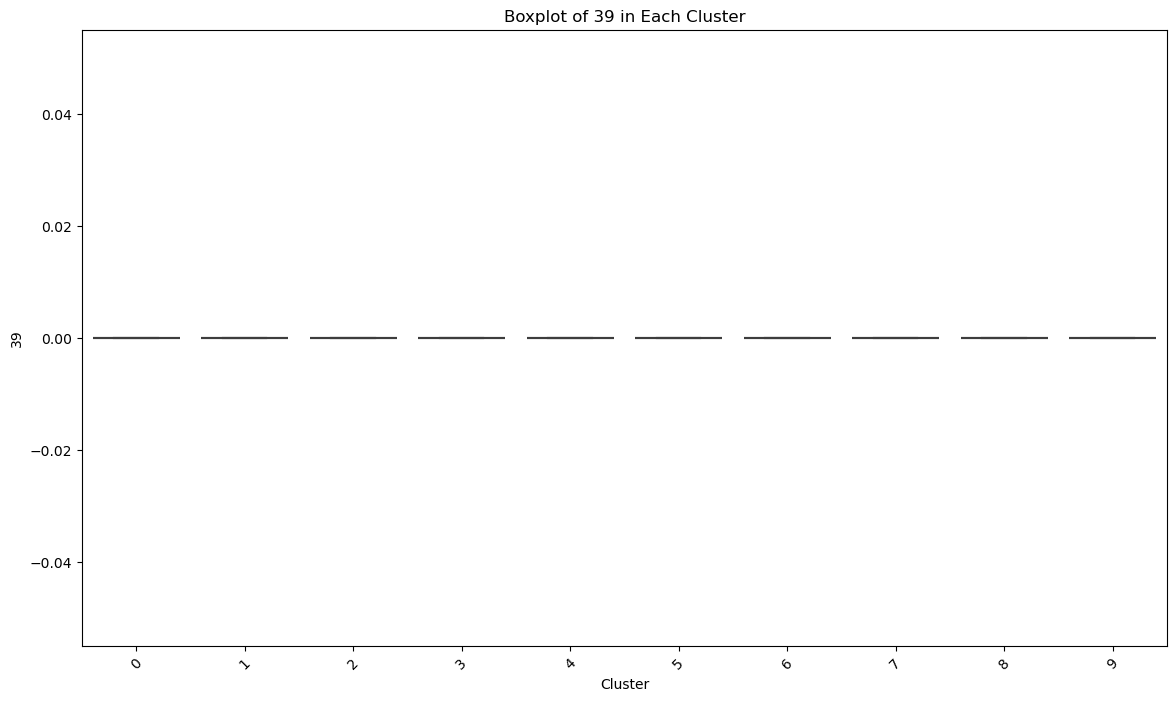

Summary statistics for 39:
         count  mean  std  min  25%  50%  75%  max
Cluster                                           
0        228.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1        218.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
2        117.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
3        268.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
4        197.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
5        171.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
6        188.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
7        134.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
8        160.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
9        116.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0




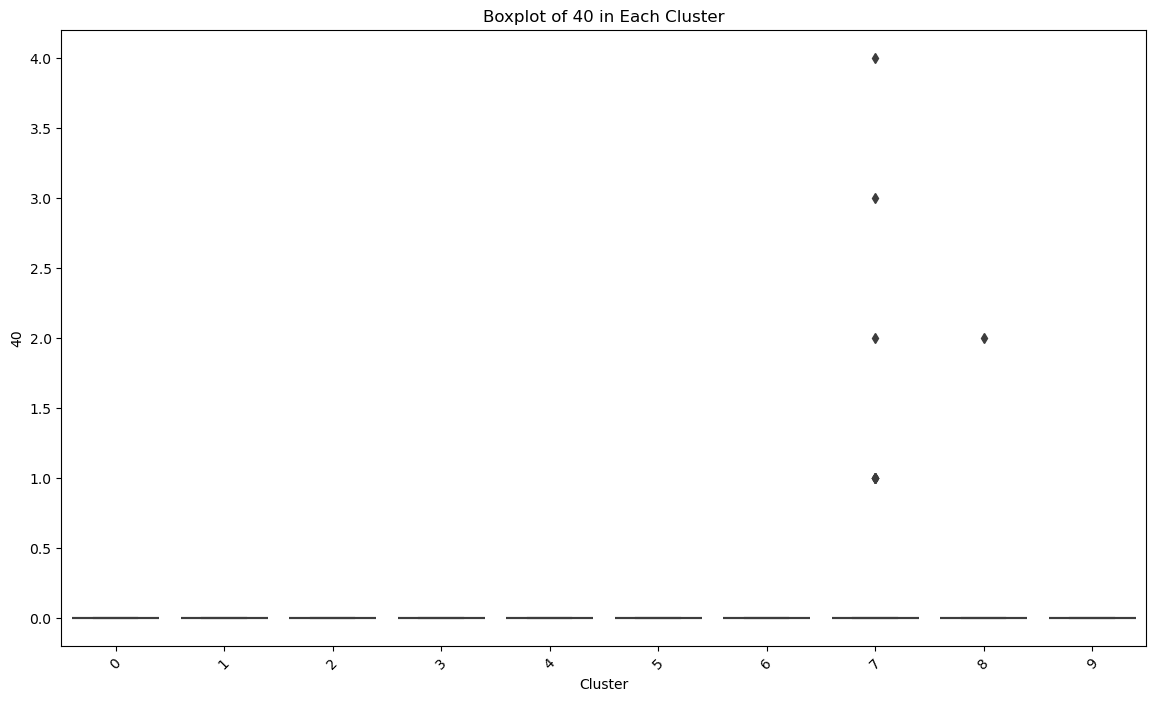

Summary statistics for 40:
         count      mean       std  min  25%  50%  75%  max
Cluster                                                    
0        228.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
1        218.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
2        117.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
3        268.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
4        197.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
5        171.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
6        188.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
7        134.0  0.104478  0.494612  0.0  0.0  0.0  0.0  4.0
8        160.0  0.012500  0.158114  0.0  0.0  0.0  0.0  2.0
9        116.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0




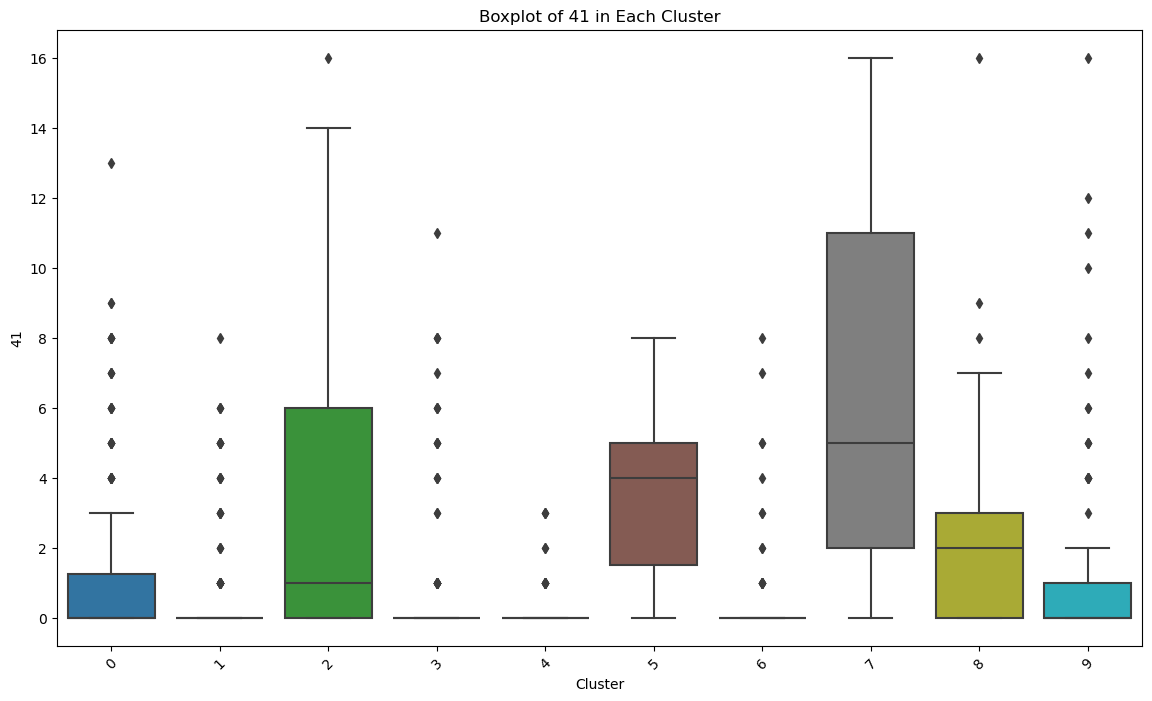

Summary statistics for 41:
         count      mean       std  min  25%  50%    75%   max
Cluster                                                       
0        228.0  1.228070  2.326007  0.0  0.0  0.0   1.25  13.0
1        218.0  0.518349  1.398529  0.0  0.0  0.0   0.00   8.0
2        117.0  3.170940  4.136237  0.0  0.0  1.0   6.00  16.0
3        268.0  0.410448  1.502620  0.0  0.0  0.0   0.00  11.0
4        197.0  0.106599  0.456033  0.0  0.0  0.0   0.00   3.0
5        171.0  3.444444  2.293497  0.0  1.5  4.0   5.00   8.0
6        188.0  0.244681  1.036099  0.0  0.0  0.0   0.00   8.0
7        134.0  6.246269  5.252191  0.0  2.0  5.0  11.00  16.0
8        160.0  2.150000  2.238036  0.0  0.0  2.0   3.00  16.0
9        116.0  1.163793  2.708903  0.0  0.0  0.0   1.00  16.0




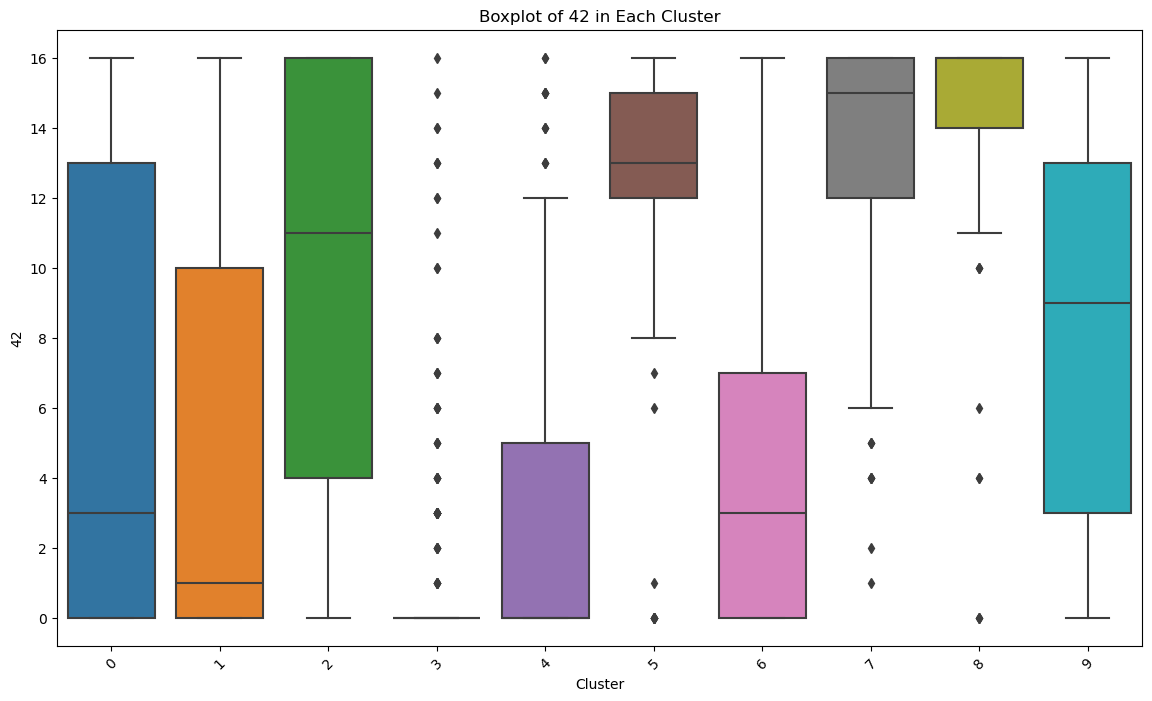

Summary statistics for 42:
         count       mean       std  min   25%   50%   75%   max
Cluster                                                         
0        228.0   5.973684  6.430873  0.0   0.0   3.0  13.0  16.0
1        218.0   4.518349  5.831120  0.0   0.0   1.0  10.0  16.0
2        117.0   9.598291  5.948138  0.0   4.0  11.0  16.0  16.0
3        268.0   1.231343  3.028984  0.0   0.0   0.0   0.0  16.0
4        197.0   2.766497  4.454566  0.0   0.0   0.0   5.0  16.0
5        171.0  12.701754  3.605380  0.0  12.0  13.0  15.0  16.0
6        188.0   4.196809  4.760420  0.0   0.0   3.0   7.0  16.0
7        134.0  13.253731  3.720875  1.0  12.0  15.0  16.0  16.0
8        160.0  14.581250  2.873588  0.0  14.0  16.0  16.0  16.0
9        116.0   8.198276  5.534430  0.0   3.0   9.0  13.0  16.0




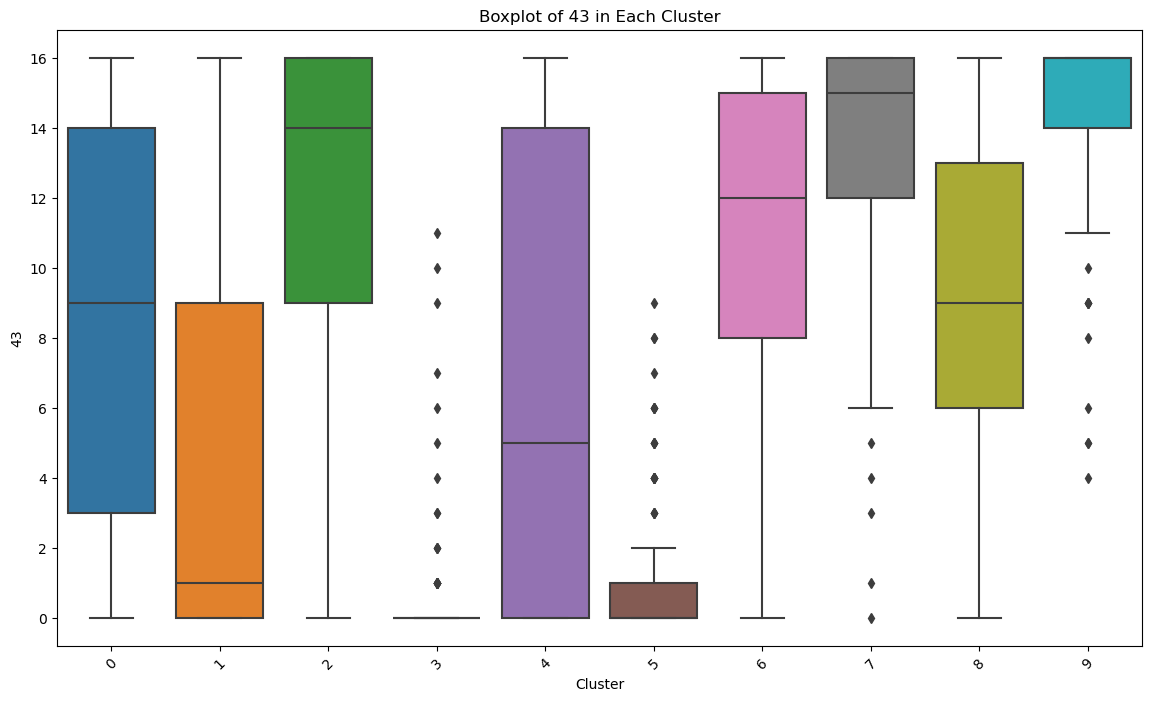

Summary statistics for 43:
         count       mean       std  min   25%   50%   75%   max
Cluster                                                         
0        228.0   8.447368  5.595927  0.0   3.0   9.0  14.0  16.0
1        218.0   4.518349  5.414789  0.0   0.0   1.0   9.0  16.0
2        117.0  11.692308  5.168641  0.0   9.0  14.0  16.0  16.0
3        268.0   0.272388  1.294060  0.0   0.0   0.0   0.0  11.0
4        197.0   6.822335  6.466074  0.0   0.0   5.0  14.0  16.0
5        171.0   0.959064  1.816126  0.0   0.0   0.0   1.0   9.0
6        188.0  11.468085  4.142391  0.0   8.0  12.0  15.0  16.0
7        134.0  13.537313  3.549133  0.0  12.0  15.0  16.0  16.0
8        160.0   9.137500  4.633061  0.0   6.0   9.0  13.0  16.0
9        116.0  14.629310  2.649135  4.0  14.0  16.0  16.0  16.0




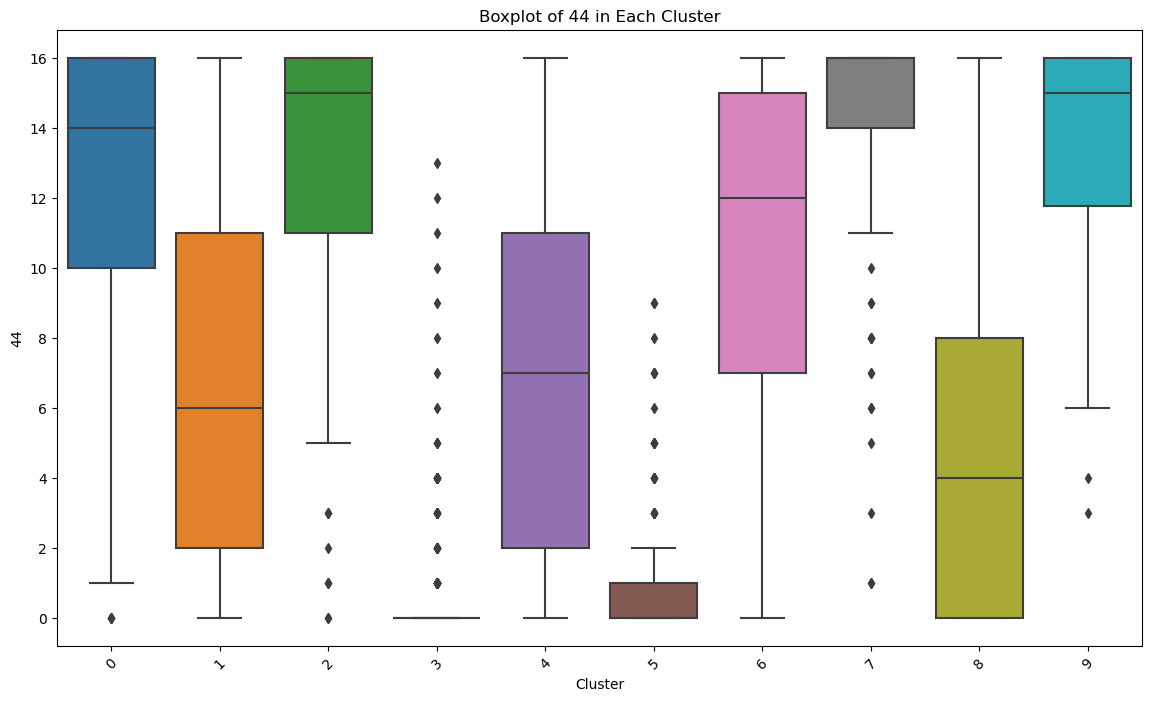

Summary statistics for 44:
         count       mean       std  min    25%   50%   75%   max
Cluster                                                          
0        228.0  12.530702  4.037700  0.0  10.00  14.0  16.0  16.0
1        218.0   6.706422  5.004703  0.0   2.00   6.0  11.0  16.0
2        117.0  12.760684  4.350286  0.0  11.00  15.0  16.0  16.0
3        268.0   0.791045  1.956740  0.0   0.00   0.0   0.0  13.0
4        197.0   7.192893  5.219992  0.0   2.00   7.0  11.0  16.0
5        171.0   0.976608  1.853306  0.0   0.00   0.0   1.0   9.0
6        188.0  10.595745  4.838171  0.0   7.00  12.0  15.0  16.0
7        134.0  14.261194  3.237304  1.0  14.00  16.0  16.0  16.0
8        160.0   4.443750  4.436480  0.0   0.00   4.0   8.0  16.0
9        116.0  13.491379  3.169133  3.0  11.75  15.0  16.0  16.0




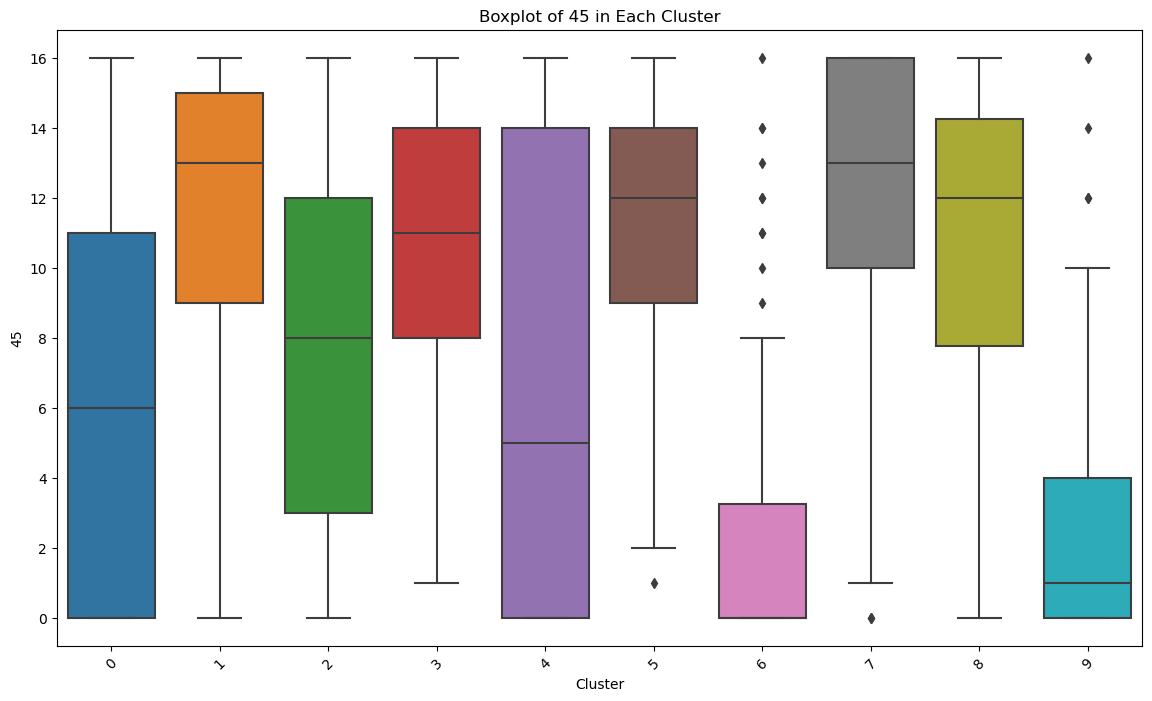

Summary statistics for 45:
         count       mean       std  min    25%   50%    75%   max
Cluster                                                           
0        228.0   5.995614  5.256000  0.0   0.00   6.0  11.00  16.0
1        218.0  10.940367  5.050996  0.0   9.00  13.0  15.00  16.0
2        117.0   7.529915  5.218622  0.0   3.00   8.0  12.00  16.0
3        268.0  10.735075  3.810192  1.0   8.00  11.0  14.00  16.0
4        197.0   6.994924  6.451149  0.0   0.00   5.0  14.00  16.0
5        171.0  11.192982  3.726401  1.0   9.00  12.0  14.00  16.0
6        188.0   2.143617  3.454148  0.0   0.00   0.0   3.25  16.0
7        134.0  12.074627  3.900312  0.0  10.00  13.0  16.00  16.0
8        160.0  10.637500  4.492464  0.0   7.75  12.0  14.25  16.0
9        116.0   2.379310  3.379362  0.0   0.00   1.0   4.00  16.0




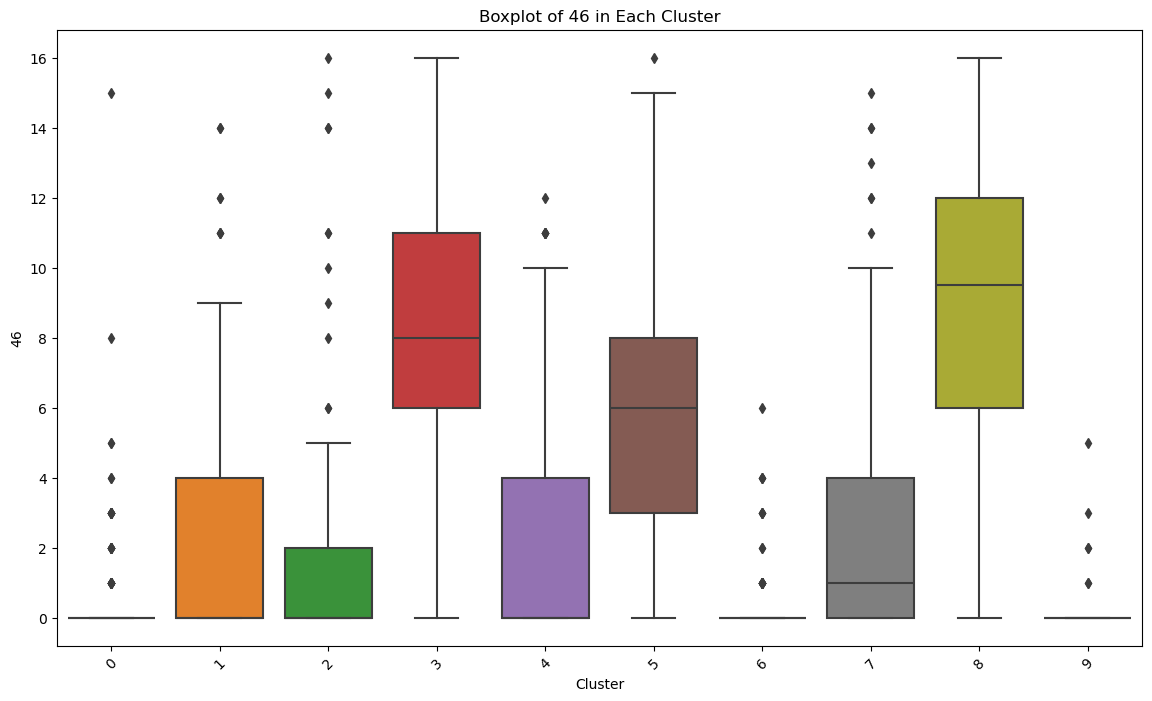

Summary statistics for 46:
         count      mean       std  min  25%  50%   75%   max
Cluster                                                      
0        228.0  0.447368  1.430271  0.0  0.0  0.0   0.0  15.0
1        218.0  2.178899  3.093045  0.0  0.0  0.0   4.0  14.0
2        117.0  1.794872  3.410275  0.0  0.0  0.0   2.0  16.0
3        268.0  7.873134  3.560965  0.0  6.0  8.0  11.0  16.0
4        197.0  2.096447  3.283514  0.0  0.0  0.0   4.0  12.0
5        171.0  6.029240  3.632252  0.0  3.0  6.0   8.0  16.0
6        188.0  0.239362  0.828079  0.0  0.0  0.0   0.0   6.0
7        134.0  2.791045  3.594220  0.0  0.0  1.0   4.0  15.0
8        160.0  8.981250  3.981833  0.0  6.0  9.5  12.0  16.0
9        116.0  0.120690  0.606561  0.0  0.0  0.0   0.0   5.0




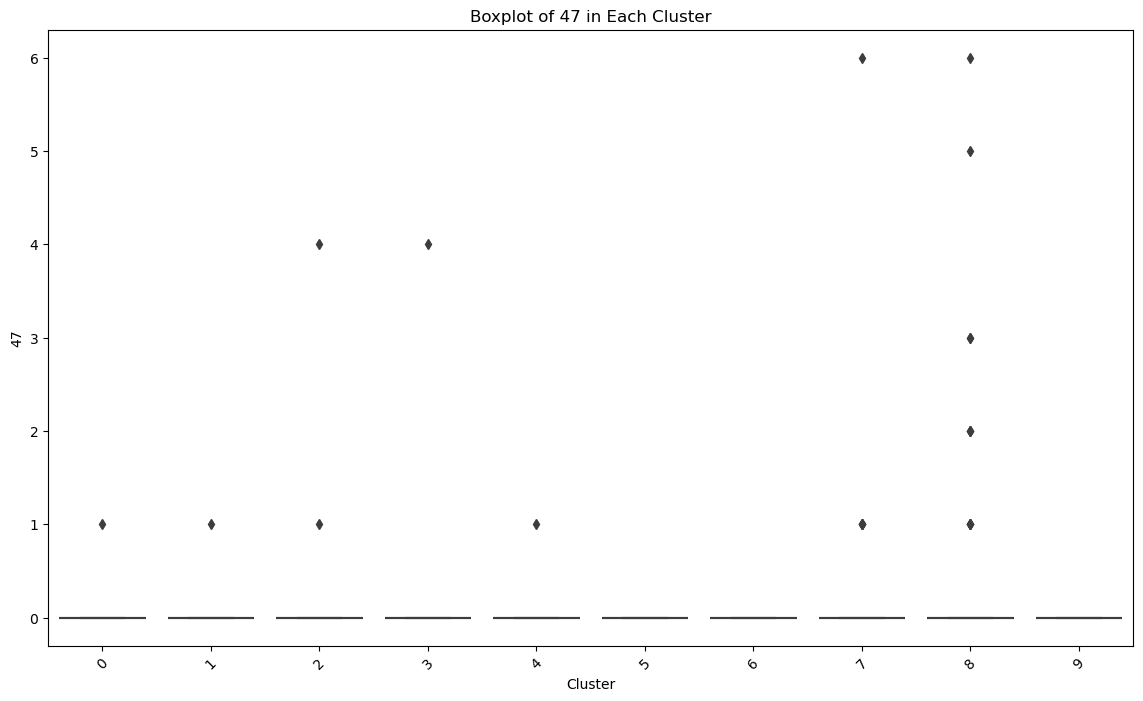

Summary statistics for 47:
         count      mean       std  min  25%  50%  75%  max
Cluster                                                    
0        228.0  0.004386  0.066227  0.0  0.0  0.0  0.0  1.0
1        218.0  0.004587  0.067729  0.0  0.0  0.0  0.0  1.0
2        117.0  0.042735  0.380407  0.0  0.0  0.0  0.0  4.0
3        268.0  0.014925  0.244339  0.0  0.0  0.0  0.0  4.0
4        197.0  0.005076  0.071247  0.0  0.0  0.0  0.0  1.0
5        171.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
6        188.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
7        134.0  0.074627  0.543269  0.0  0.0  0.0  0.0  6.0
8        160.0  0.168750  0.754207  0.0  0.0  0.0  0.0  6.0
9        116.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0




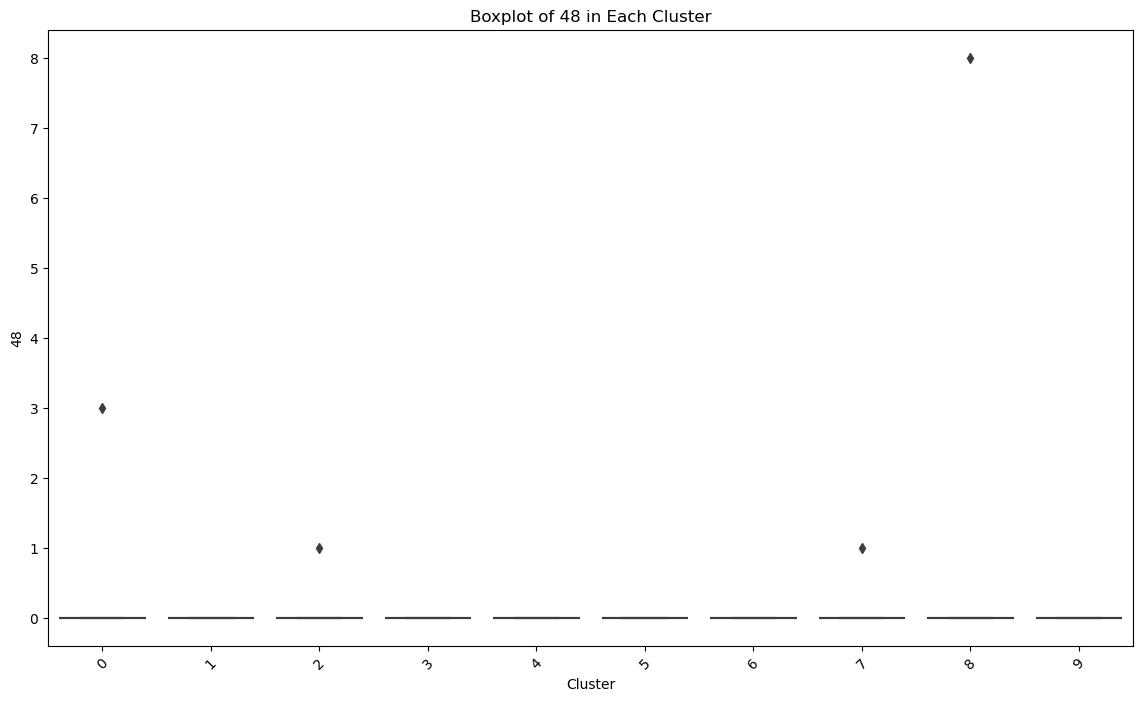

Summary statistics for 48:
         count      mean       std  min  25%  50%  75%  max
Cluster                                                    
0        228.0  0.013158  0.198680  0.0  0.0  0.0  0.0  3.0
1        218.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
2        117.0  0.008547  0.092450  0.0  0.0  0.0  0.0  1.0
3        268.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
4        197.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
5        171.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
6        188.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
7        134.0  0.007463  0.086387  0.0  0.0  0.0  0.0  1.0
8        160.0  0.050000  0.632456  0.0  0.0  0.0  0.0  8.0
9        116.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0




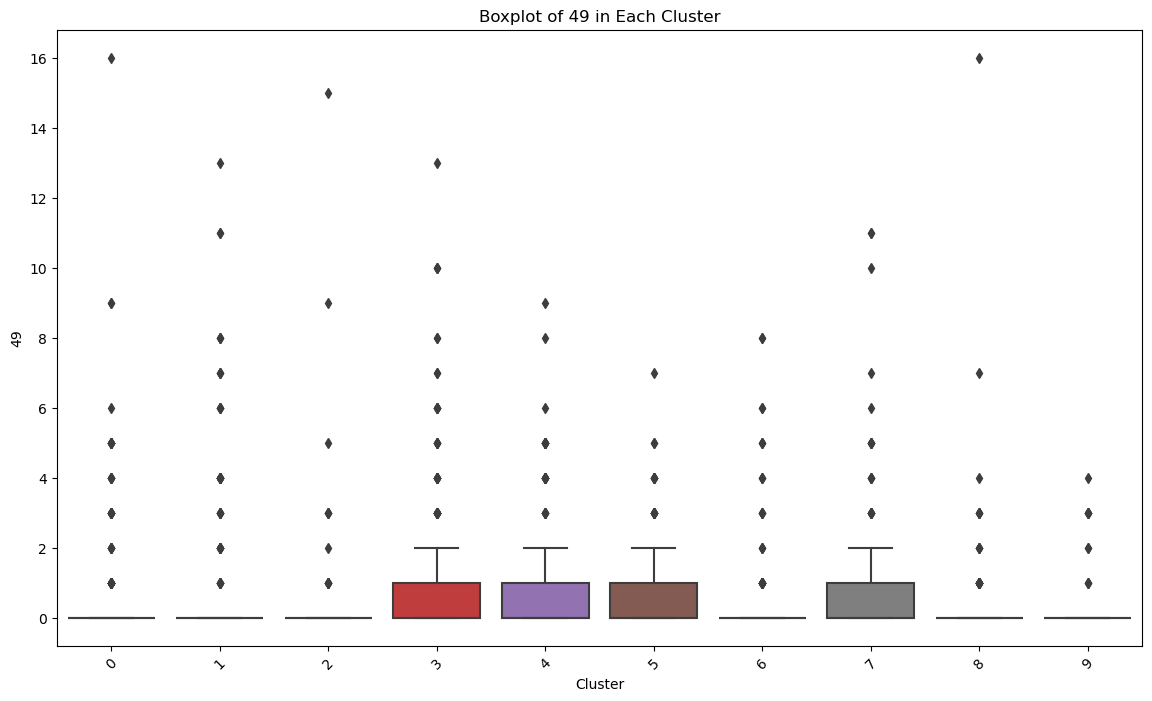

Summary statistics for 49:
         count      mean       std  min  25%  50%  75%   max
Cluster                                                     
0        228.0  0.710526  1.835642  0.0  0.0  0.0  0.0  16.0
1        218.0  0.848624  2.135938  0.0  0.0  0.0  0.0  13.0
2        117.0  0.418803  1.753024  0.0  0.0  0.0  0.0  15.0
3        268.0  1.007463  2.024184  0.0  0.0  0.0  1.0  13.0
4        197.0  0.837563  1.630078  0.0  0.0  0.0  1.0   9.0
5        171.0  0.754386  1.278060  0.0  0.0  0.0  1.0   7.0
6        188.0  0.462766  1.357765  0.0  0.0  0.0  0.0   8.0
7        134.0  0.970149  2.109557  0.0  0.0  0.0  1.0  11.0
8        160.0  0.393750  1.513449  0.0  0.0  0.0  0.0  16.0
9        116.0  0.224138  0.758559  0.0  0.0  0.0  0.0   4.0




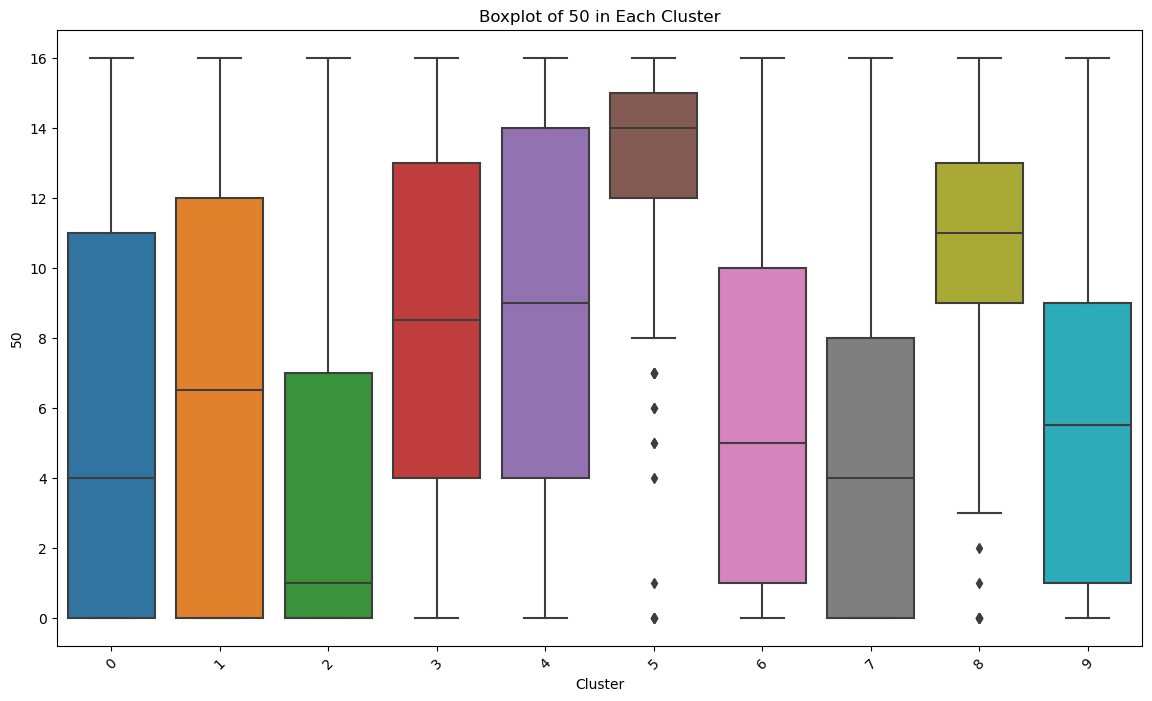

Summary statistics for 50:
         count       mean       std  min   25%   50%   75%   max
Cluster                                                         
0        228.0   5.578947  5.702453  0.0   0.0   4.0  11.0  16.0
1        218.0   7.013761  5.975742  0.0   0.0   6.5  12.0  16.0
2        117.0   3.649573  4.780197  0.0   0.0   1.0   7.0  16.0
3        268.0   8.361940  5.270187  0.0   4.0   8.5  13.0  16.0
4        197.0   8.832487  5.178188  0.0   4.0   9.0  14.0  16.0
5        171.0  12.730994  3.470570  0.0  12.0  14.0  15.0  16.0
6        188.0   5.845745  5.357052  0.0   1.0   5.0  10.0  16.0
7        134.0   4.634328  4.896740  0.0   0.0   4.0   8.0  16.0
8        160.0  10.656250  3.596027  0.0   9.0  11.0  13.0  16.0
9        116.0   5.853448  4.872736  0.0   1.0   5.5   9.0  16.0




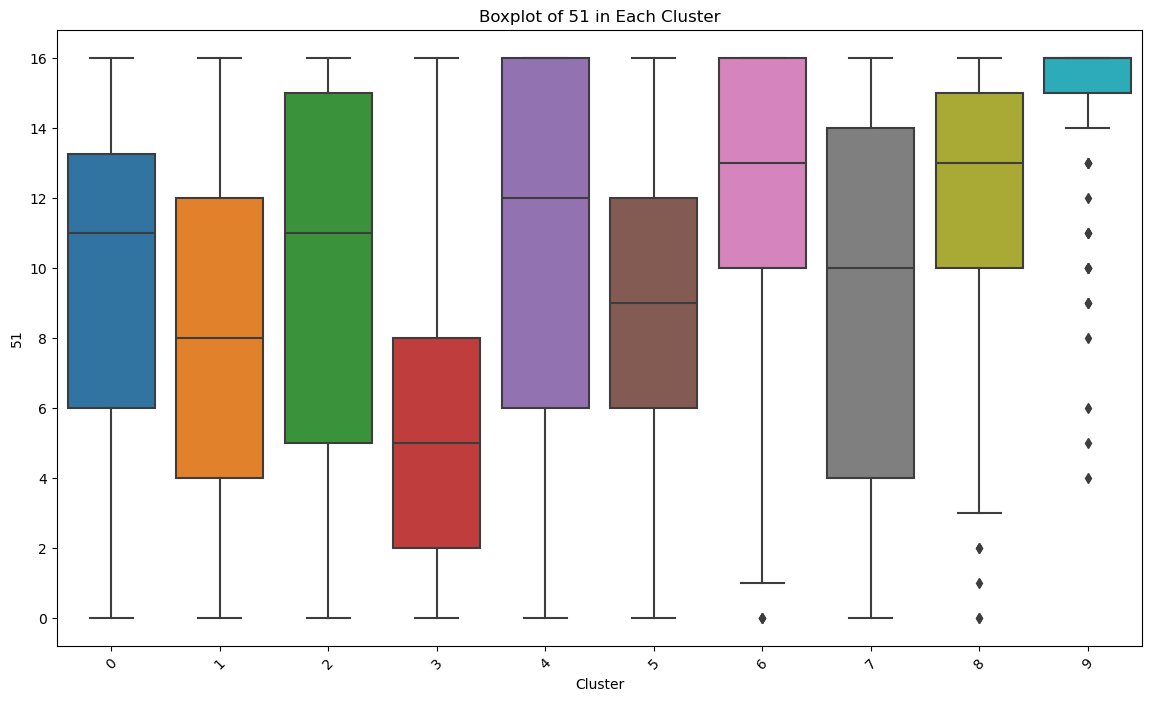

Summary statistics for 51:
         count       mean       std  min   25%   50%    75%   max
Cluster                                                          
0        228.0   9.684211  4.817947  0.0   6.0  11.0  13.25  16.0
1        218.0   7.573394  5.196297  0.0   4.0   8.0  12.00  16.0
2        117.0   9.837607  5.820530  0.0   5.0  11.0  15.00  16.0
3        268.0   5.264925  3.751749  0.0   2.0   5.0   8.00  16.0
4        197.0  10.502538  5.356309  0.0   6.0  12.0  16.00  16.0
5        171.0   9.169591  3.963126  0.0   6.0   9.0  12.00  16.0
6        188.0  12.005319  4.402840  0.0  10.0  13.0  16.00  16.0
7        134.0   9.029851  5.684619  0.0   4.0  10.0  14.00  16.0
8        160.0  11.887500  3.642840  0.0  10.0  13.0  15.00  16.0
9        116.0  14.784483  2.491048  4.0  15.0  16.0  16.00  16.0




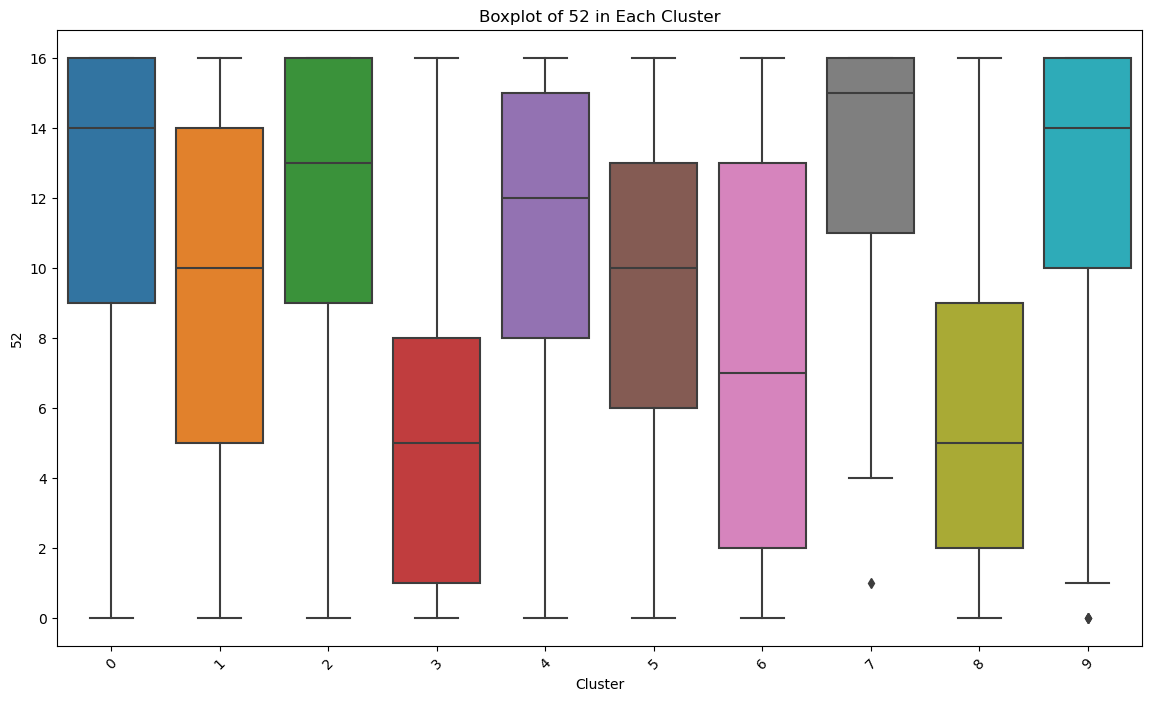

Summary statistics for 52:
         count       mean       std  min   25%   50%   75%   max
Cluster                                                         
0        228.0  12.035088  4.315590  0.0   9.0  14.0  16.0  16.0
1        218.0   9.284404  5.277710  0.0   5.0  10.0  14.0  16.0
2        117.0  11.965812  4.274890  0.0   9.0  13.0  16.0  16.0
3        268.0   5.257463  4.150373  0.0   1.0   5.0   8.0  16.0
4        197.0  11.106599  4.345277  0.0   8.0  12.0  15.0  16.0
5        171.0   9.461988  4.210982  0.0   6.0  10.0  13.0  16.0
6        188.0   7.388298  5.639175  0.0   2.0   7.0  13.0  16.0
7        134.0  13.246269  3.565576  1.0  11.0  15.0  16.0  16.0
8        160.0   6.131250  4.978093  0.0   2.0   5.0   9.0  16.0
9        116.0  12.008621  4.599614  0.0  10.0  14.0  16.0  16.0




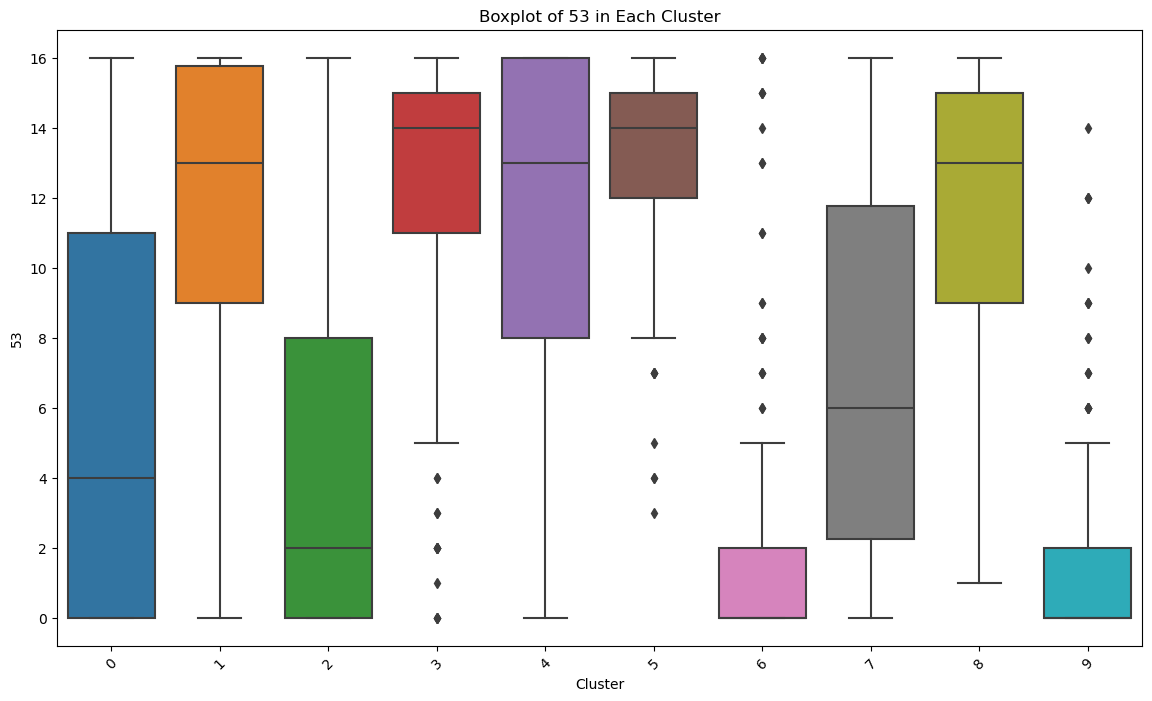

Summary statistics for 53:
         count       mean       std  min    25%   50%    75%   max
Cluster                                                           
0        228.0   6.087719  6.021344  0.0   0.00   4.0  11.00  16.0
1        218.0  11.555046  4.397234  0.0   9.00  13.0  15.75  16.0
2        117.0   4.299145  5.288675  0.0   0.00   2.0   8.00  16.0
3        268.0  12.481343  3.749111  0.0  11.00  14.0  15.00  16.0
4        197.0  11.959391  4.041668  0.0   8.00  13.0  16.00  16.0
5        171.0  13.403509  2.725865  3.0  12.00  14.0  15.00  16.0
6        188.0   1.840426  3.889663  0.0   0.00   0.0   2.00  16.0
7        134.0   6.865672  5.242669  0.0   2.25   6.0  11.75  16.0
8        160.0  11.568750  3.918384  1.0   9.00  13.0  15.00  16.0
9        116.0   1.887931  3.253818  0.0   0.00   0.0   2.00  14.0




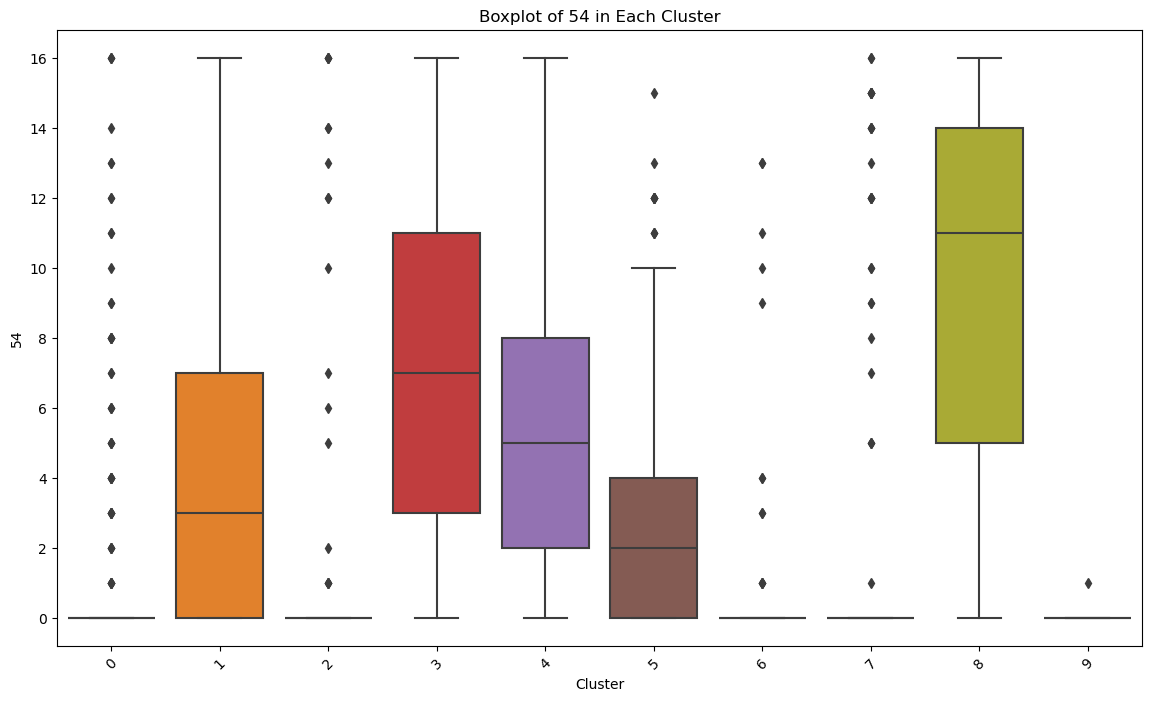

Summary statistics for 54:
         count      mean       std  min  25%   50%   75%   max
Cluster                                                       
0        228.0  1.359649  3.298984  0.0  0.0   0.0   0.0  16.0
1        218.0  4.087156  4.453210  0.0  0.0   3.0   7.0  16.0
2        117.0  1.393162  4.008520  0.0  0.0   0.0   0.0  16.0
3        268.0  6.929104  4.706221  0.0  3.0   7.0  11.0  16.0
4        197.0  5.512690  4.531758  0.0  2.0   5.0   8.0  16.0
5        171.0  2.807018  3.457840  0.0  0.0   2.0   4.0  15.0
6        188.0  0.393617  1.885595  0.0  0.0   0.0   0.0  13.0
7        134.0  2.500000  5.110435  0.0  0.0   0.0   0.0  16.0
8        160.0  9.356250  5.192335  0.0  5.0  11.0  14.0  16.0
9        116.0  0.008621  0.092848  0.0  0.0   0.0   0.0   1.0




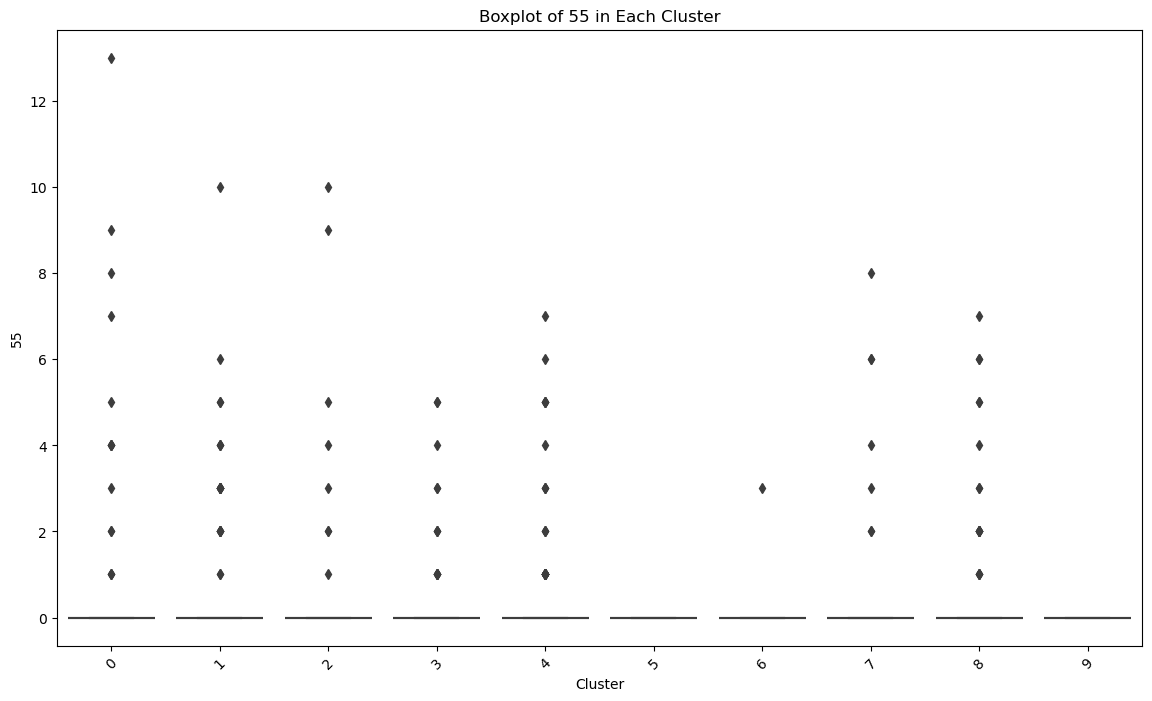

Summary statistics for 55:
         count      mean       std  min  25%  50%  75%   max
Cluster                                                     
0        228.0  0.298246  1.410657  0.0  0.0  0.0  0.0  13.0
1        218.0  0.348624  1.186531  0.0  0.0  0.0  0.0  10.0
2        117.0  0.307692  1.404804  0.0  0.0  0.0  0.0  10.0
3        268.0  0.119403  0.606393  0.0  0.0  0.0  0.0   5.0
4        197.0  0.345178  1.089205  0.0  0.0  0.0  0.0   7.0
5        171.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0
6        188.0  0.015957  0.218797  0.0  0.0  0.0  0.0   3.0
7        134.0  0.231343  1.103066  0.0  0.0  0.0  0.0   8.0
8        160.0  0.356250  1.167413  0.0  0.0  0.0  0.0   7.0
9        116.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0




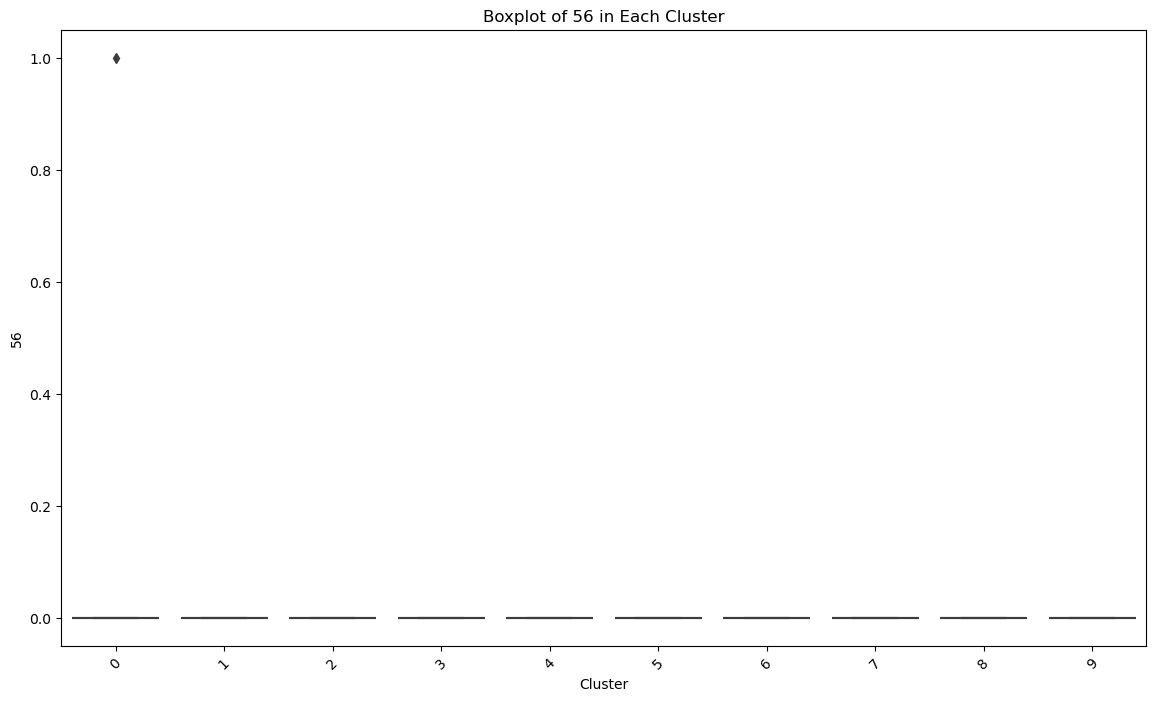

Summary statistics for 56:
         count      mean       std  min  25%  50%  75%  max
Cluster                                                    
0        228.0  0.004386  0.066227  0.0  0.0  0.0  0.0  1.0
1        218.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
2        117.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
3        268.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
4        197.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
5        171.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
6        188.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
7        134.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
8        160.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
9        116.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0




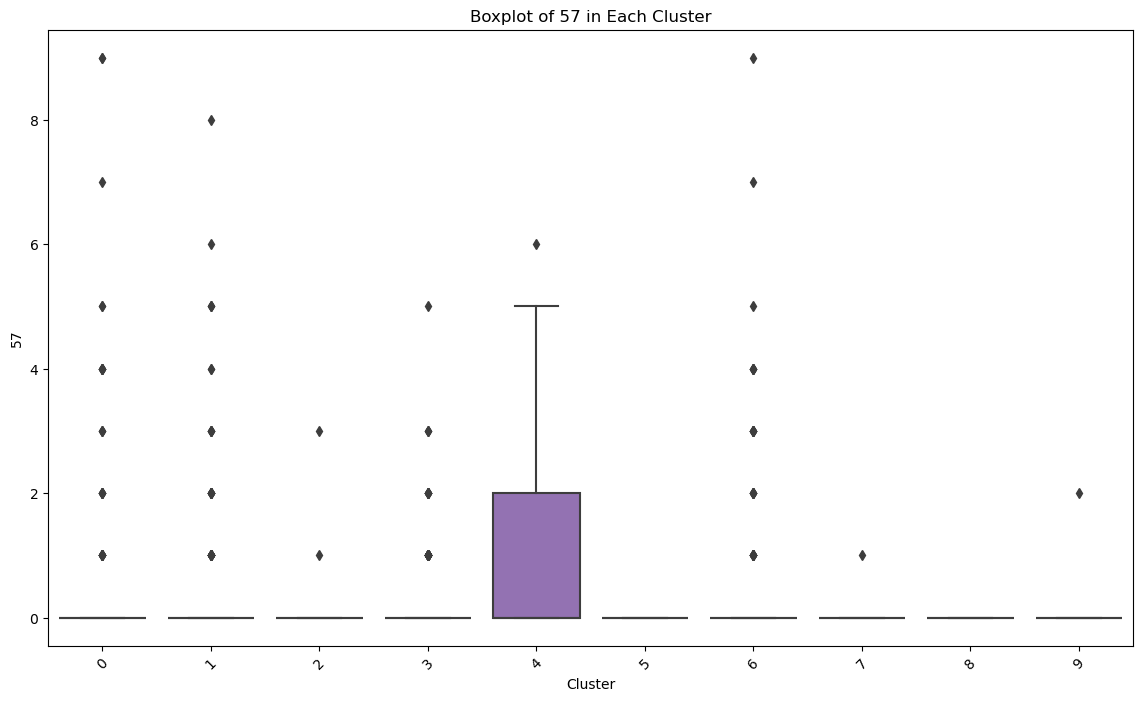

Summary statistics for 57:
         count      mean       std  min  25%  50%  75%  max
Cluster                                                    
0        228.0  0.394737  1.298039  0.0  0.0  0.0  0.0  9.0
1        218.0  0.394495  1.115606  0.0  0.0  0.0  0.0  8.0
2        117.0  0.034188  0.291596  0.0  0.0  0.0  0.0  3.0
3        268.0  0.235075  0.618656  0.0  0.0  0.0  0.0  5.0
4        197.0  0.873096  1.377345  0.0  0.0  0.0  2.0  6.0
5        171.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
6        188.0  0.446809  1.254869  0.0  0.0  0.0  0.0  9.0
7        134.0  0.007463  0.086387  0.0  0.0  0.0  0.0  1.0
8        160.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
9        116.0  0.017241  0.185695  0.0  0.0  0.0  0.0  2.0




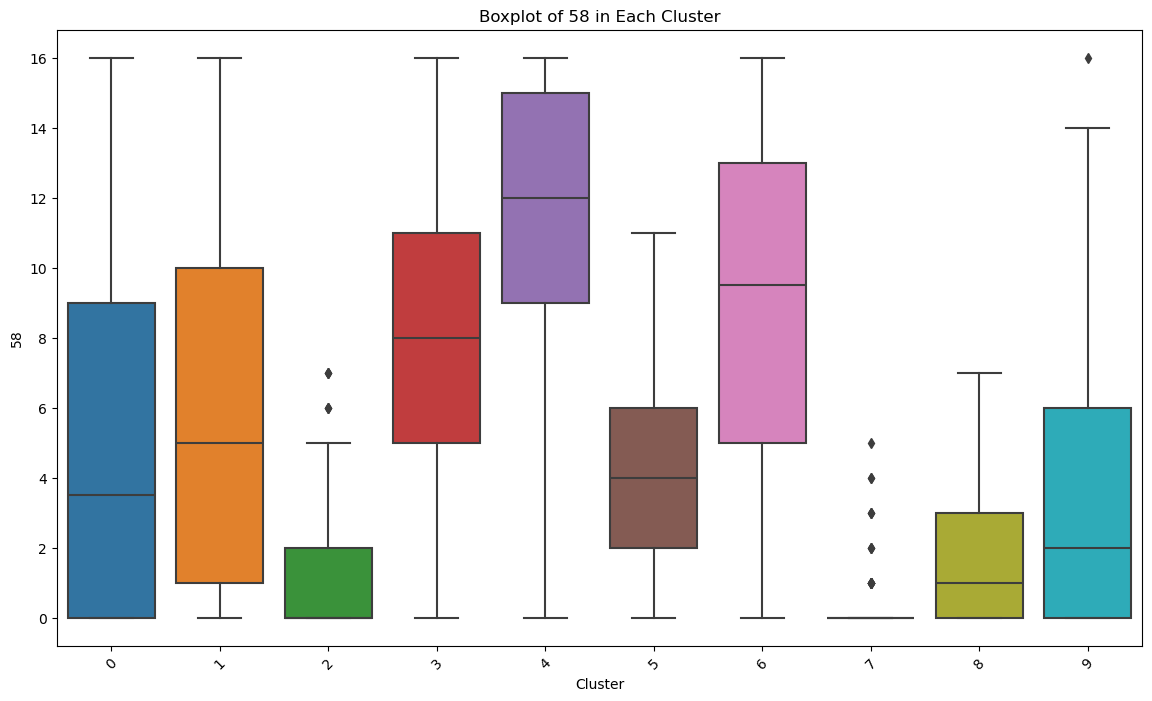

Summary statistics for 58:
         count       mean       std  min  25%   50%   75%   max
Cluster                                                        
0        228.0   5.026316  5.337855  0.0  0.0   3.5   9.0  16.0
1        218.0   6.018349  5.231915  0.0  1.0   5.0  10.0  16.0
2        117.0   1.128205  1.891626  0.0  0.0   0.0   2.0   7.0
3        268.0   7.694030  3.994805  0.0  5.0   8.0  11.0  16.0
4        197.0  11.243655  4.011657  0.0  9.0  12.0  15.0  16.0
5        171.0   4.222222  2.647480  0.0  2.0   4.0   6.0  11.0
6        188.0   8.978723  4.604064  0.0  5.0   9.5  13.0  16.0
7        134.0   0.276119  0.844191  0.0  0.0   0.0   0.0   5.0
8        160.0   1.725000  1.663330  0.0  0.0   1.0   3.0   7.0
9        116.0   3.422414  3.867705  0.0  0.0   2.0   6.0  16.0




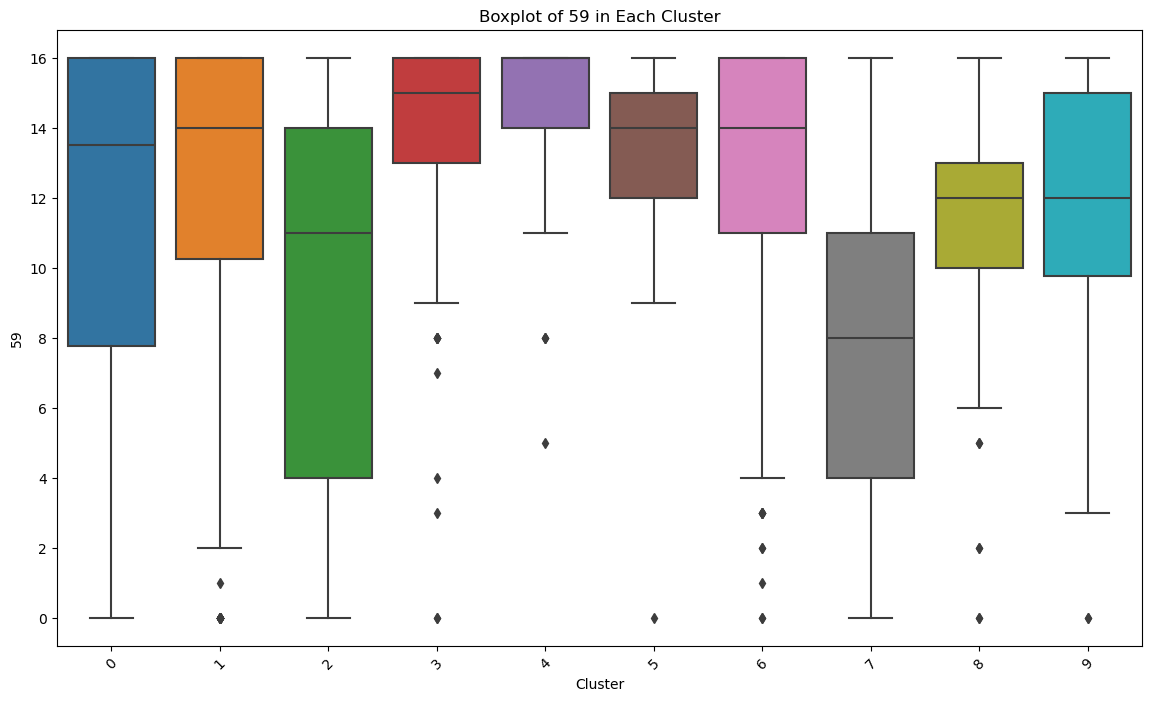

Summary statistics for 59:
         count       mean       std  min    25%   50%   75%   max
Cluster                                                          
0        228.0  11.162281  5.406390  0.0   7.75  13.5  16.0  16.0
1        218.0  11.766055  5.049556  0.0  10.25  14.0  16.0  16.0
2        117.0   8.931624  5.457874  0.0   4.00  11.0  14.0  16.0
3        268.0  13.966418  2.644121  0.0  13.00  15.0  16.0  16.0
4        197.0  14.827411  1.868280  5.0  14.00  16.0  16.0  16.0
5        171.0  13.625731  2.139333  0.0  12.00  14.0  15.0  16.0
6        188.0  12.622340  3.879320  0.0  11.00  14.0  16.0  16.0
7        134.0   7.776119  4.617133  0.0   4.00   8.0  11.0  16.0
8        160.0  11.181250  2.894088  0.0  10.00  12.0  13.0  16.0
9        116.0  11.818966  3.660837  0.0   9.75  12.0  15.0  16.0




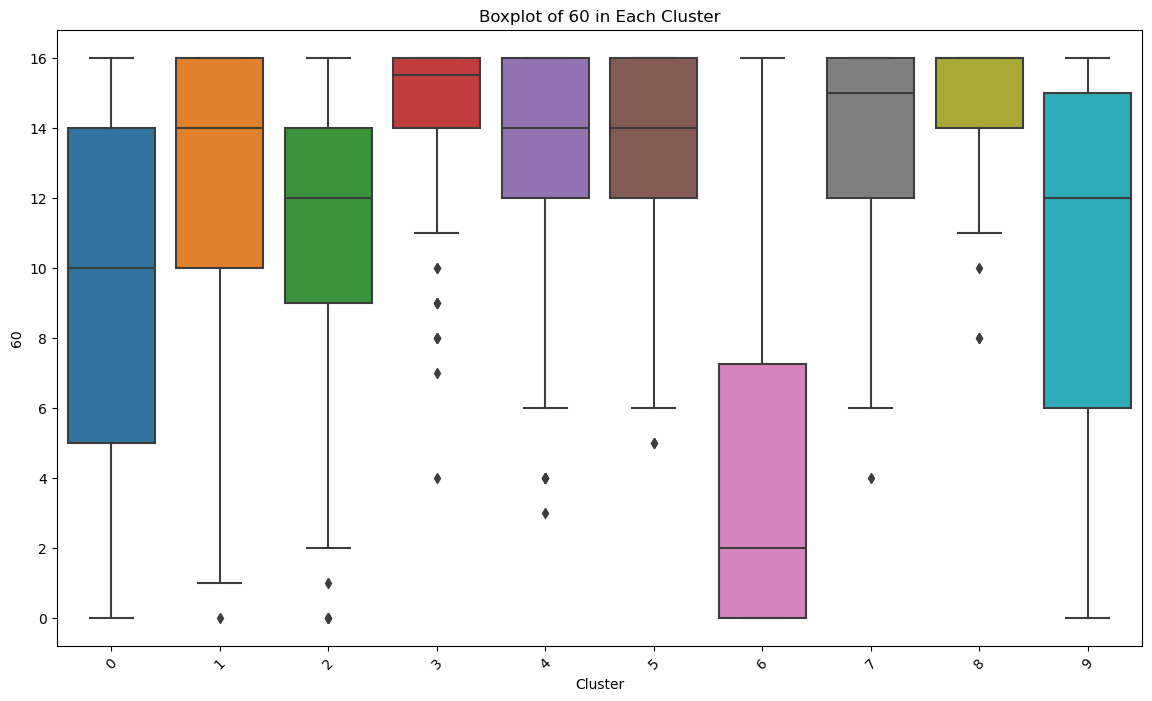

Summary statistics for 60:
         count       mean       std  min   25%   50%    75%   max
Cluster                                                          
0        228.0   9.442982  5.311553  0.0   5.0  10.0  14.00  16.0
1        218.0  12.440367  3.987148  0.0  10.0  14.0  16.00  16.0
2        117.0  11.042735  4.210809  0.0   9.0  12.0  14.00  16.0
3        268.0  14.626866  1.920407  4.0  14.0  15.5  16.00  16.0
4        197.0  13.365482  3.119790  3.0  12.0  14.0  16.00  16.0
5        171.0  13.502924  2.558433  5.0  12.0  14.0  16.00  16.0
6        188.0   4.090426  5.131148  0.0   0.0   2.0   7.25  16.0
7        134.0  13.604478  2.630128  4.0  12.0  15.0  16.00  16.0
8        160.0  14.993750  1.592028  8.0  14.0  16.0  16.00  16.0
9        116.0  10.439655  5.562747  0.0   6.0  12.0  15.00  16.0




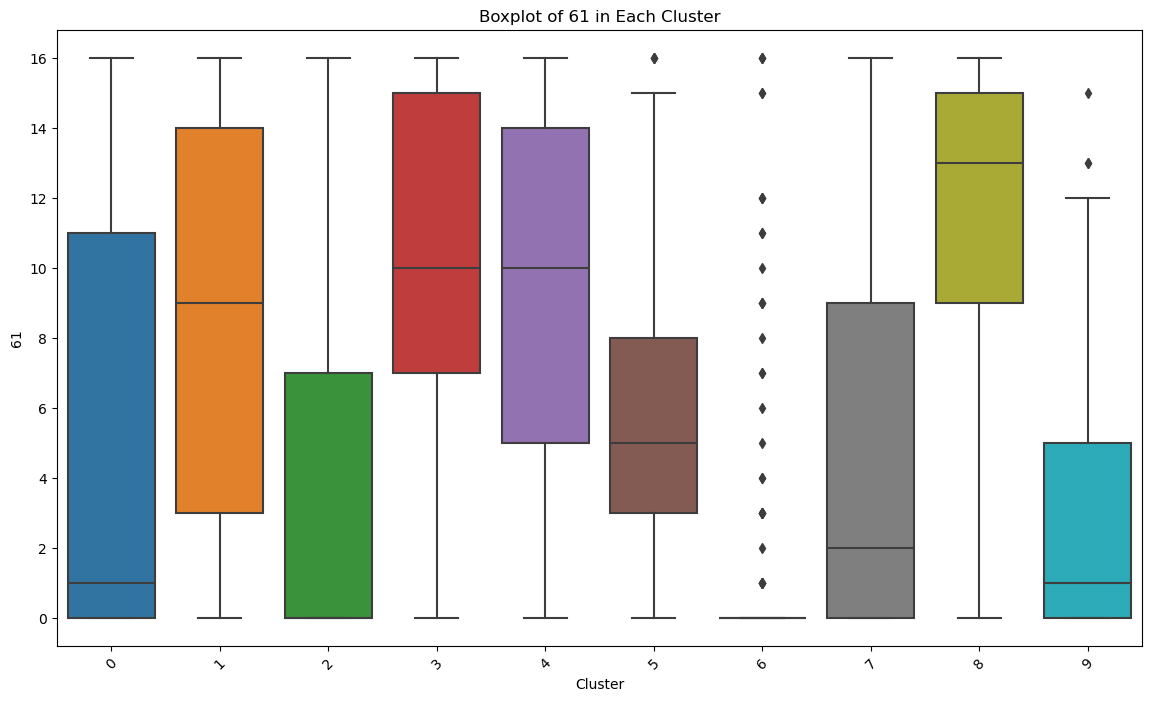

Summary statistics for 61:
         count       mean       std  min  25%   50%   75%   max
Cluster                                                        
0        228.0   5.052632  6.224638  0.0  0.0   1.0  11.0  16.0
1        218.0   8.587156  5.698591  0.0  3.0   9.0  14.0  16.0
2        117.0   3.743590  5.407775  0.0  0.0   0.0   7.0  16.0
3        268.0  10.272388  4.509298  0.0  7.0  10.0  15.0  16.0
4        197.0   9.421320  5.044714  0.0  5.0  10.0  14.0  16.0
5        171.0   5.906433  4.258212  0.0  3.0   5.0   8.0  16.0
6        188.0   1.255319  3.466991  0.0  0.0   0.0   0.0  16.0
7        134.0   4.843284  5.597871  0.0  0.0   2.0   9.0  16.0
8        160.0  11.643750  4.092249  0.0  9.0  13.0  15.0  16.0
9        116.0   2.810345  3.755376  0.0  0.0   1.0   5.0  15.0




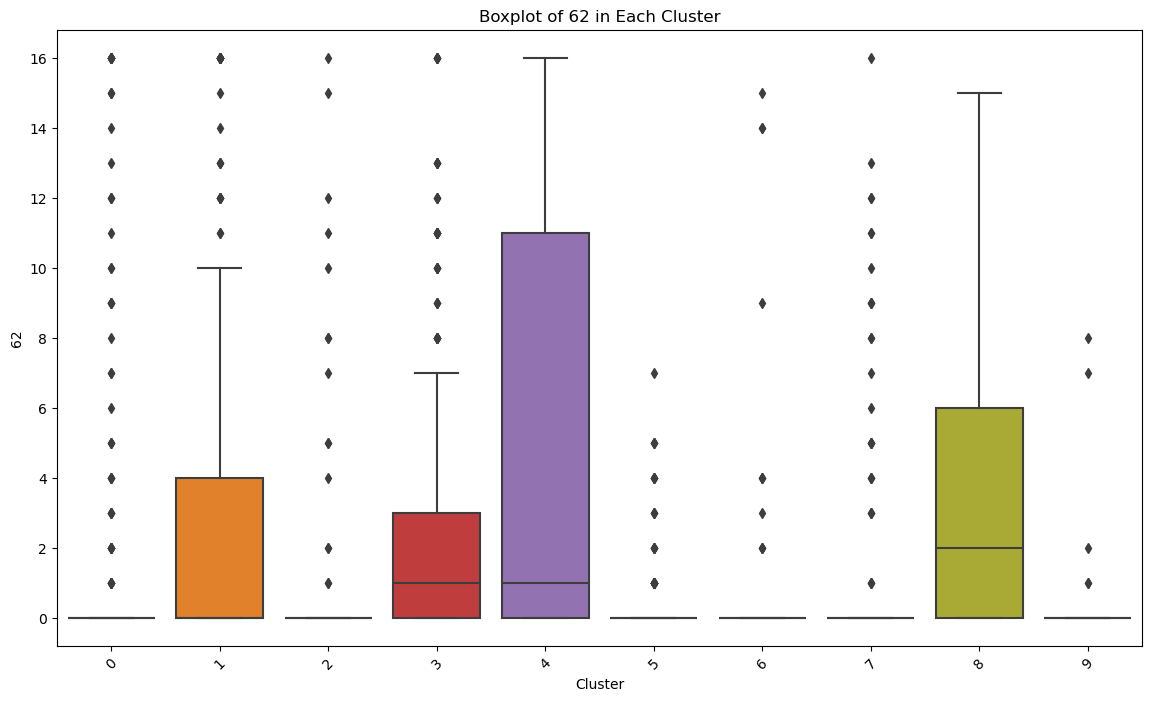

Summary statistics for 62:
         count      mean       std  min  25%  50%   75%   max
Cluster                                                      
0        228.0  1.868421  4.346274  0.0  0.0  0.0   0.0  16.0
1        218.0  2.899083  4.740151  0.0  0.0  0.0   4.0  16.0
2        117.0  0.914530  2.937782  0.0  0.0  0.0   0.0  16.0
3        268.0  2.462687  3.767905  0.0  0.0  1.0   3.0  16.0
4        197.0  5.000000  6.194962  0.0  0.0  1.0  11.0  16.0
5        171.0  0.397661  1.129703  0.0  0.0  0.0   0.0   7.0
6        188.0  0.388298  1.987466  0.0  0.0  0.0   0.0  15.0
7        134.0  1.380597  3.283119  0.0  0.0  0.0   0.0  16.0
8        160.0  3.506250  3.716353  0.0  0.0  2.0   6.0  15.0
9        116.0  0.163793  1.003853  0.0  0.0  0.0   0.0   8.0




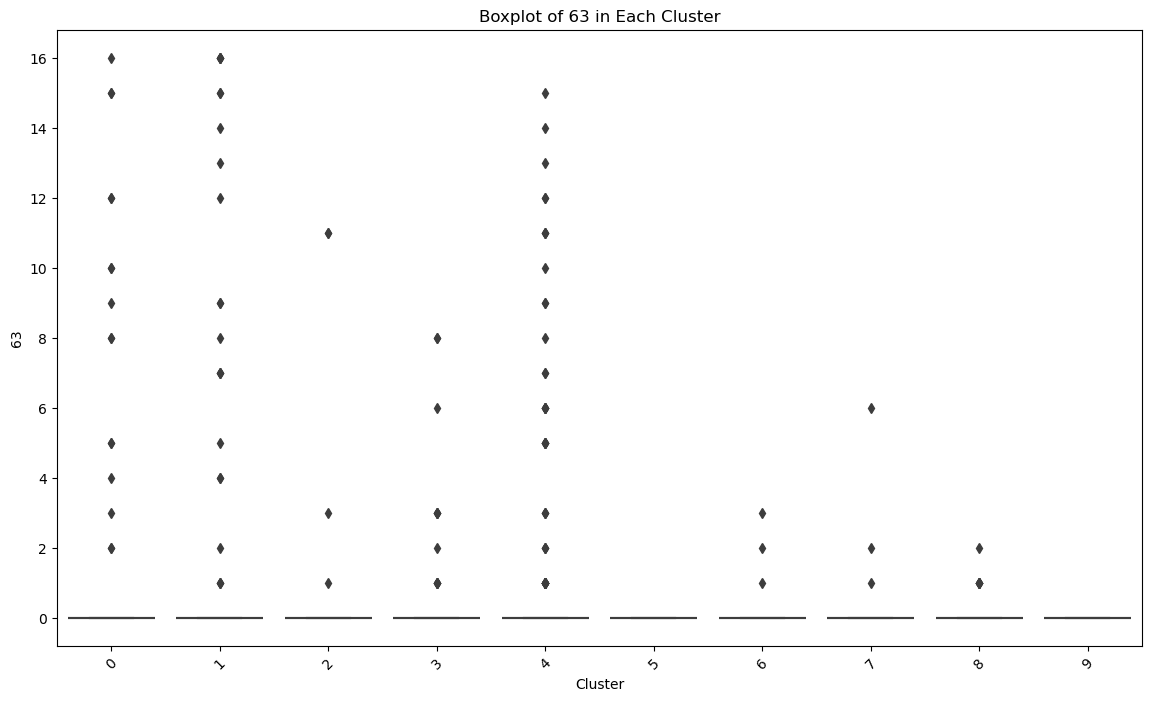

Summary statistics for 63:
         count      mean       std  min  25%  50%  75%   max
Cluster                                                     
0        228.0  0.596491  2.487747  0.0  0.0  0.0  0.0  16.0
1        218.0  0.908257  3.212996  0.0  0.0  0.0  0.0  16.0
2        117.0  0.222222  1.456916  0.0  0.0  0.0  0.0  11.0
3        268.0  0.152985  0.871366  0.0  0.0  0.0  0.0   8.0
4        197.0  1.172589  2.988184  0.0  0.0  0.0  0.0  15.0
5        171.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0
6        188.0  0.031915  0.271739  0.0  0.0  0.0  0.0   3.0
7        134.0  0.067164  0.551113  0.0  0.0  0.0  0.0   6.0
8        160.0  0.050000  0.245718  0.0  0.0  0.0  0.0   2.0
9        116.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0




In [39]:
# Boxplot for each feature in each cluster
for feature in X_clustered.columns[:-1]:  # Exclude 'Cluster' column
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='Cluster', y=feature, data=X_clustered)
    plt.title(f'Boxplot of {feature} in Each Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.xticks(rotation=45)
    plt.show()
    # Printing the summary statistics for each feature in each cluster
    print(f"Summary statistics for {feature}:")
    print(X_clustered.groupby('Cluster')[feature].describe())
    print("\n")